In [ ]:
install.packages('readxl')  #for reading an excel file 
install.packages('stats')   #for kmeans
install.packages('dplyr')
install.packages('ggplot2')   #for plotiing 
install.packages("tidyr")              
install.packages("reshape2")  #for heatmap
install.packages('ggfortify') 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("readxl"):
“installation of package ‘readxl’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('readxl')
library("tidyr")
library('stats')
library('dplyr')
library('ggplot2')
library('reshape2')
library('ggfortify')


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [ ]:
#reading an excel file
my_data <- read_excel("/content/SSE_Students_Satisfaction_Dataset (1).xlsx")

In [ ]:
#printing column names
names(my_data)

[1] "StudentIdentifier"                                                                                                                                                                                      
 [2] "Your gender:"                                                                                                                                                                                           
 [3] " What is your current academic classification?"                                                                                                                                                         
 [4] "What is your current cumulative GPA? (please answer with N/A if FALL 2022 is your first semester)"                                                                                                      
 [5] "For sure you had an impression about AUI before joining the institution, how is your current feeling about AUI? "                                                                                       
 [6] "Please rate your feeling regarding SSE study experience in comparisons to what you heard about other AUI schools (1-> I am planning to change school, 2 -> I am OK with my school choice, 3 -> I am ..."
 [7] "How satisfied are you with the quality of the food served at AUI?"                                                                                                                                      
 [8] "How satisfied are you with AUI housing facilities?"                                                                                                                                                     
 [9] "How would you rate AUI laboratory facilities?"                                                                                                                                                          
[10] "How would you rate AUI parking facilities?"                                                                                                                                                             
[11] "How would you rate sports and fitness facilities at AUI?"                                                                                                                                               
[12] "How would you rate AUI counseling services?"                                                                                                                                                            
[13] "How would you rate AUI enrollment services? "                                                                                                                                                           
[14] "How you rate the learning environment in the library?"                                                                                                                                                  
[15] "How would you rate the service you get from the health center?"                                                                                                                                         
[16] "How would you rate the academic advising support?"                                                                                                                                                      
[17] "How satisfied are you with the diversity and quality of the clubs and students events?"                                                                                                                 
[18] "How would you rate the help you are getting from the campus staff with administrative and other issues?"                                                                                                
[19] "How would you rate the social life in AUI?"                                                                                                                                                             
[20] "How do you rate the level of safety you feel on campus?"      

In [ ]:
#removing last two columns 
my_data <- my_data[ -c(26,27) ]

In [ ]:
#defining new names for columns 
col_names <- c('ID', 'Gender', 'Academic Classification', 'CGPA', 'Current feeling about AUI', 'Current feeling about SSE', 'Food satisfaction', 'Housing facilities satisfaction', 'Laboratory facilities satisfaction', 'Parking facilities satisfaction', 'Fitness facilities satisfaction ', 'Counseling services satisfaction', 'Enrollment services satisfaction', 'Library environment satisfaction', 'Health center satisfaction', 'Advising satisfaction', 'Clubs satisfaction', 'Administrative help satisfaction', 'Social life In AUI satisfaction', 'Level of safety on campus satisfaction', 'Professors/teachers satisfaction', 'Number of students/section satisfaction', 'Offerings within programs of study satisfaction', 'Class time slots satisfaction', 'Knowledge from class satisfaction')

In [ ]:
#replacing column names
colnames(my_data) <- col_names

In [ ]:
#printing the new column names
names(my_data)

[1] "ID"                                             
 [2] "Gender"                                         
 [3] "Academic Classification"                        
 [4] "CGPA"                                           
 [5] "Current feeling about AUI"                      
 [6] "Current feeling about SSE"                      
 [7] "Food satisfaction"                              
 [8] "Housing facilities satisfaction"                
 [9] "Laboratory facilities satisfaction"             
[10] "Parking facilities satisfaction"                
[11] "Fitness facilities satisfaction "               
[12] "Counseling services satisfaction"               
[13] "Enrollment services satisfaction"               
[14] "Library environment satisfaction"               
[15] "Health center satisfaction"                     
[16] "Advising satisfaction"                          
[17] "Clubs satisfaction"                             
[18] "Administrative help satisfaction"               
[19] "Social life In AUI satisfaction"                
[20] "Level of safety on campus satisfaction"         
[21] "Professors/teachers satisfaction"               
[22] "Number of students/section satisfaction"        
[23] "Offerings within programs of study satisfaction"
[24] "Class time slots satisfaction"                  
[25] "Knowledge from class satisfaction"

In [ ]:
head(my_data)

ID       Gender Academic Classification                  CGPA
1 student1 Male   Freshman (earned between 0-29 credits)   N/A 
2 student2 Male   Junior (earned between 60-89 credits)    3.12
3 student3 Male   Junior (earned between 60-89 credits)    3.8 
4 student4 Male   Freshman (earned between 0-29 credits)   N/A 
5 student5 Female Sophomore (earned between 30-59 credits) 3.91
6 student6 Male   Freshman (earned between 0-29 credits)   3.6 
  Current feeling about AUI       Current feeling about SSE
1 I am happy to be an AUI student 3                        
2 I am disappointed/upset         2                        
3 I am disappointed/upset         2                        
4 I am disappointed/upset         2                        
5 I am happy to be an AUI student 3                        
6 I am disappointed/upset         2                        
  Food satisfaction    Housing facilities satisfaction
1 Average Satisfaction Very Satisfied                 
2 Not Satisfied        Not Satisfied                  
3 Not Satisfied        Not Satisfied                  
4 Not Satisfied        Not Satisfied                  
5 Average Satisfaction Average Satisfaction           
6 Not Satisfied        Not Satisfied                  
  Laboratory facilities satisfaction Parking facilities satisfaction ⋯
1 Satisfied                          Satisfied                       ⋯
2 Very Satisfied                     Satisfied                       ⋯
3 Satisfied                          Satisfied                       ⋯
4 Satisfied                          Not Satisfied                   ⋯
5 Satisfied                          Not Satisfied                   ⋯
6 Average Satisfaction               Average Satisfaction            ⋯
  Advising satisfaction Clubs satisfaction   Administrative help satisfaction
1 Satisfied             Very Satisfied       Satisfied                       
2 Not Satisfied         Very Satisfied       Average Satisfaction            
3 Very Satisfied        Not Satisfied        Average Satisfaction            
4 Satisfied             Satisfied            Average Satisfaction            
5 Very Satisfied        Average Satisfaction Satisfied                       
6 Average Satisfaction  Satisfied            Average Satisfaction            
  Social life In AUI satisfaction Level of safety on campus satisfaction
1 Average Satisfaction            Very Satisfied                        
2 Satisfied                       Very Satisfied                        
3 Average Satisfaction            Very Satisfied                        
4 Average Satisfaction            Very Satisfied                        
5 Satisfied                       Very Satisfied                        
6 Satisfied                       Very Satisfied                        
  Professors/teachers satisfaction Number of students/section satisfaction
1 Satisfied                        Satisfied                              
2 Satisfied                        Not Satisfied                          
3 Average Satisfaction             Very Satisfied                         
4 Average Satisfaction             Satisfied                              
5 Satisfied                        Average Satisfaction                   
6 Average Satisfaction             Not Satisfied                          
  Offerings within programs of study satisfaction Class time slots satisfaction
1 Average Satisfaction                            Average Satisfaction         
2 Average Satisfaction                            Satisfied                    
3 Very Satisfied                                  Very Satisfied               
4 Satisfied                                       Not Satisfied                
5 Average Satisfaction                            Satisfied                    
6 Satisfied                                       Average Satisfaction         
  Knowledge from class satisfaction
1 Satisfied                        
2 Average Satisfaction             
3 

In [ ]:
tail(my_data)

ID         Gender Academic Classification                  CGPA
1 student142 Male   Sophomore (earned between 30-59 credits) 3.79
2 student143 Female Freshman (earned between 0-29 credits)   Jsp 
3 student144 Male   Senior (number of credits is >=90)       3.95
4 student145 Male   Senior (number of credits is >=90)       3.11
5 student146 Female Freshman (earned between 0-29 credits)   N/A 
6 student147 Female Freshman (earned between 0-29 credits)   N/A 
  Current feeling about AUI             Current feeling about SSE
1 Same feeling I had before joining AUI 3                        
2 I am happy to be an AUI student       2                        
3 I am disappointed/upset               2                        
4 I am happy to be an AUI student       3                        
5 Same feeling I had before joining AUI 3                        
6 I am happy to be an AUI student       3                        
  Food satisfaction    Housing facilities satisfaction
1 Not Satisfied        Not Satisfied                  
2 Average Satisfaction Average Satisfaction           
3 Average Satisfaction Average Satisfaction           
4 Very Satisfied       Satisfied                      
5 Average Satisfaction Satisfied                      
6 Not Satisfied        Average Satisfaction           
  Laboratory facilities satisfaction Parking facilities satisfaction ⋯
1 Satisfied                          Satisfied                       ⋯
2 Satisfied                          Satisfied                       ⋯
3 Satisfied                          Average Satisfaction            ⋯
4 Very Satisfied                     Very Satisfied                  ⋯
5 Satisfied                          Average Satisfaction            ⋯
6 Satisfied                          Satisfied                       ⋯
  Advising satisfaction Clubs satisfaction   Administrative help satisfaction
1 Average Satisfaction  Very Satisfied       Not Satisfied                   
2 Satisfied             Average Satisfaction Satisfied                       
3 Satisfied             Not Satisfied        Satisfied                       
4 Satisfied             Satisfied            Very Satisfied                  
5 Average Satisfaction  Satisfied            Average Satisfaction            
6 Satisfied             Very Satisfied       Satisfied                       
  Social life In AUI satisfaction Level of safety on campus satisfaction
1 Satisfied                       Very Satisfied                        
2 Satisfied                       Very Satisfied                        
3 Satisfied                       Not Satisfied                         
4 Satisfied                       Very Satisfied                        
5 Satisfied                       Satisfied                             
6 Very Satisfied                  Satisfied                             
  Professors/teachers satisfaction Number of students/section satisfaction
1 Average Satisfaction             Not Satisfied                          
2 Satisfied                        Average Satisfaction                   
3 Satisfied                        Not Satisfied                          
4 Satisfied                        Average Satisfaction                   
5 Average Satisfaction             Satisfied                              
6 Very Satisfied                   Satisfied                              
  Offerings within programs of study satisfaction Class time slots satisfaction
1 Not Satisfied                                   Not Satisfied                
2 Satisfied                                       Average Satisfaction         
3 Average Satisfaction                            Satisfied                    
4 Satisfied                                       Very Satisfied               
5 Average Satisfaction                            Average Satisfaction         
6 Satisfied                                       Satisfied                    
  Knowledge from class satisfaction
1 Not Satisfied   

In [ ]:
#num of rows and columns in df 
dim(my_data)

[1] 147  25

In [ ]:
#removing leading white space from last 5 columns 
trimws(my_data$`Professors/teachers satisfaction`)
trimws(my_data$`Number of students/section satisfactionn`)
trimws(my_data$`Offerings within programs of study satisfaction`)
trimws(my_data$`Class time slots satisfaction`)
trimws(my_data$`Knowledge from class satisfaction`)

[1] "Satisfied"            "Average Satisfaction" "Not Satisfied"       
  [4] "Satisfied"            "Satisfied"            "Average Satisfaction"
  [7] "Average Satisfaction" "Average Satisfaction" "Average Satisfaction"
 [10] "Satisfied"            "Average Satisfaction" "Average Satisfaction"
 [13] "Average Satisfaction" "Satisfied"            "Average Satisfaction"
 [16] "Satisfied"            "Satisfied"            "Satisfied"           
 [19] "Average Satisfaction" "Average Satisfaction" "Not Satisfied"       
 [22] "Satisfied"            "Satisfied"            "Very Satisfied"      
 [25] "Satisfied"            "Satisfied"            "Average Satisfaction"
 [28] "Not Satisfied"        "Satisfied"            "Average Satisfaction"
 [31] "Satisfied"            "Satisfied"            "Satisfied"           
 [34] "Satisfied"            "Satisfied"            "Average Satisfaction"
 [37] "Very Satisfied"       "Not Satisfied"        "Very Satisfied"      
 [40] "Average Satisfaction" "Very Satisfied"       "Satisfied"           
 [43] "Satisfied"            "Average Satisfaction" "Average Satisfaction"
 [46] "Satisfied"            "Very Satisfied"       "Satisfied"           
 [49] "Satisfied"            "Not Satisfied"        "Average Satisfaction"
 [52] "Satisfied"            "Not Satisfied"        "Satisfied"           
 [55] "Satisfied"            "Satisfied"            "Average Satisfaction"
 [58] "Satisfied"            "Satisfied"            "Average Satisfaction"
 [61] "Satisfied"            "Very Satisfied"       "Satisfied"           
 [64] "Not Satisfied"        "Satisfied"            "Average Satisfaction"
 [67] "Satisfied"            "Satisfied"            "Satisfied"           
 [70] "Satisfied"            "Average Satisfaction" "Satisfied"           
 [73] "Very Satisfied"       "Not Satisfied"        "Average Satisfaction"
 [76] "Average Satisfaction" "Satisfied"            "Not Satisfied"       
 [79] "Satisfied"            "Average Satisfaction" "Satisfied"           
 [82] "Satisfied"            "Satisfied"            "Not Satisfied"       
 [85] "Average Satisfaction" "Satisfied"            "Very Satisfied"      
 [88] "Average Satisfaction" "Average Satisfaction" "Average Satisfaction"
 [91] "Satisfied"            "Average Satisfaction" "Very Satisfied"      
 [94] "Satisfied"            "Satisfied"            "Average Satisfaction"
 [97] "Average Satisfaction" "Satisfied"            "Average Satisfaction"
[100] "Average Satisfaction" "Not Satisfied"        "Average Satisfaction"
[103] "Satisfied"            "Satisfied"            "Not Satisfied"       
[106] "Average Satisfaction" "Satisfied"            "Satisfied"           
[109] "Satisfied"            "Average Satisfaction" "Satisfied"           
[112] "Very Satisfied"       "Average Satisfaction" "Satisfied"           
[115] "Satisfied"            "Satisfied"            "Satisfied"           
[118] "Satisfied"            "Average Satisfaction" "Average Satisfaction"
[121] "Very Satisfied"       "Not Satisfied"        "Not Satisfied"       
[124] "Satisfied"            "Average Satisfaction" "Satisfied"           
[127] "Satisfied"            "Very Satisfied"       "Satisfied"           
[130] "Satisfied"            "Average Satisfaction" "Satisfied"           
[133] "Very Satisfied"       "Satisfied"            "Satisfied"           
[136] "Satisfied"            "Average Satisfaction" "Satisfied"           
[139] "Average Satisfaction" "Satisfied"            "Satisfied"           
[142] "Not Satisfied"        "Satisfied"            "Satisfied"           
[145] "Satisfied"            "Satisfied"            "Satisfied"

In [ ]:
#counting num of na in the datatset for each column 
colSums(is.na(my_data))

ID 
                                              0 
                                         Gender 
                                              0 
                        Academic Classification 
                                              0 
                                           CGPA 
                                              0 
                      Current feeling about AUI 
                                              0 
                      Current feeling about SSE 
                                              0 
                              Food satisfaction 
                                              0 
                Housing facilities satisfaction 
                                              0 
             Laboratory facilities satisfaction 
                                              0 
                Parking facilities satisfaction 
                                              0 
               Fitness facilities satisfaction  
                                              0 
               Counseling services satisfaction 
                                              0 
               Enrollment services satisfaction 
                                              0 
               Library environment satisfaction 
                                              0 
                     Health center satisfaction 
                                              0 
                          Advising satisfaction 
                                              0 
                             Clubs satisfaction 
                                              0 
               Administrative help satisfaction 
                                              0 
                Social life In AUI satisfaction 
                                              0 
         Level of safety on campus satisfaction 
                                              0 
               Professors/teachers satisfaction 
                                              0 
        Number of students/section satisfaction 
                                              0 
Offerings within programs of study satisfaction 
                                              0 
                  Class time slots satisfaction 
                                              0 
              Knowledge from class satisfaction 
                                              0

In [ ]:
#description of the df 
str(my_data)

tibble [147 × 25] (S3: tbl_df/tbl/data.frame)
 $ ID                                             : chr [1:147] "student1" "student2" "student3" "student4" ...
 $ Gender                                         : chr [1:147] "Male" "Male" "Male" "Male" ...
 $ Academic Classification                        : chr [1:147] "Freshman (earned between 0-29 credits)" "Junior (earned between 60-89 credits)" "Junior (earned between 60-89 credits)" "Freshman (earned between 0-29 credits)" ...
 $ CGPA                                           : chr [1:147] "N/A" "3.12" "3.8" "N/A" ...
 $ Current feeling about AUI                      : chr [1:147] "I am happy to be an AUI student" "I am disappointed/upset" "I am disappointed/upset" "I am disappointed/upset" ...
 $ Current feeling about SSE                      : num [1:147] 3 2 2 2 3 2 2 3 2 3 ...
 $ Food satisfaction                              : chr [1:147] "Average Satisfaction" "Not Satisfied" "Not Satisfied" "Not Satisfied" ...
 $ Housing facil

In [ ]:
#counting num of occurence of unique values for each colum 
for (col in col_names[(-1)]){
      print(col)
      print(data.frame(table(my_data[[col]])))
      print('______________________________')
}

[1] "Gender"
    Var1 Freq
1 Female   66
2   Male   81
[1] "______________________________"
[1] "Academic Classification"
                                      Var1 Freq
1   Freshman (earned between 0-29 credits)   91
2                  I am a graduate student    2
3    Junior (earned between 60-89 credits)   19
4       Senior (number of credits is >=90)   18
5 Sophomore (earned between 30-59 credits)   17
[1] "______________________________"
[1] "CGPA"
     Var1 Freq
1    1,74    1
2      12    1
3     2.0    1
4    2.04    1
5     2.2    1
6     2.3    1
7    2.41    1
8    2.44    1
9     2.6    1
10   2.68    1
11    2.7    3
12   2.79    2
13   2.89    1
14    2.9    3
15   2.99    1
16   3,82    1
17     3.    1
18    3.1    1
19   3.10    1
20   3.11    1
21   3.12    1
22   3.14    1
23   3.17    1
24   3.18    1
25   3.19    1
26    3.2    1
27    3.3    2
28   3.33    1
29   3.36    1
30    3.4    1
31   3.43    1
32   3.44    1
33   3.45    1
34    3.5    2
35   3.53    1
36

In [ ]:
#displaying rows with invalid CGPA values 
my_data <- my_data[!(my_data['CGPA'] == 5) ,]
my_data <- my_data[!(my_data['CGPA'] == 'A'),]
my_data <- my_data[!(my_data['CGPA'] == 'blabla'),]
my_data <- my_data[!(my_data['CGPA'] == 'Jsp'),]
dim(my_data)

[1] 143  25

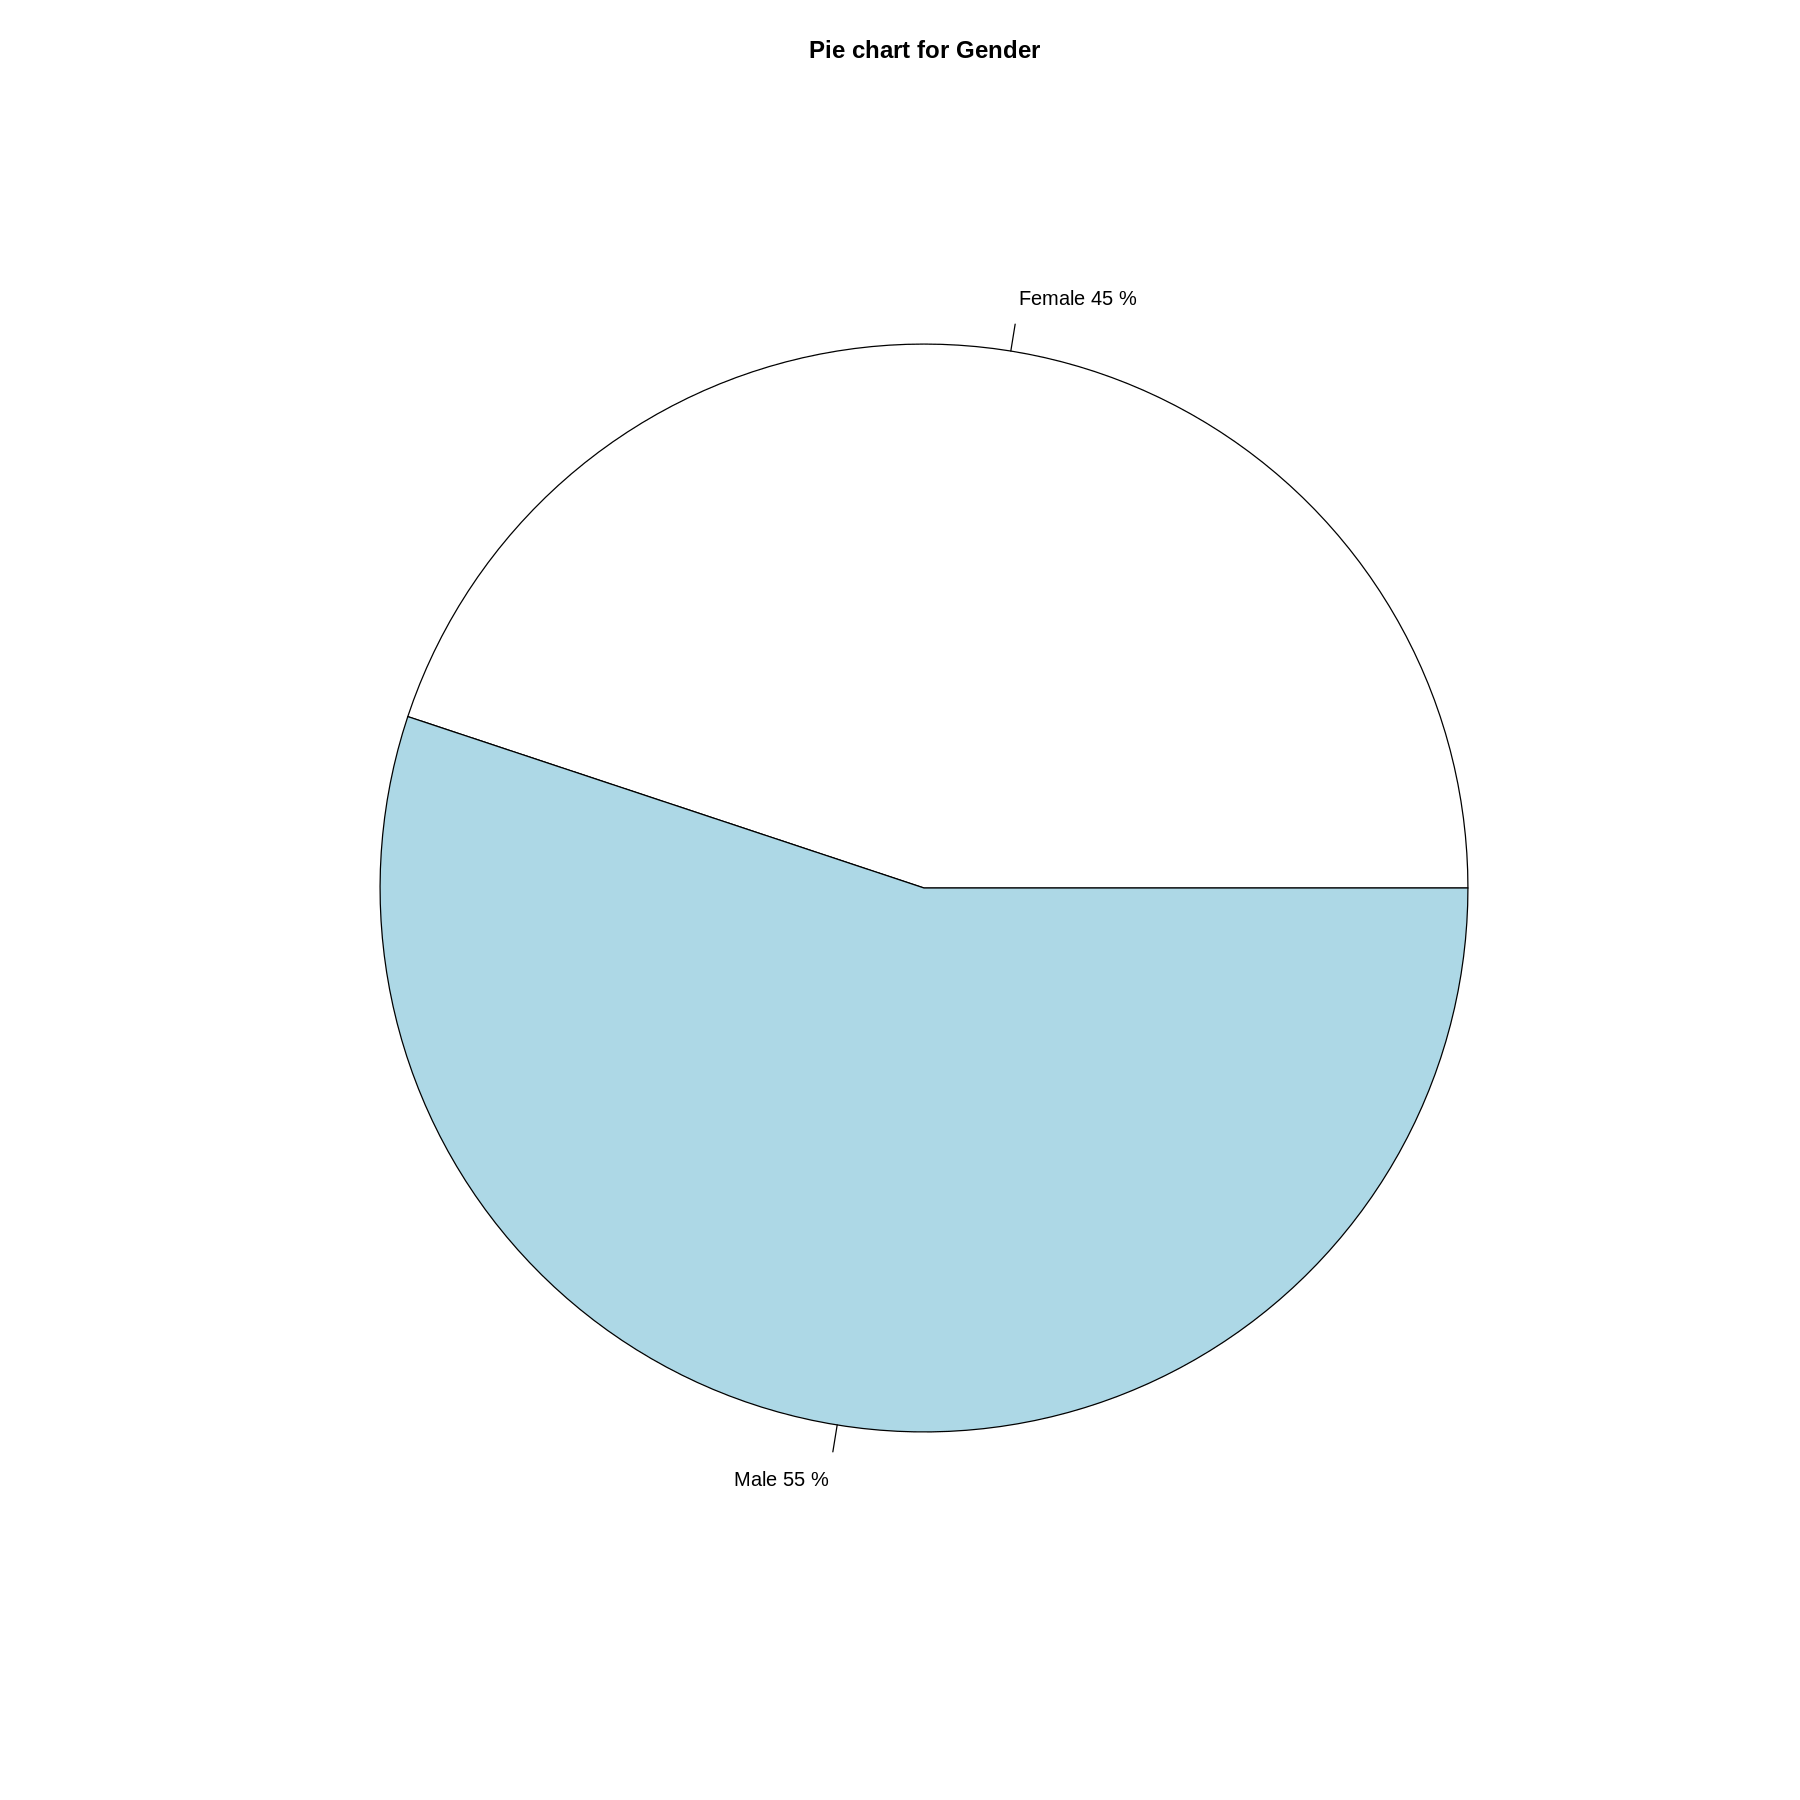

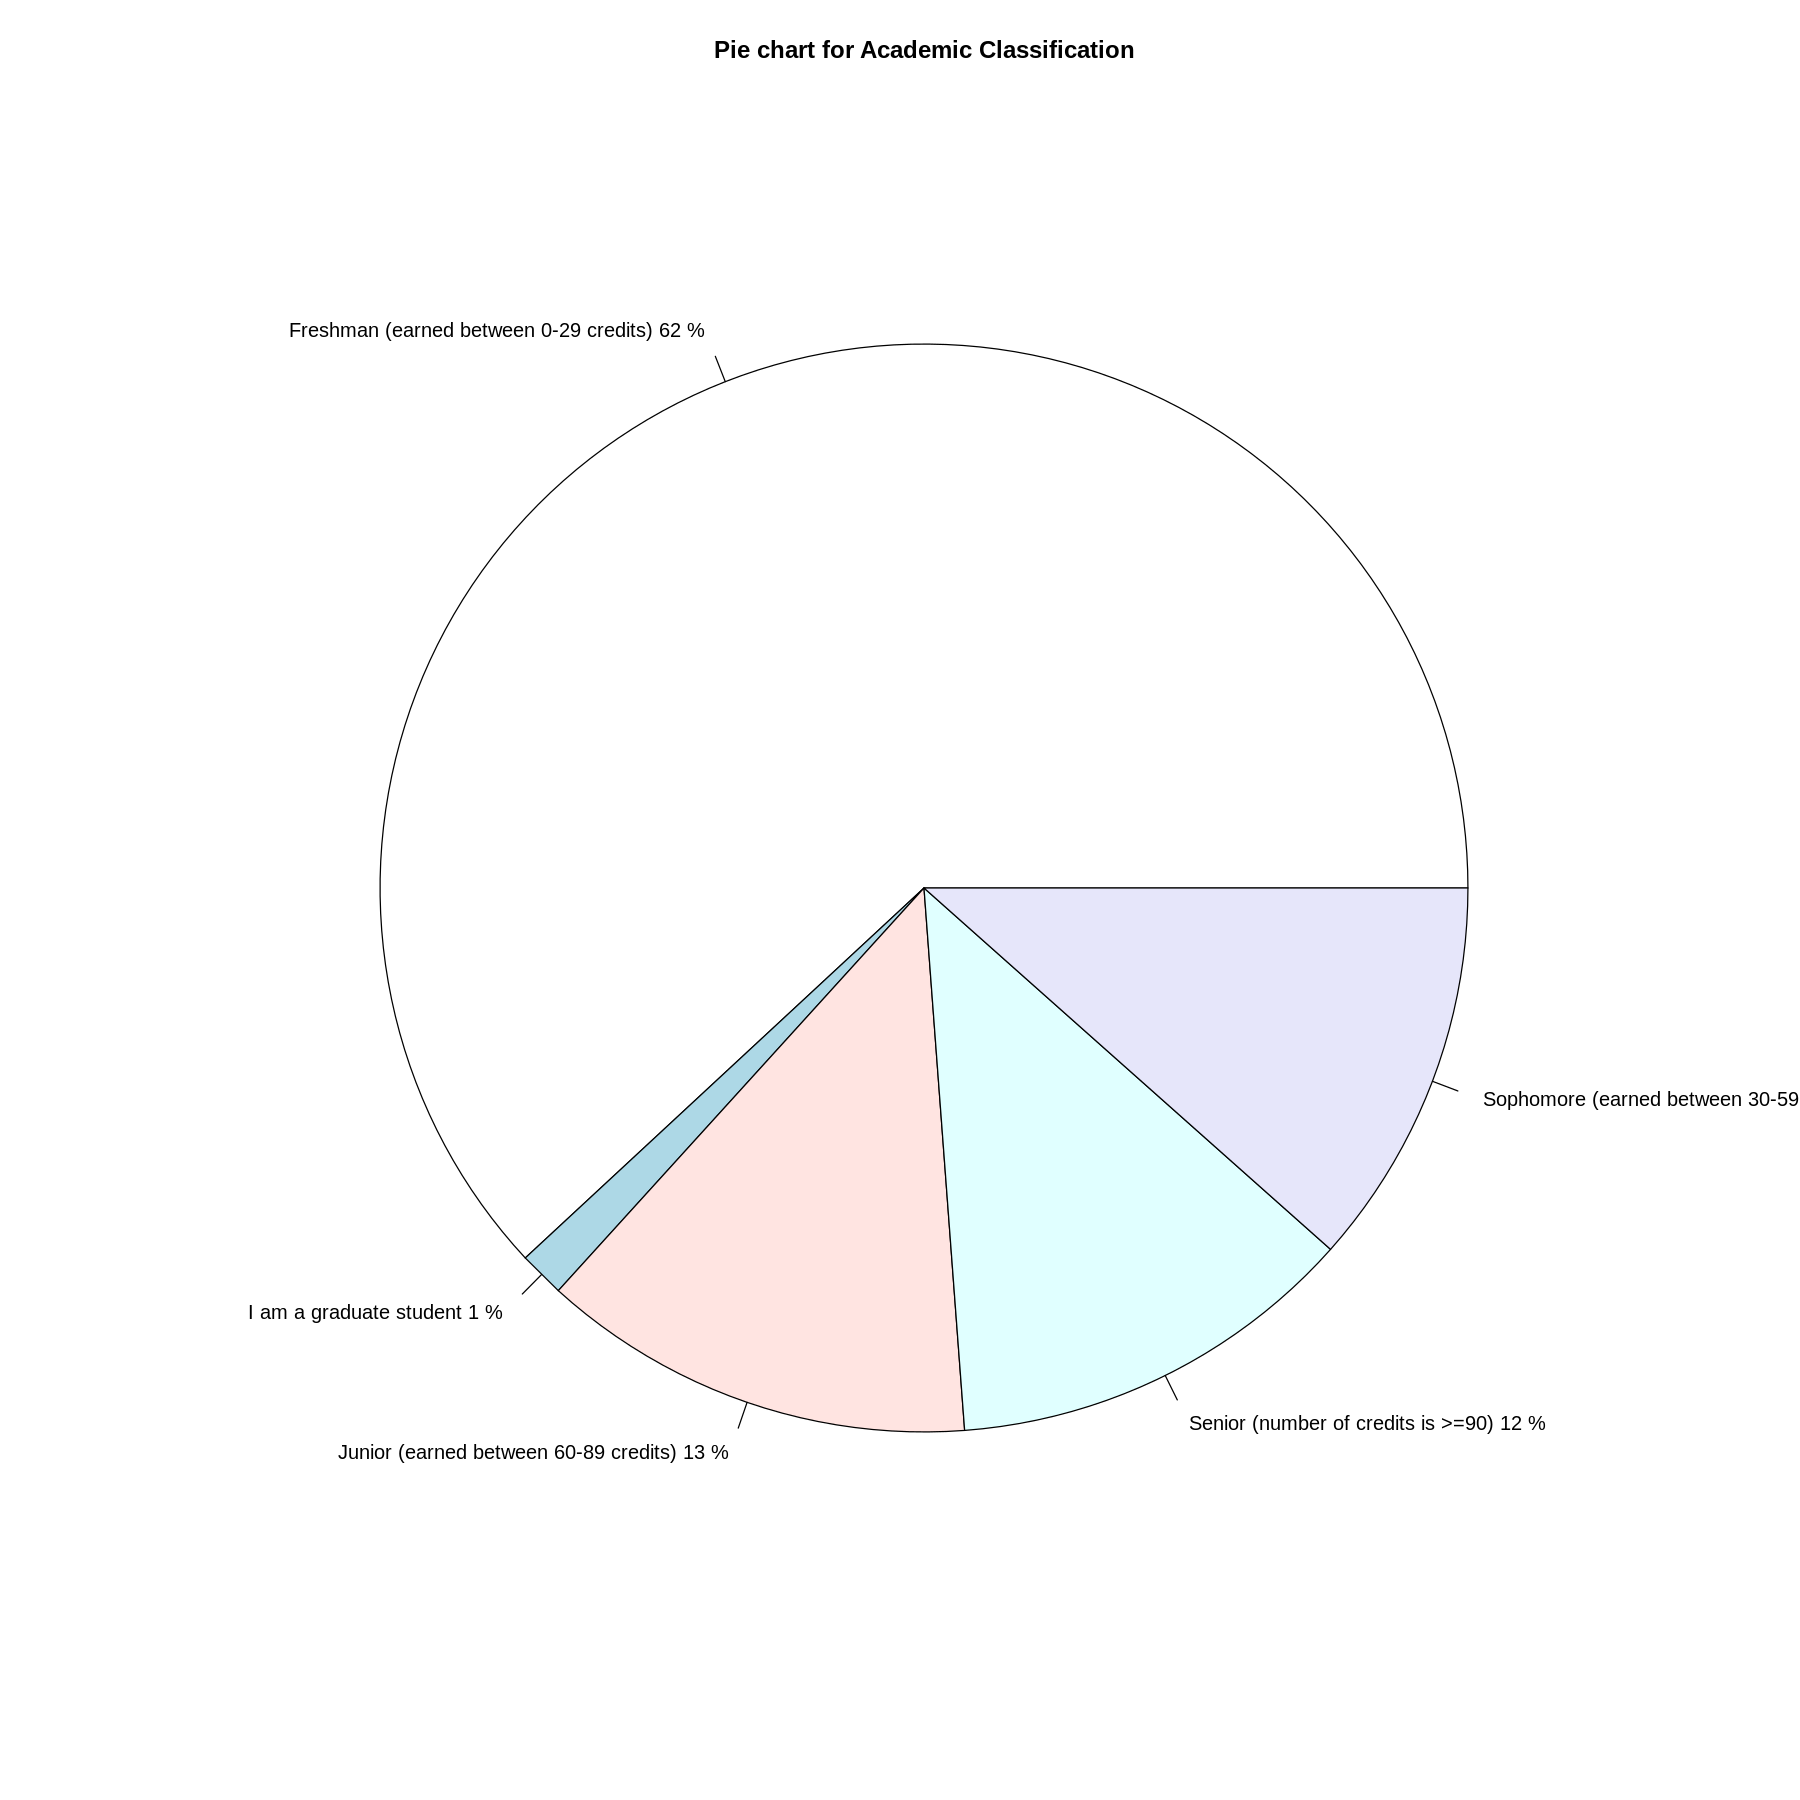

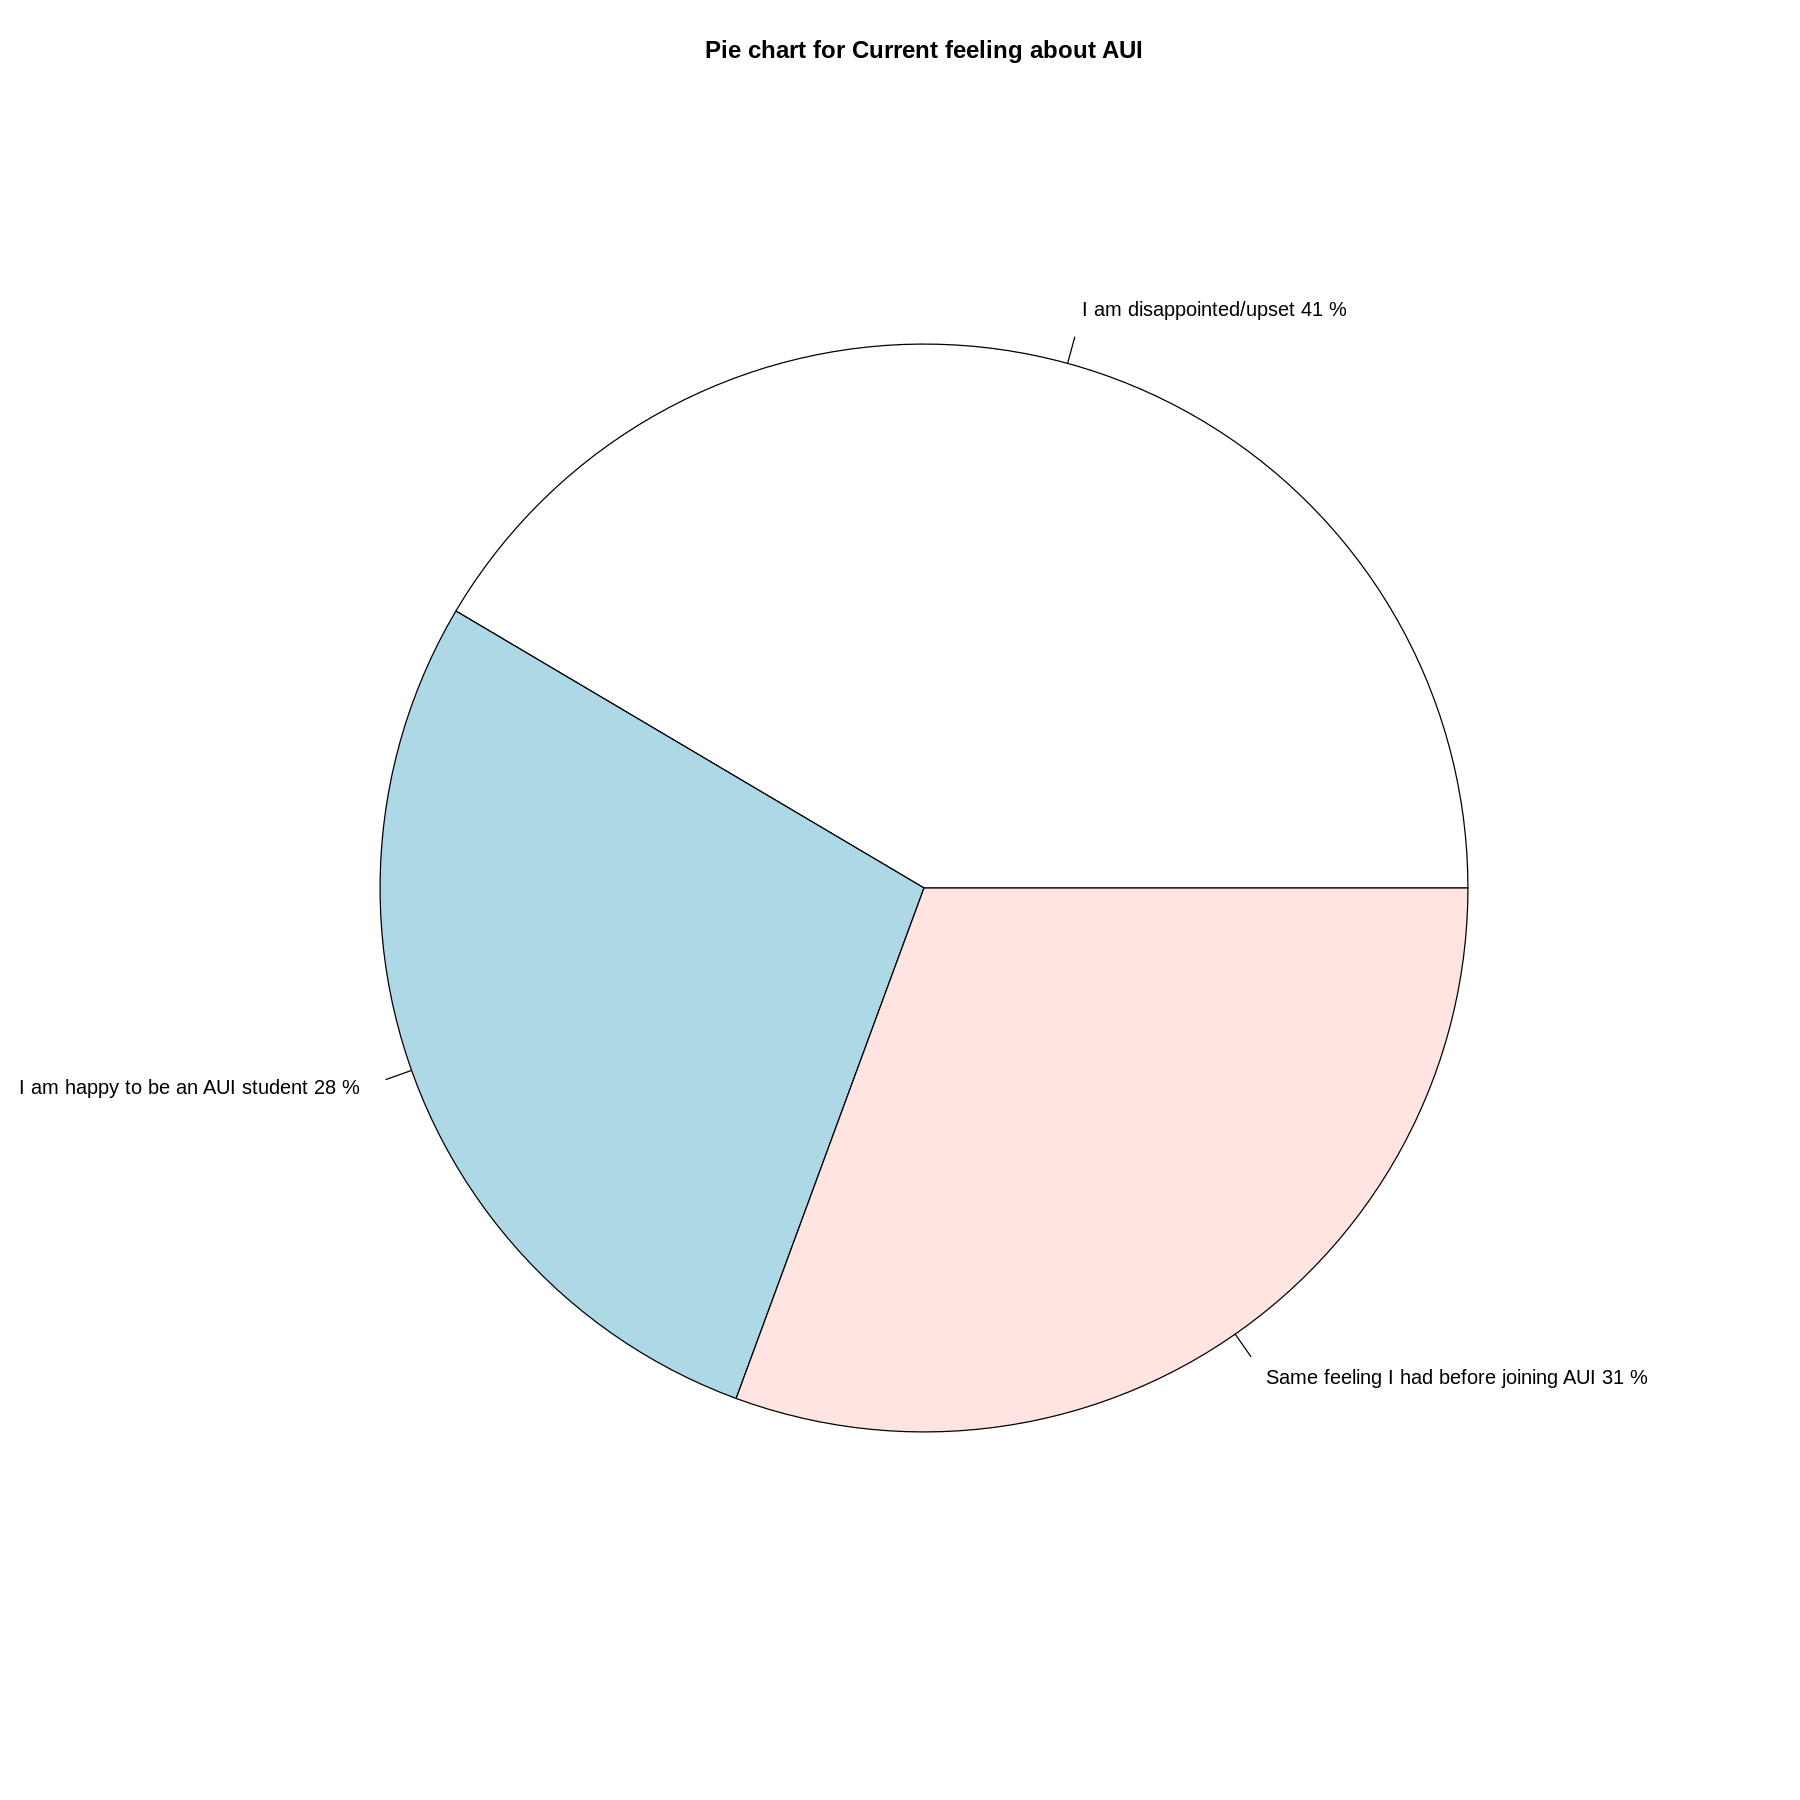

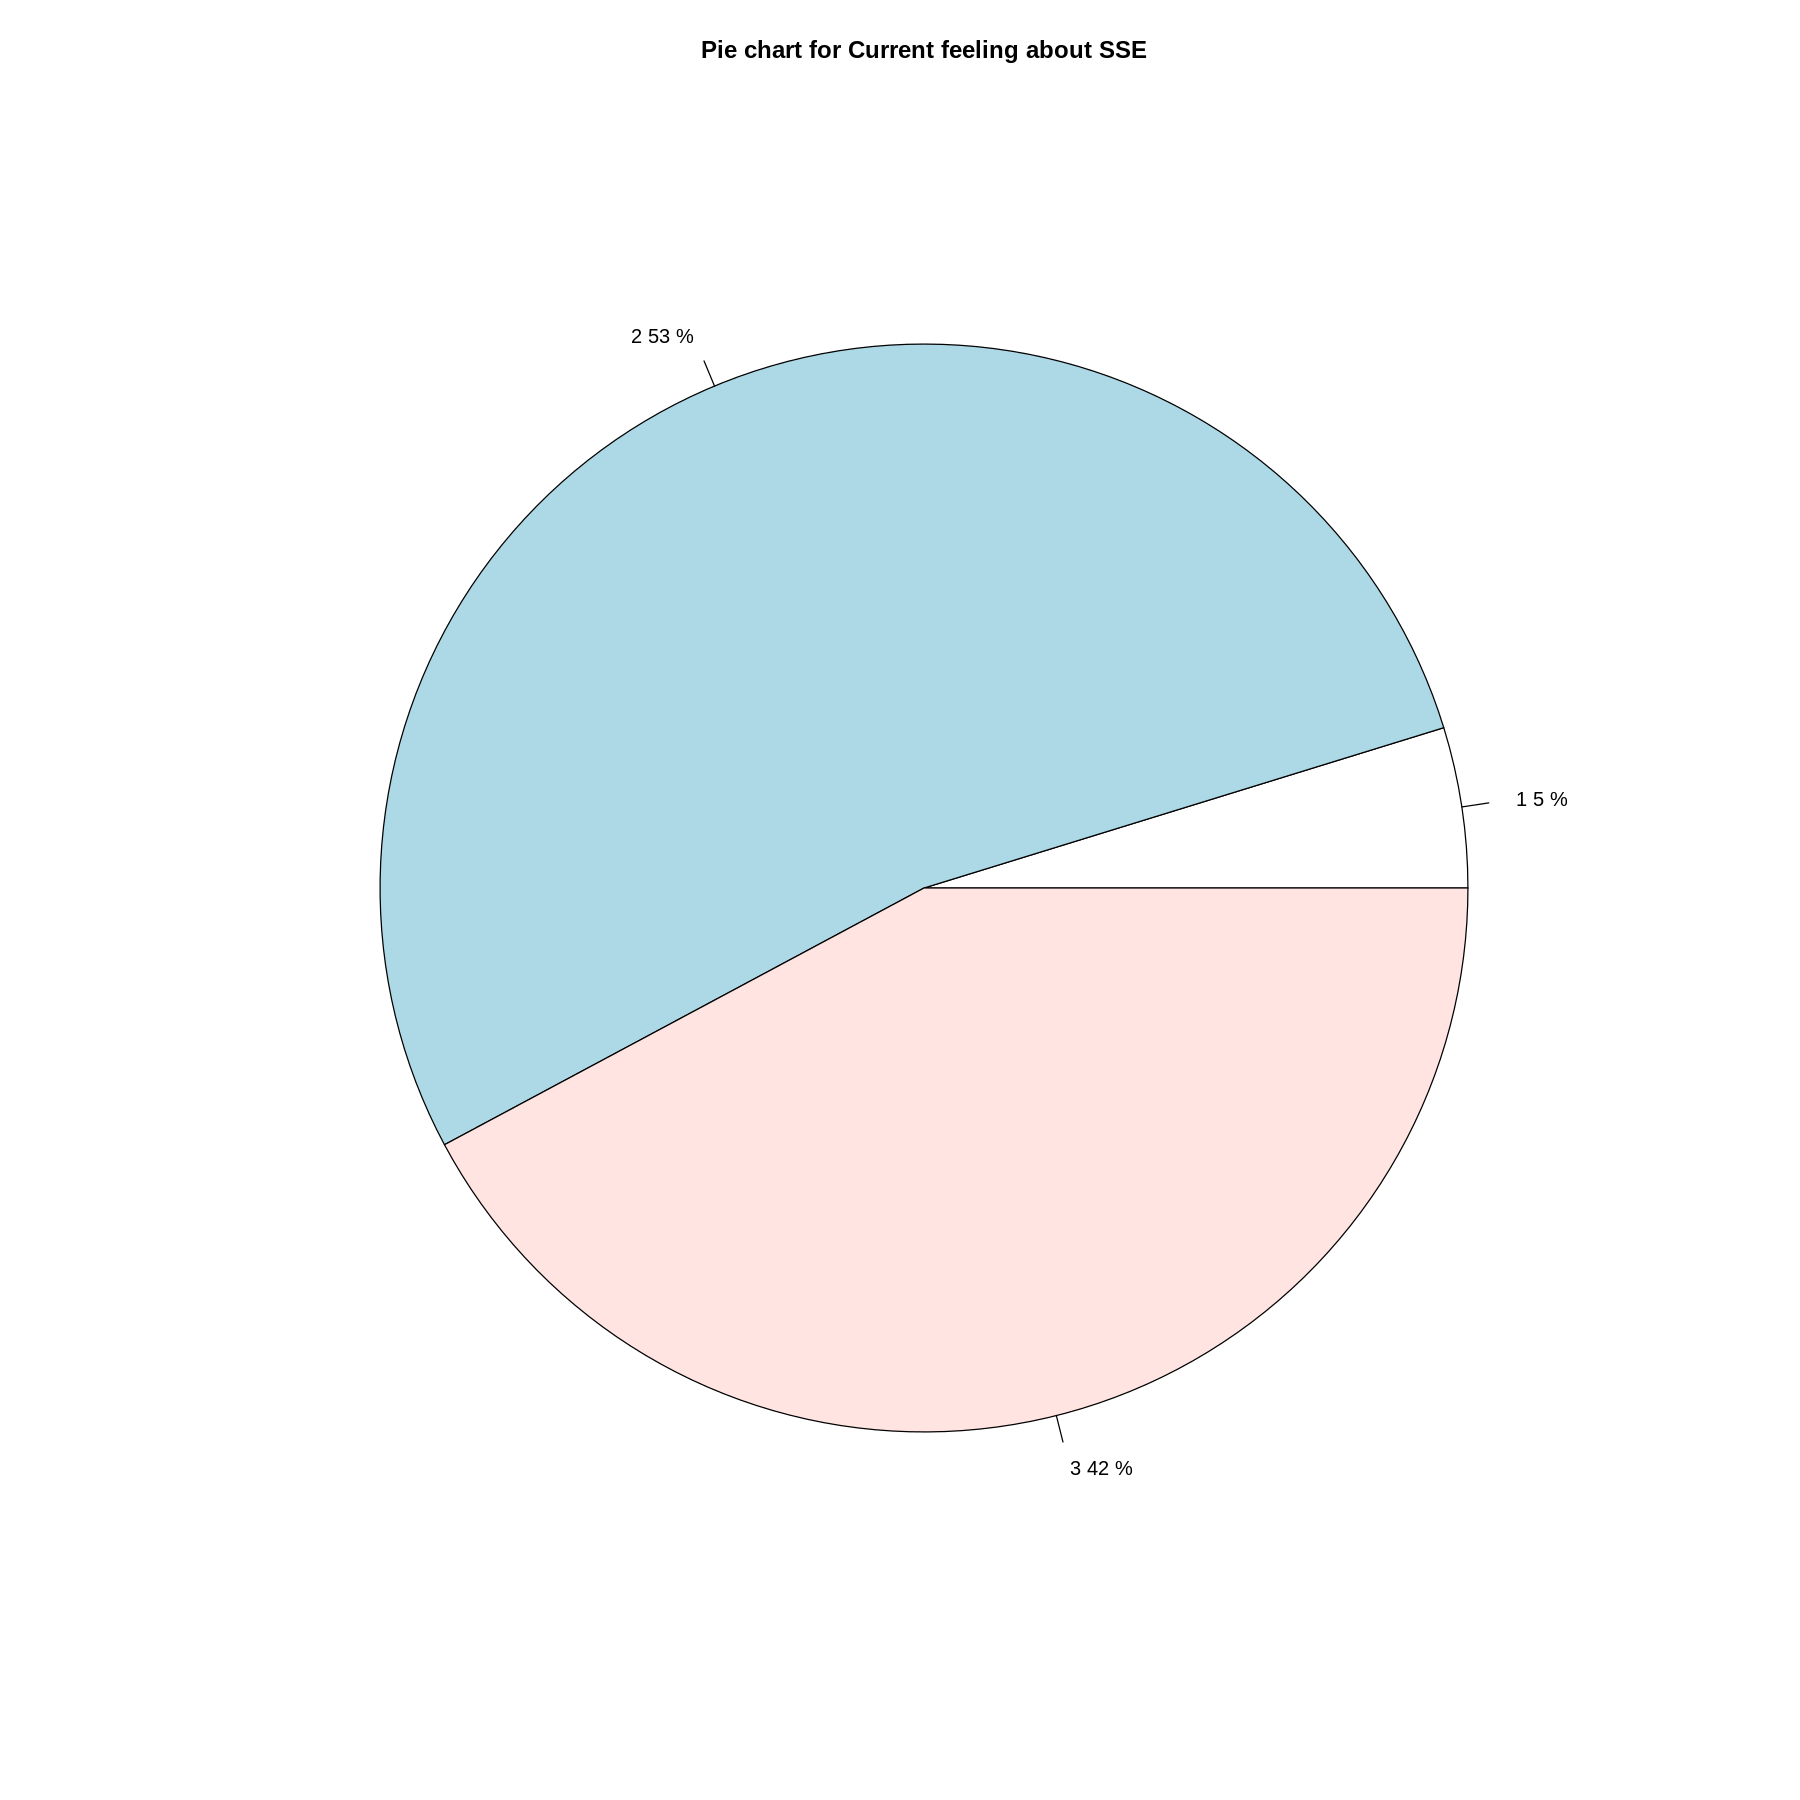

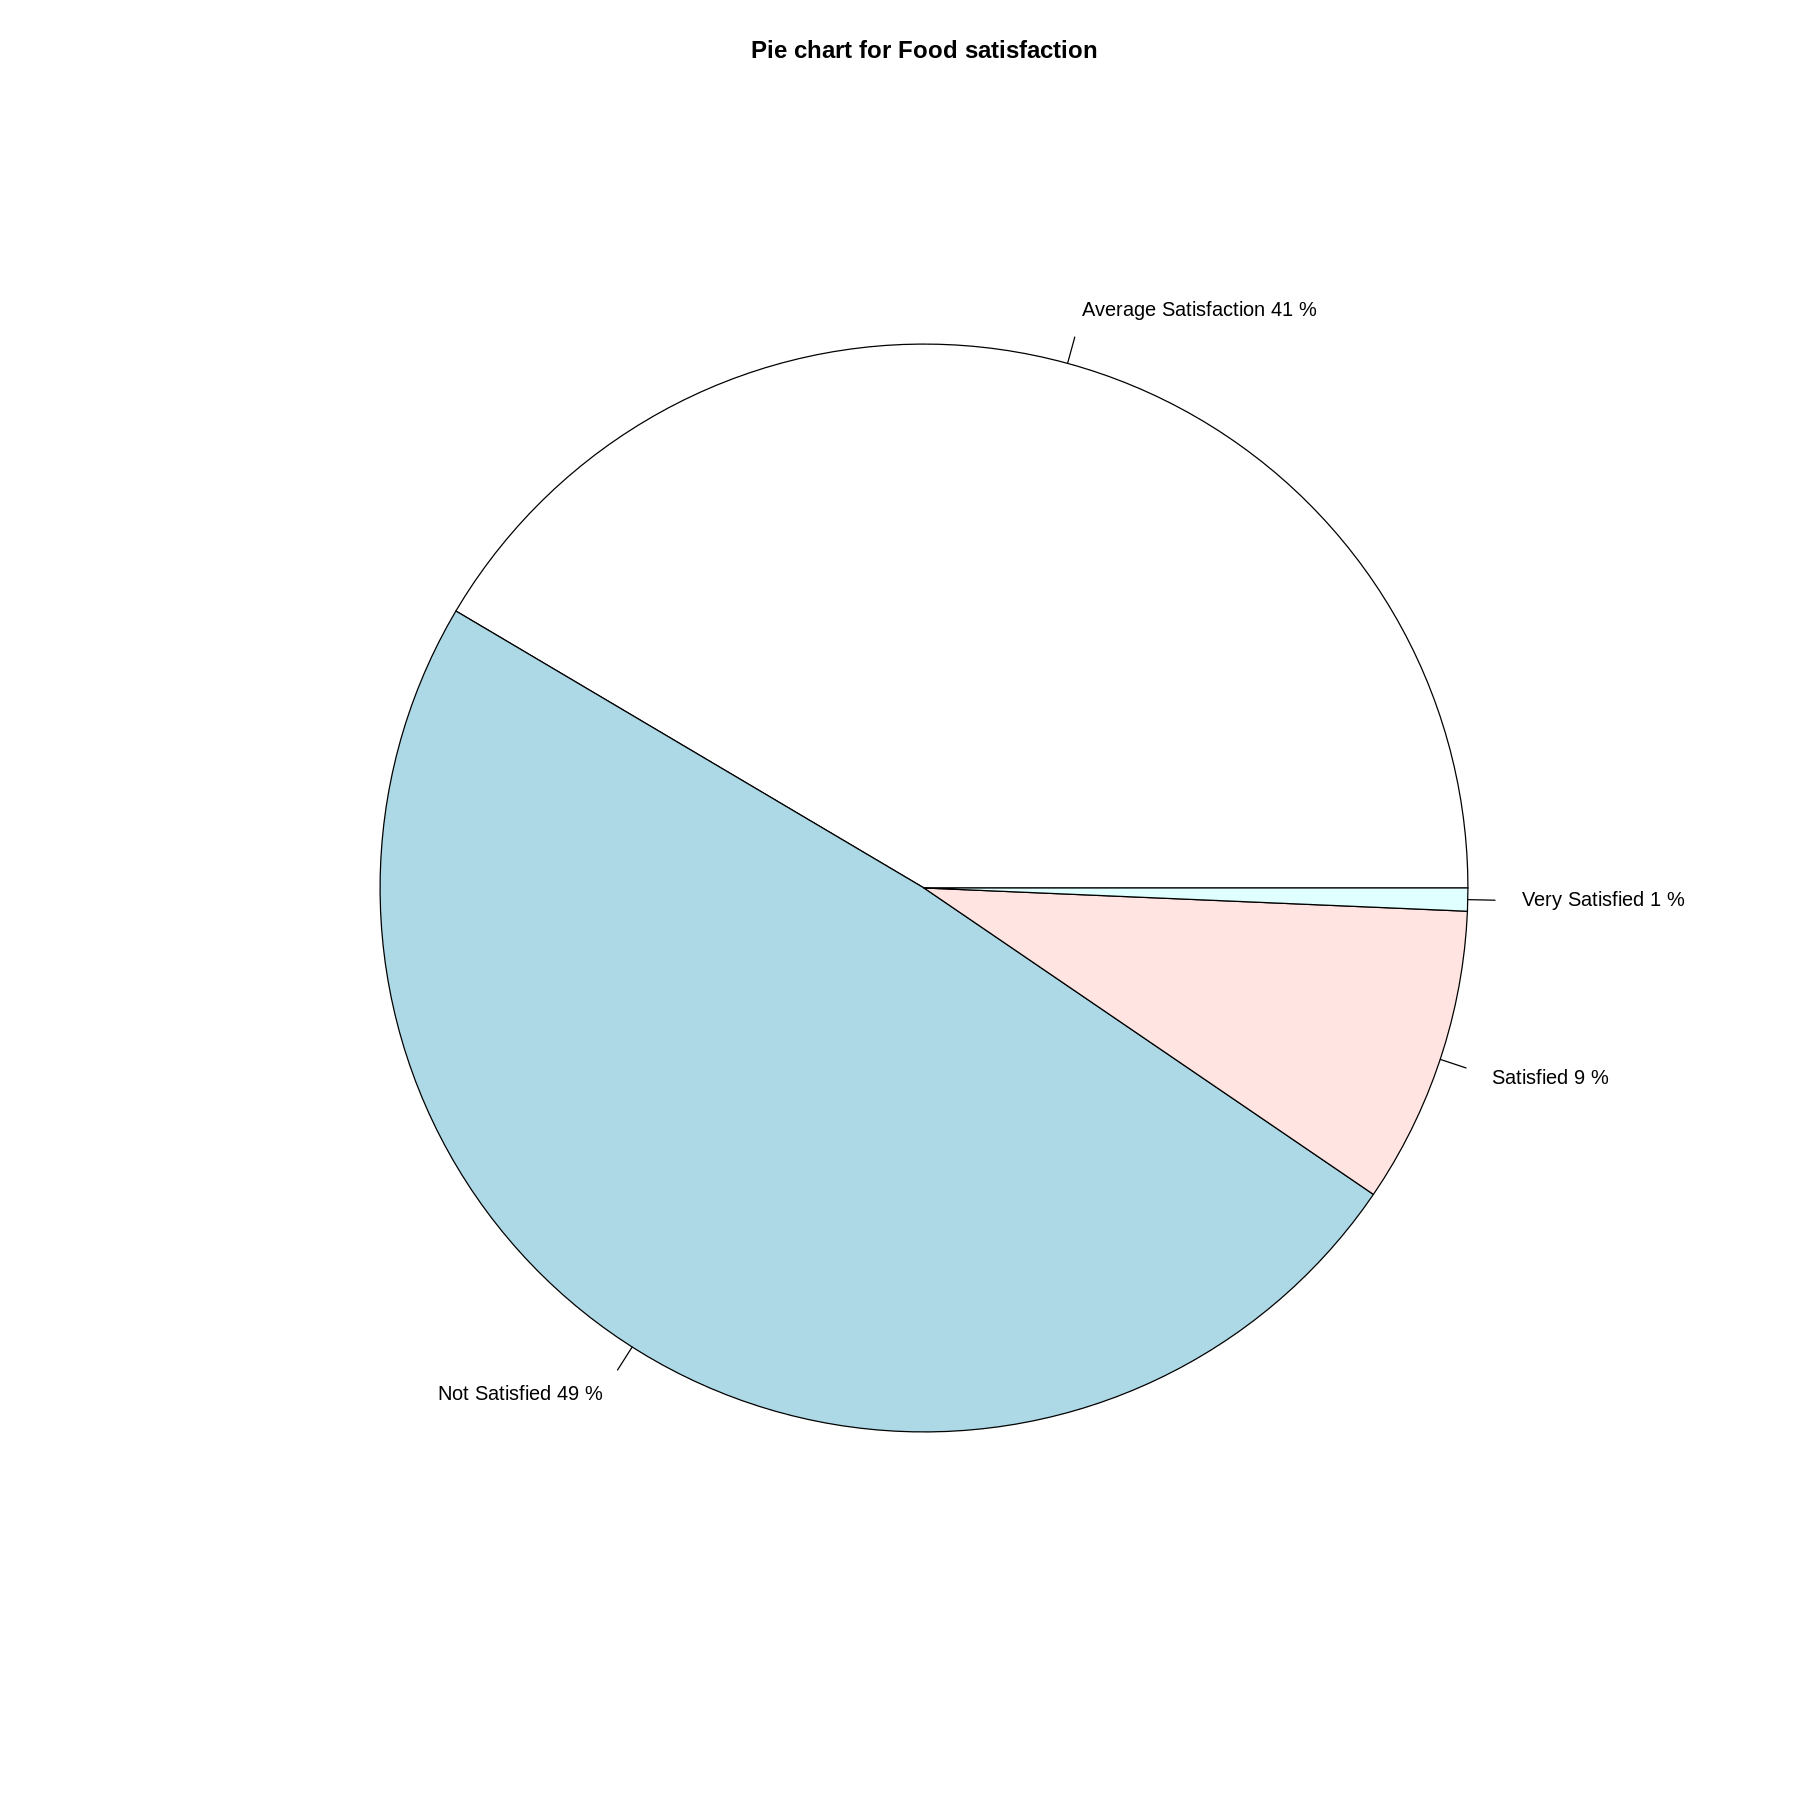

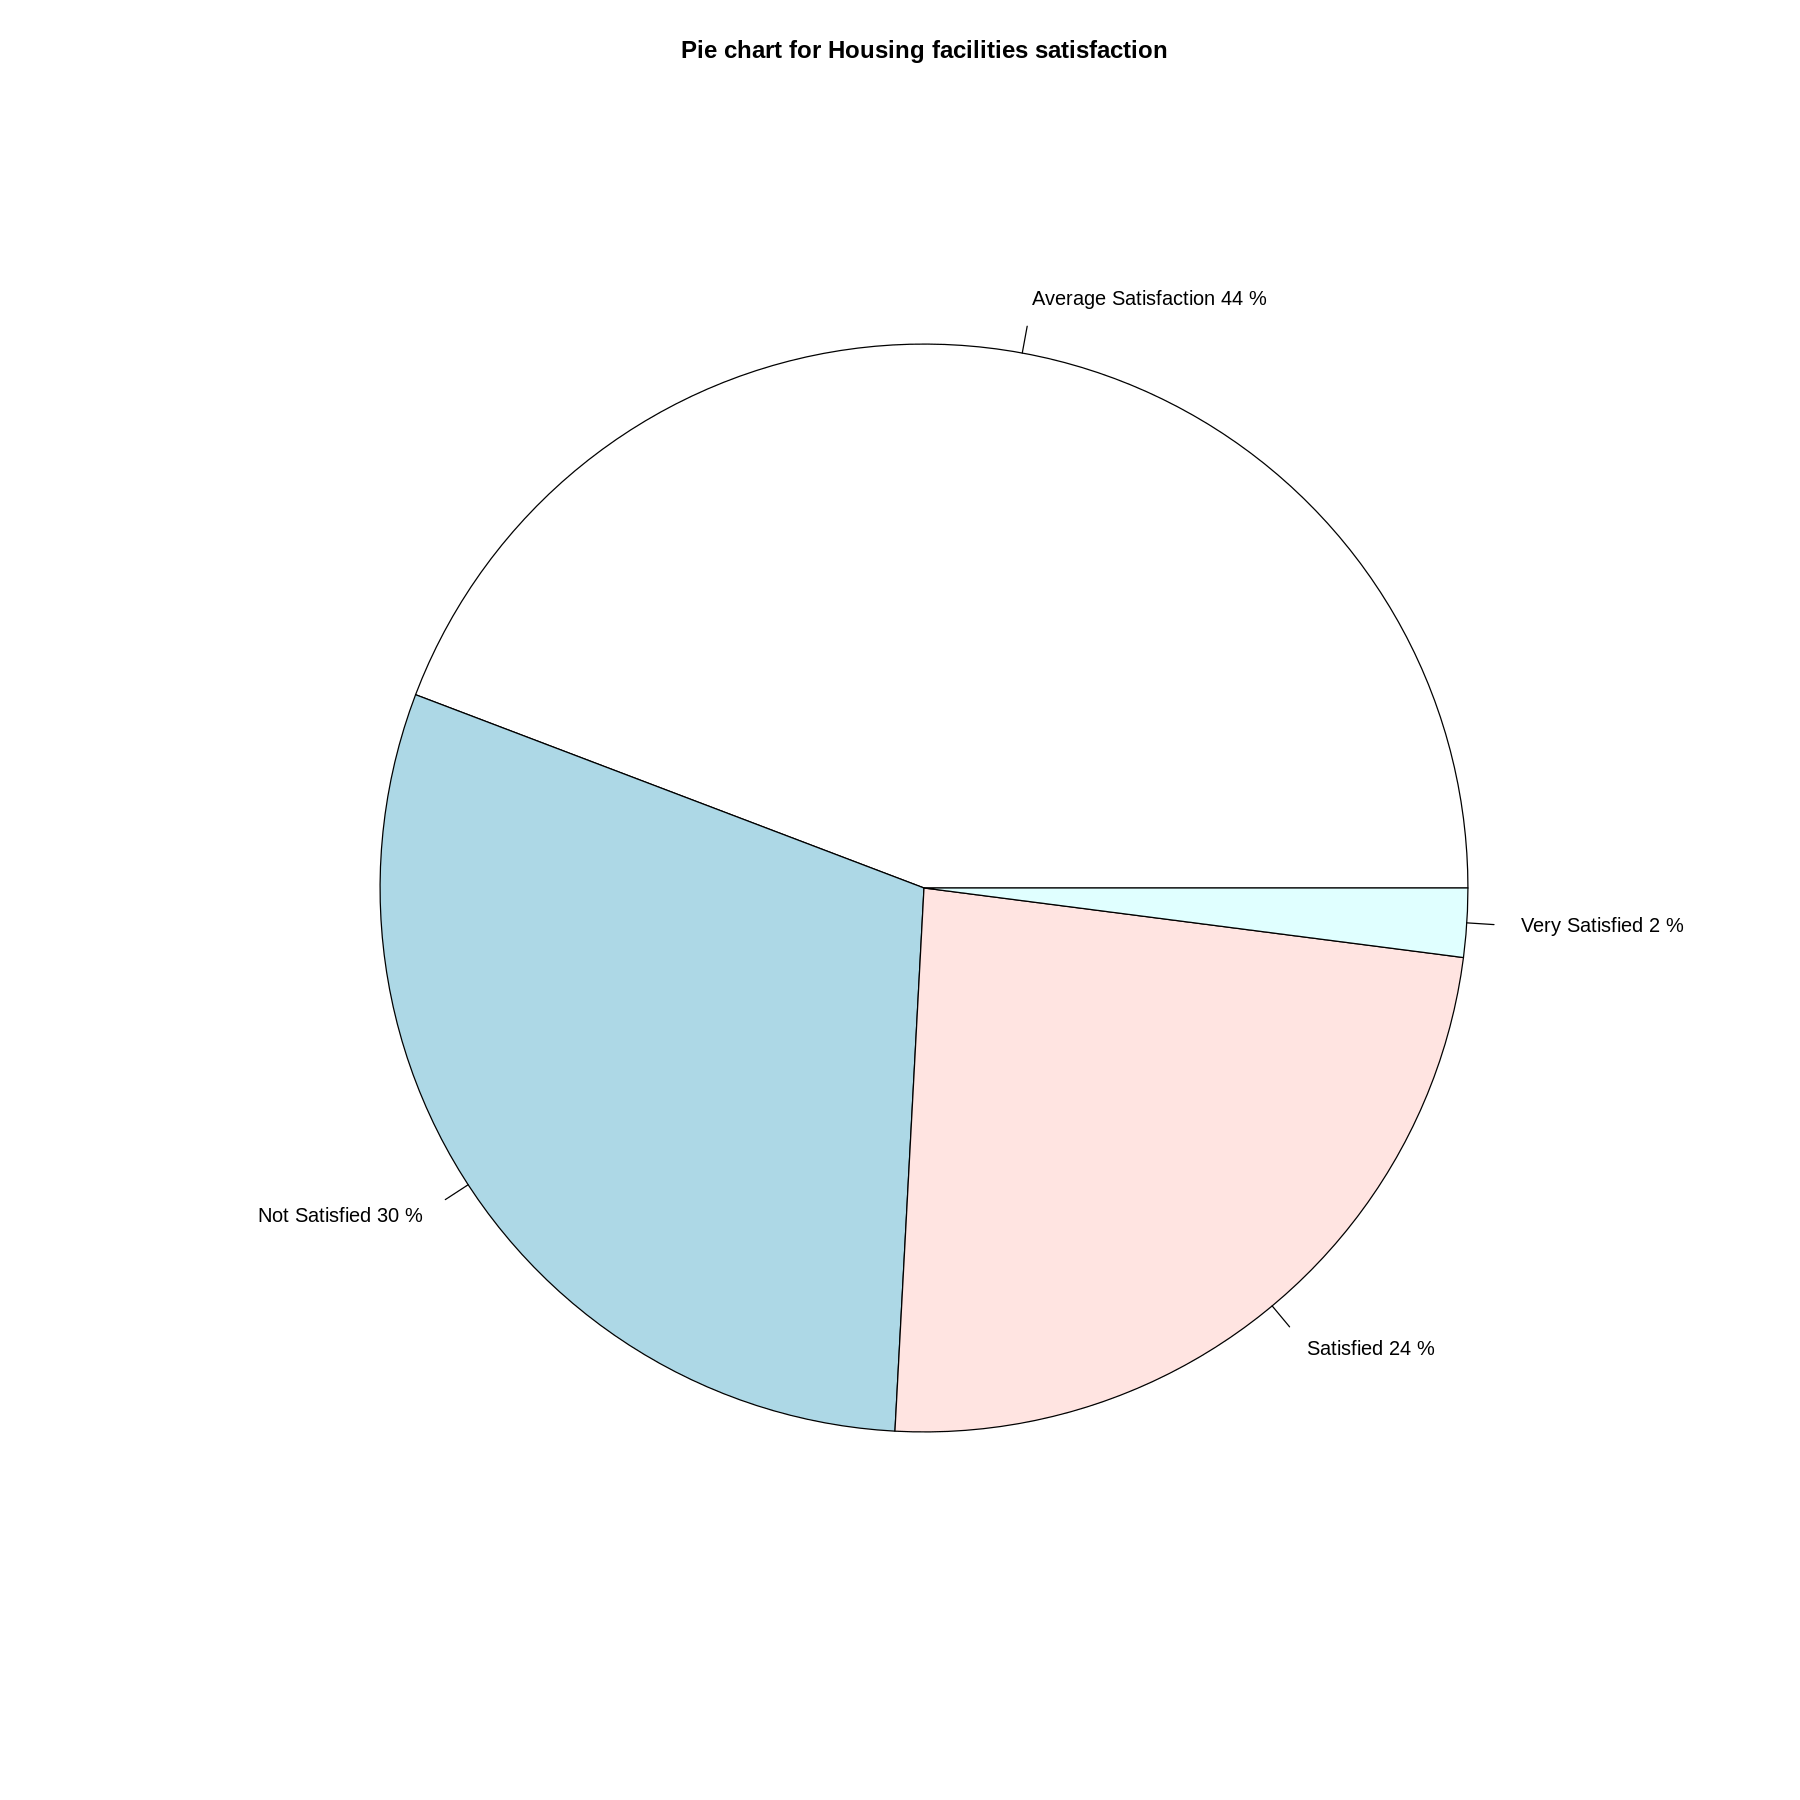

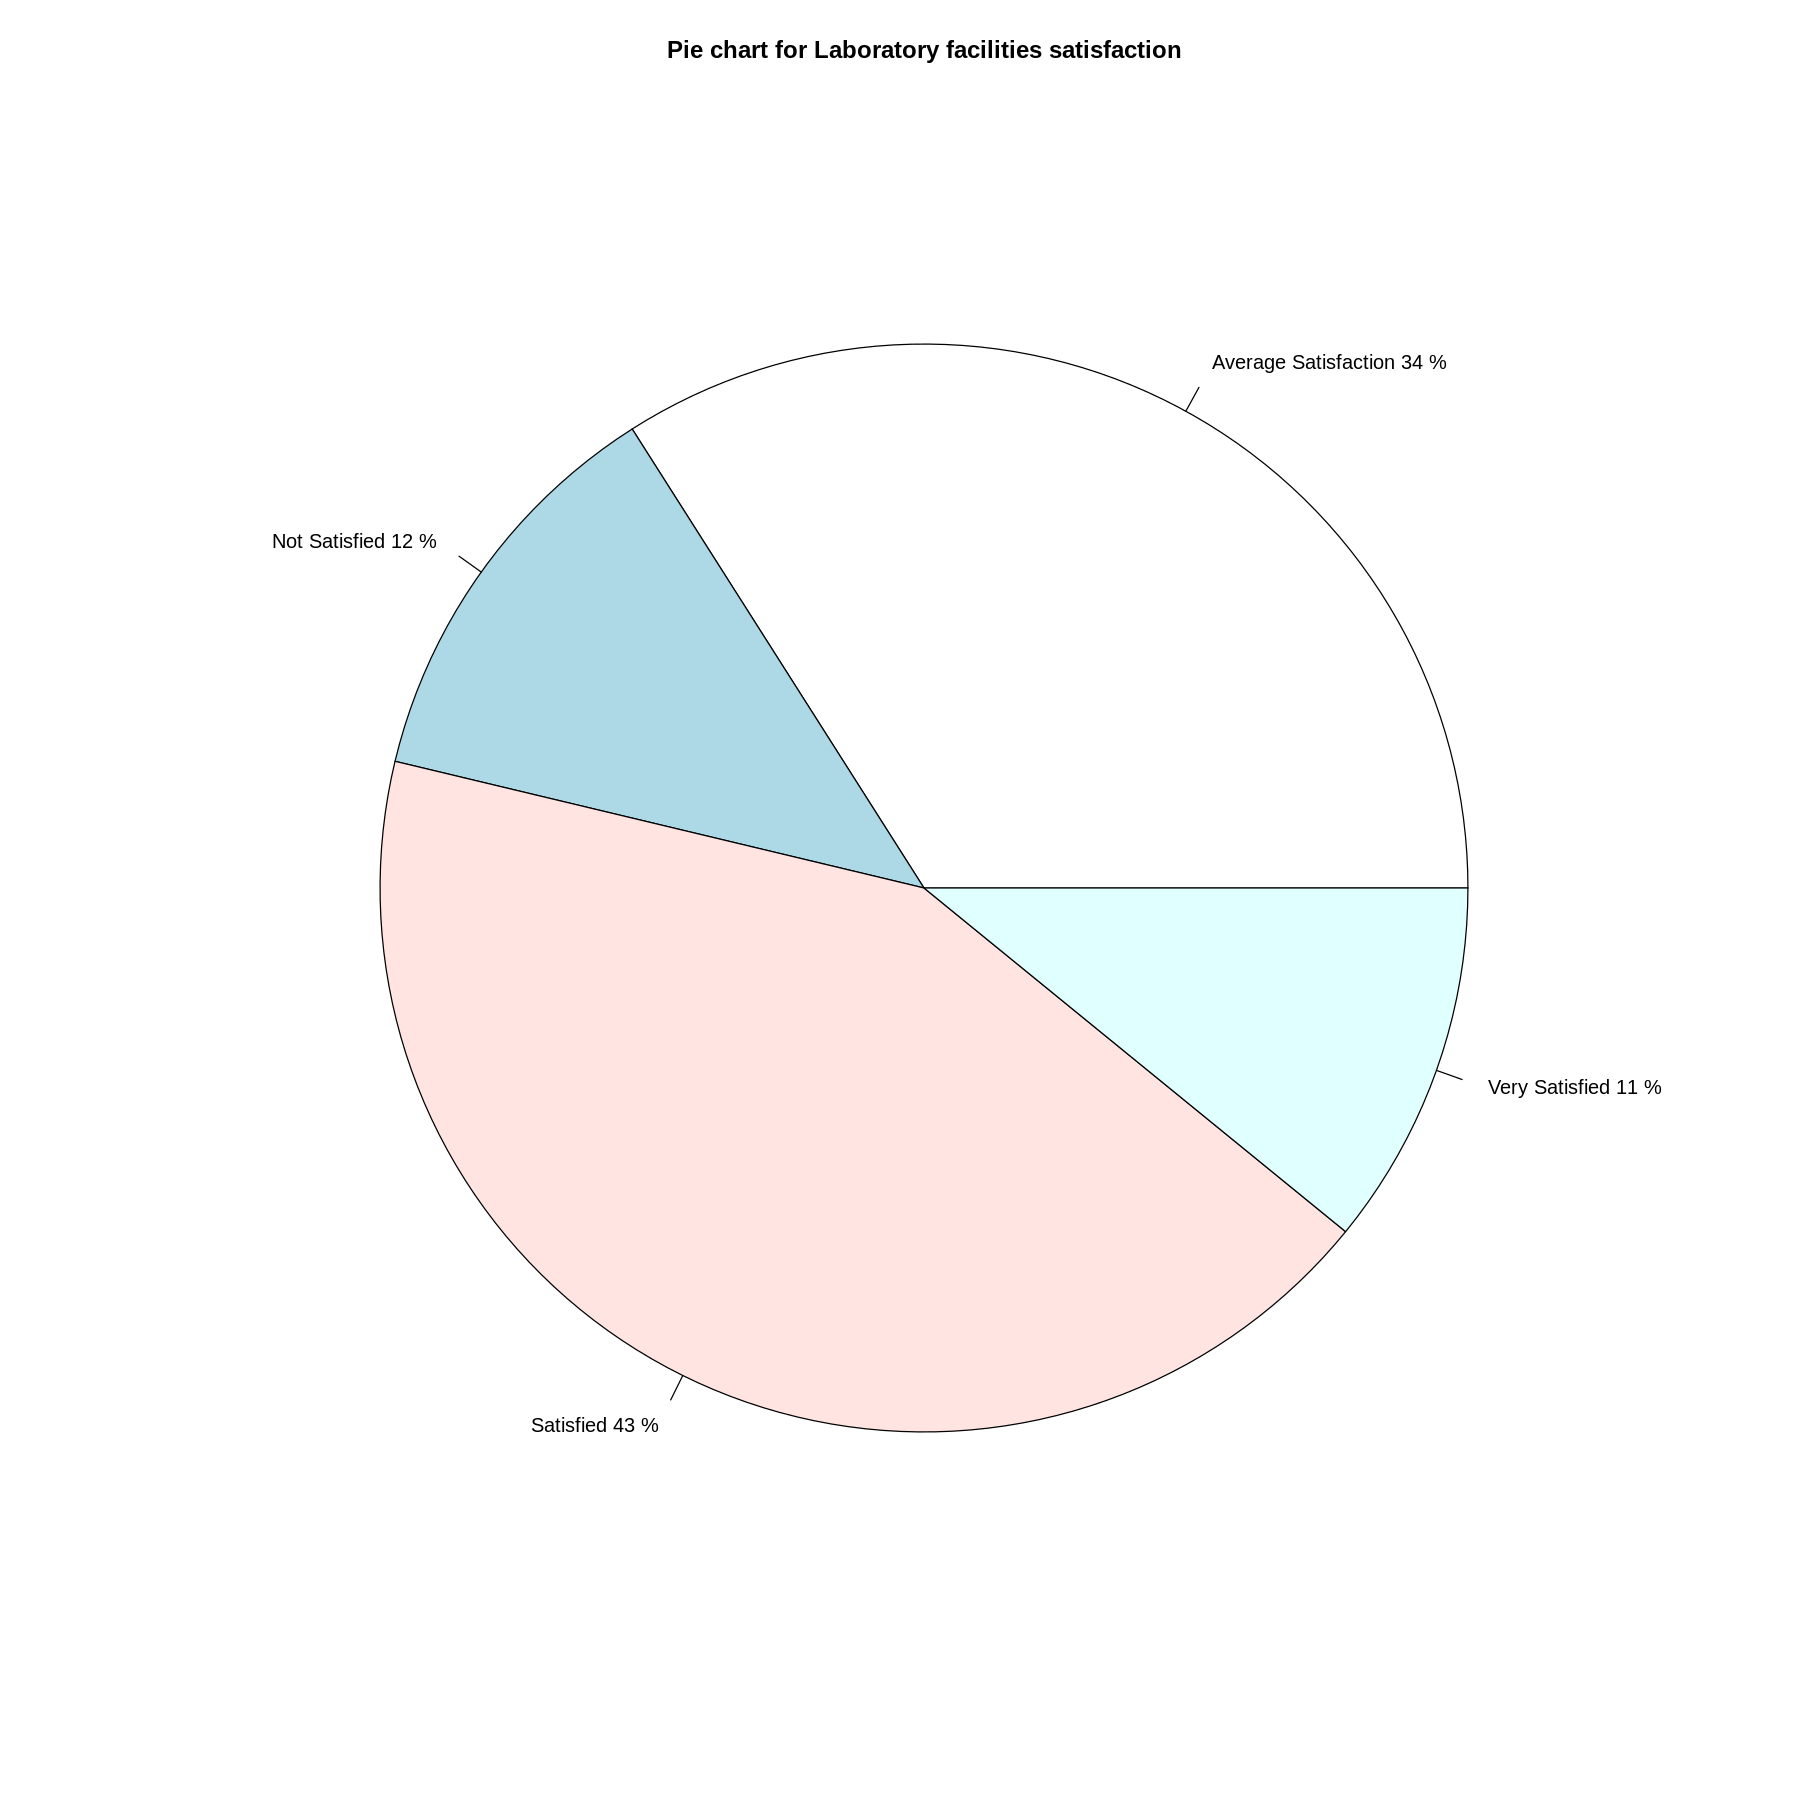

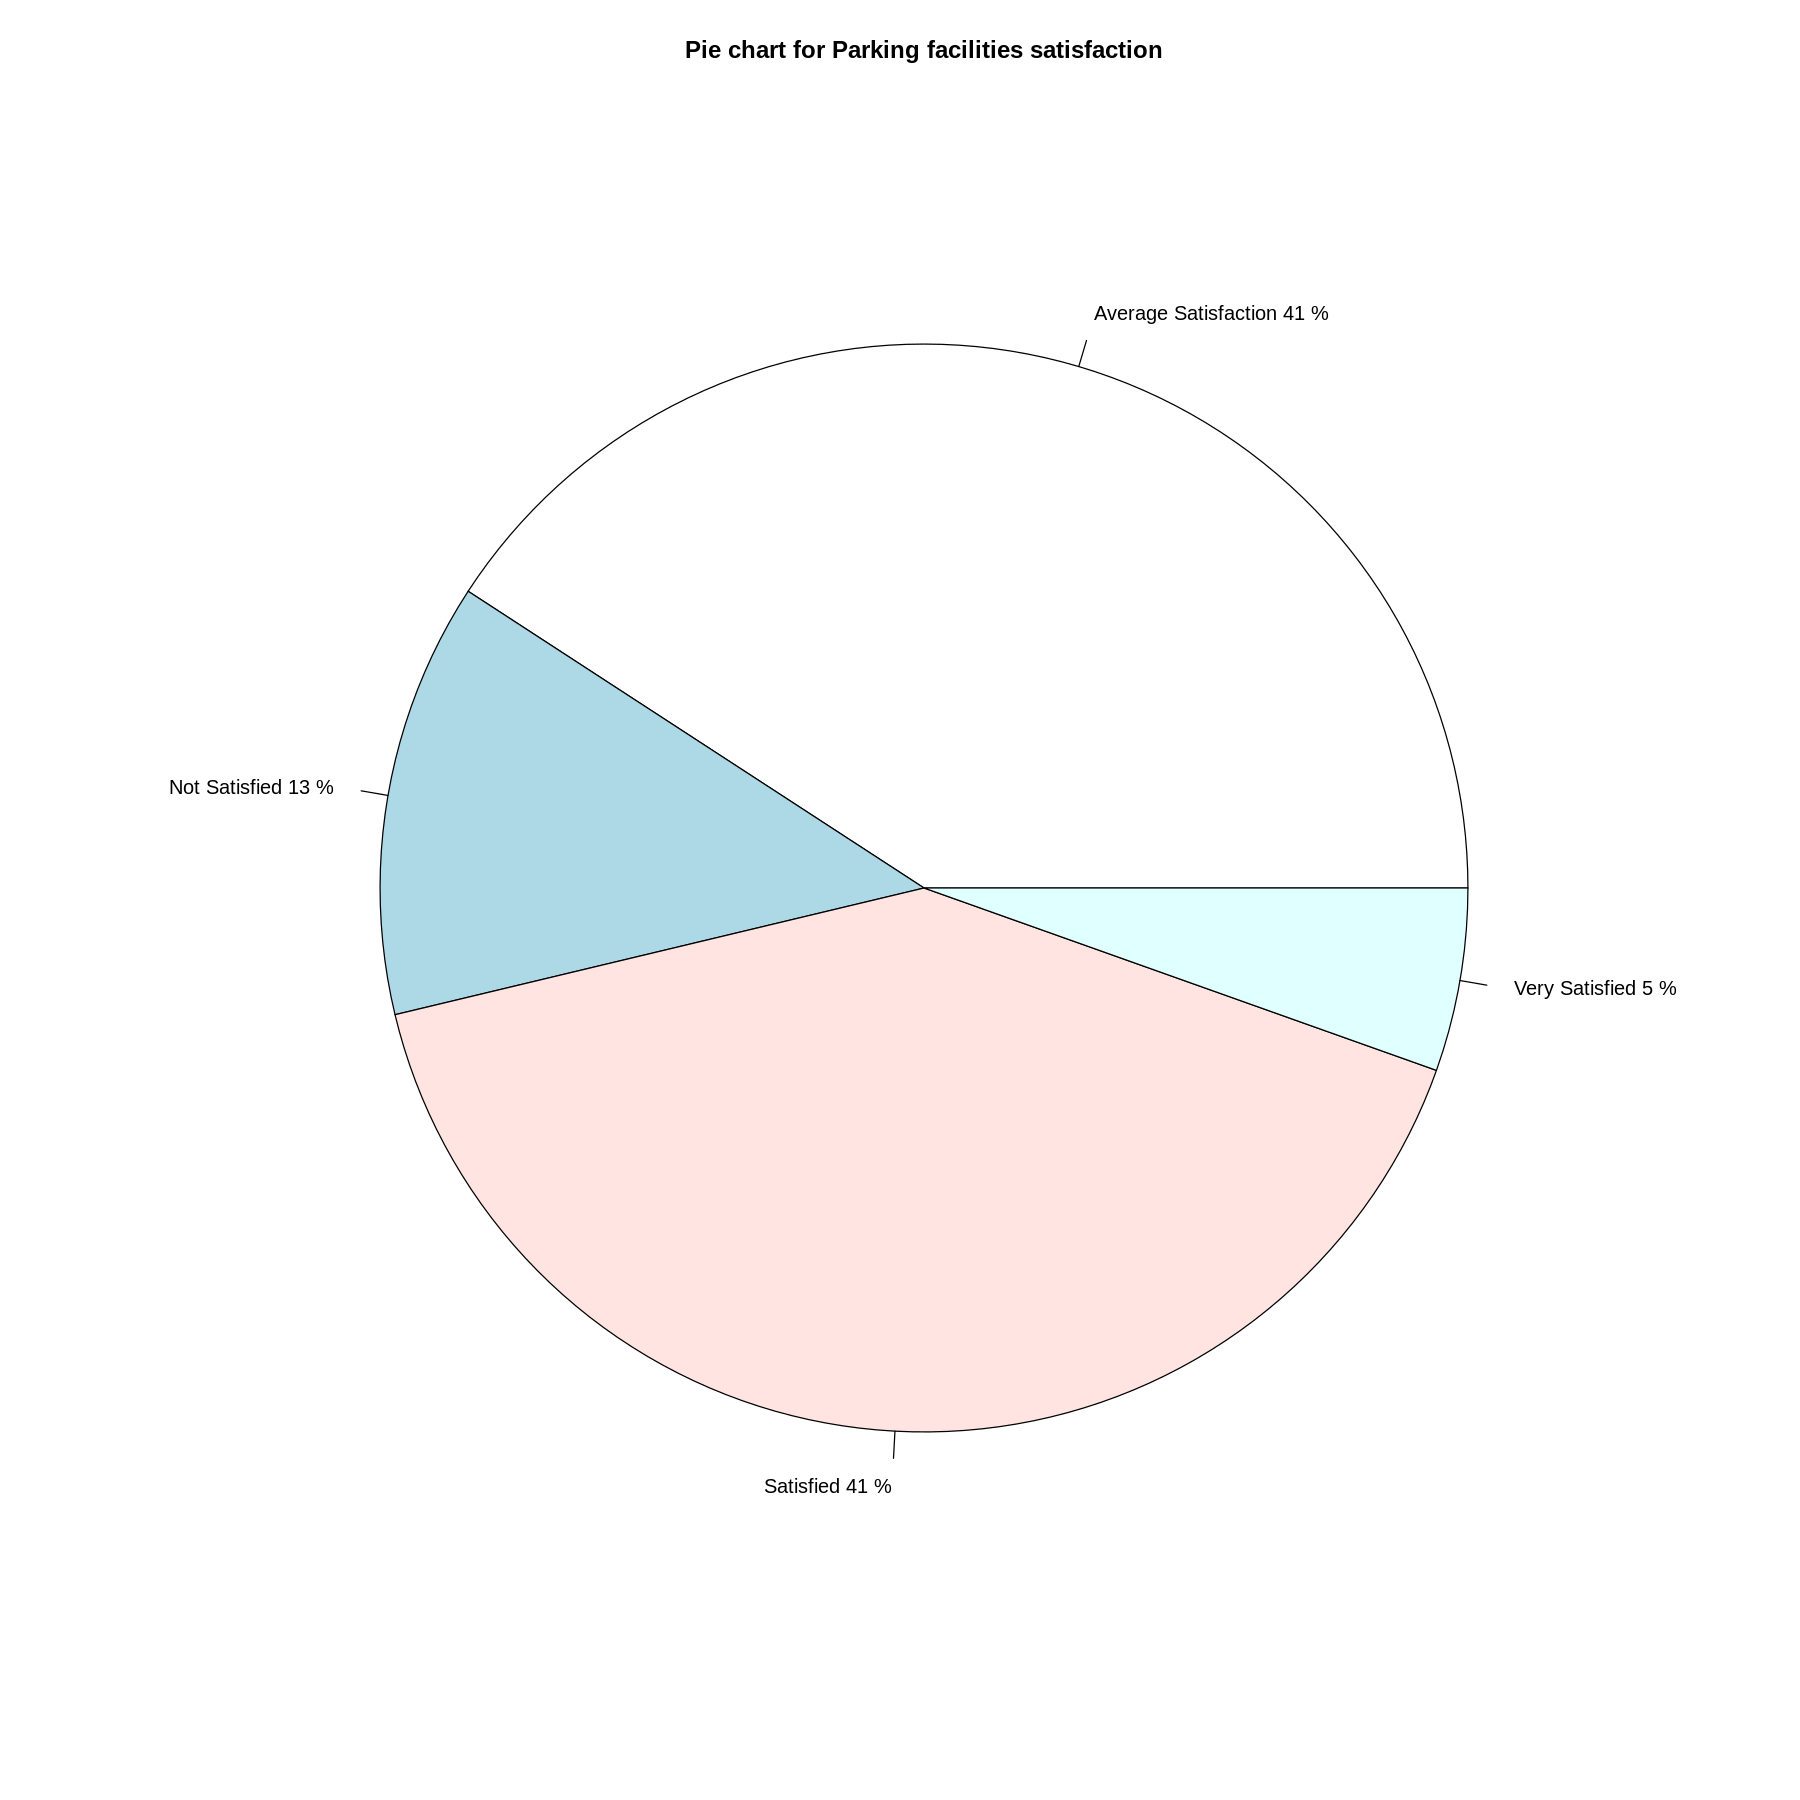

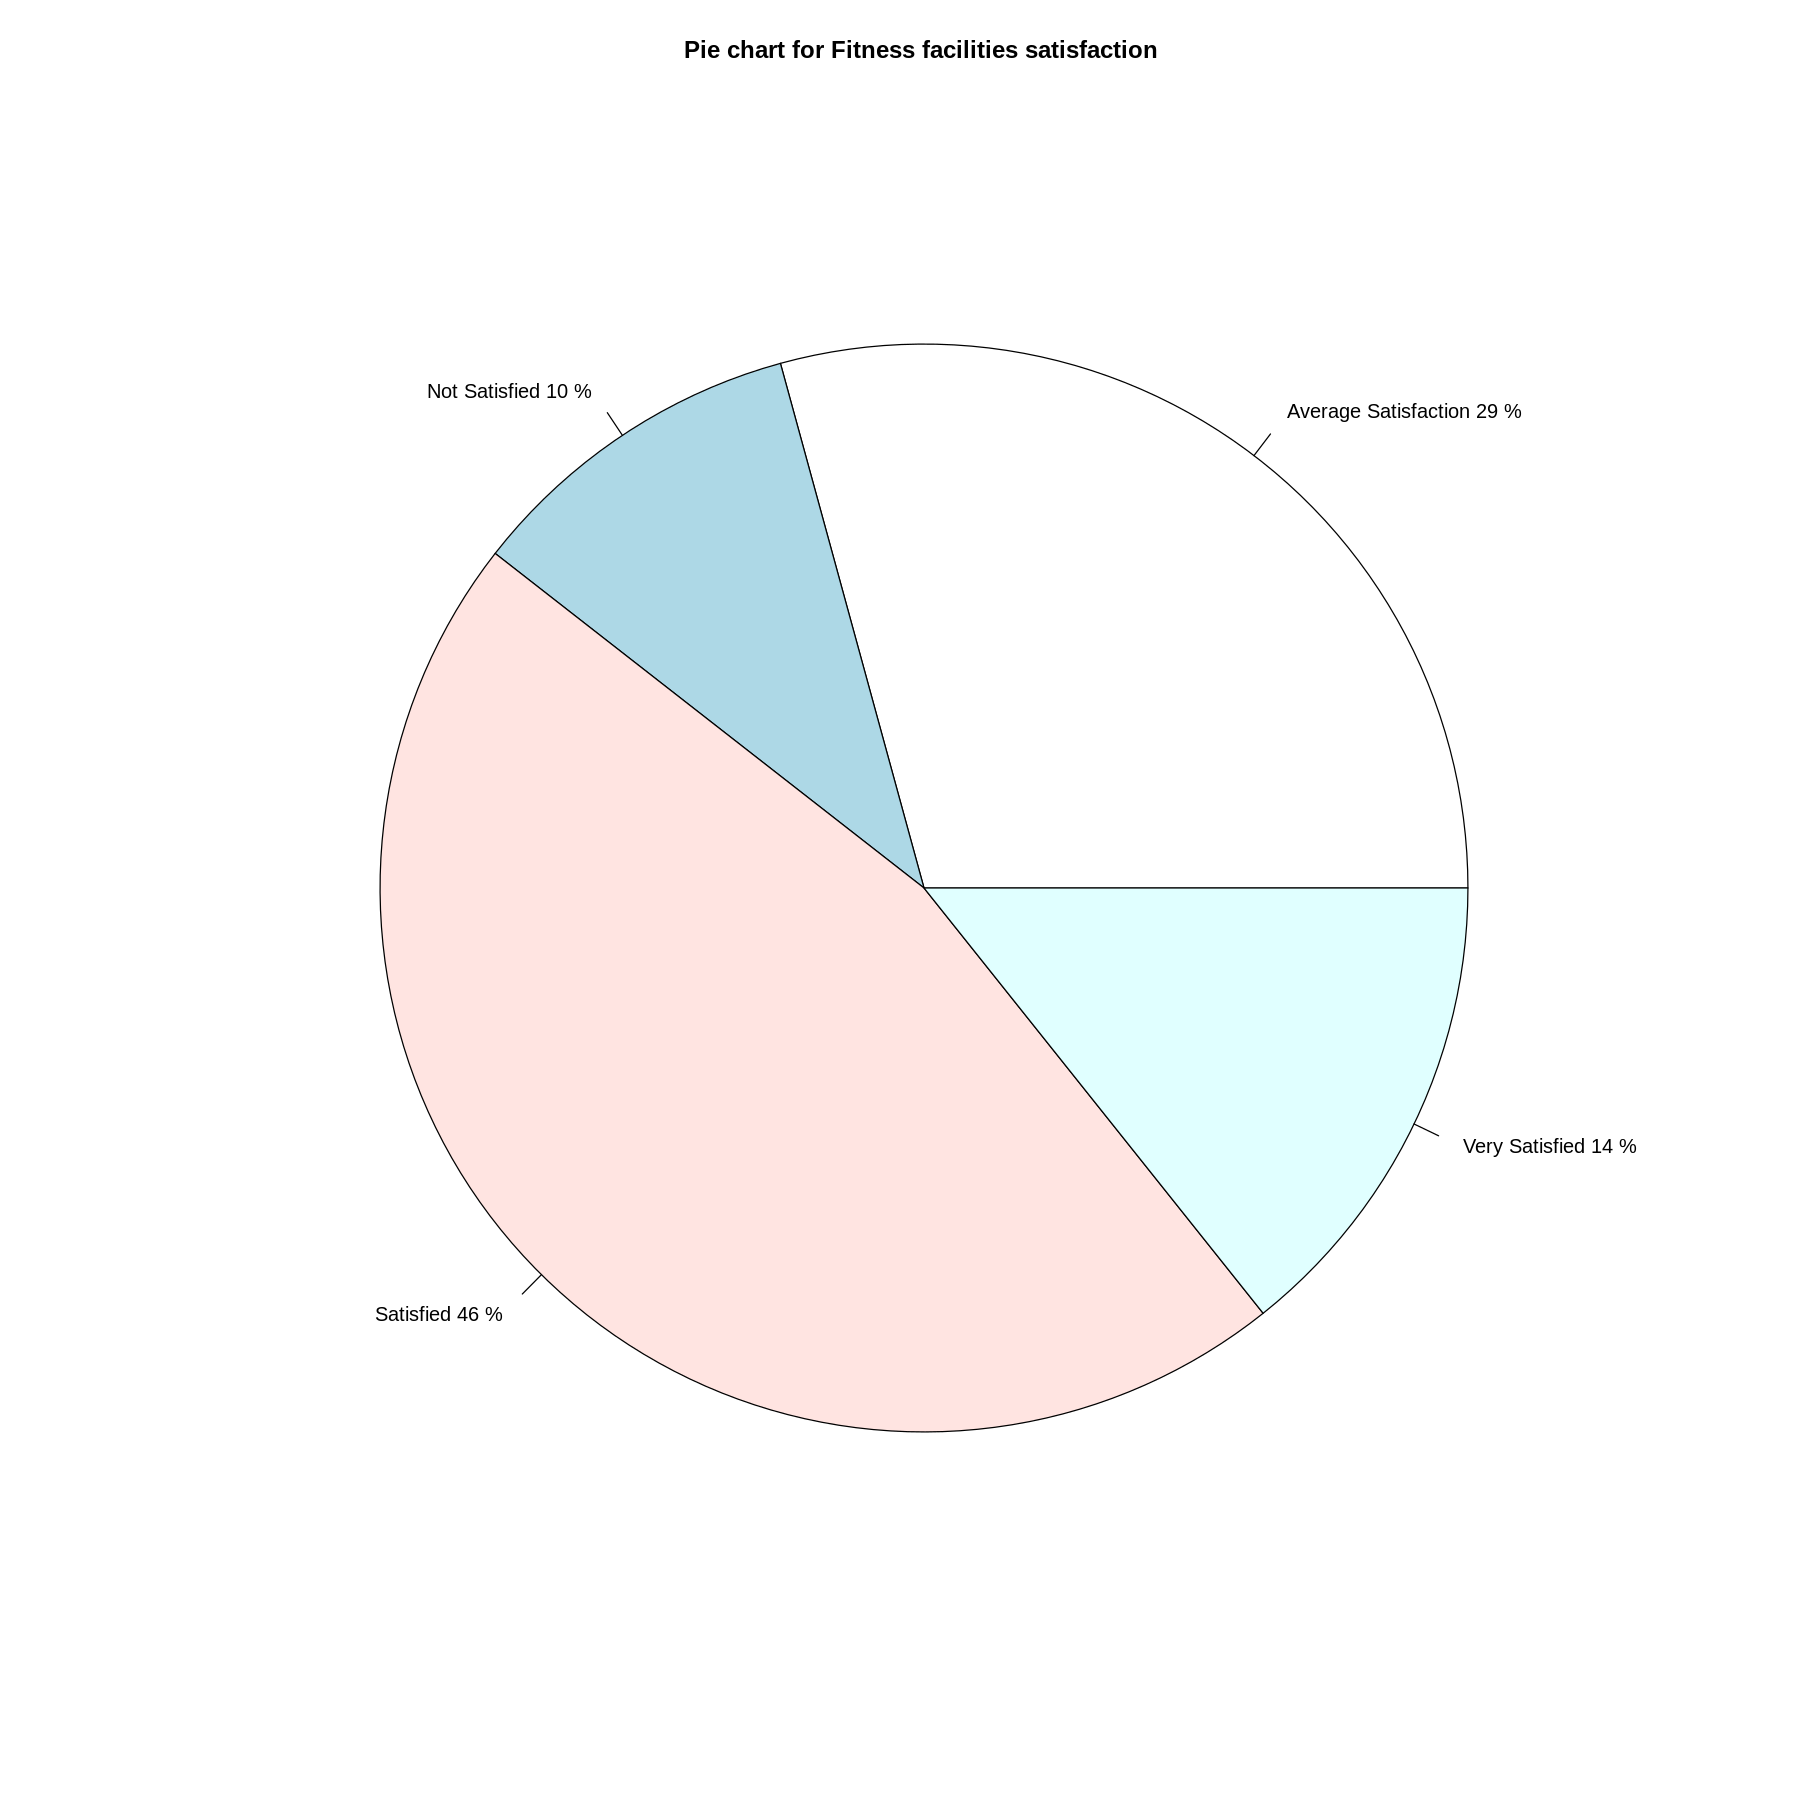

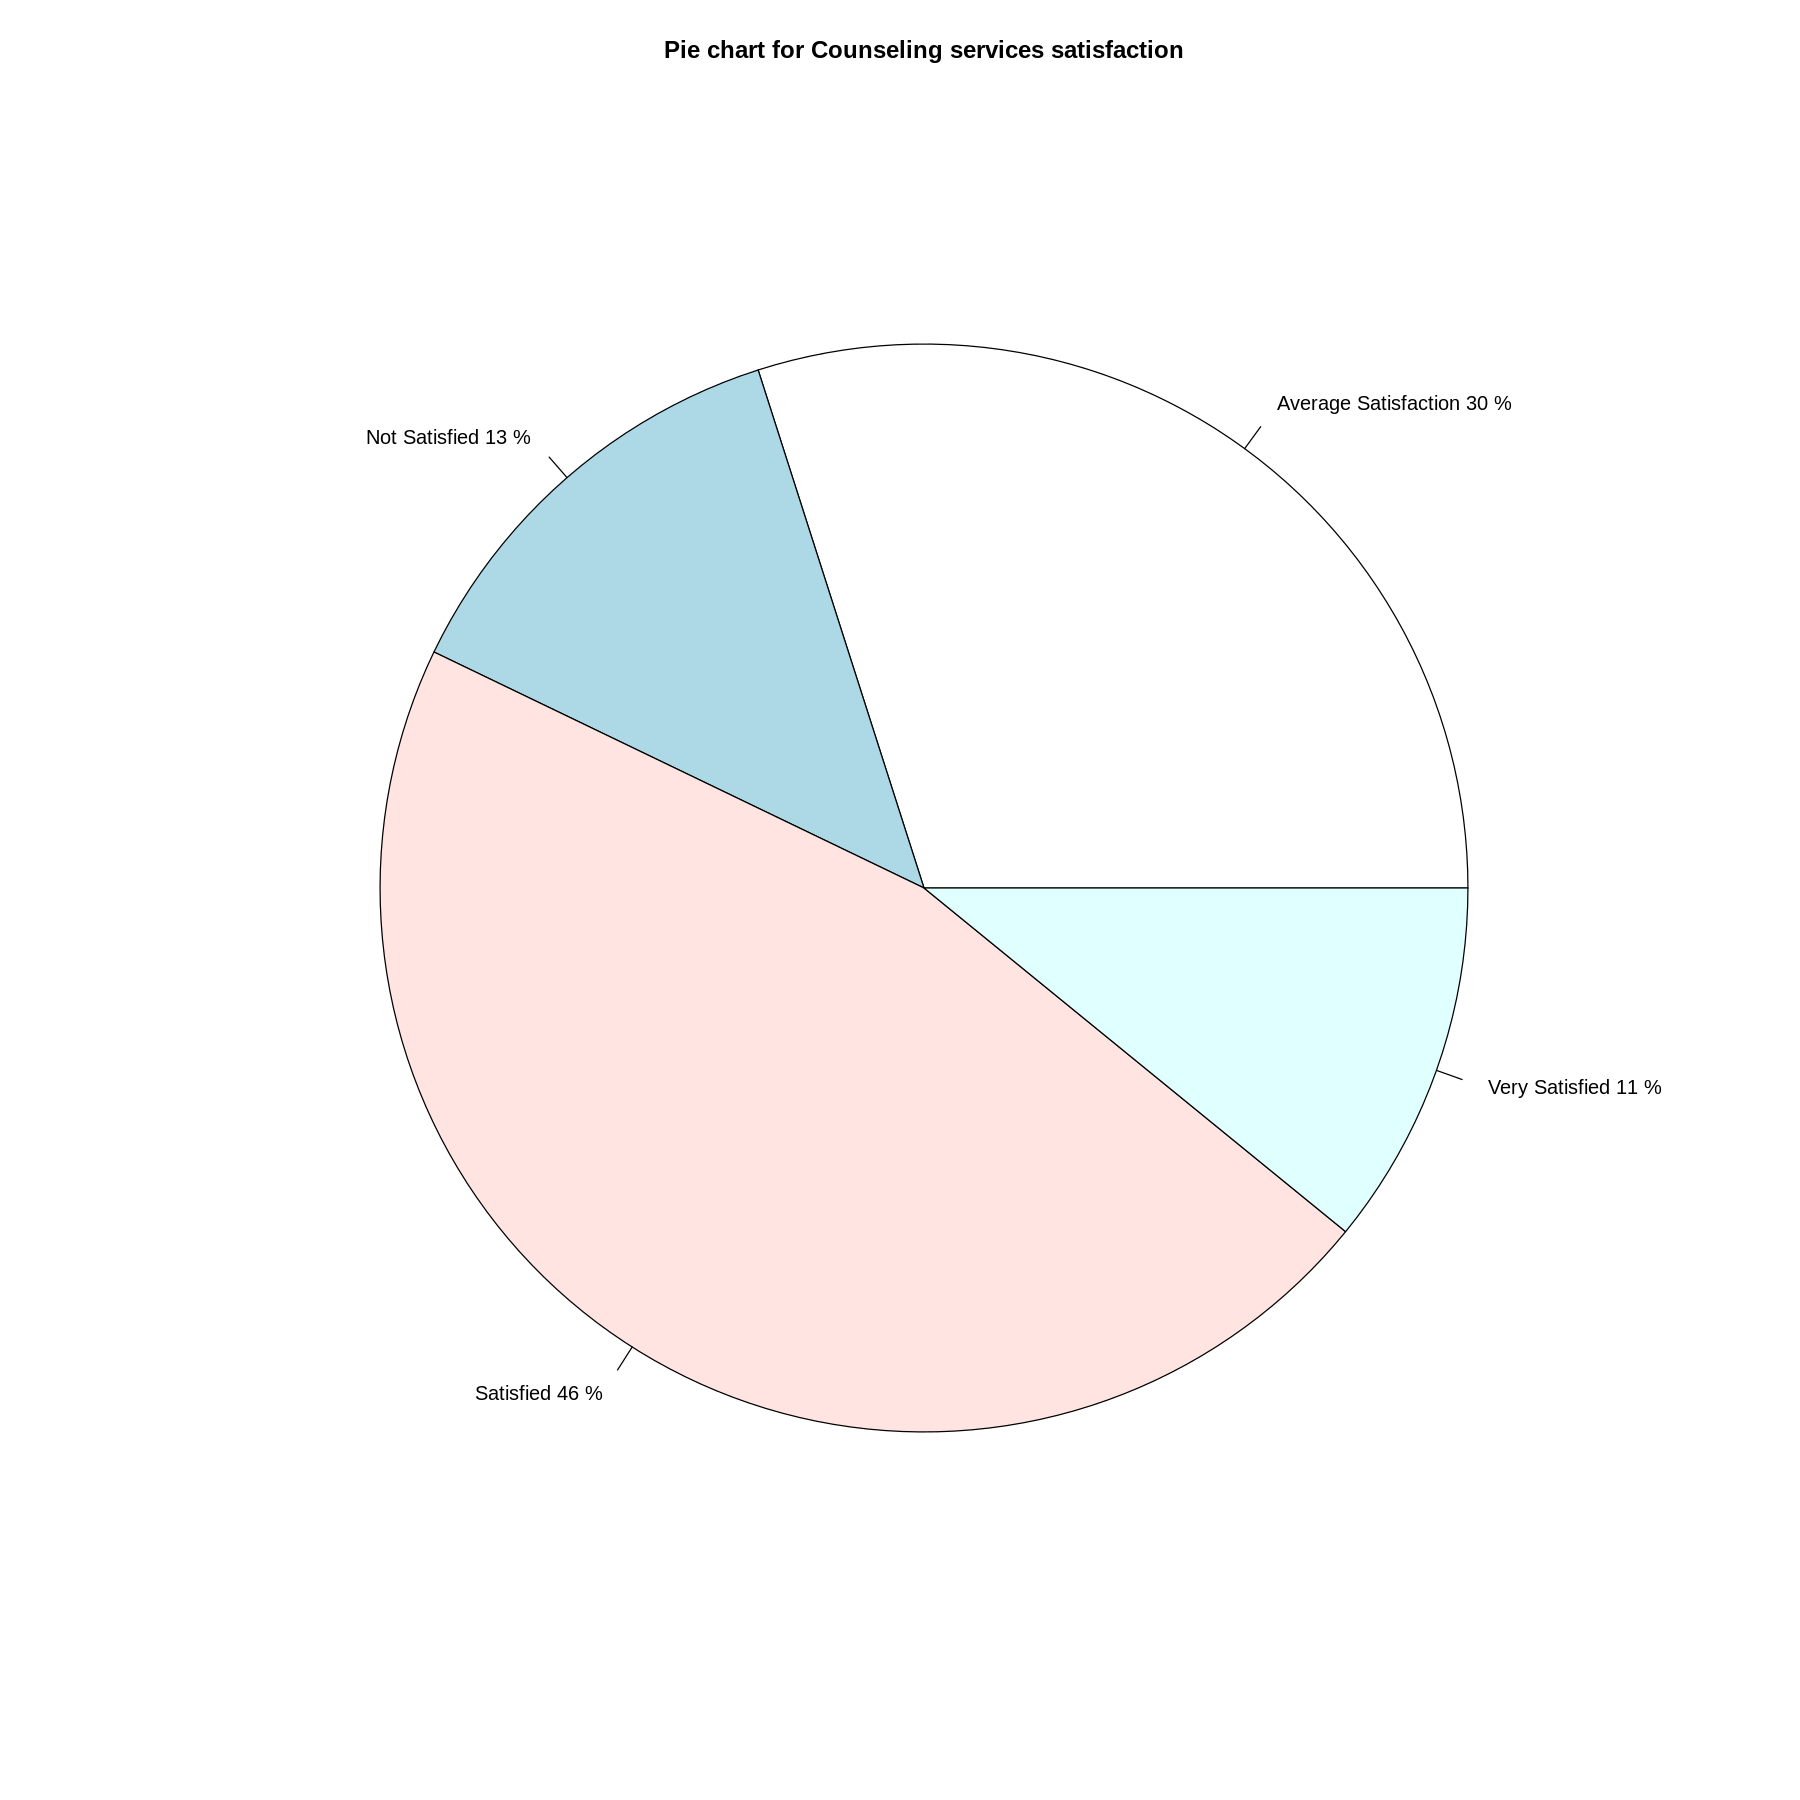

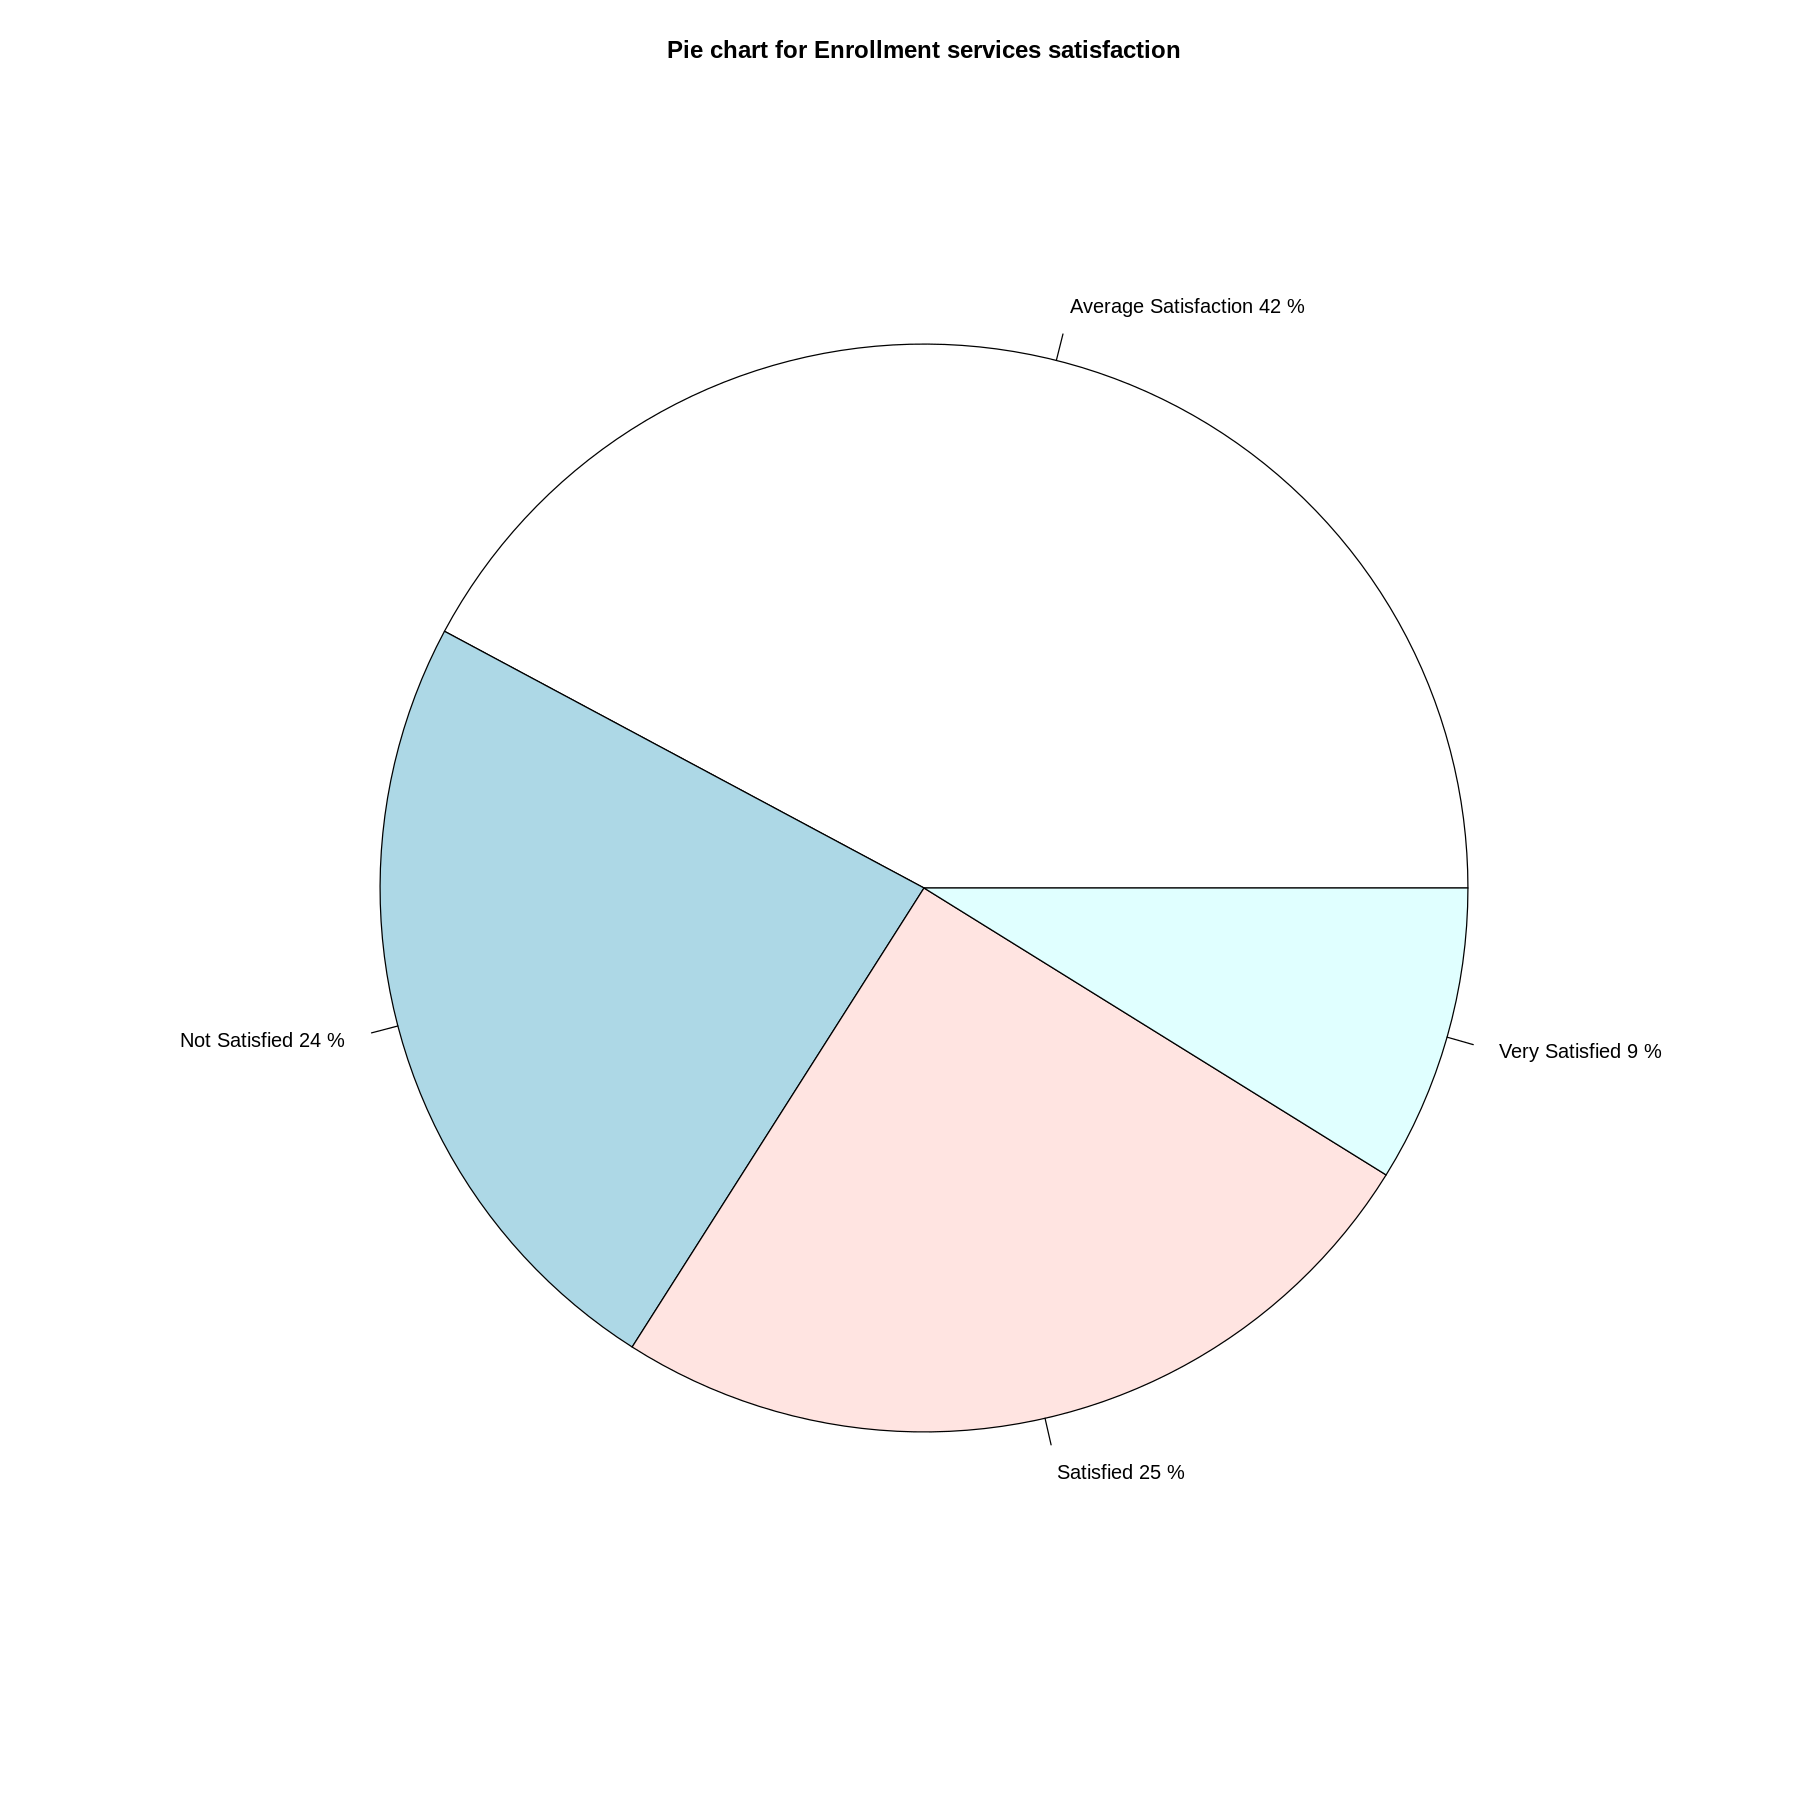

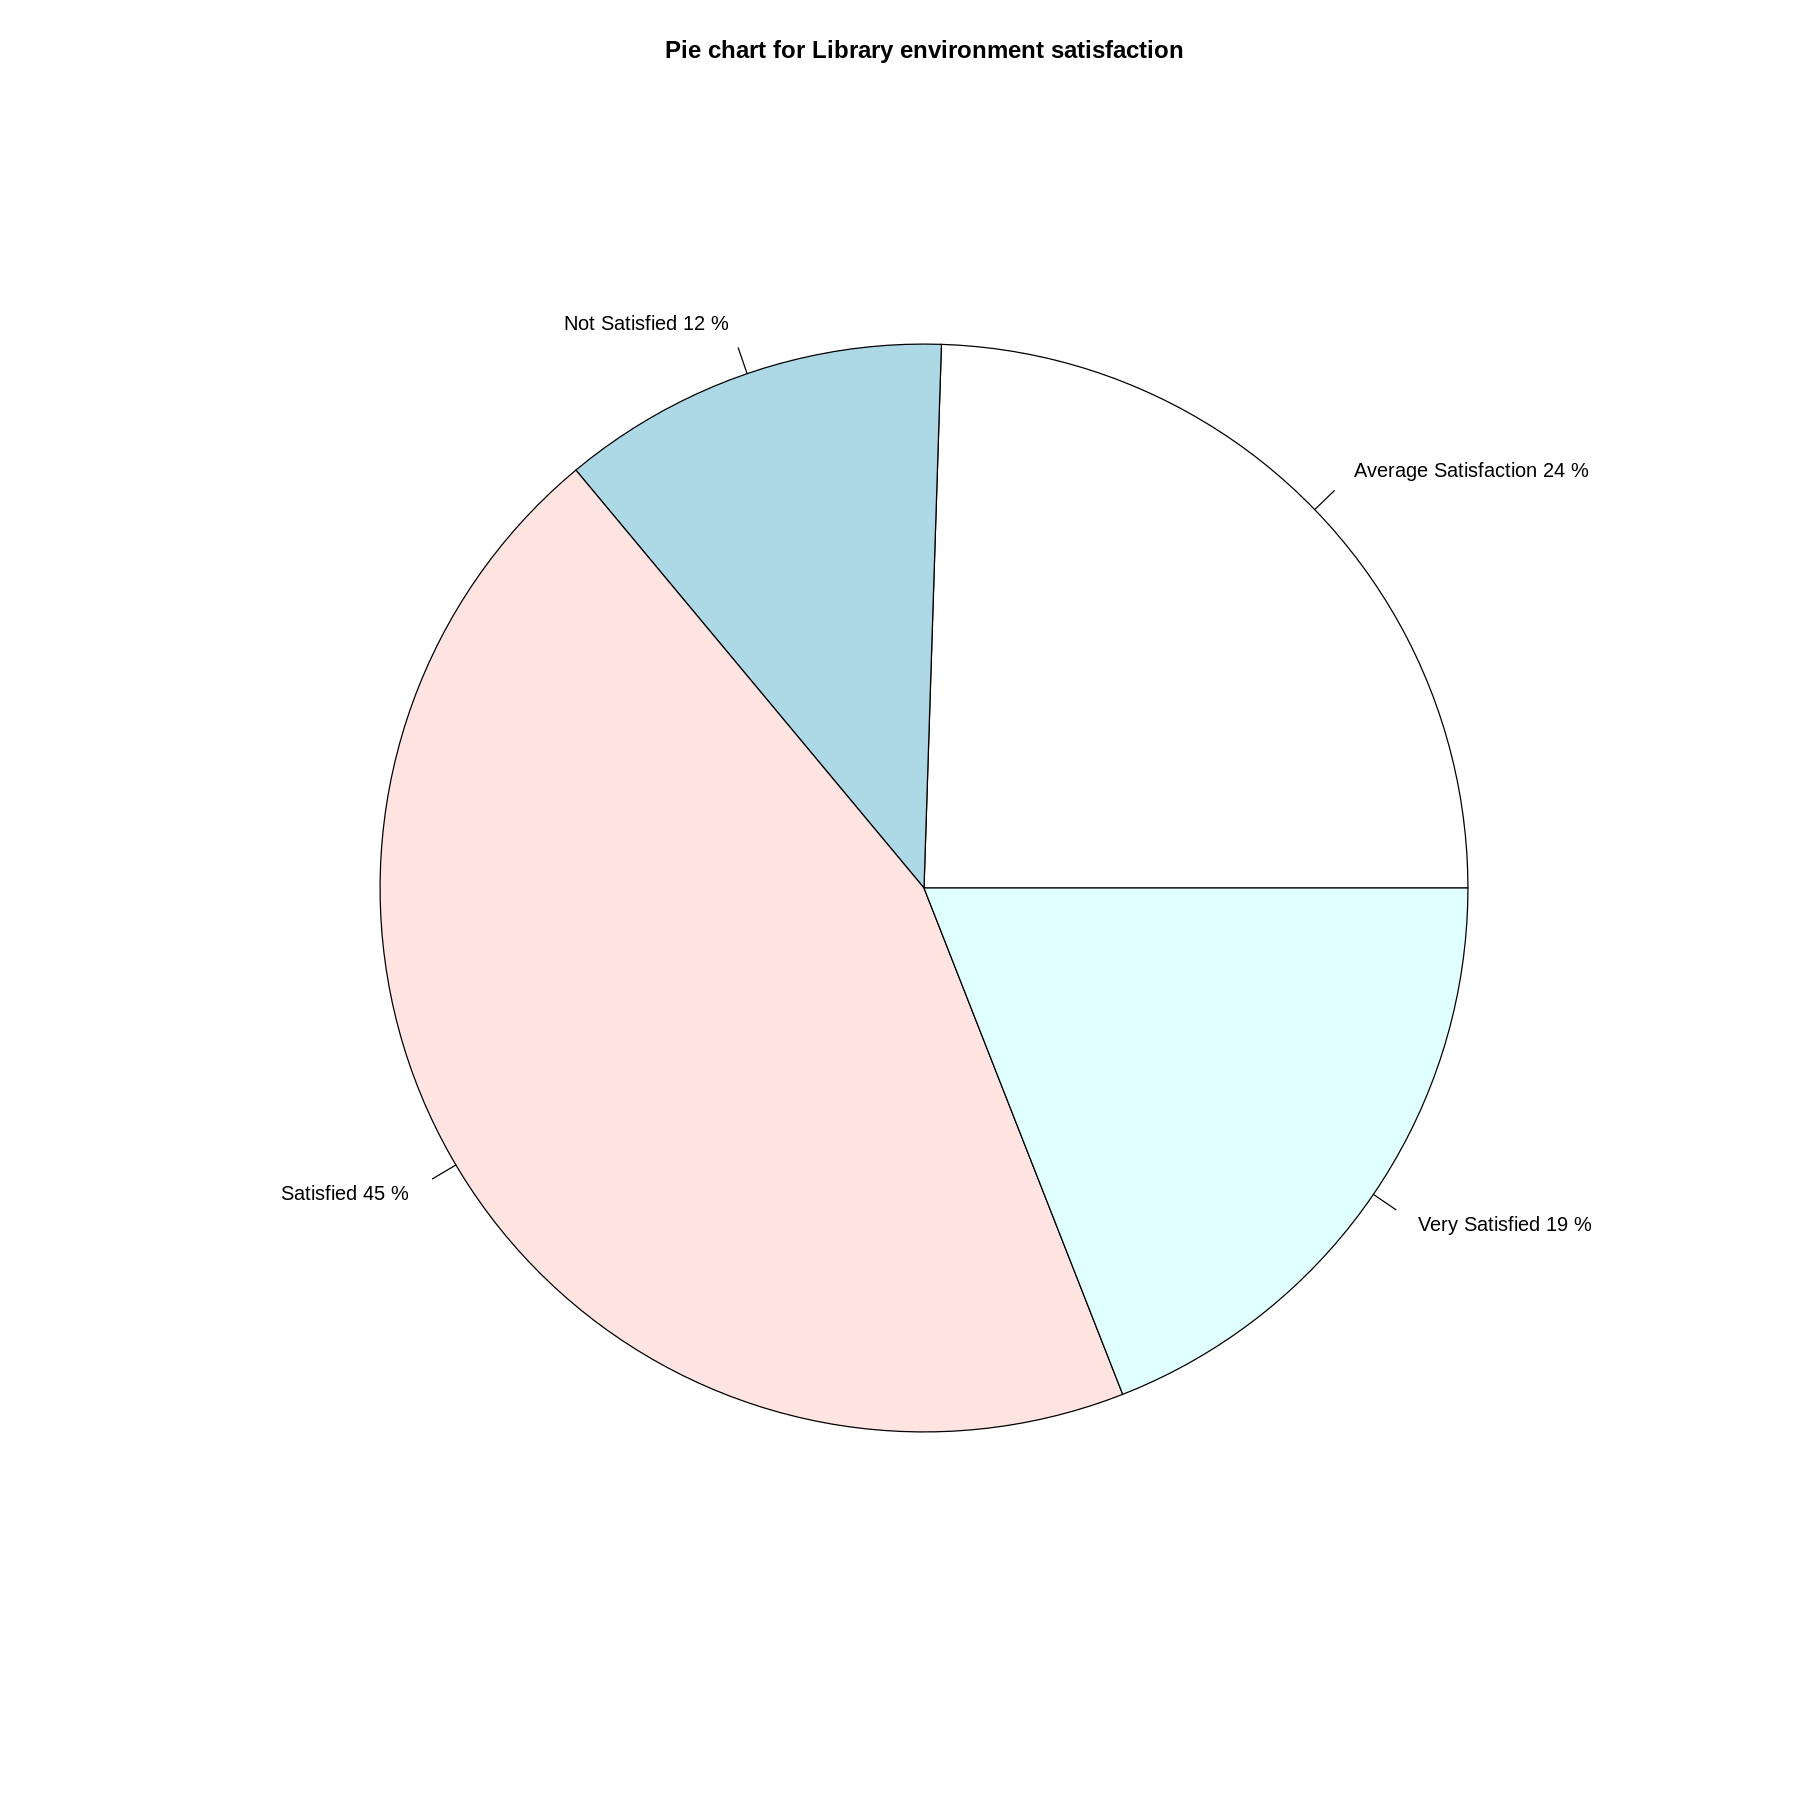

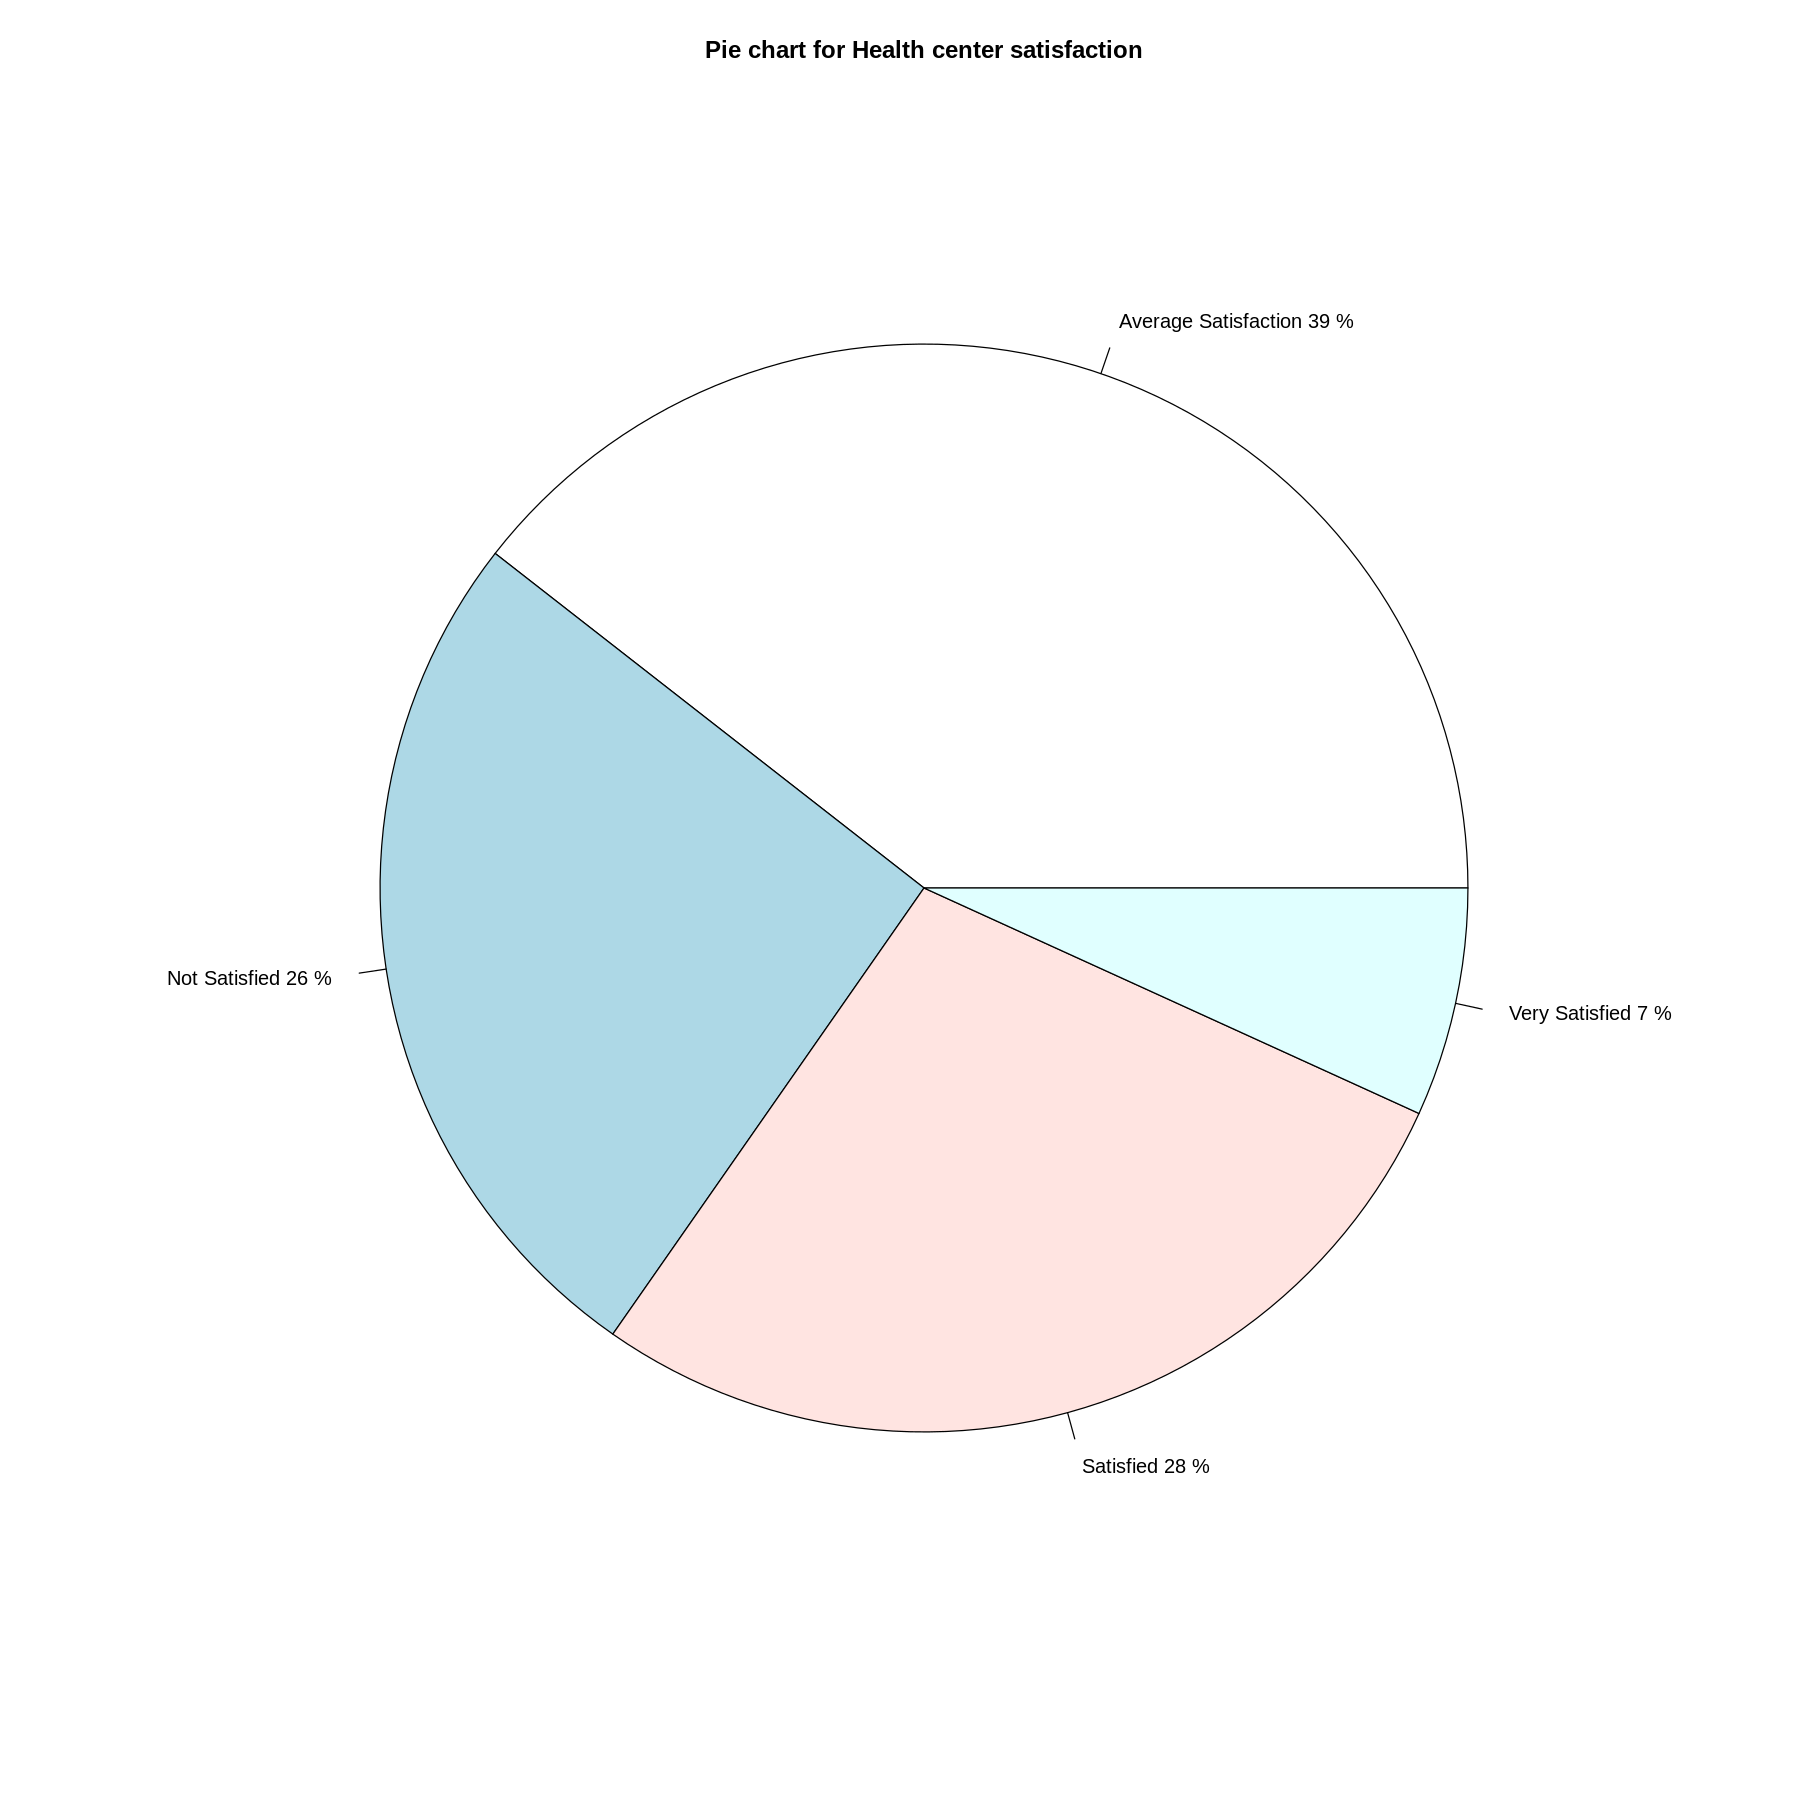

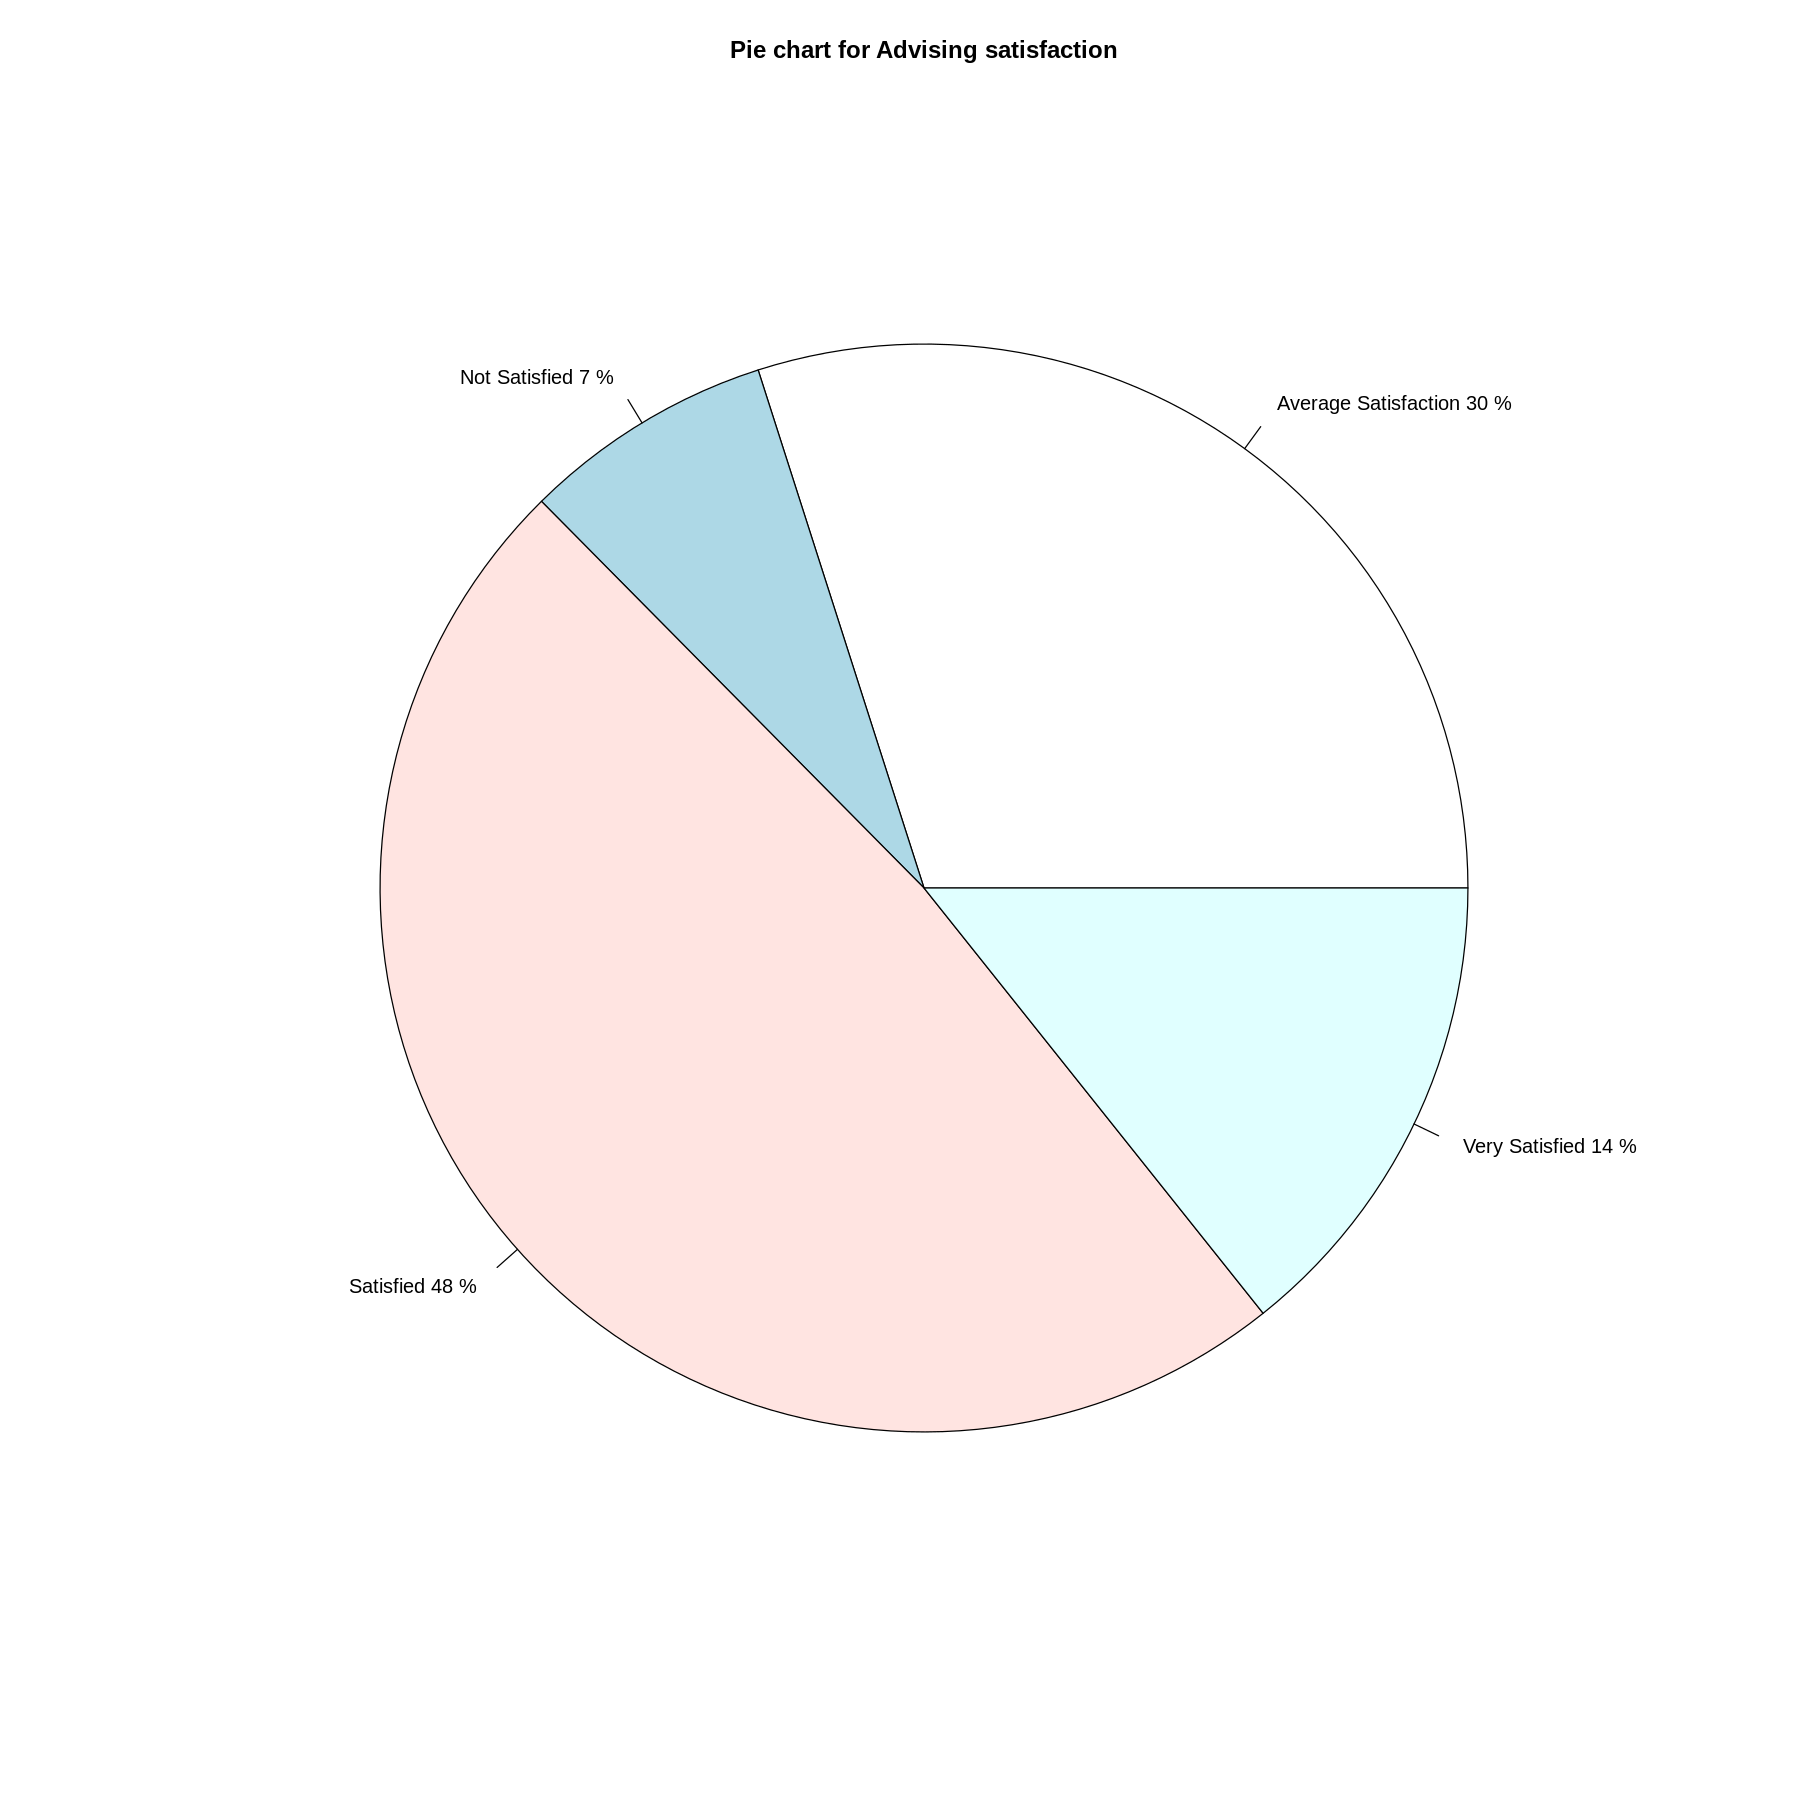

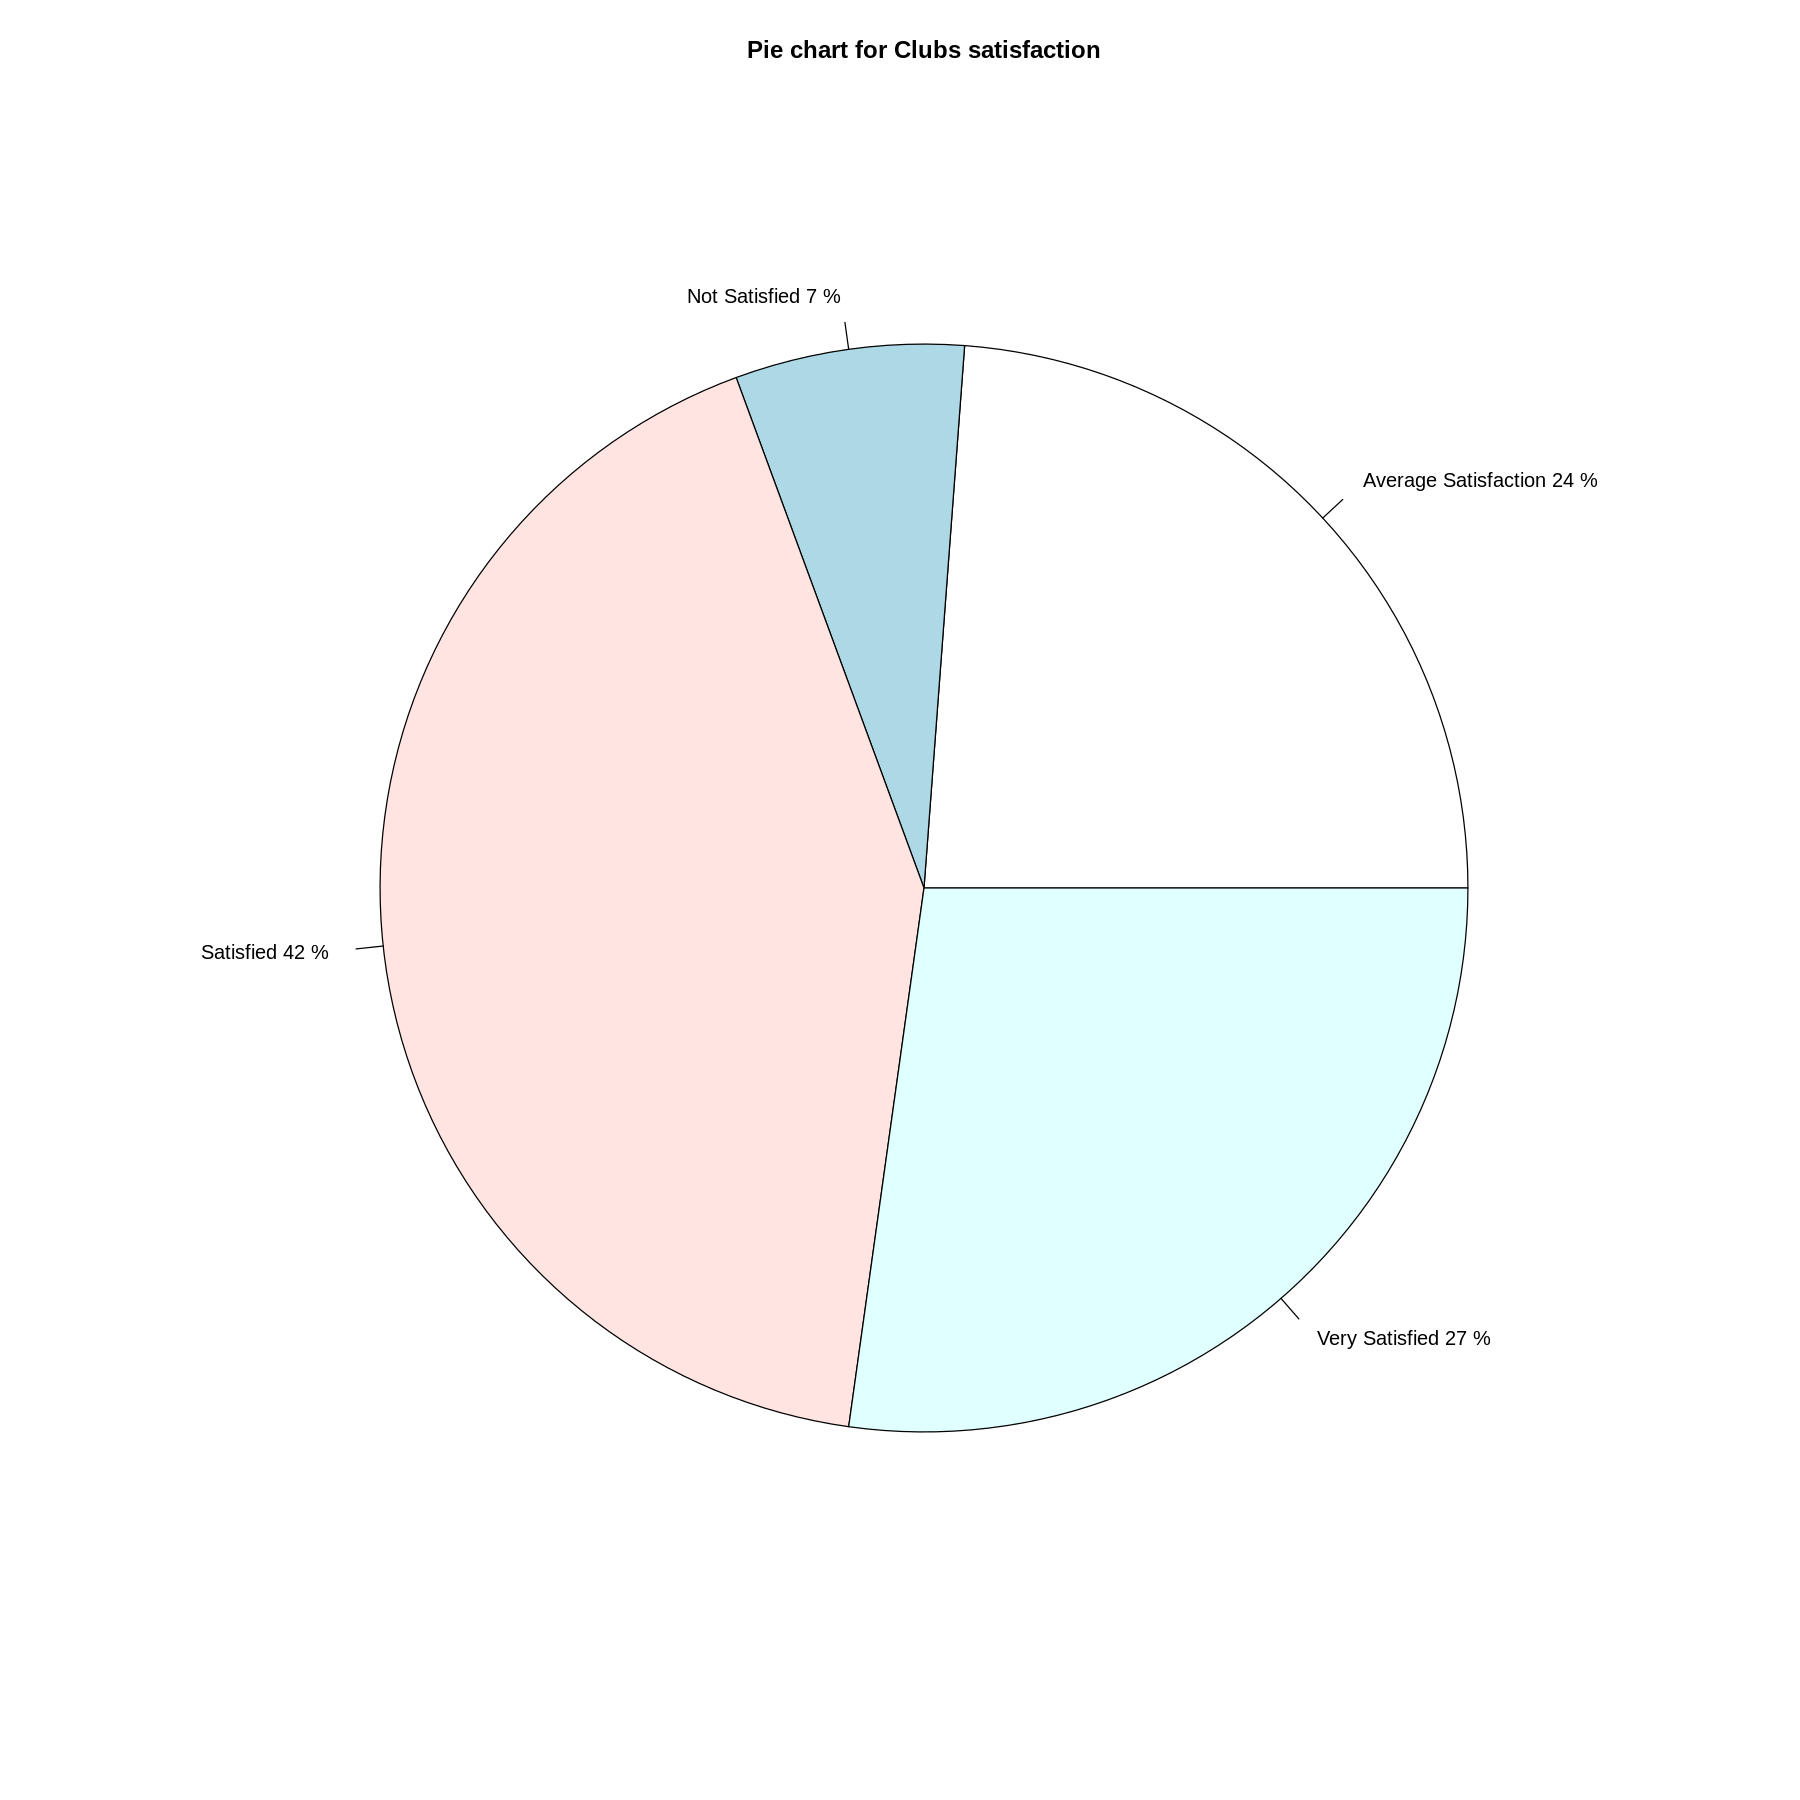

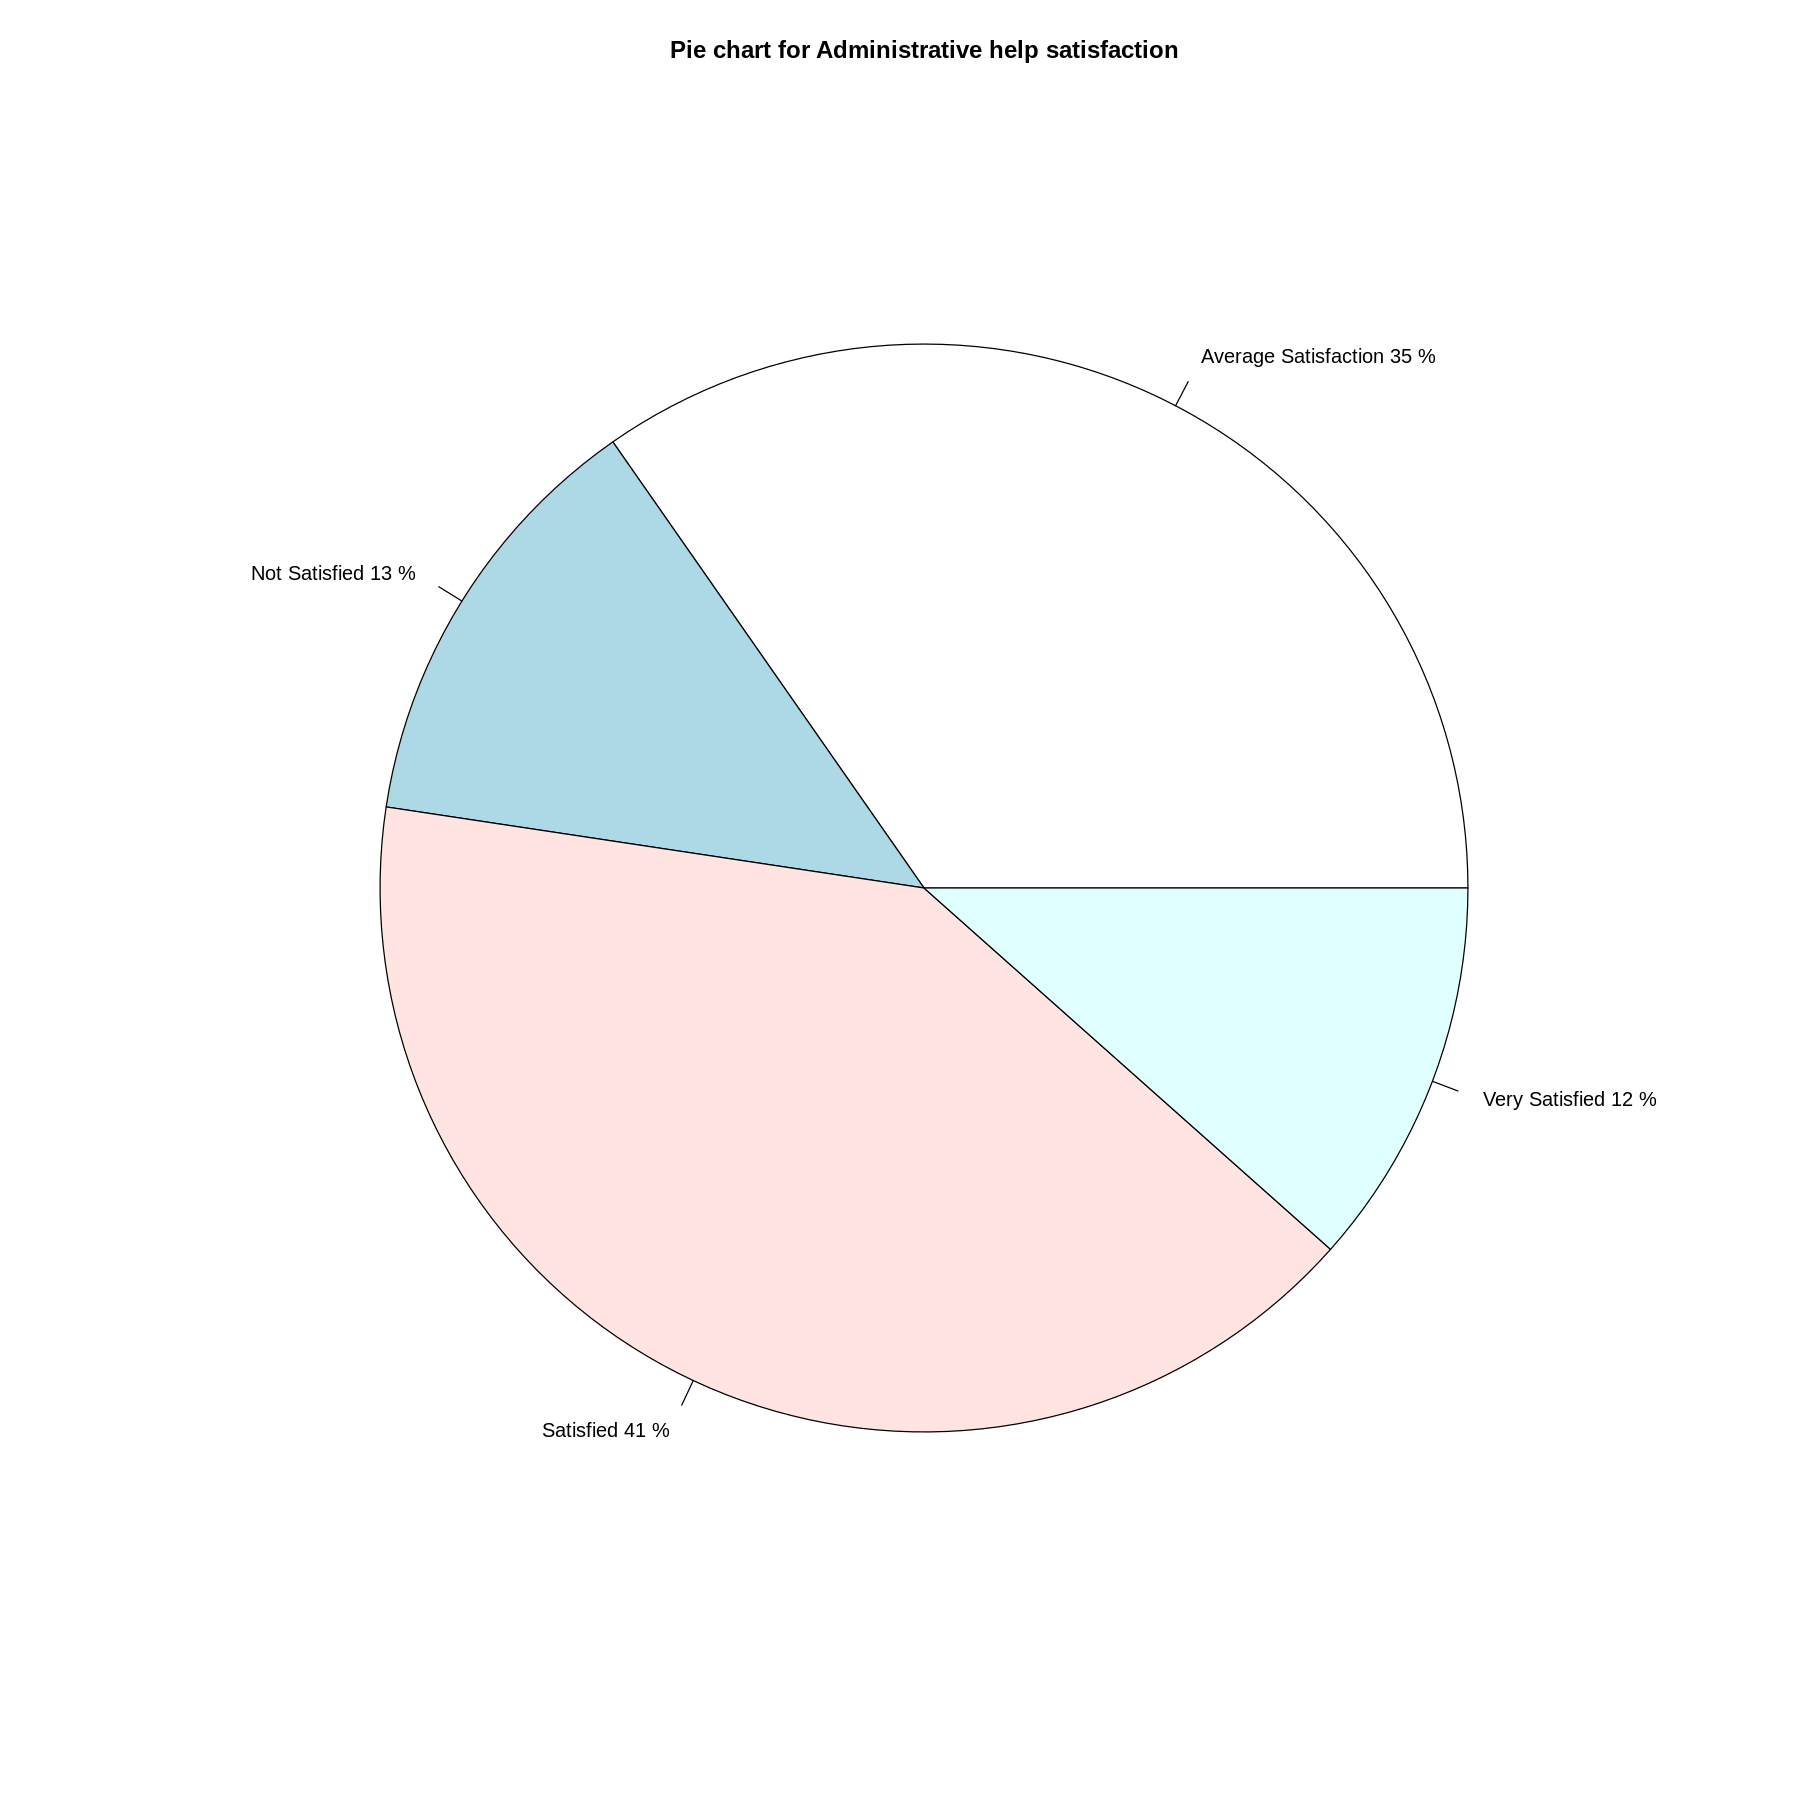

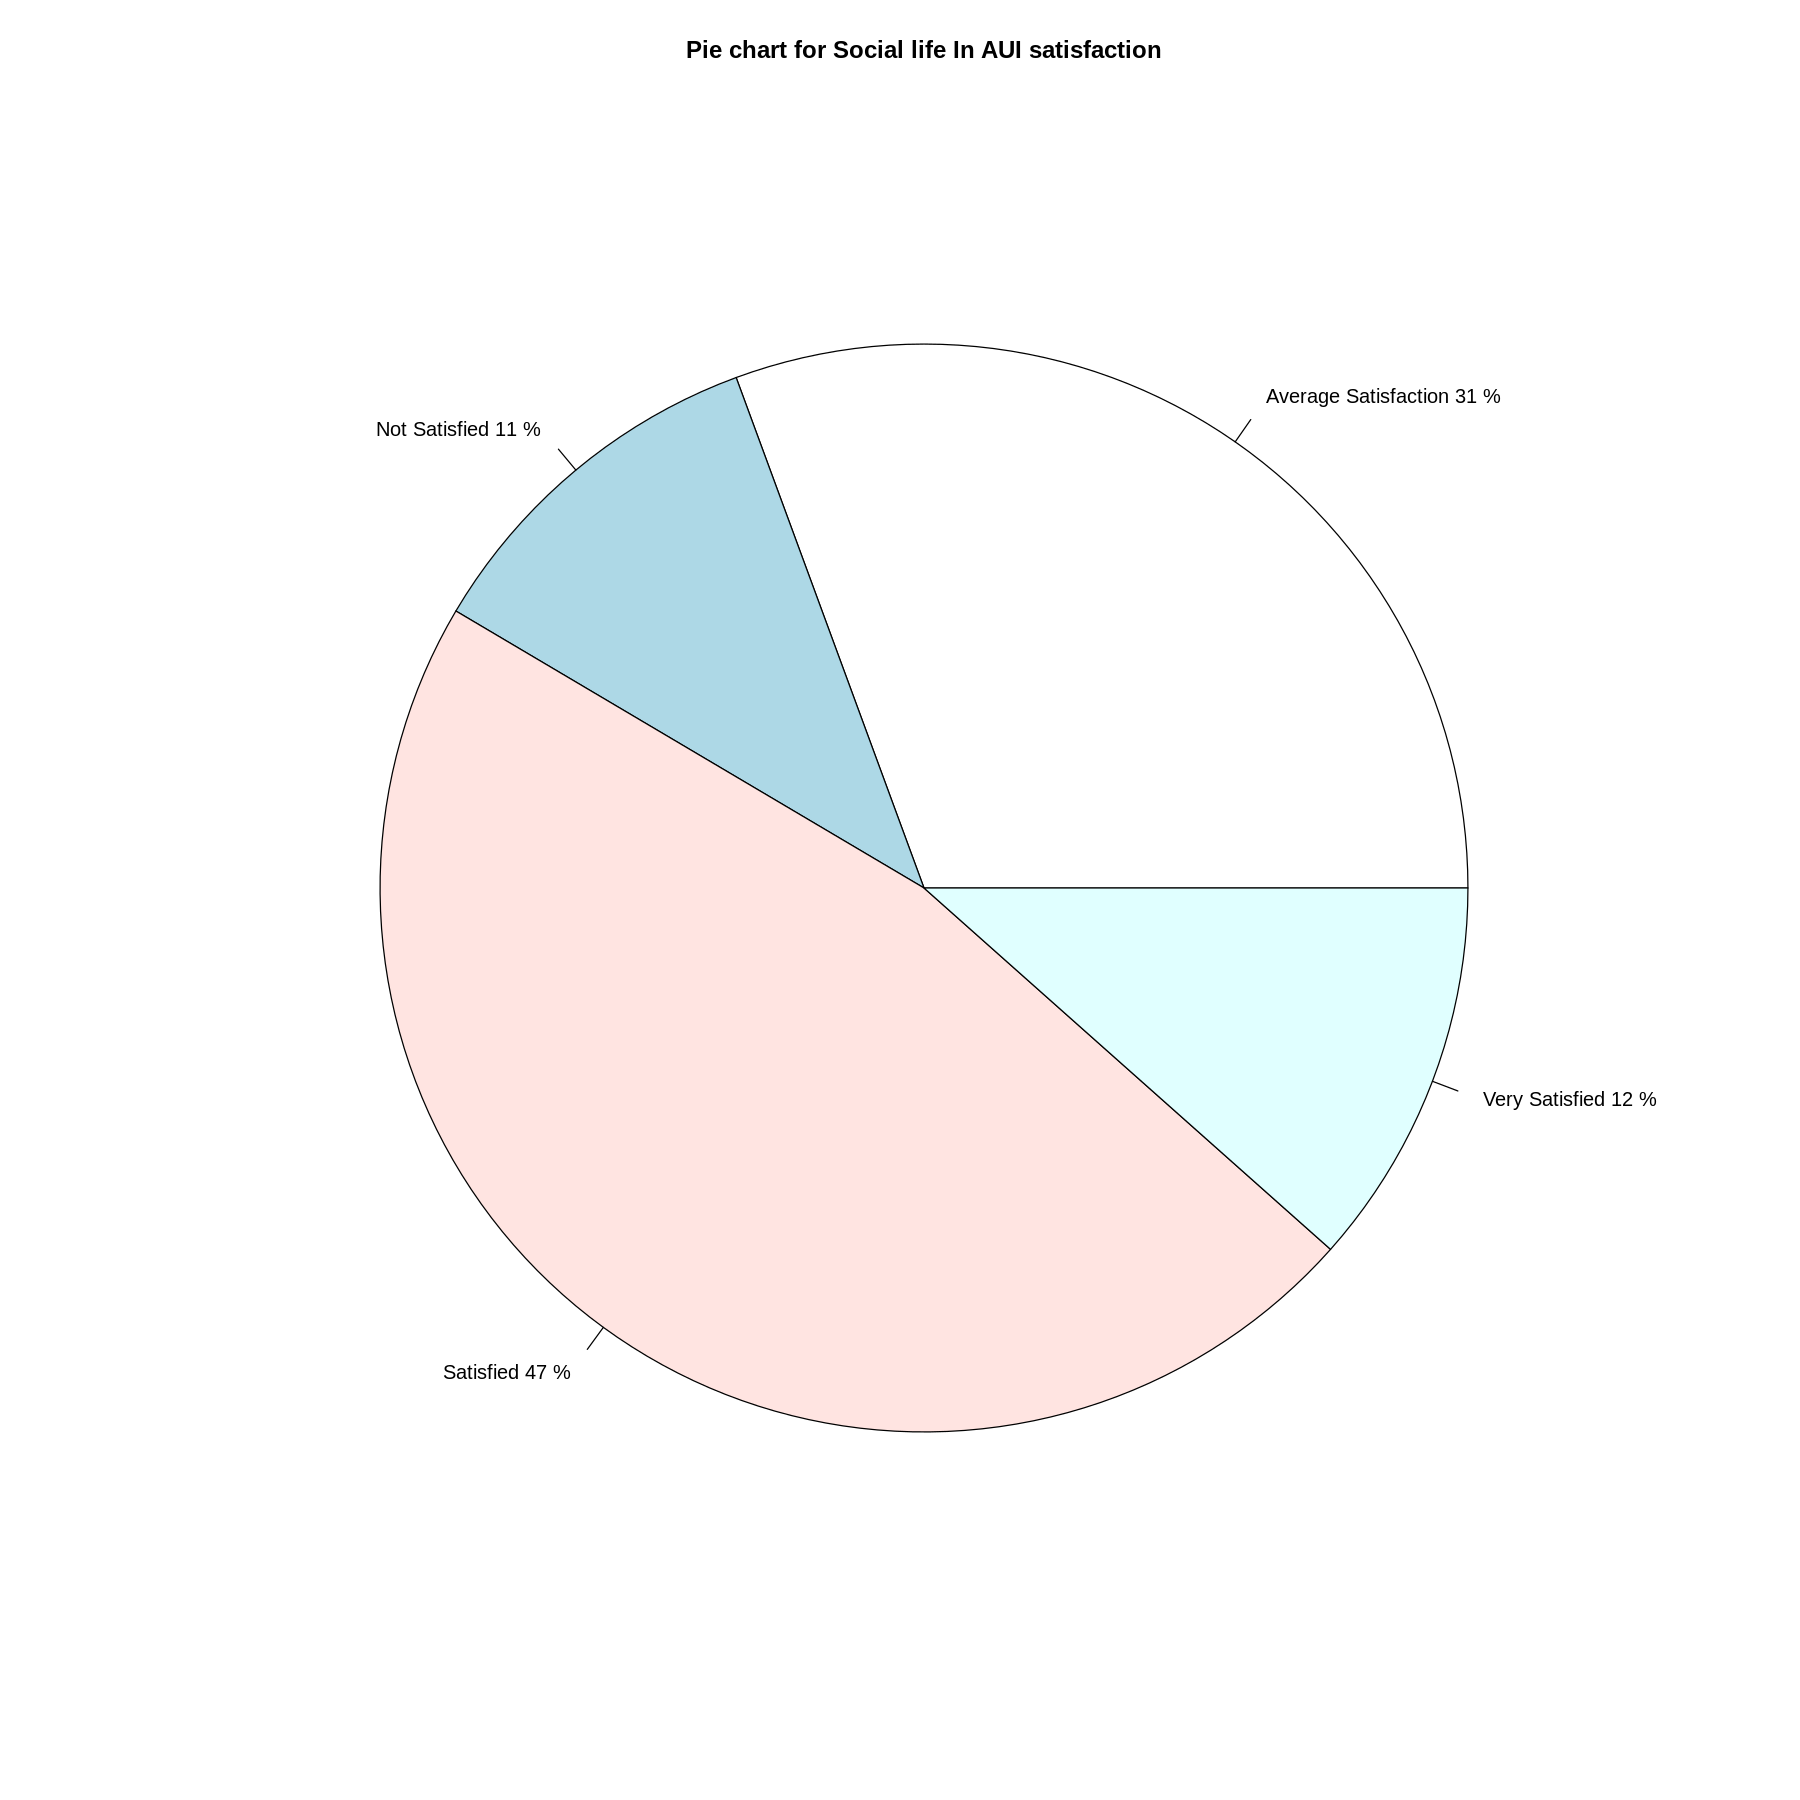

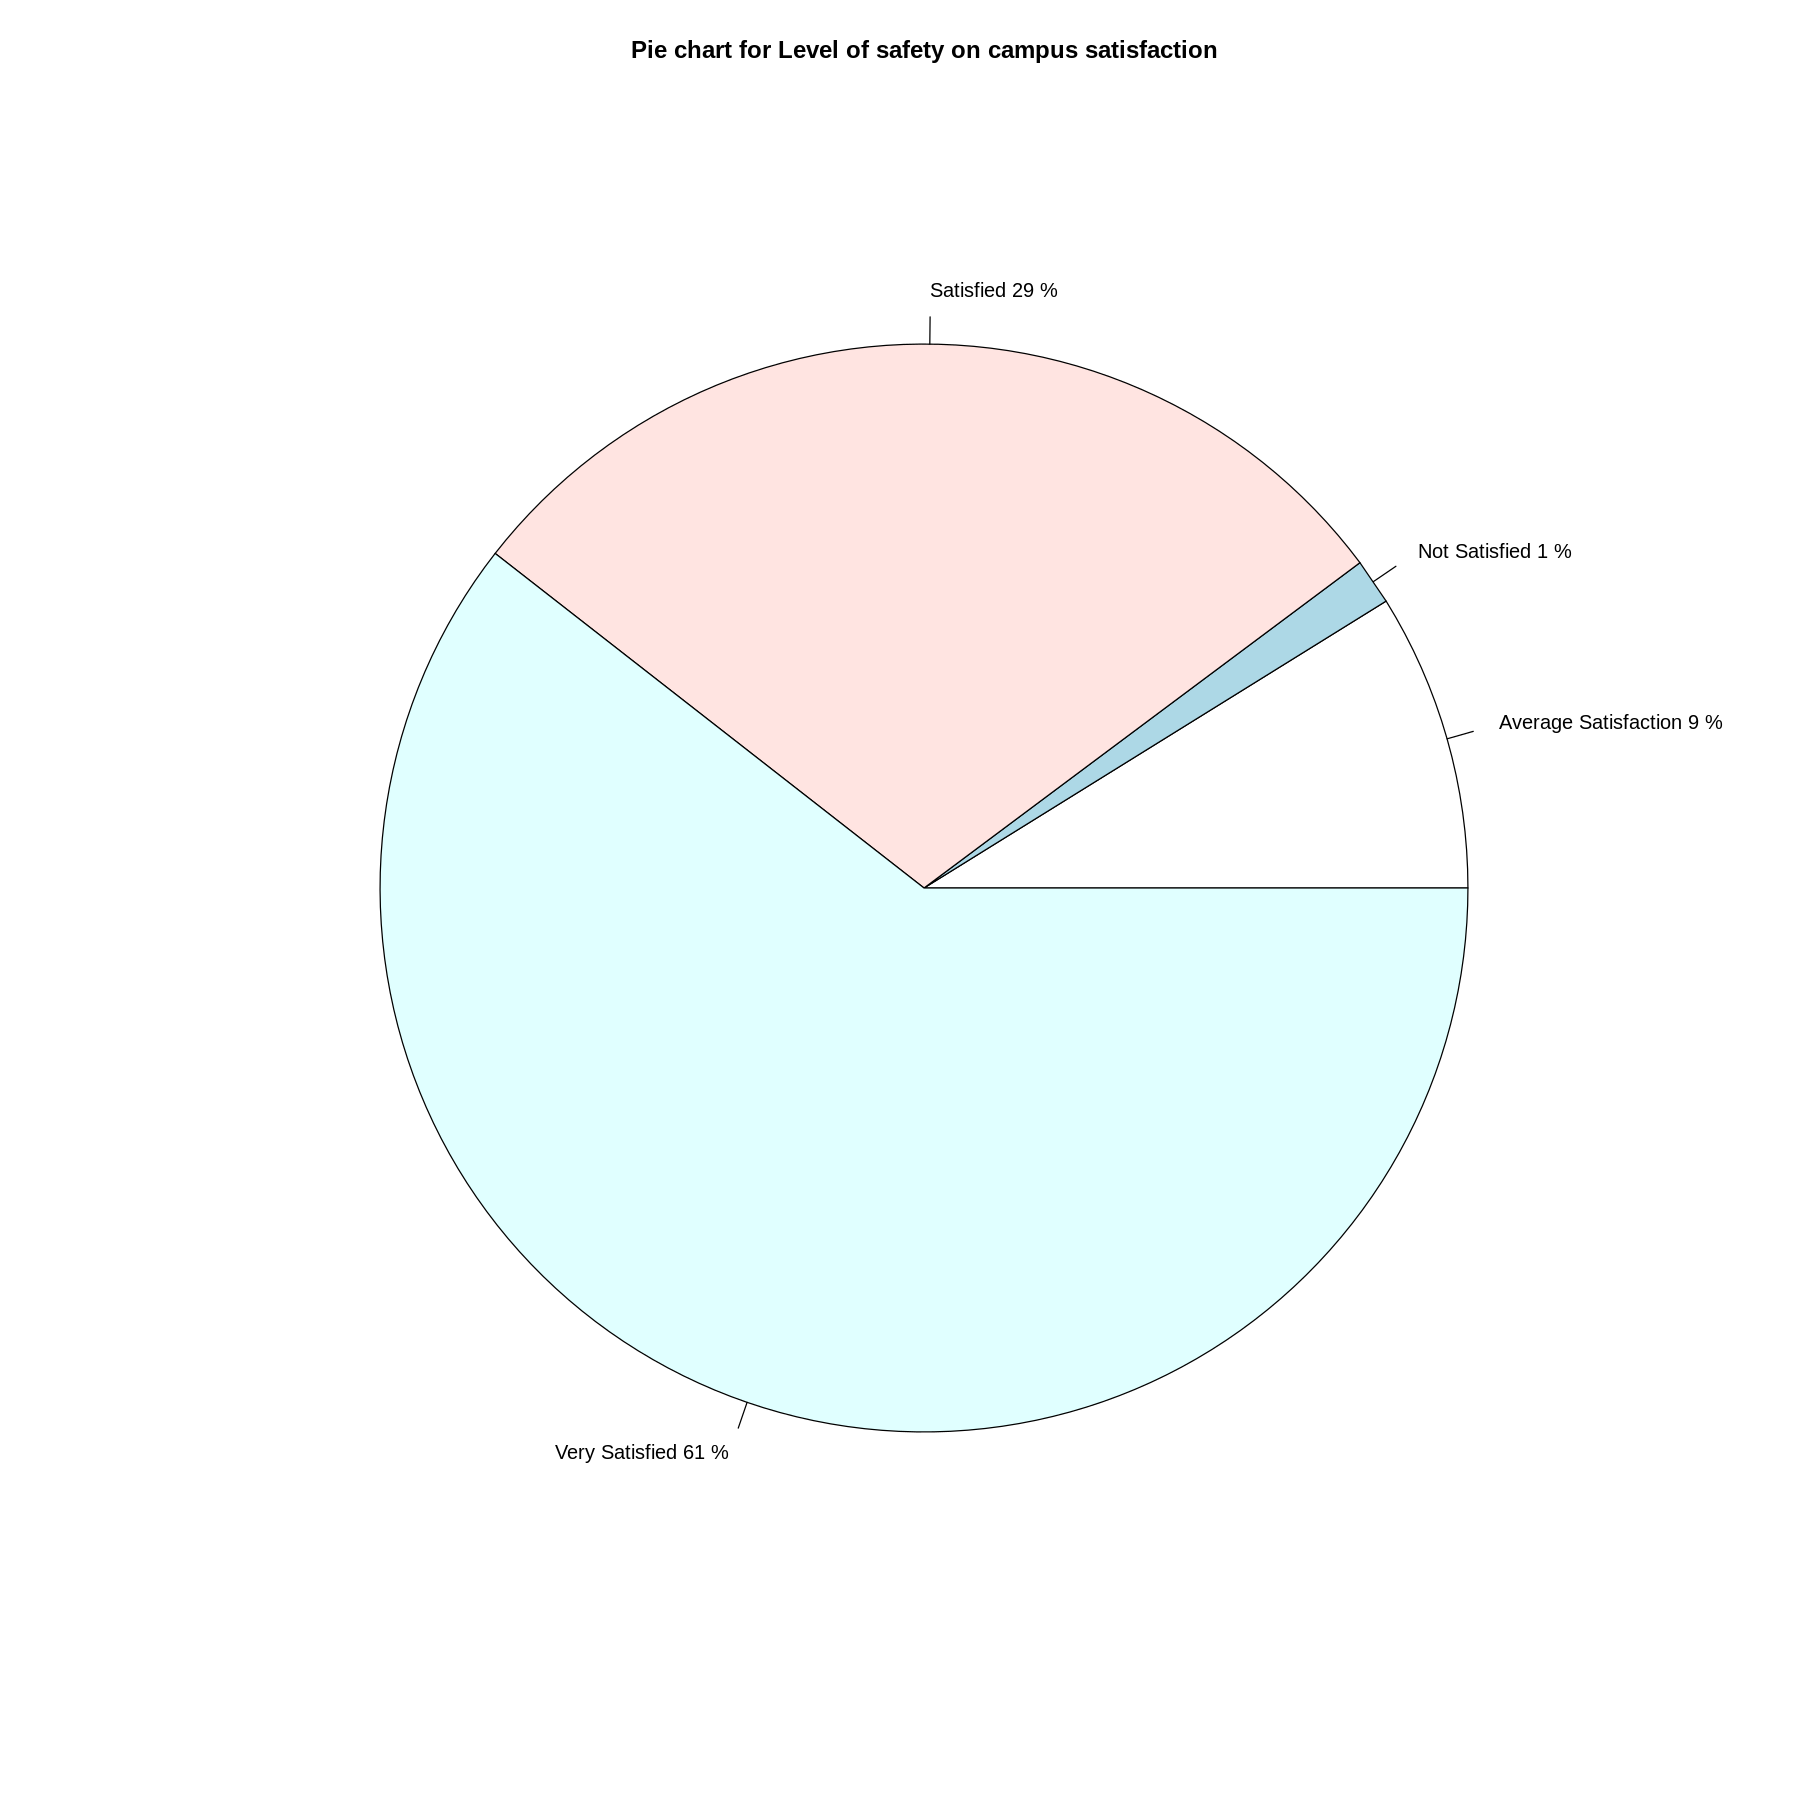

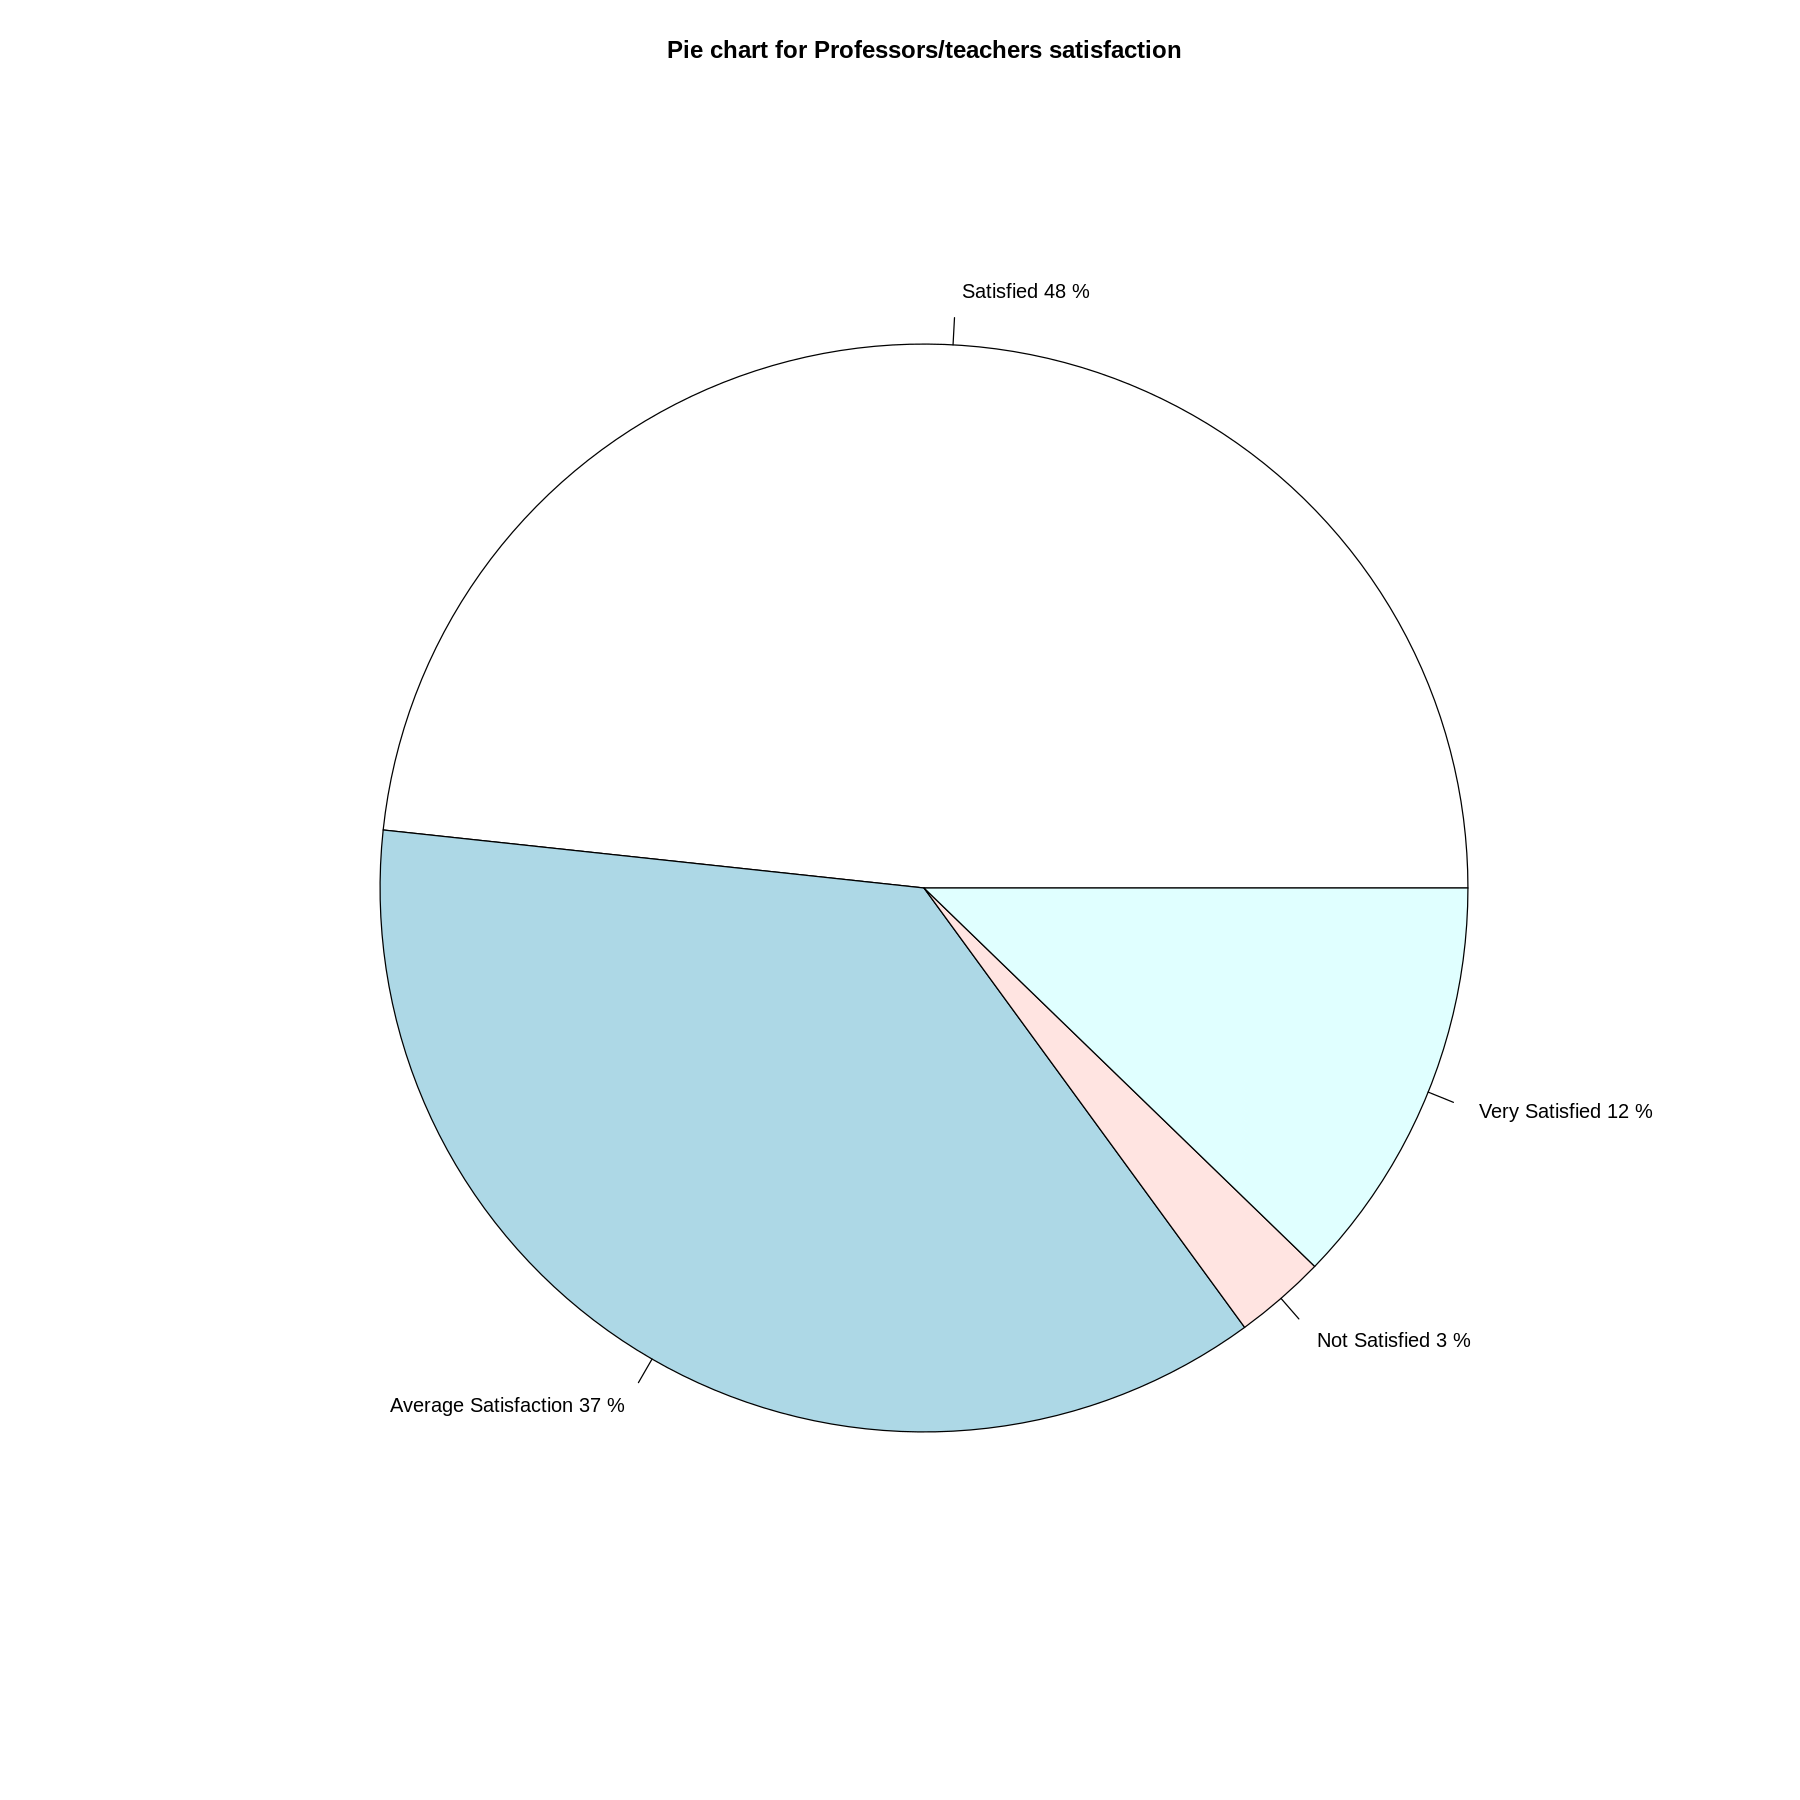

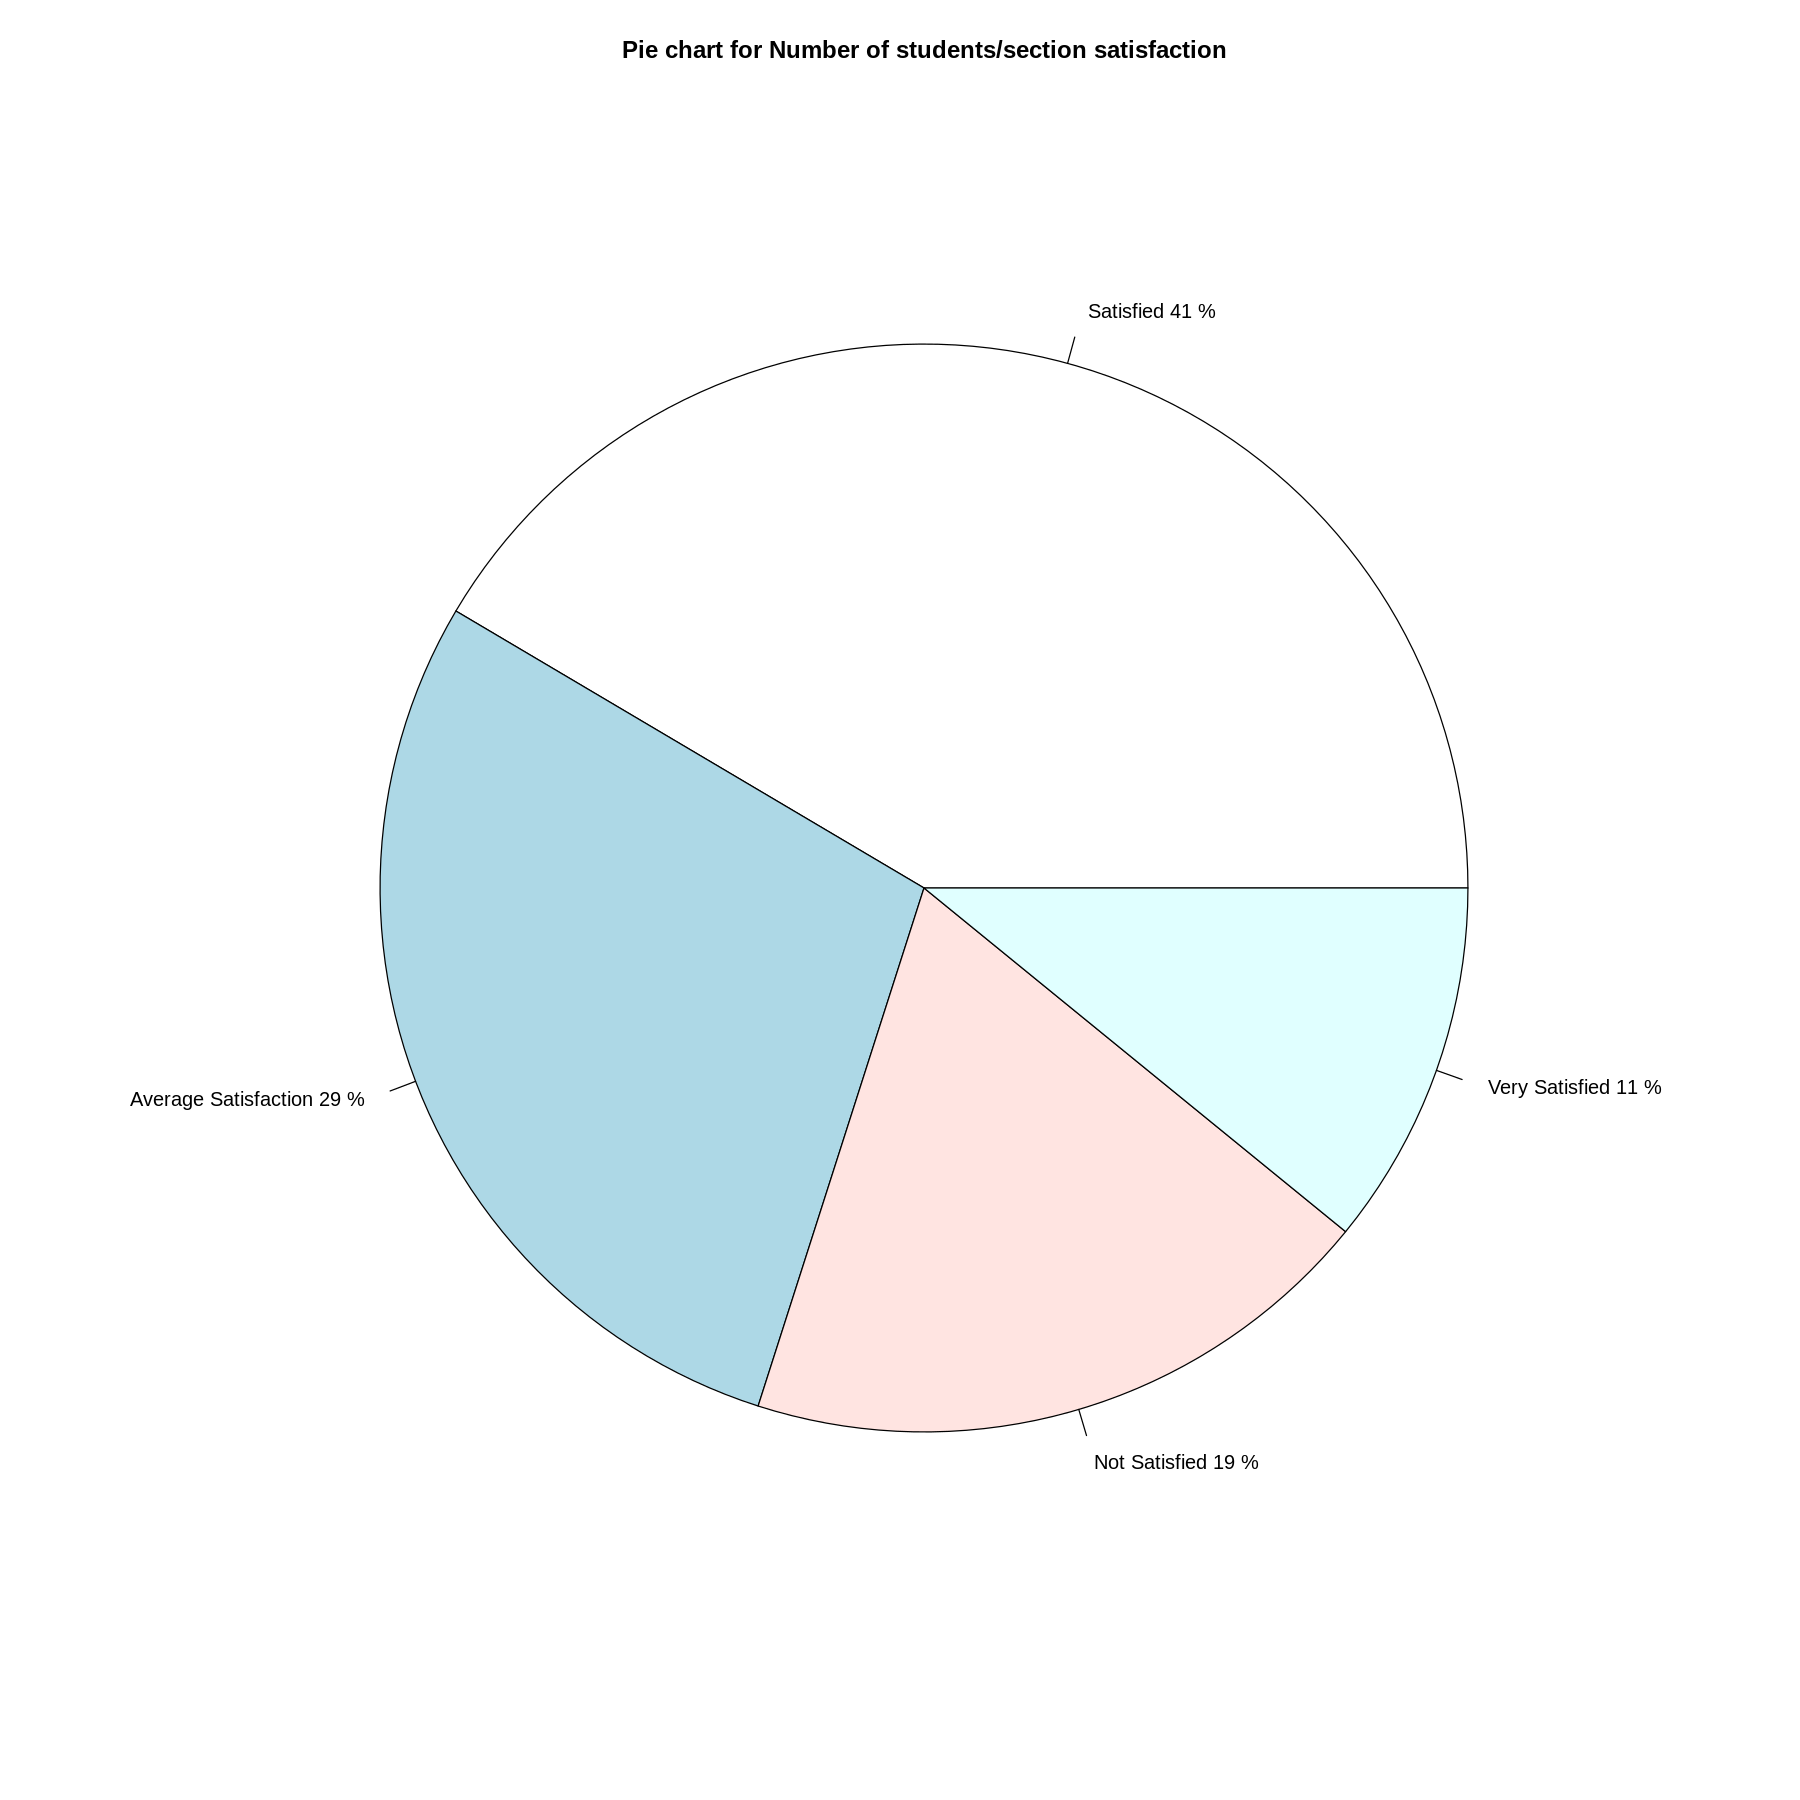

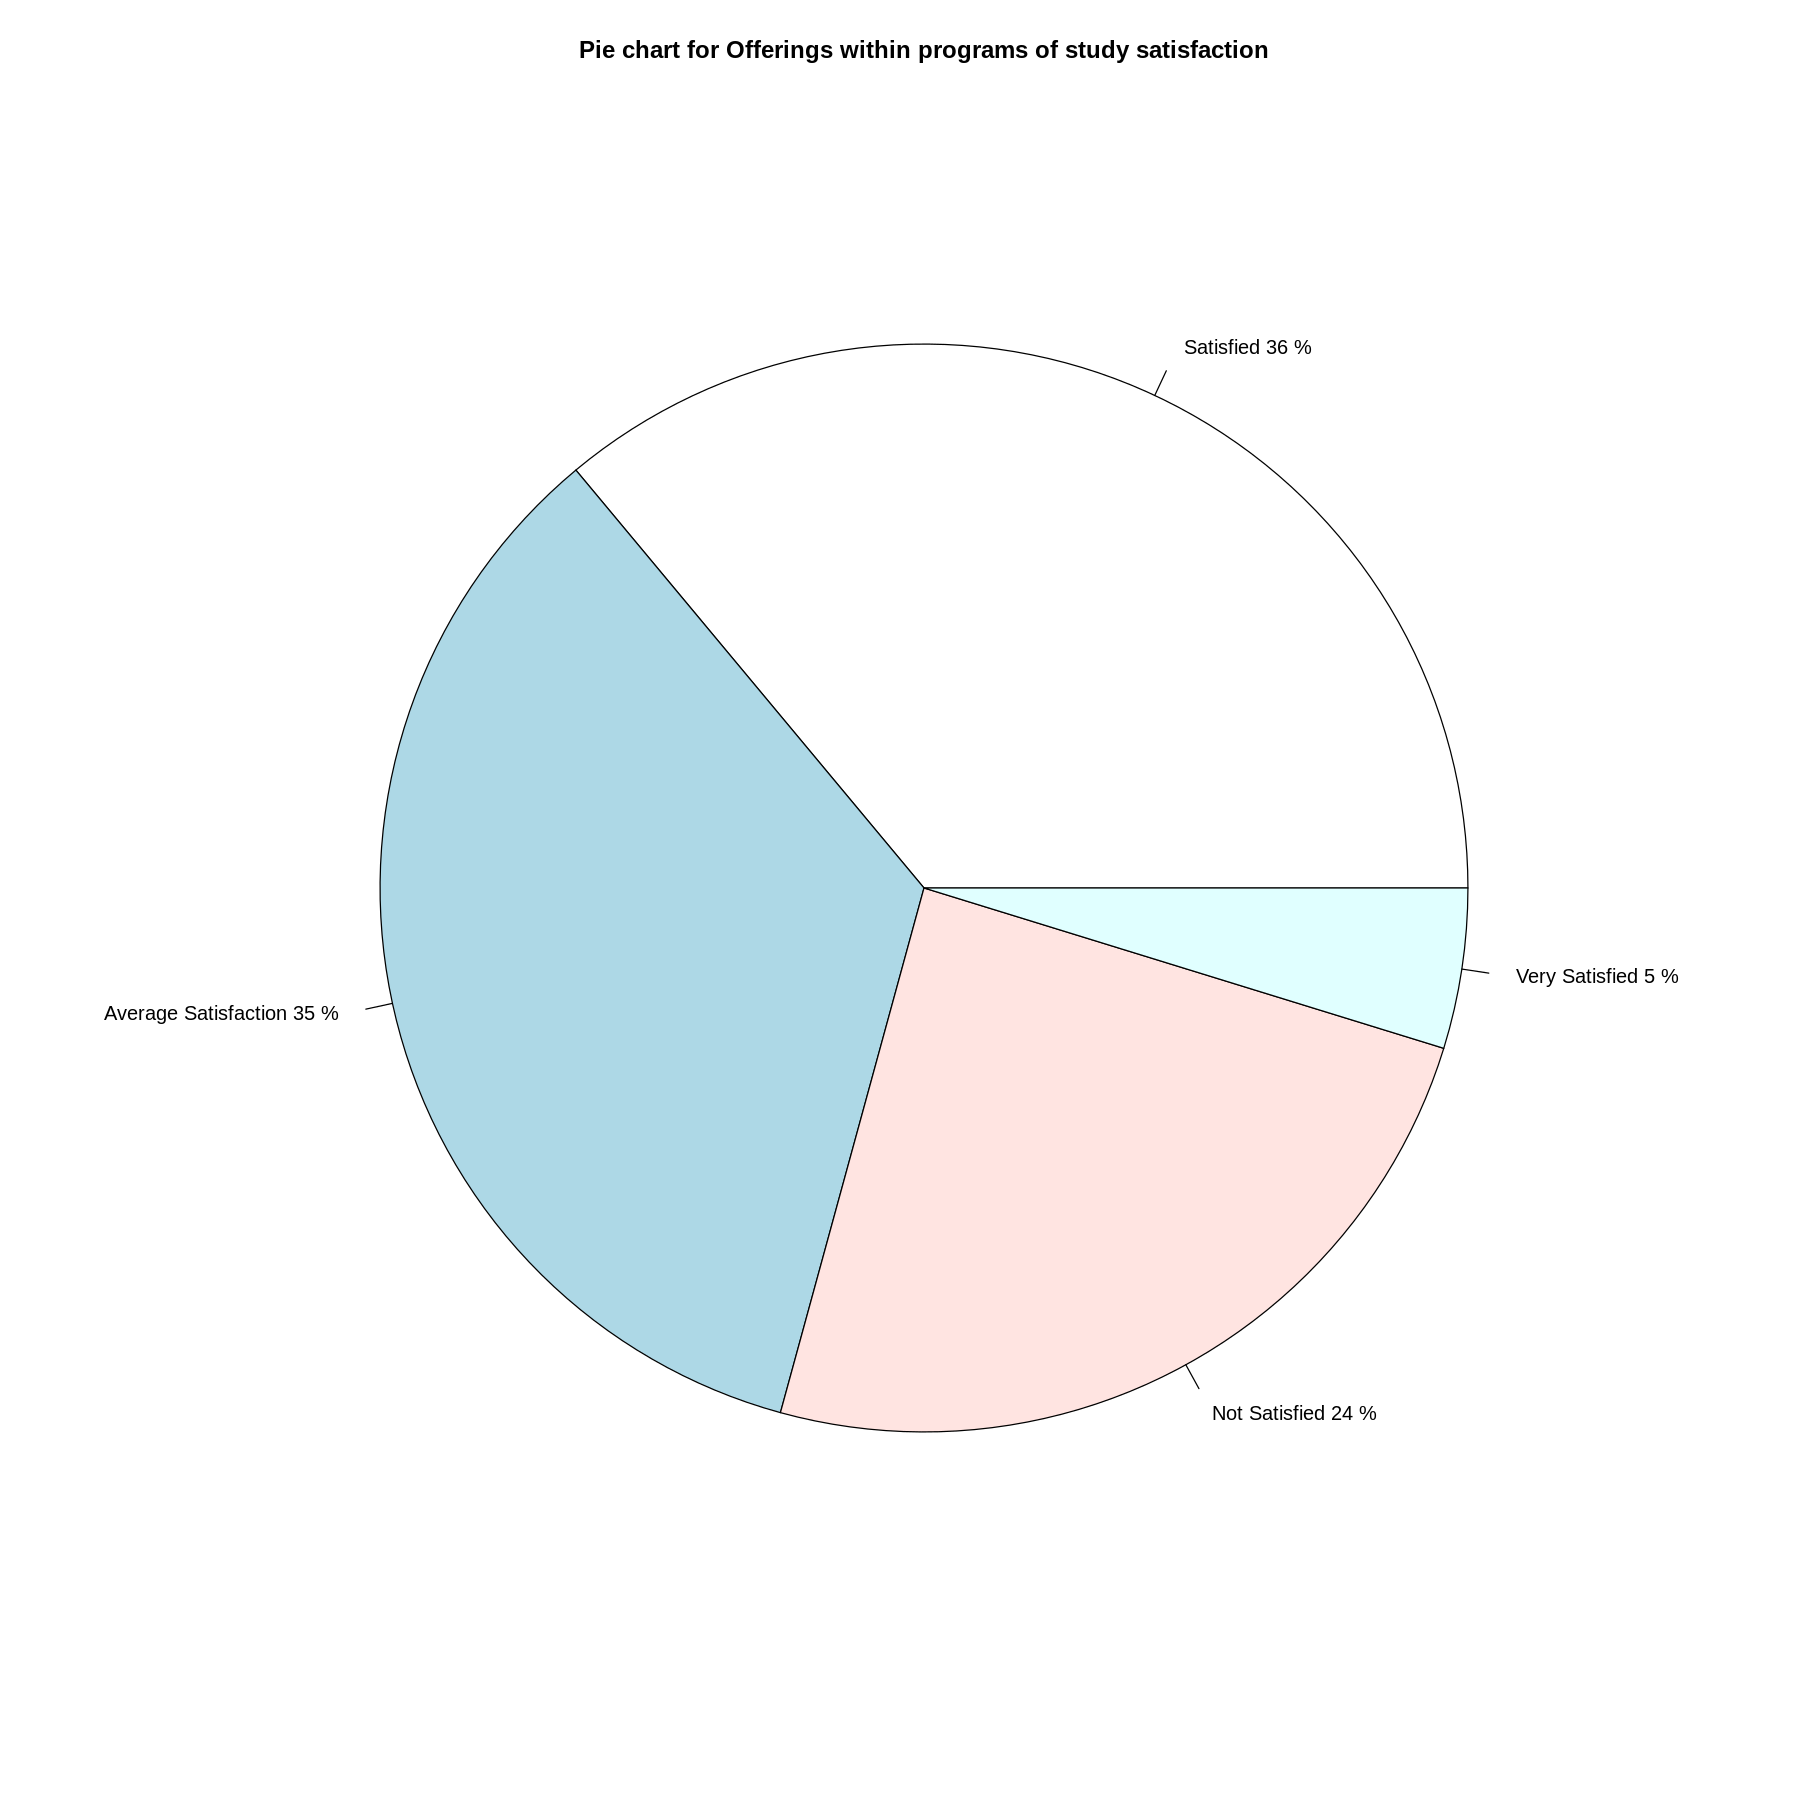

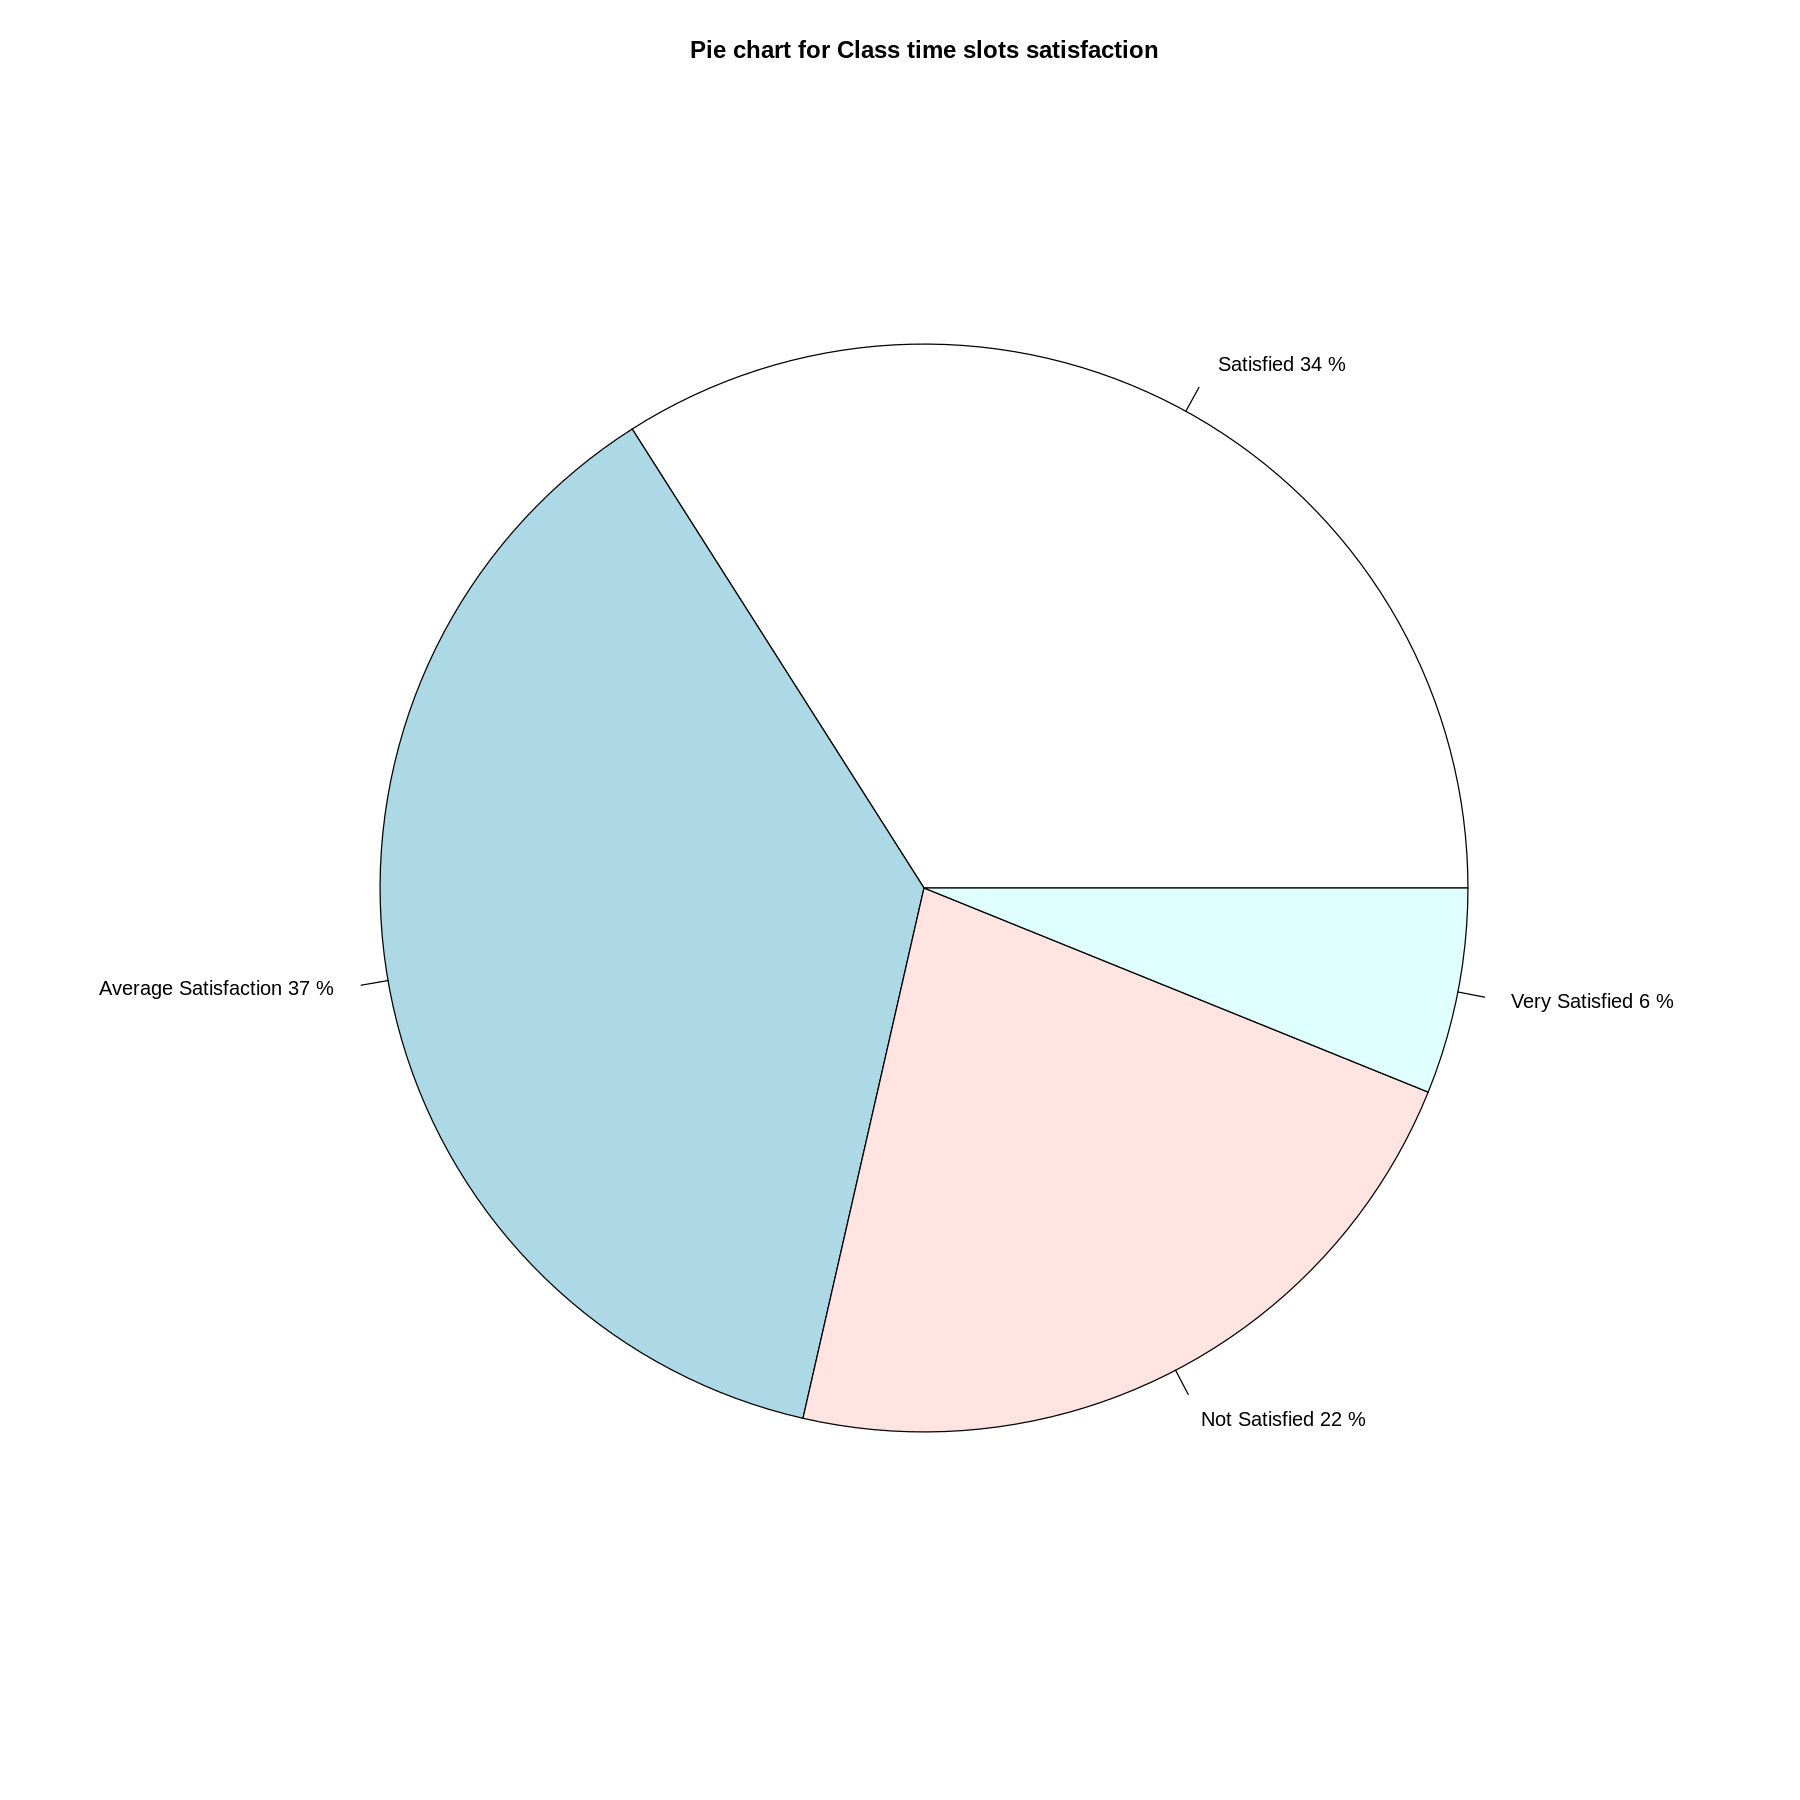

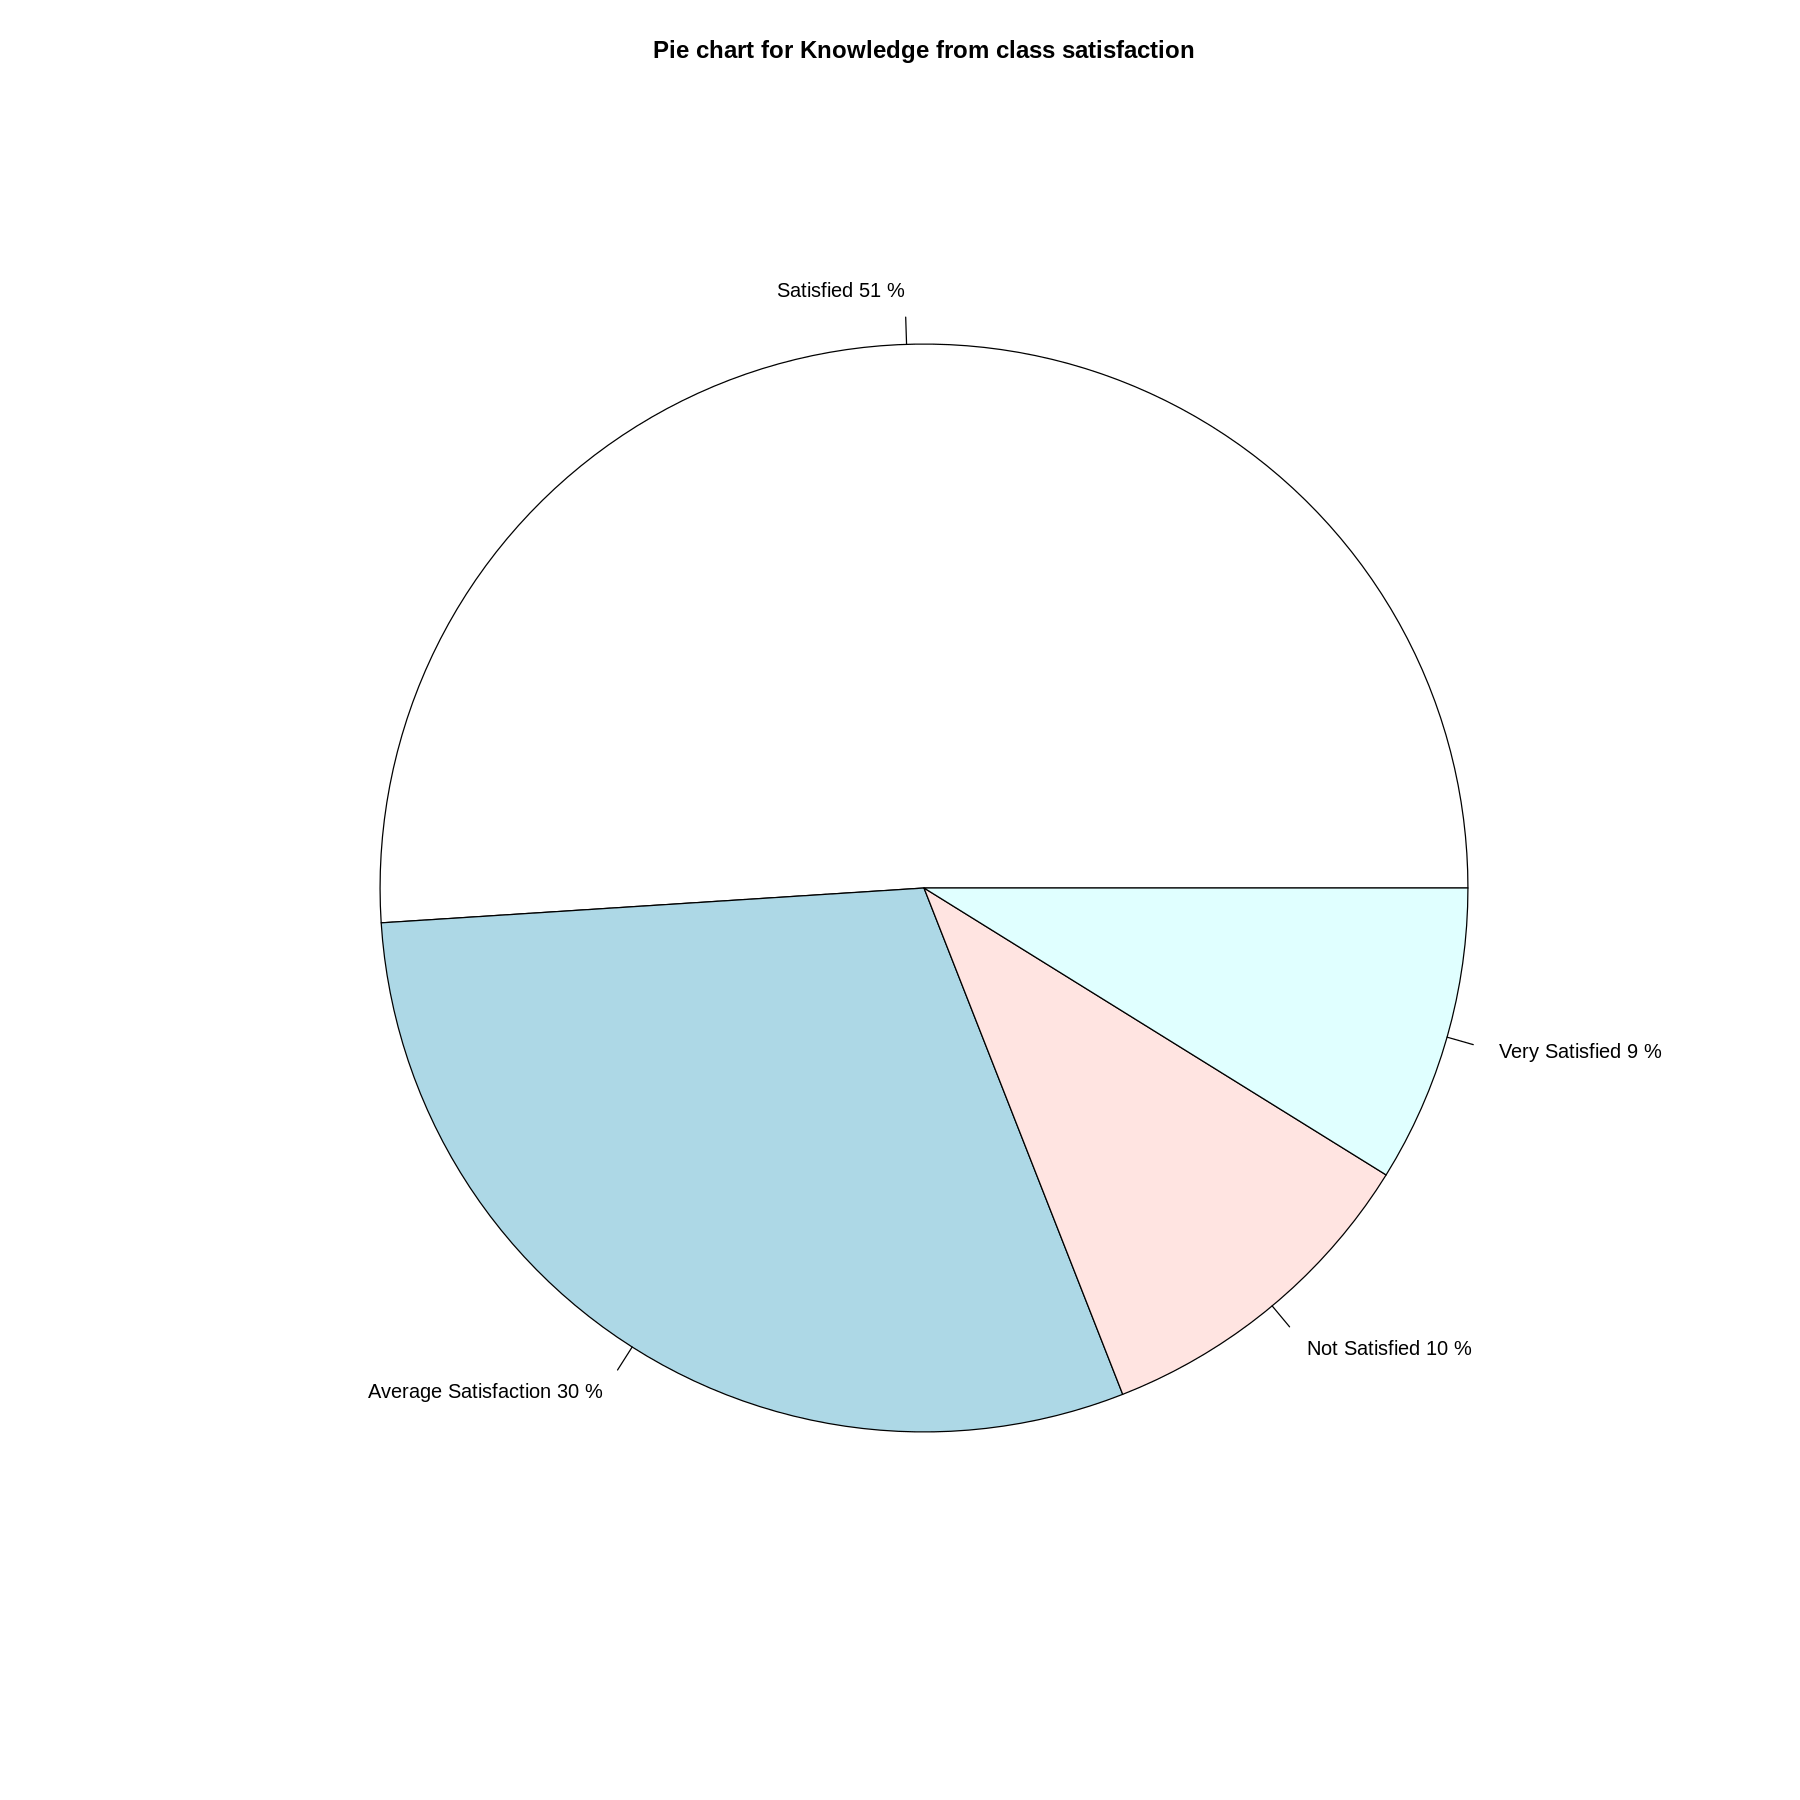

In [ ]:
options(repr.plot.width=15, repr.plot.height=15)
for (col in col_names){
    if(col != 'CGPA' && col != 'ID'){ #no pie plot for CGPA and ID column
      pct <- round(100*table(my_data[[col]])/147)
      pie(table(my_data[[col]]), main = paste("Pie chart for",col), labels = paste(names(table(my_data[[col]])), sep = " ", pct, "%"))
    }
}

In [ ]:
df <- as.data.frame(unclass(my_data),stringsAsFactors=TRUE)
df <- data.frame(lapply(df, as.numeric))
df$CGPA <- as.numeric(my_data$CGPA)
df

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


ID  Gender Academic.Classification CGPA  Current.feeling.about.AUI
1     1 2      1                         NA  2                        
2    58 2      3                       3.12  1                        
3    67 2      3                       3.80  1                        
4    78 2      1                         NA  1                        
5    89 1      5                       3.91  2                        
6   100 2      1                       3.60  1                        
7   111 2      5                       2.79  1                        
8   122 1      3                       3.84  1                        
9   133 2      1                       3.97  3                        
10    2 2      1                         NA  2                        
11   13 1      1                       2.60  3                        
12   24 2      1                         NA  3                        
13   35 1      1                       2.89  1                        
14   45 2      1                         NA  3                        
15   53 2      1                         NA  1                        
16   54 2      3                       2.99  1                        
17   55 2      5                       3.50  1                        
18   56 1      3                       3.36  1                        
19   57 2      5                       3.89  3                        
20   59 2      4                       3.63  1                        
21   60 2      5                       4.00  1                        
22   61 1      4                       3.96  1                        
23   62 2      1                         NA  2                        
24   63 2      1                       2.04  3                        
25   64 2      1                         NA  3                        
26   65 2      2                         NA  1                        
27   66 1      1                         NA  1                        
28   68 2      1                         NA  1                        
29   69 1      1                       3.92  3                        
30   70 1      1                       2.90  1                        
⋮   ⋮   ⋮      ⋮                       ⋮     ⋮                        
114 20  1      1                        3.80 2                        
115 21  2      1                          NA 2                        
116 22  2      5                        2.90 3                        
117 23  1      1                          NA 1                        
118 25  1      3                        3.67 2                        
119 26  2      3                        3.95 1                        
120 27  1      3                        3.78 1                        
121 28  2      1                        2.70 1                        
122 29  1      3                        3.96 2                        
123 30  1      5                        4.00 3                        
124 31  1      1                        3.18 2                        
125 32  1      1                          NA 3                        
126 33  1      1                          NA 2                        
127 34  1      1                        3.67 3                        
128 36  1      1                          NA 2                        
129 37  2      1                          NA 3                        
130 38  2      5                        3.94 1                        
131 39  1      1                        4.00 2                        
132 40  2      4                        3.92 3                        
133 41  2      1                       12.00 3                        
134 42  2      3                        3.57 2                        
135 43  2      1                        3.55 3                        
136 44  1      1                        3.17 3                        
137 46  1      1                          NA 1                        
138 47  1      1            

In [ ]:
#counting number of na in CGPA column 
print(paste('number of NA in CGPA: ',colSums(is.na(df['CGPA']))))

[1] "number of NA in CGPA:  54"


In [ ]:
#Replace na values with -1 using is.na()
df[is.na(df)] <- -1
head(df)

ID  Gender Academic.Classification CGPA  Current.feeling.about.AUI
1   1 2      1                       -1.00 2                        
2  58 2      3                        3.12 1                        
3  67 2      3                        3.80 1                        
4  78 2      1                       -1.00 1                        
5  89 1      5                        3.91 2                        
6 100 2      1                        3.60 1                        
  Current.feeling.about.SSE Food.satisfaction Housing.facilities.satisfaction
1 3                         1                 4                              
2 2                         2                 2                              
3 2                         2                 2                              
4 2                         2                 2                              
5 3                         1                 1                              
6 2                         2                 2                              
  Laboratory.facilities.satisfaction Parking.facilities.satisfaction ⋯
1 3                                  3                               ⋯
2 4                                  3                               ⋯
3 3                                  3                               ⋯
4 3                                  2                               ⋯
5 3                                  2                               ⋯
6 1                                  1                               ⋯
  Advising.satisfaction Clubs.satisfaction Administrative.help.satisfaction
1 3                     4                  3                               
2 2                     4                  1                               
3 4                     2                  1                               
4 3                     3                  1                               
5 4                     1                  3                               
6 1                     3                  1                               
  Social.life.In.AUI.satisfaction Level.of.safety.on.campus.satisfaction
1 1                               4                                     
2 3                               4                                     
3 1                               4                                     
4 1                               4                                     
5 3                               4                                     
6 3                               4                                     
  Professors.teachers.satisfaction Number.of.students.section.satisfaction
1 3                                3                                      
2 3                                2                                      
3 1                                4                                      
4 1                                3                                      
5 3                                1                                      
6 1                                2                                      
  Offerings.within.programs.of.study.satisfaction Class.time.slots.satisfaction
1 1                                               1                            
2 1                                               3                            
3 4                                               4                            
4 3                                               2                            
5 1                                               3                            
6 3                                               1                            
  Knowledge.from.class.satisfaction
1 3                                
2 1                                
3 2                                
4 3                                
5 3                                
6 1

In [ ]:
#double checking that now all features are numerical 
str(df)

'data.frame':	143 obs. of  25 variables:
 $ ID                                             : num  1 58 67 78 89 100 111 122 133 2 ...
 $ Gender                                         : num  2 2 2 2 1 2 2 1 2 2 ...
 $ Academic.Classification                        : num  1 3 3 1 5 1 5 3 1 1 ...
 $ CGPA                                           : num  -1 3.12 3.8 -1 3.91 3.6 2.79 3.84 3.97 -1 ...
 $ Current.feeling.about.AUI                      : num  2 1 1 1 2 1 1 1 3 2 ...
 $ Current.feeling.about.SSE                      : num  3 2 2 2 3 2 2 3 2 3 ...
 $ Food.satisfaction                              : num  1 2 2 2 1 2 2 1 2 2 ...
 $ Housing.facilities.satisfaction                : num  4 2 2 2 1 2 3 1 1 1 ...
 $ Laboratory.facilities.satisfaction             : num  3 4 3 3 3 1 1 3 3 3 ...
 $ Parking.facilities.satisfaction                : num  3 3 3 2 2 1 3 1 4 1 ...
 $ Fitness.facilities.satisfaction.               : num  4 3 3 1 3 2 2 1 4 2 ...
 $ Counseling.services.satisfactio

In [ ]:
#creating new features
df["AUI facilities Overall Satisfaction"] <- rowMeans(df[,7:15])
df["Learning environment Overall Satisfaction"] <- rowMeans(df[,16:20])
df["Quality of teaching Overall Satisfaction"] <- rowMeans(df[,21:25])

In [ ]:
dim(df)

[1] 143  28

In [ ]:
#for rescaling the plot size
options(repr.plot.width=5, repr.plot.height=5)

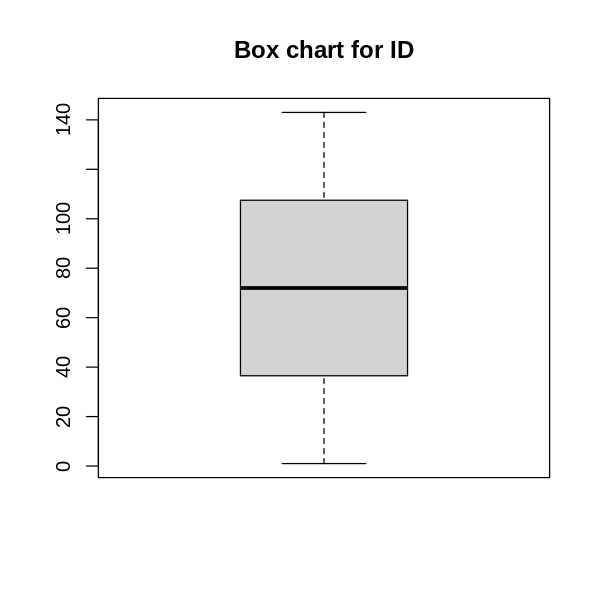

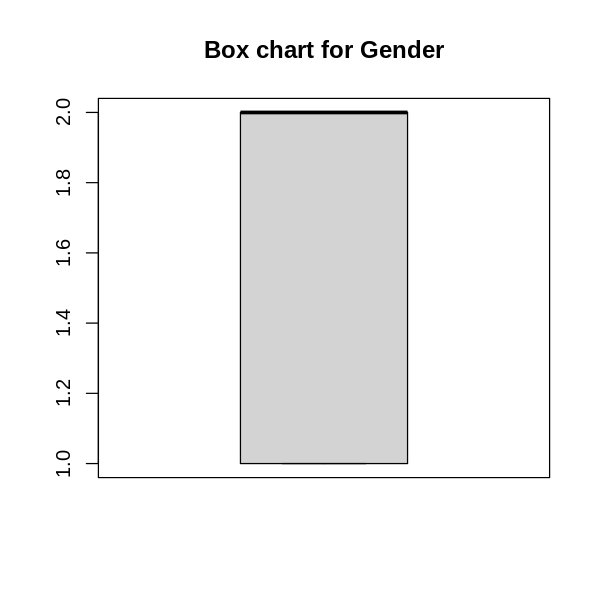

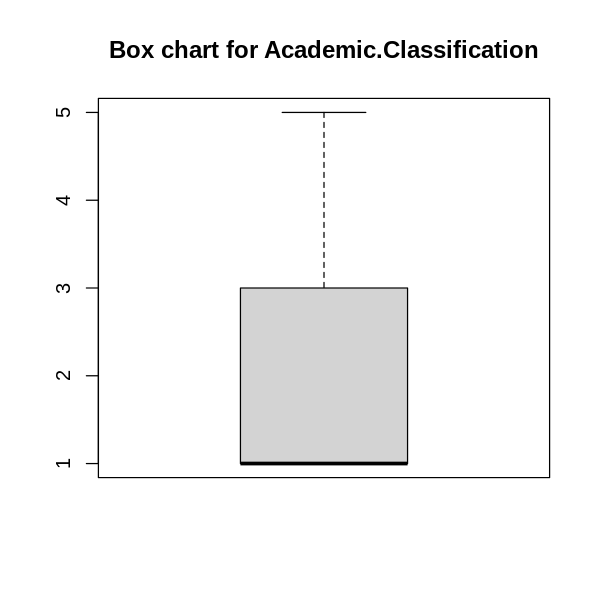

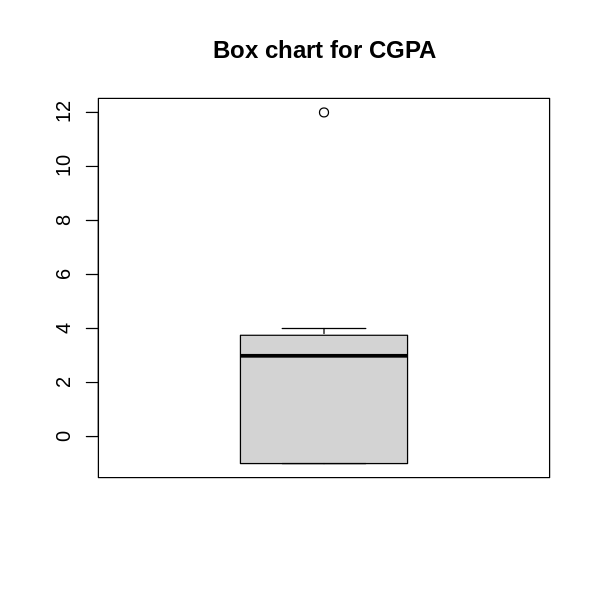

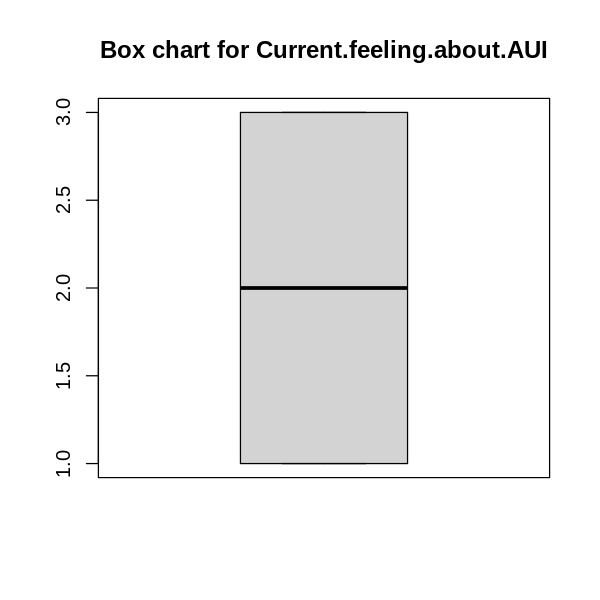

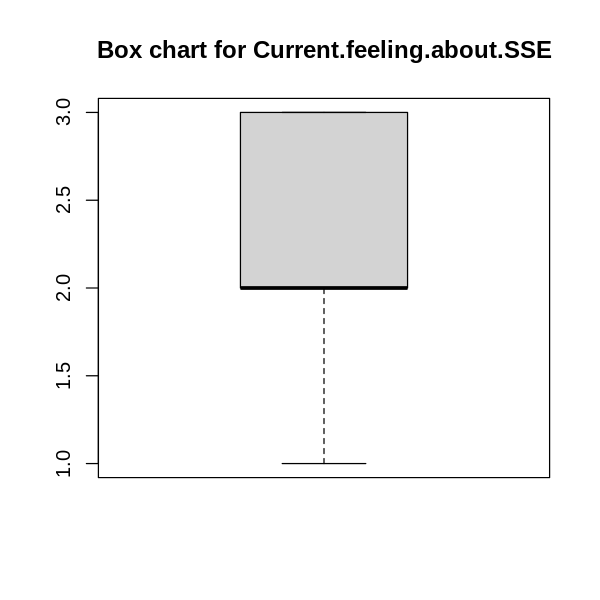

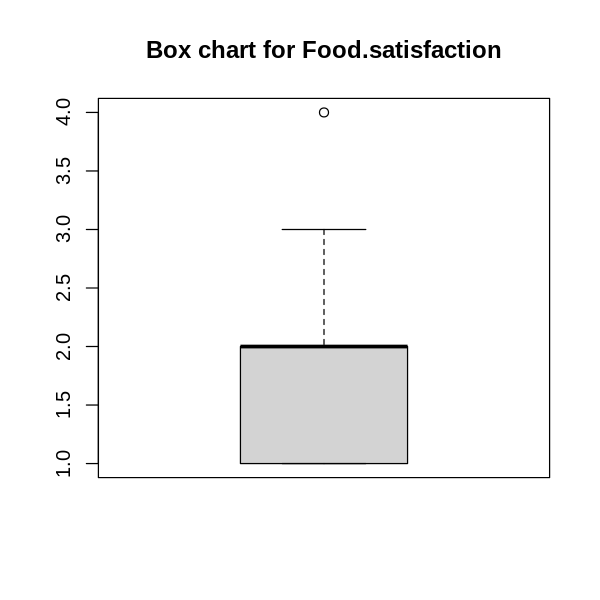

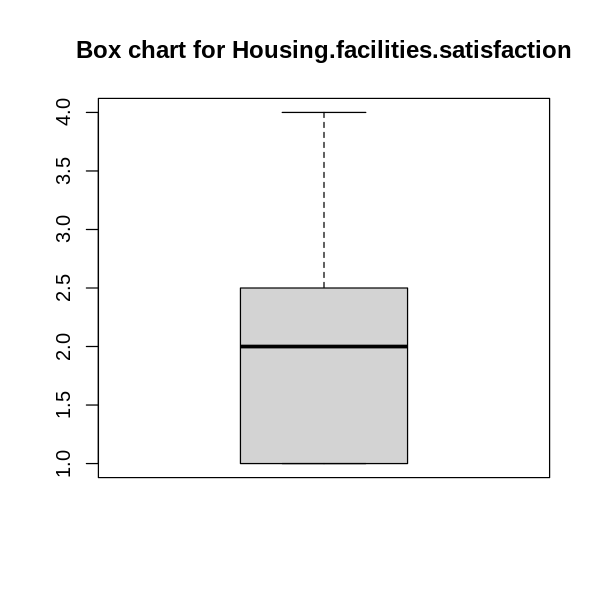

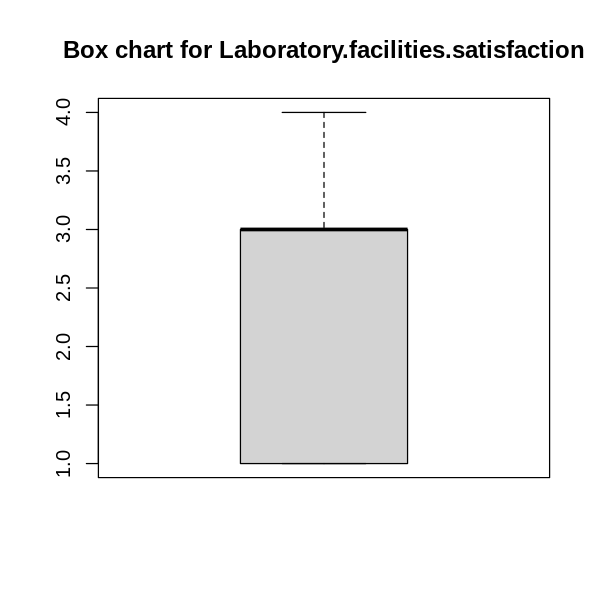

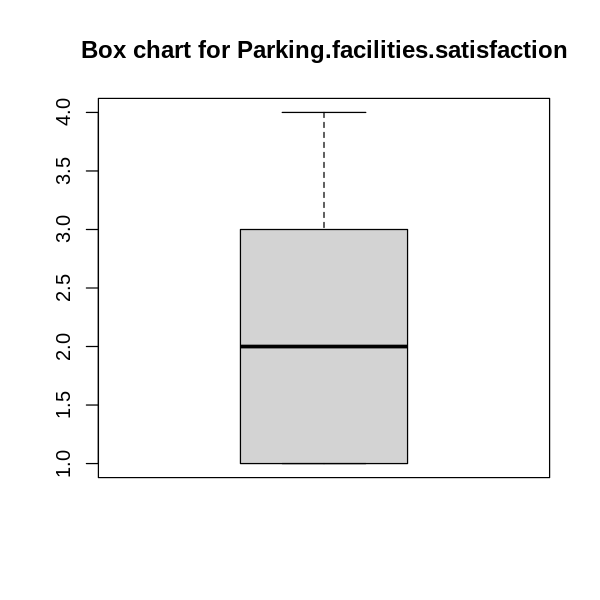

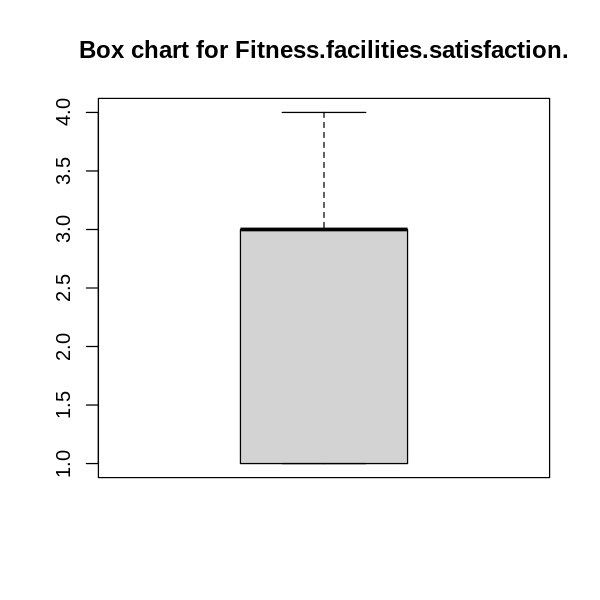

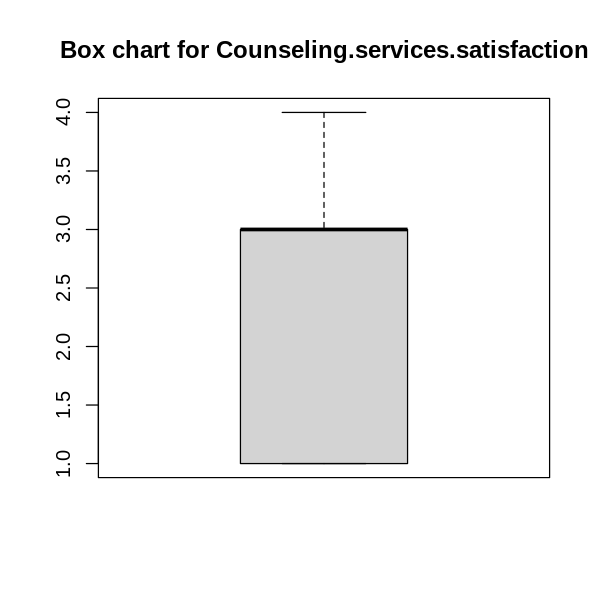

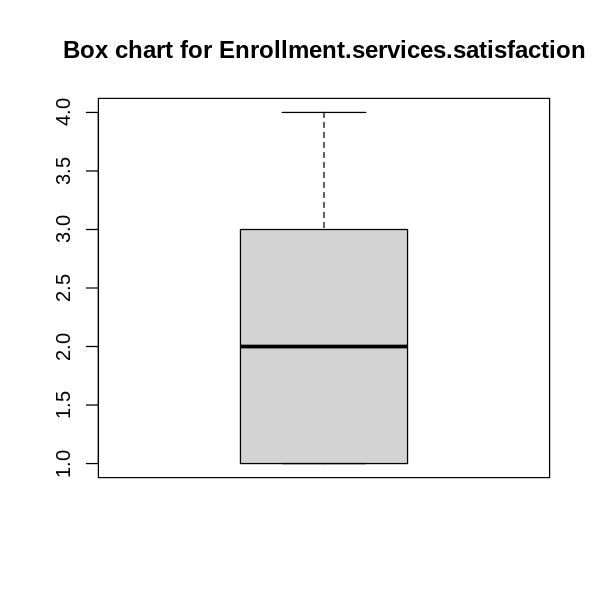

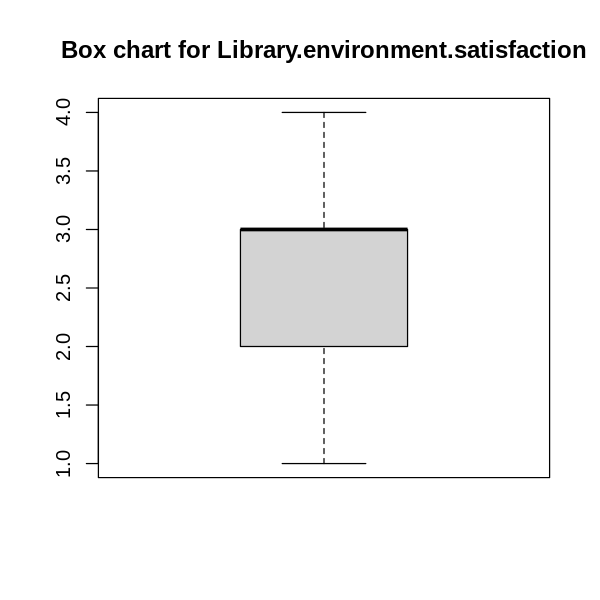

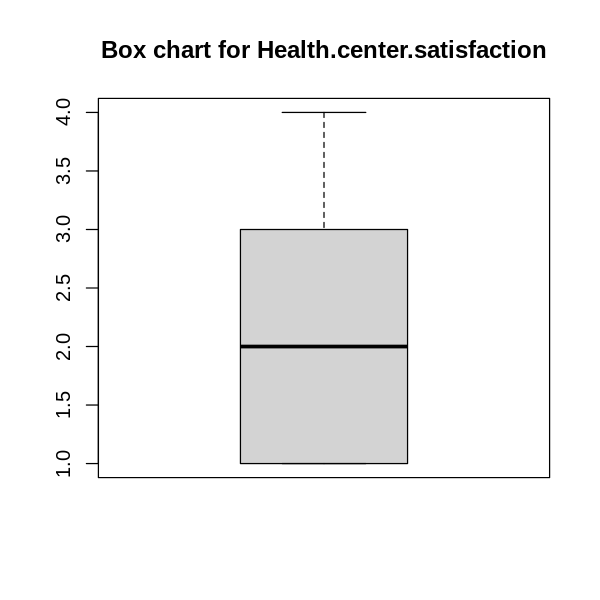

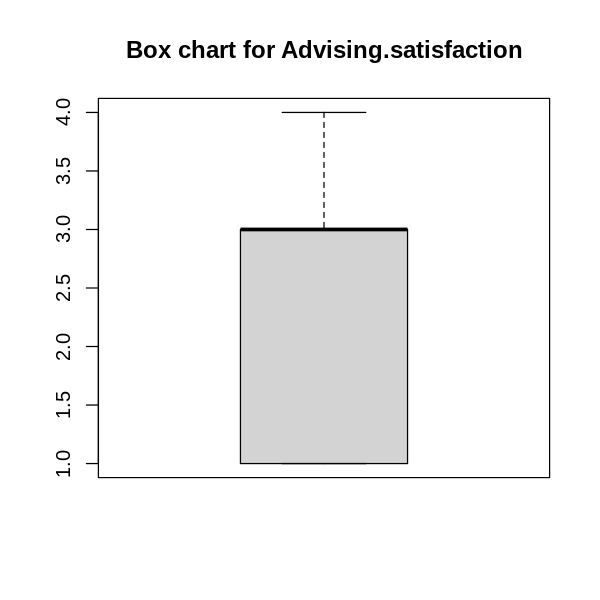

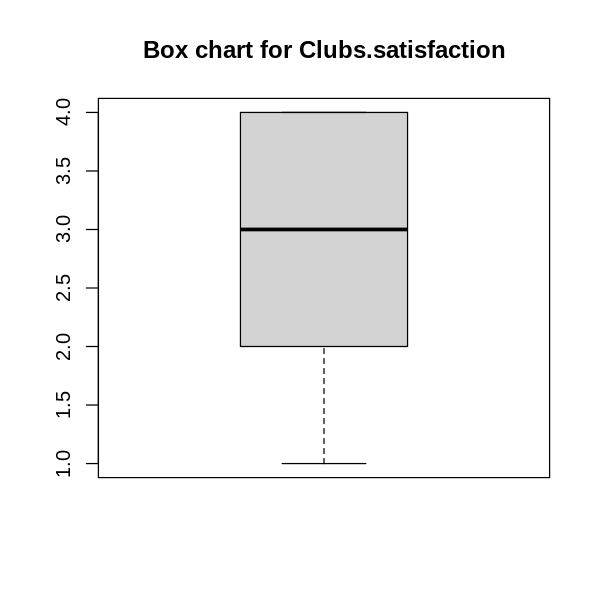

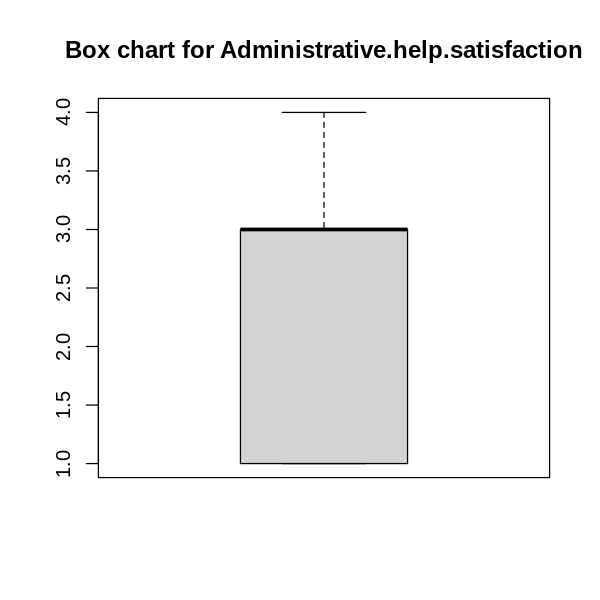

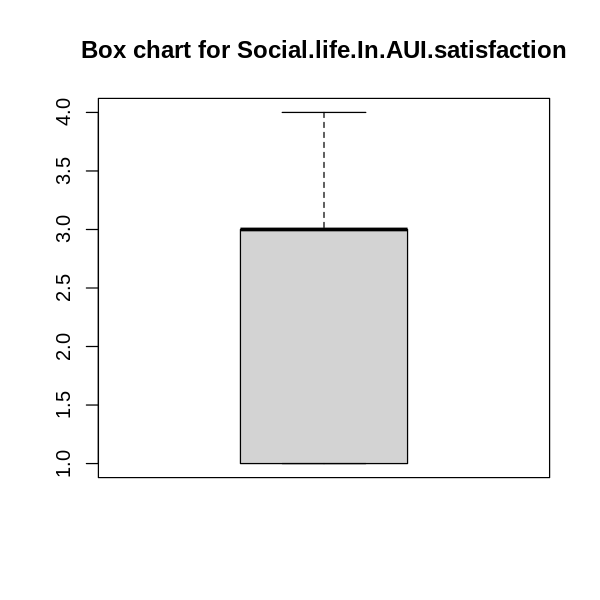

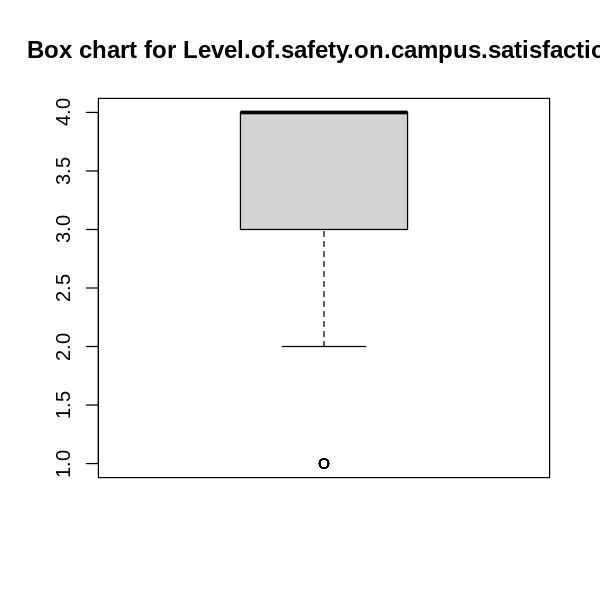

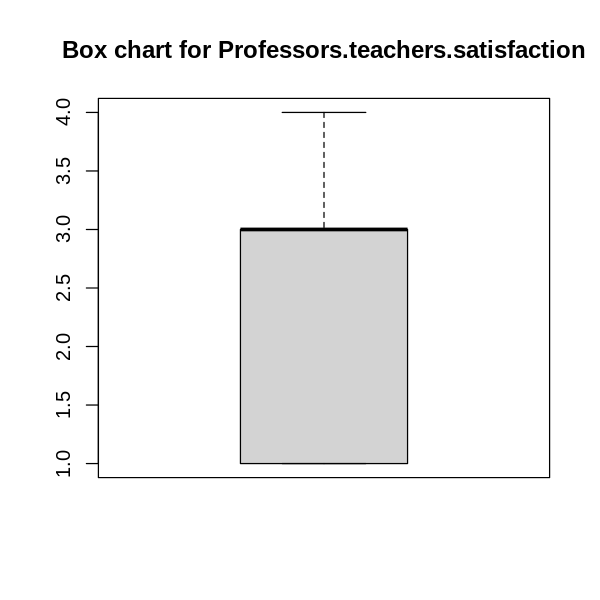

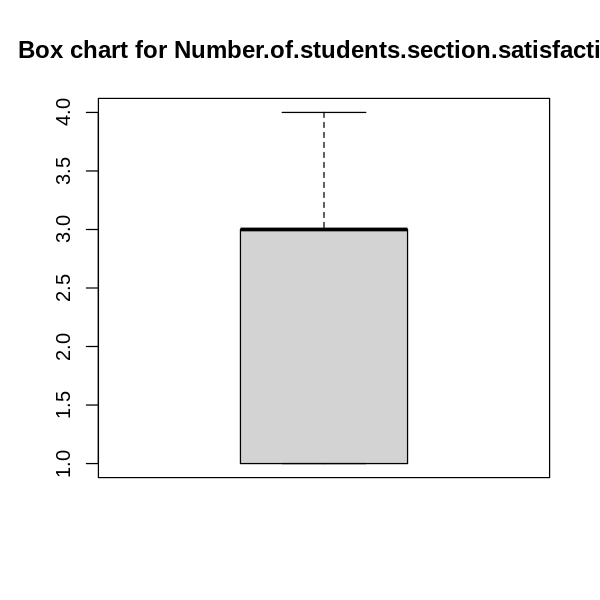

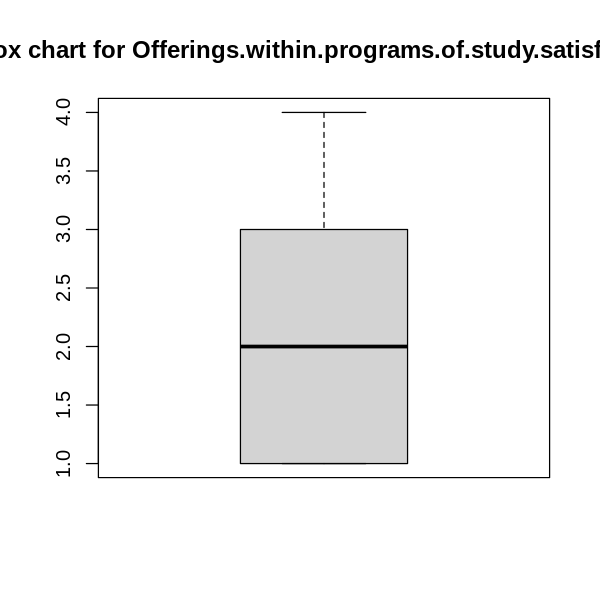

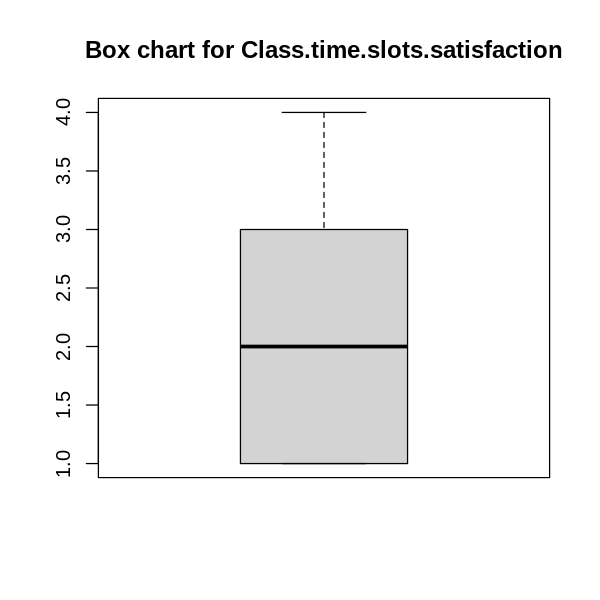

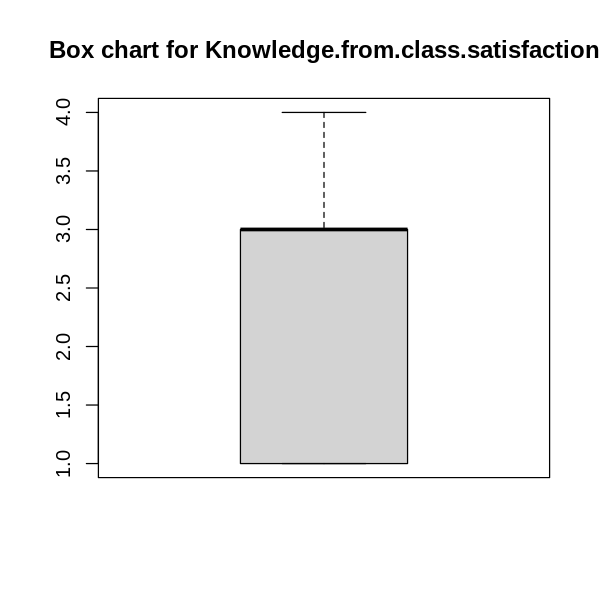

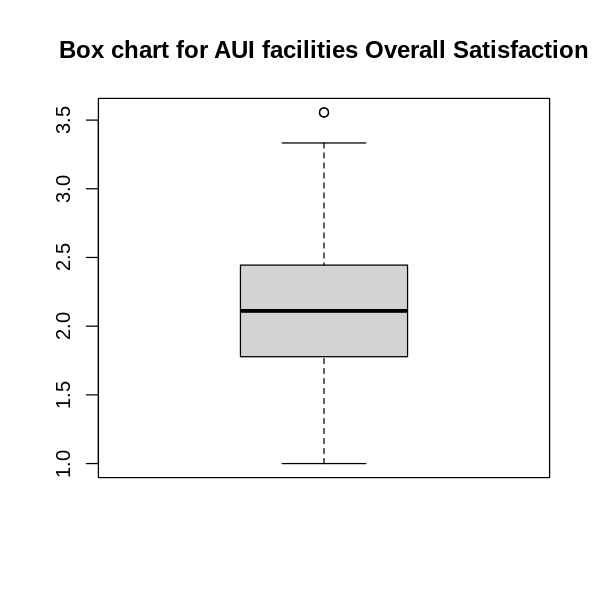

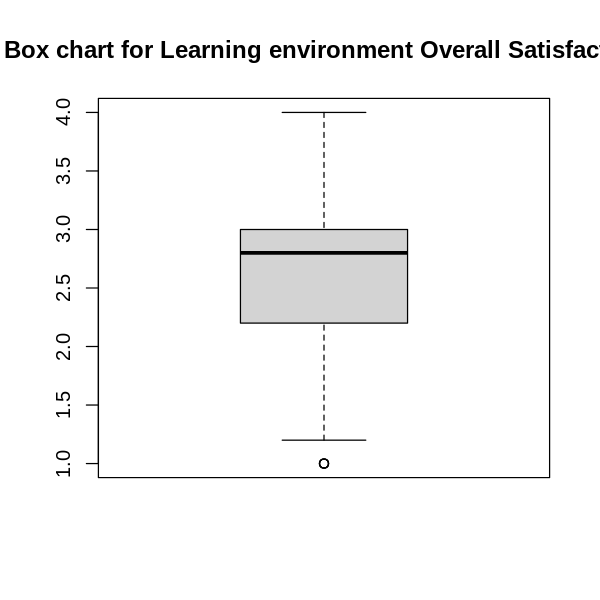

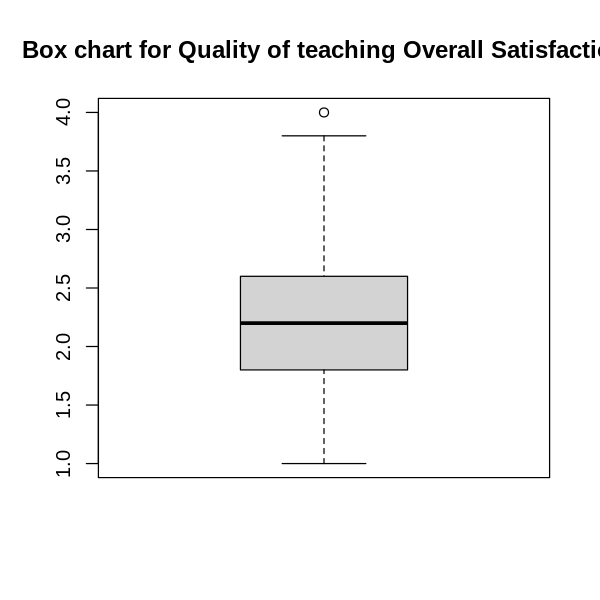

In [ ]:
for (col in colnames(df)){
    boxplot(df[[col]], main = paste("Box chart for",col))
}

In [ ]:
#there are no outliers in most features since answer choices are pre defined except for CGPA
#for example, for academic classification, it shows that there are outliers but maybe it identifies graduates as outliers because there are very few of them but they should not be removed 

In [ ]:
model_inputs <- c(3,4,5,6,26,27,28)
df_t <- df[,model_inputs]

Var1                                      Var2                    value
1 Academic.Classification                   Academic.Classification  1.00
2 CGPA                                      Academic.Classification  0.53
3 Current.feeling.about.AUI                 Academic.Classification -0.22
4 Current.feeling.about.SSE                 Academic.Classification  0.08
5 AUI facilities Overall Satisfaction       Academic.Classification -0.05
6 Learning environment Overall Satisfaction Academic.Classification  0.03

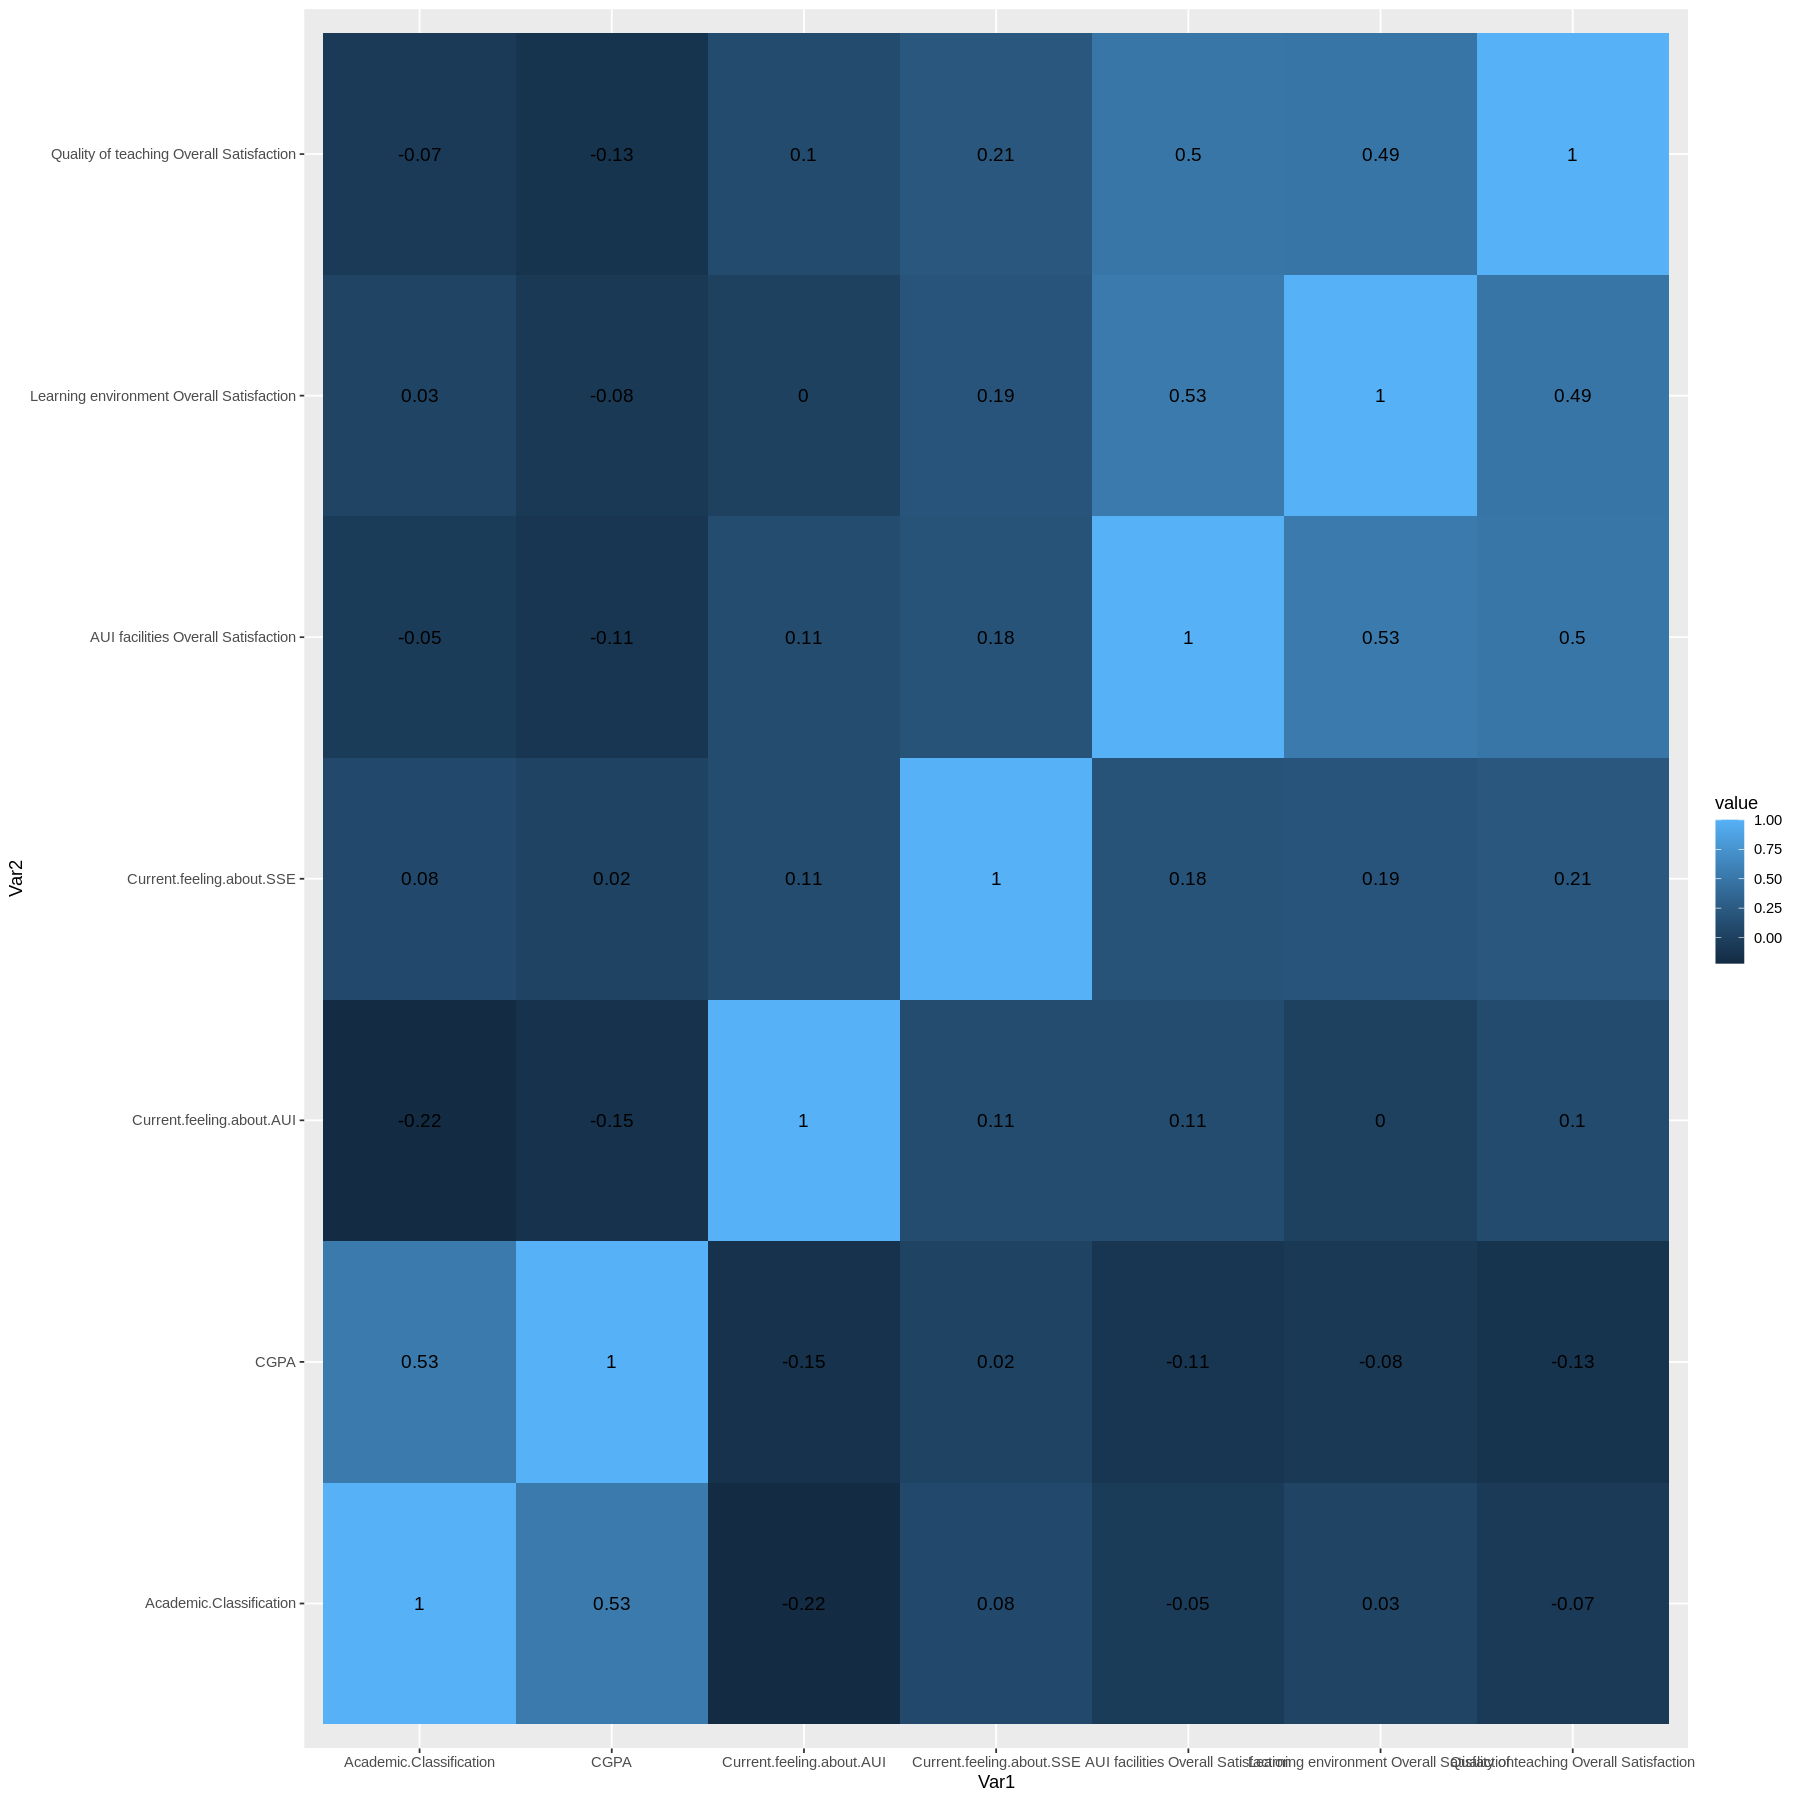

In [ ]:
#heatmap to find correlation of features
options(repr.plot.width=15, repr.plot.height=15)

# creating correlation matrix
corr_mat <- round(cor(df_t),2)
 
# reduce the size of correlation matrix
melted_corr_mat <- melt(corr_mat)
head(melted_corr_mat)
 
# plotting the correlation heatmap
library(ggplot2)
ggplot(data = melted_corr_mat, aes(x=Var1, y=Var2,
                                   fill=value)) +
geom_tile() +
geom_text(aes(Var2, Var1, label = value),
          color = "black", size = 4)

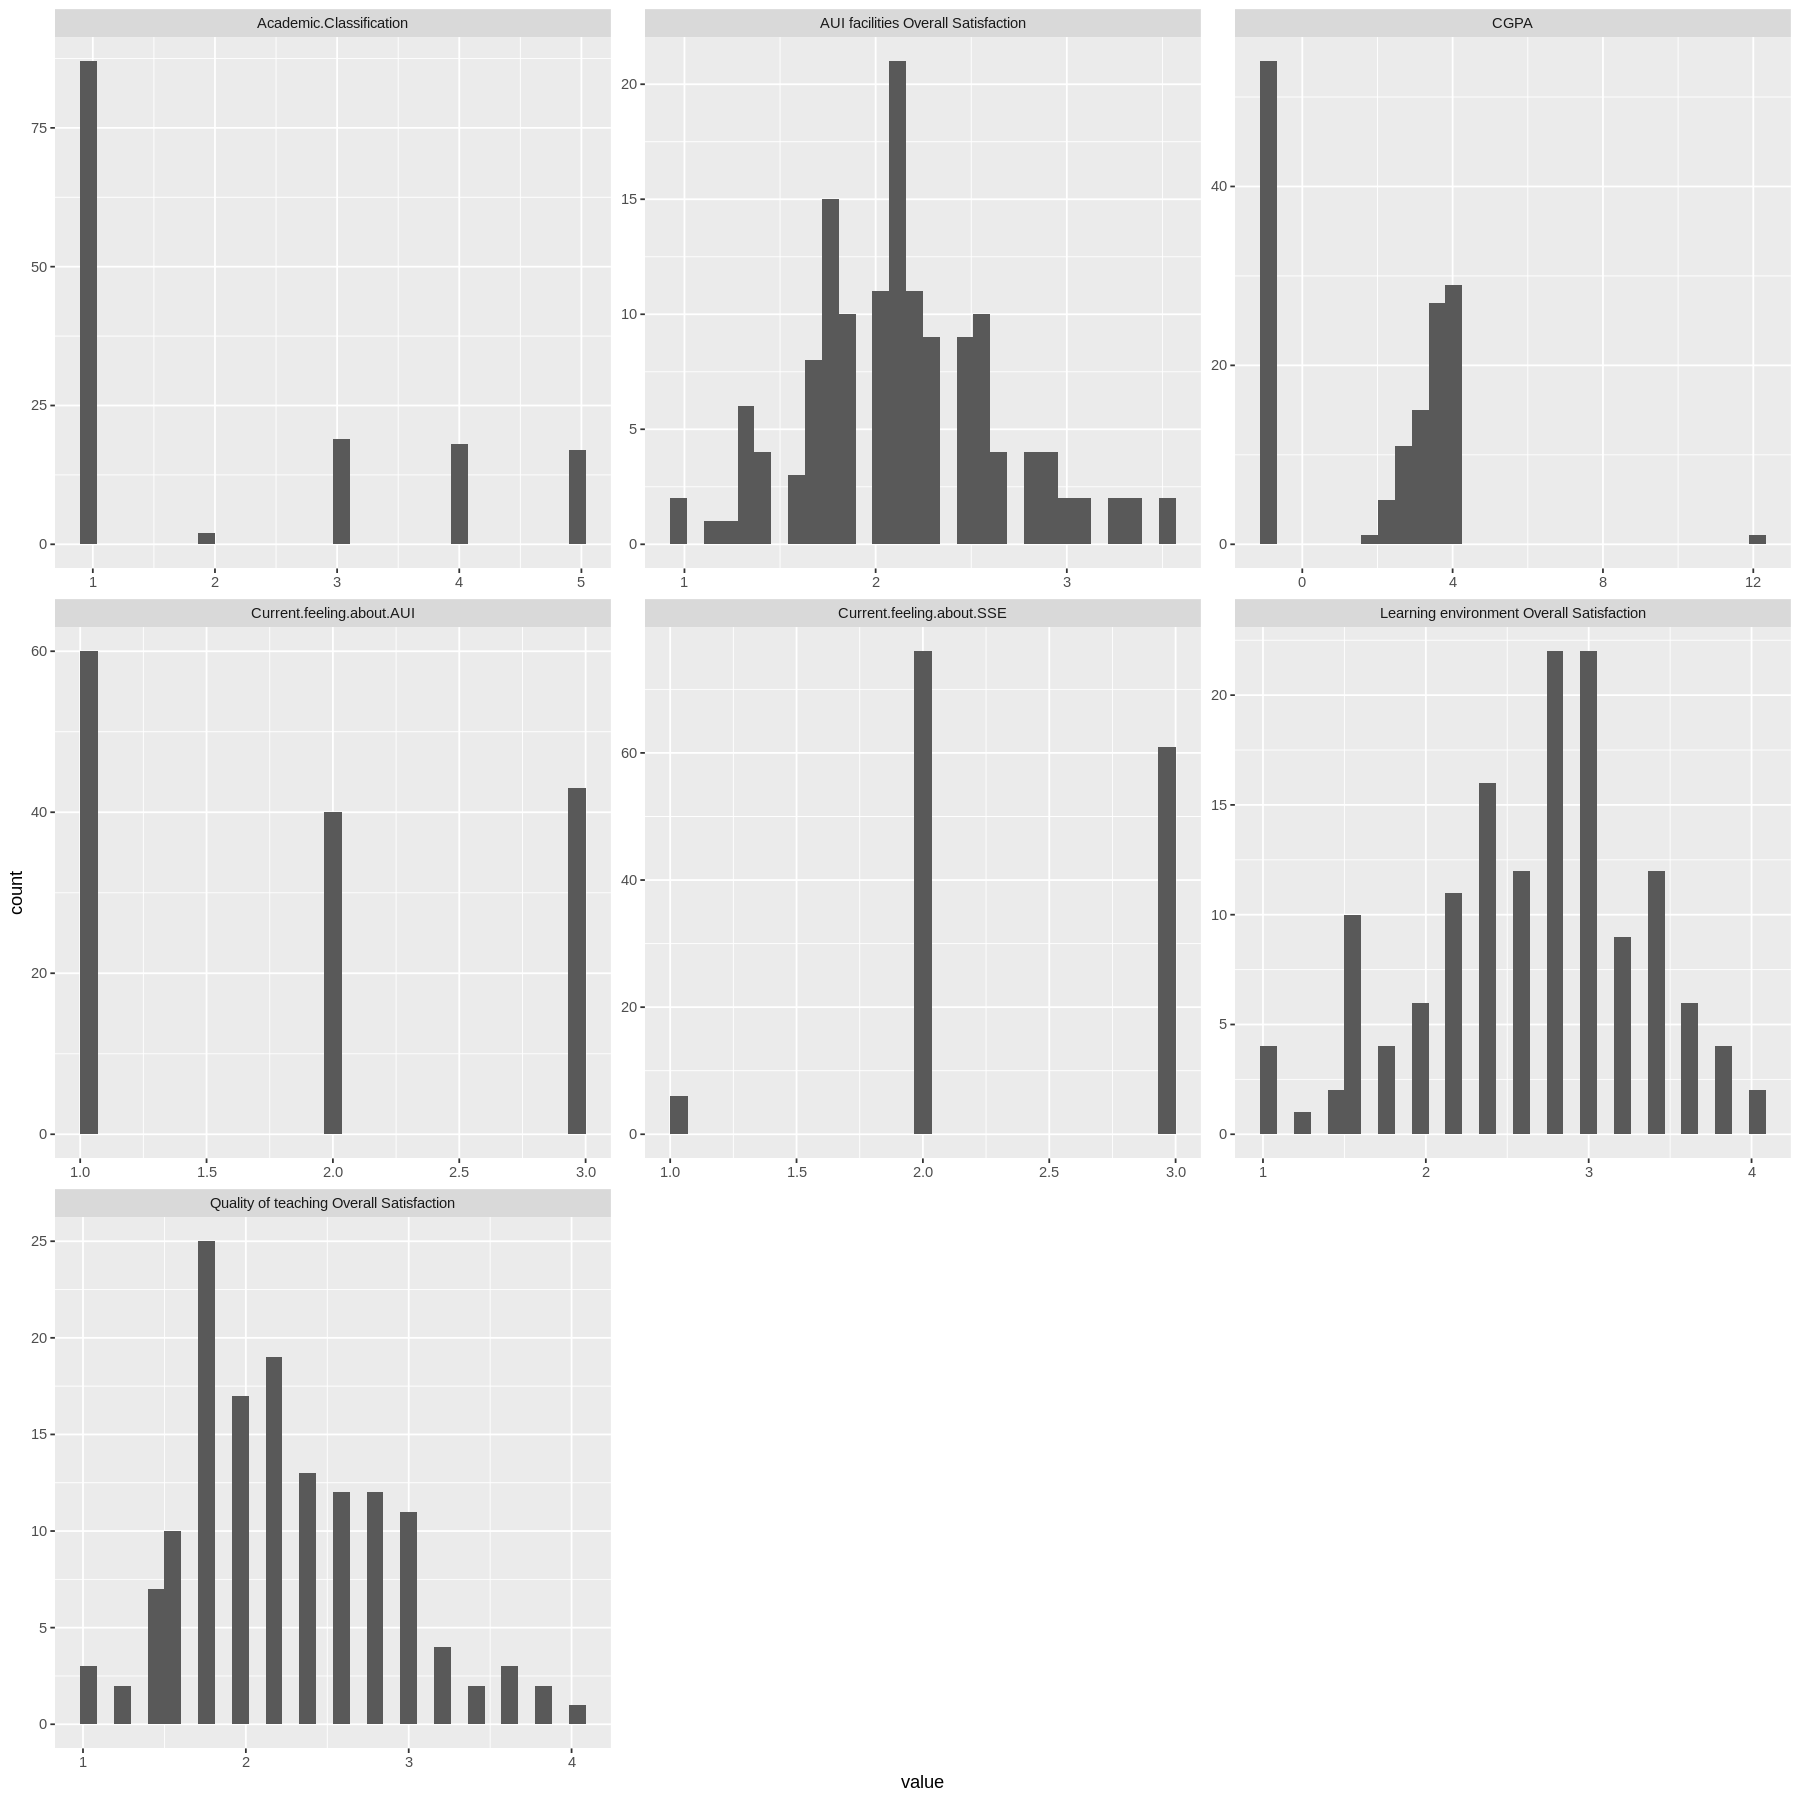

In [ ]:
#for rescaling the plot size
options(repr.plot.width=15, repr.plot.height=15)

#checking the distribution of the features using histograms
df_long <- pivot_longer(df_t, colnames(df_t))    # Reshape data frame

ggplot(df_long,                    # Draw histograms
       aes(x = value)) +
  geom_histogram(bins=30) + 
  facet_wrap(name ~ ., scales = "free")

In [ ]:
#scaling data
df_scaled <- as.data.frame(scale(df_t))

In [ ]:
head(df_scaled)

Academic.Classification CGPA       Current.feeling.about.AUI
1 -0.7448548              -1.1991279  0.1409748               
2  0.5701358               0.5467283 -1.0448720               
3  0.5701358               0.8348794 -1.0448720               
4 -0.7448548              -1.1991279 -1.0448720               
5  1.8851264               0.8814920  0.1409748               
6 -0.7448548               0.7501291 -1.0448720               
  Current.feeling.about.SSE AUI facilities Overall Satisfaction
1  1.083027                  1.24751686                        
2 -0.676892                  0.80920012                        
3 -0.676892                  0.80920012                        
4 -0.676892                 -0.72490844                        
5  1.083027                 -0.06743334                        
6 -0.676892                 -0.72490844                        
  Learning environment Overall Satisfaction
1  0.5256162                               
2  0.2249637                               
3 -0.3763412                               
4 -0.3763412                               
5  0.5256162                               
6 -0.3763412                               
  Quality of teaching Overall Satisfaction
1 -0.09569381                             
2 -0.42150845                             
3  1.20756476                             
4  0.23012083                             
5 -0.09569381                             
6 -1.07313774

In [ ]:
summary(df_scaled)

 Academic.Classification      CGPA         Current.feeling.about.AUI
 Min.   :-0.7449         Min.   :-1.1991   Min.   :-1.045           
 1st Qu.:-0.7449         1st Qu.:-1.1991   1st Qu.:-1.045           
 Median :-0.7449         Median : 0.4916   Median : 0.141           
 Mean   : 0.0000         Mean   : 0.0000   Mean   : 0.000           
 3rd Qu.: 0.5701         3rd Qu.: 0.8137   3rd Qu.: 1.327           
 Max.   : 1.8851         Max.   : 4.3096   Max.   : 1.327           
 Current.feeling.about.SSE AUI facilities Overall Satisfaction
 Min.   :-2.4368           Min.   :-2.25902                   
 1st Qu.:-0.6769           1st Qu.:-0.72491                   
 Median :-0.6769           Median :-0.06743                   
 Mean   : 0.0000           Mean   : 0.00000                   
 3rd Qu.: 1.0830           3rd Qu.: 0.59004                   
 Max.   : 1.0830           Max.   : 2.78163                   
 Learning environment Overall Satisfaction
 Min.   :-2.4809                 

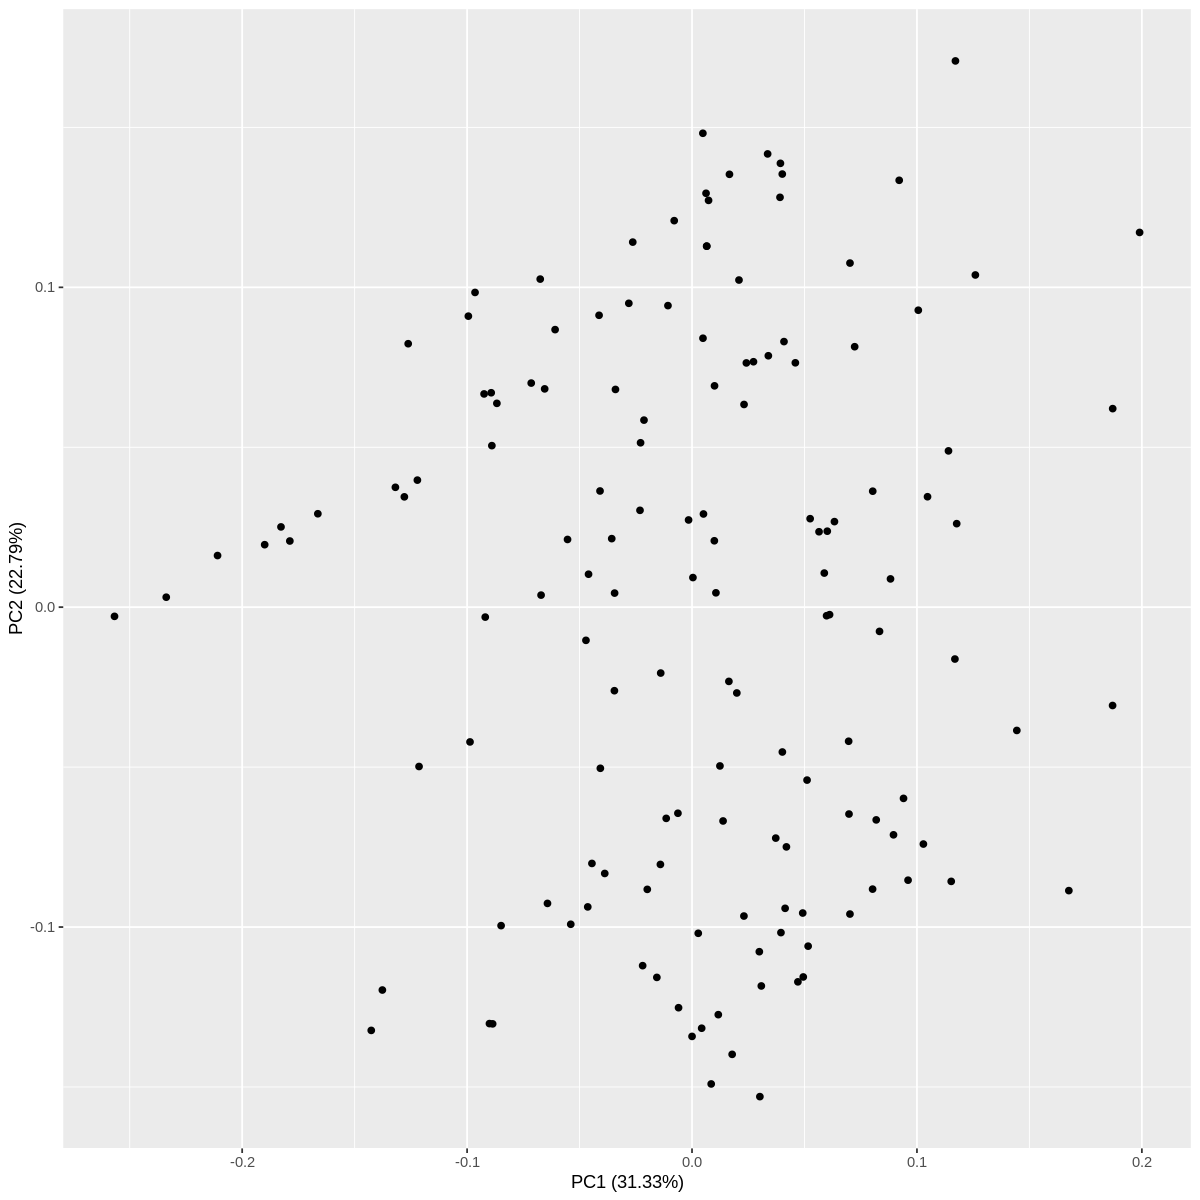

In [ ]:
# computing PCA1 and PCA2 and scatter plot to visualise data and attempt to identify clusters visually 
options(repr.plot.width=10, repr.plot.height=10)
pca_res <- prcomp(df_scaled, center = TRUE, scale. = TRUE)
autoplot(pca_res) 

In [ ]:
# prcomp object
summary(pca_res)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.4808 1.2629 1.0012 0.8882 0.71331 0.68672 0.66377
Proportion of Variance 0.3132 0.2279 0.1432 0.1127 0.07269 0.06737 0.06294
Cumulative Proportion  0.3132 0.5411 0.6843 0.7970 0.86969 0.93706 1.00000

In [ ]:
# WSS Plot Function # 
wssplot <- function(data, nc=15, seed=1234){
               wss <- (nrow(data)-1)*sum(apply(data,2,var))
               for (i in 1:nc){
                    set.seed(seed)
                    wss[i] <- sum(kmeans(data, centers=i, iter.max = 100)$withinss)}
                plot(1:nc, wss, type="b", xlab="Number of Clusters",
                     ylab="Within groups sum of squares")}


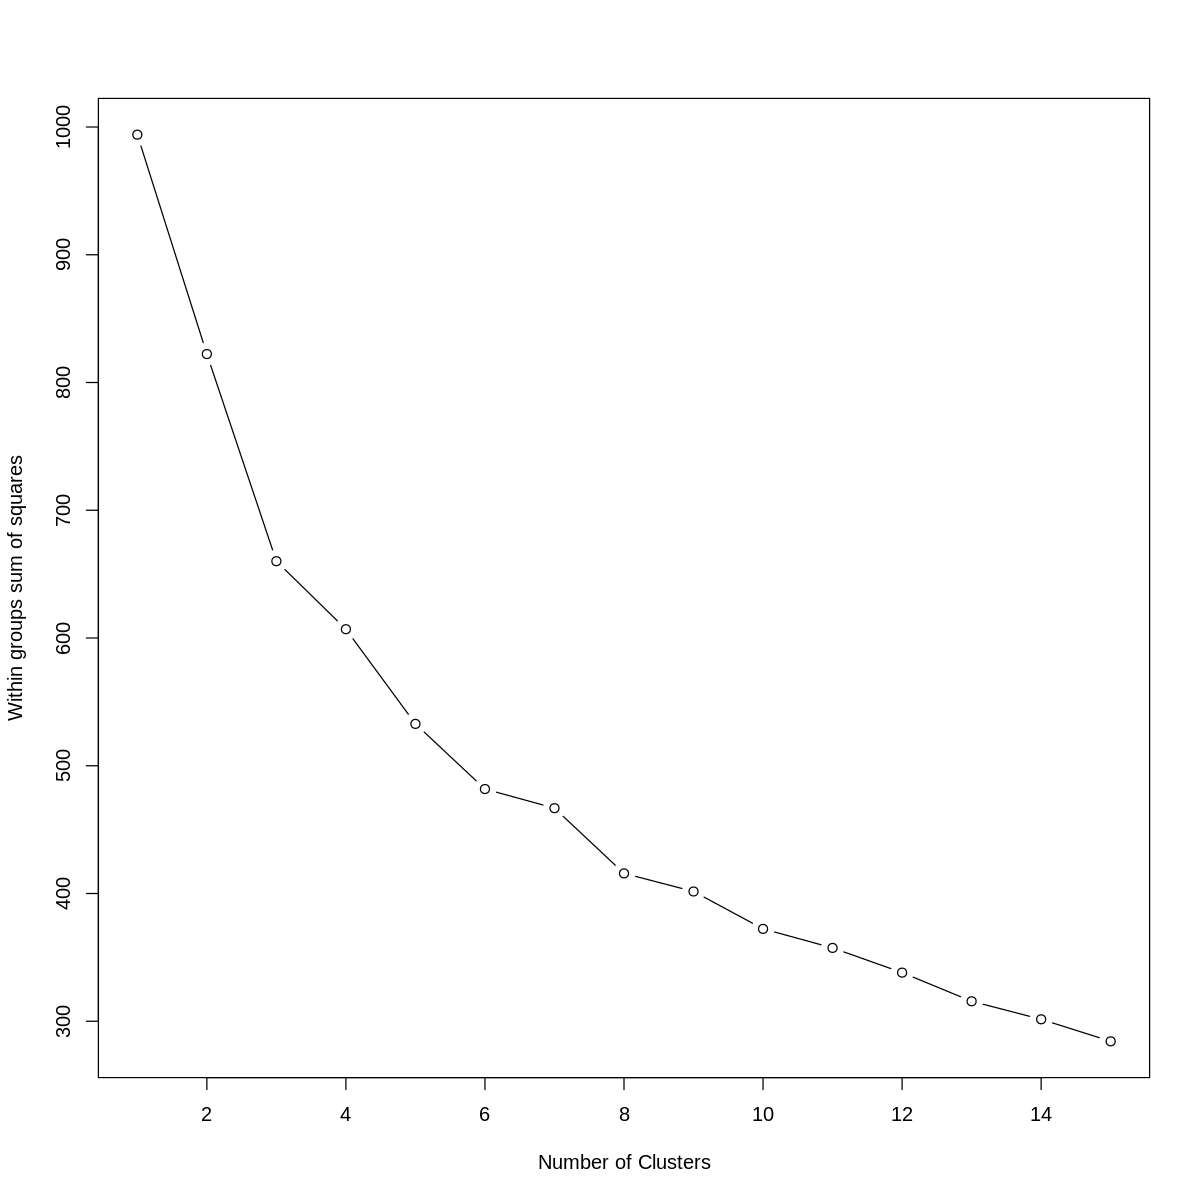

In [ ]:
#elbow method of selected features 
wssplot(df_scaled)

In [ ]:
#building kmeans model
KM = kmeans(df_scaled, centers = 3, nstart = 15)

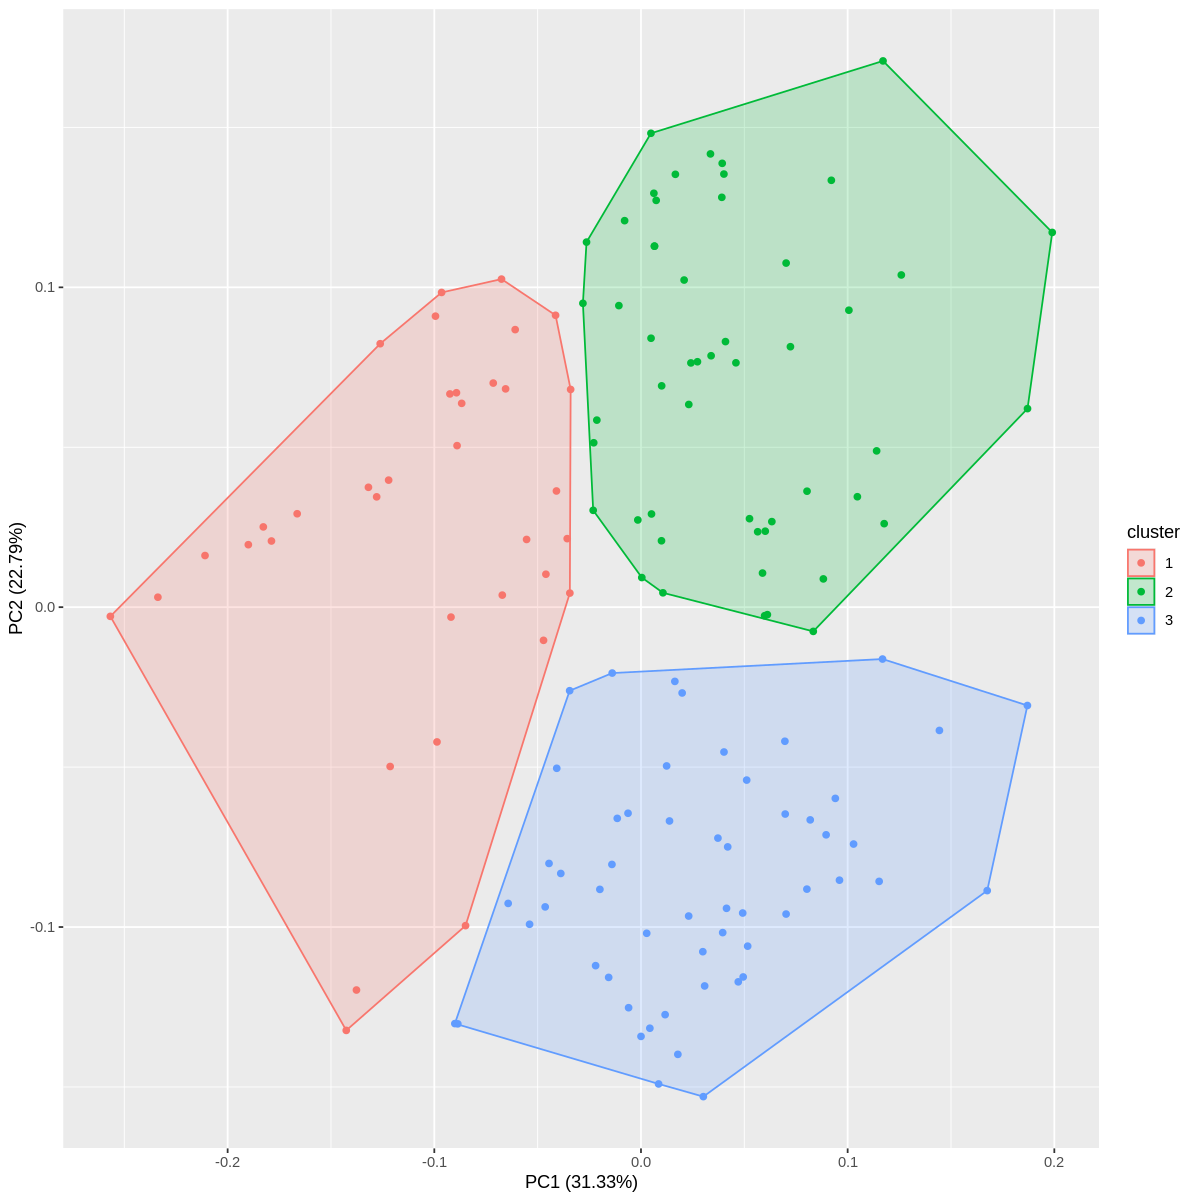

In [ ]:
#evaluating kmeans using plot
autoplot(KM, df_scaled, frame=TRUE)

In [ ]:
#evaluating kmeans by looking at cluster centers 
KM$centers

Academic.Classification CGPA       Current.feeling.about.AUI
1 -0.5987448              -0.6075237  0.4044963               
2 -0.7195666              -0.4153506  0.0953653               
3  1.0722231               0.7903469 -0.3549248               
  Current.feeling.about.SSE AUI facilities Overall Satisfaction
1  0.5452741                 0.9431302                         
2 -0.5076690                -0.4931063                         
3  0.1230713                -0.1511120                         
  Learning environment Overall Satisfaction
1  0.842971597                             
2 -0.590267004                             
3  0.006307395                             
  Quality of teaching Overall Satisfaction
1  0.95415337                             
2 -0.56561878                             
3 -0.08976991

In [ ]:
table(KM$cluster) #Give a count of data points in each cluster


 1  2  3 
36 52 55 

In [ ]:
KM$cluster

[1] 1 3 3 2 3 2 3 3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1 2 1 1 2 2 1 2 2 1 1 2 1 2 1
 [38] 2 1 1 1 2 2 2 1 3 3 2 3 1 3 2 3 3 3 3 3 2 3 1 1 1 3 2 3 3 2 3 3 3 1 3 2 1
 [75] 3 2 2 2 3 3 1 2 2 1 1 2 2 2 2 2 1 3 1 3 3 2 3 3 1 3 3 1 3 2 3 3 2 2 1 1 2
[112] 1 3 2 1 3 2 1 3 3 2 3 3 2 2 1 1 2 2 3 2 3 3 3 1 2 2 3 3 3 1 2 1

In [ ]:
#append label column to dataframe
my_data['Cluster Label'] <- KM$cluster
head(my_data)

ID       Gender Academic Classification                  CGPA
1 student1 Male   Freshman (earned between 0-29 credits)   N/A 
2 student2 Male   Junior (earned between 60-89 credits)    3.12
3 student3 Male   Junior (earned between 60-89 credits)    3.8 
4 student4 Male   Freshman (earned between 0-29 credits)   N/A 
5 student5 Female Sophomore (earned between 30-59 credits) 3.91
6 student6 Male   Freshman (earned between 0-29 credits)   3.6 
  Current feeling about AUI       Current feeling about SSE
1 I am happy to be an AUI student 3                        
2 I am disappointed/upset         2                        
3 I am disappointed/upset         2                        
4 I am disappointed/upset         2                        
5 I am happy to be an AUI student 3                        
6 I am disappointed/upset         2                        
  Food satisfaction    Housing facilities satisfaction
1 Average Satisfaction Very Satisfied                 
2 Not Satisfied        Not Satisfied                  
3 Not Satisfied        Not Satisfied                  
4 Not Satisfied        Not Satisfied                  
5 Average Satisfaction Average Satisfaction           
6 Not Satisfied        Not Satisfied                  
  Laboratory facilities satisfaction Parking facilities satisfaction ⋯
1 Satisfied                          Satisfied                       ⋯
2 Very Satisfied                     Satisfied                       ⋯
3 Satisfied                          Satisfied                       ⋯
4 Satisfied                          Not Satisfied                   ⋯
5 Satisfied                          Not Satisfied                   ⋯
6 Average Satisfaction               Average Satisfaction            ⋯
  Clubs satisfaction   Administrative help satisfaction
1 Very Satisfied       Satisfied                       
2 Very Satisfied       Average Satisfaction            
3 Not Satisfied        Average Satisfaction            
4 Satisfied            Average Satisfaction            
5 Average Satisfaction Satisfied                       
6 Satisfied            Average Satisfaction            
  Social life In AUI satisfaction Level of safety on campus satisfaction
1 Average Satisfaction            Very Satisfied                        
2 Satisfied                       Very Satisfied                        
3 Average Satisfaction            Very Satisfied                        
4 Average Satisfaction            Very Satisfied                        
5 Satisfied                       Very Satisfied                        
6 Satisfied                       Very Satisfied                        
  Professors/teachers satisfaction Number of students/section satisfaction
1 Satisfied                        Satisfied                              
2 Satisfied                        Not Satisfied                          
3 Average Satisfaction             Very Satisfied                         
4 Average Satisfaction             Satisfied                              
5 Satisfied                        Average Satisfaction                   
6 Average Satisfaction             Not Satisfied                          
  Offerings within programs of study satisfaction Class time slots satisfaction
1 Average Satisfaction                            Average Satisfaction         
2 Average Satisfaction                            Satisfied                    
3 Very Satisfied                                  Very Satisfied               
4 Satisfied                                       Not Satisfied                
5 Average Satisfaction                            Satisfied                    
6 Satisfied                                       Average Satisfaction         
  Knowledge from class satisfaction Cluster Label
1 Satisfied                         1            
2 Average Satisfaction              3            
3 Not Satisfied                     3            
4 Satisfied                         2            
5 Satisfied   

In [ ]:
#group rows by cluster label
#run statistics on each group and try to identify what are common feature values between all cluster members 

# subset by condition
sub1 <- my_data[my_data$'Cluster Label'==1, ]
sub2 <- my_data[my_data$'Cluster Label'==2, ]
sub3 <- my_data[my_data$'Cluster Label'==3, ]

In [ ]:
dim(sub1)

[1] 36 26

In [ ]:
dim(sub2)

[1] 52 26

In [ ]:
dim(sub3)

[1] 55 26

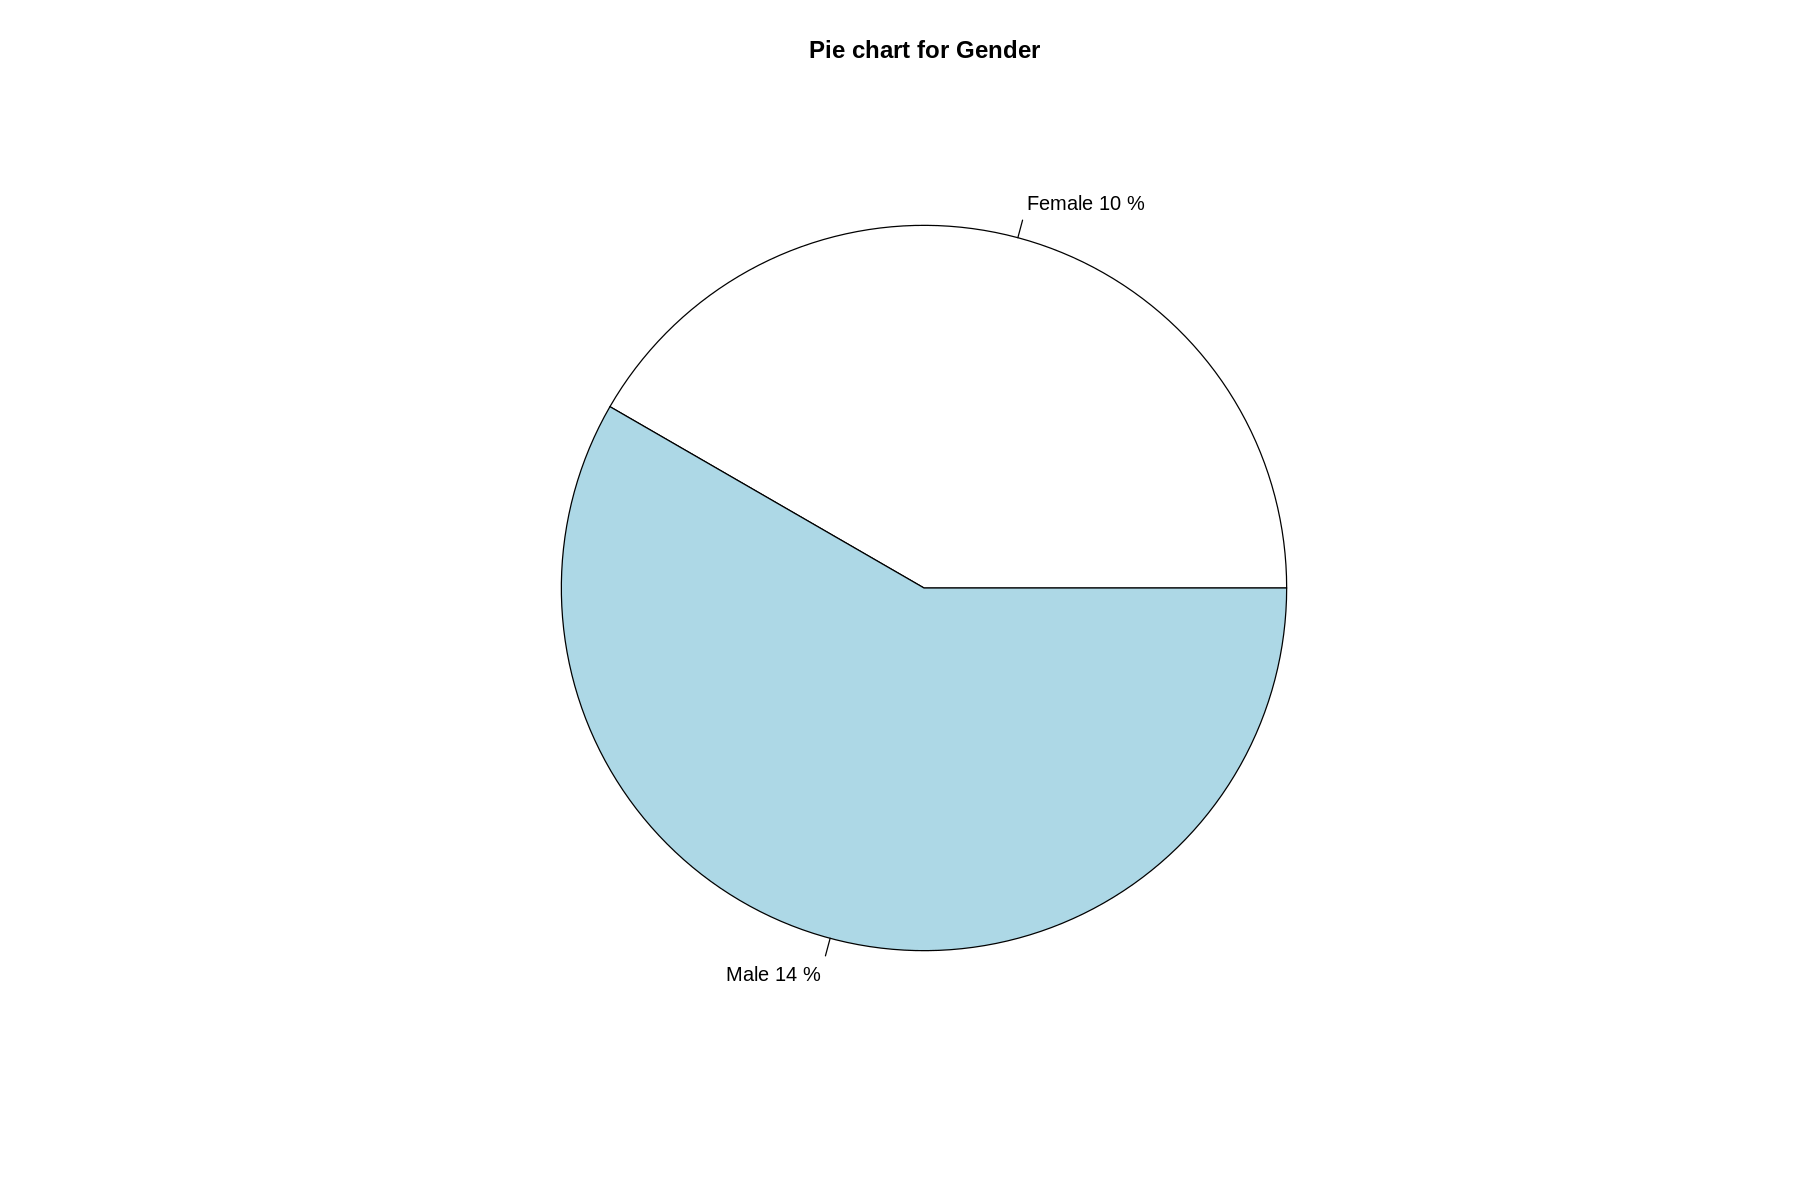

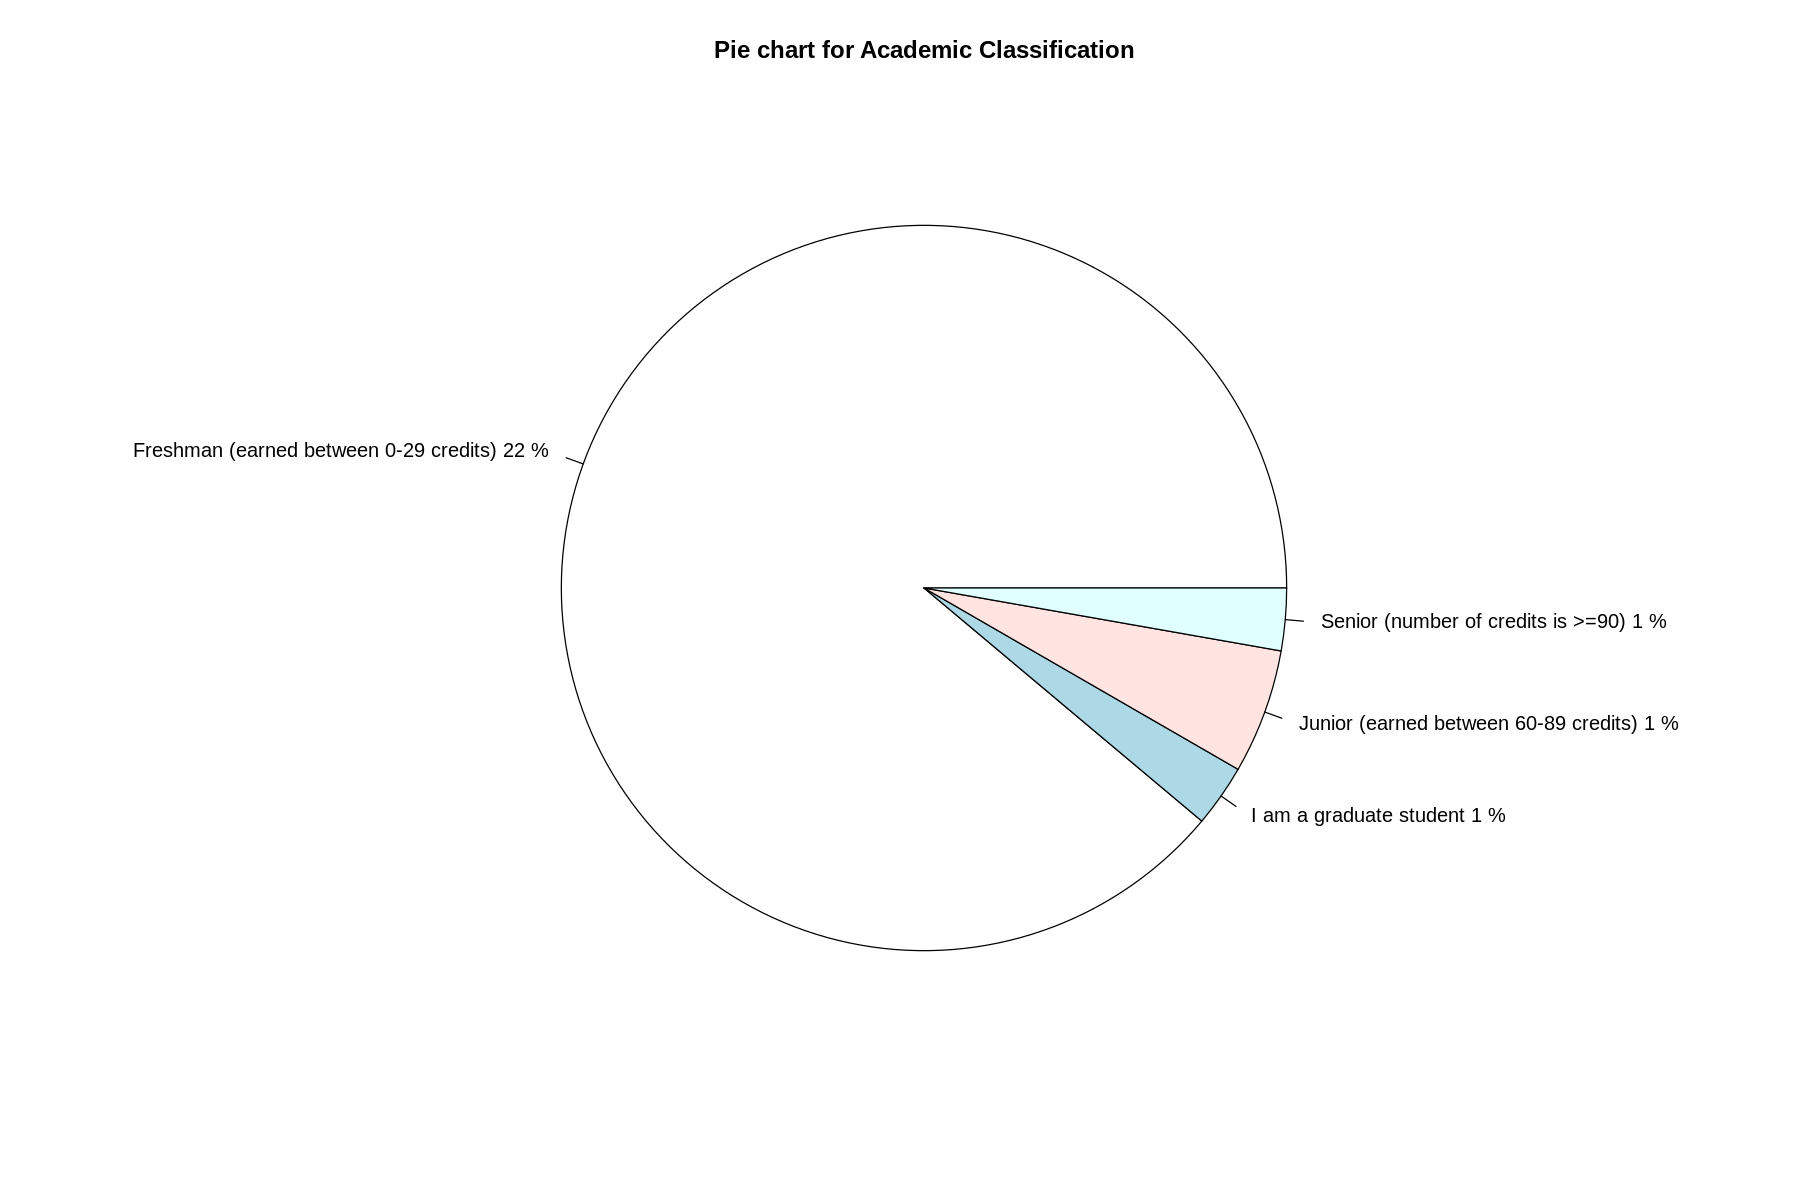

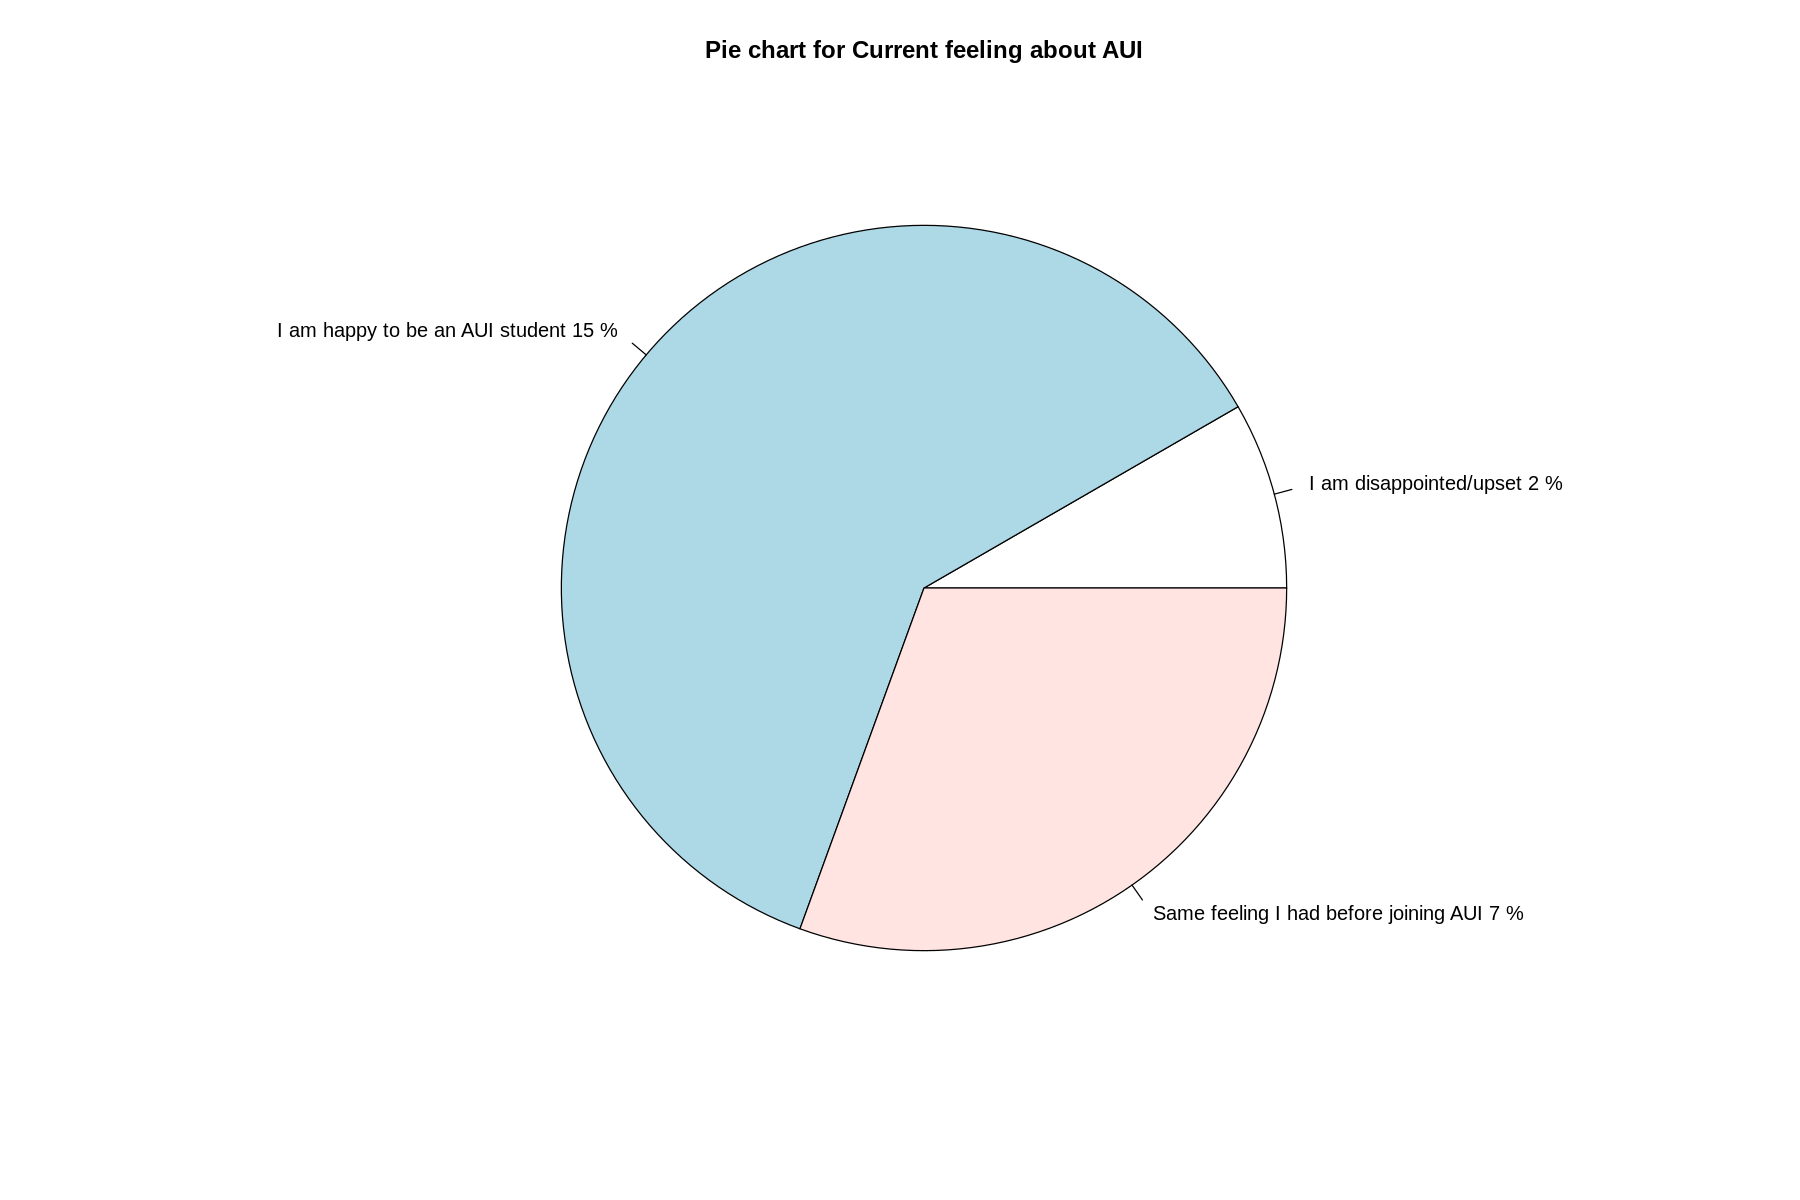

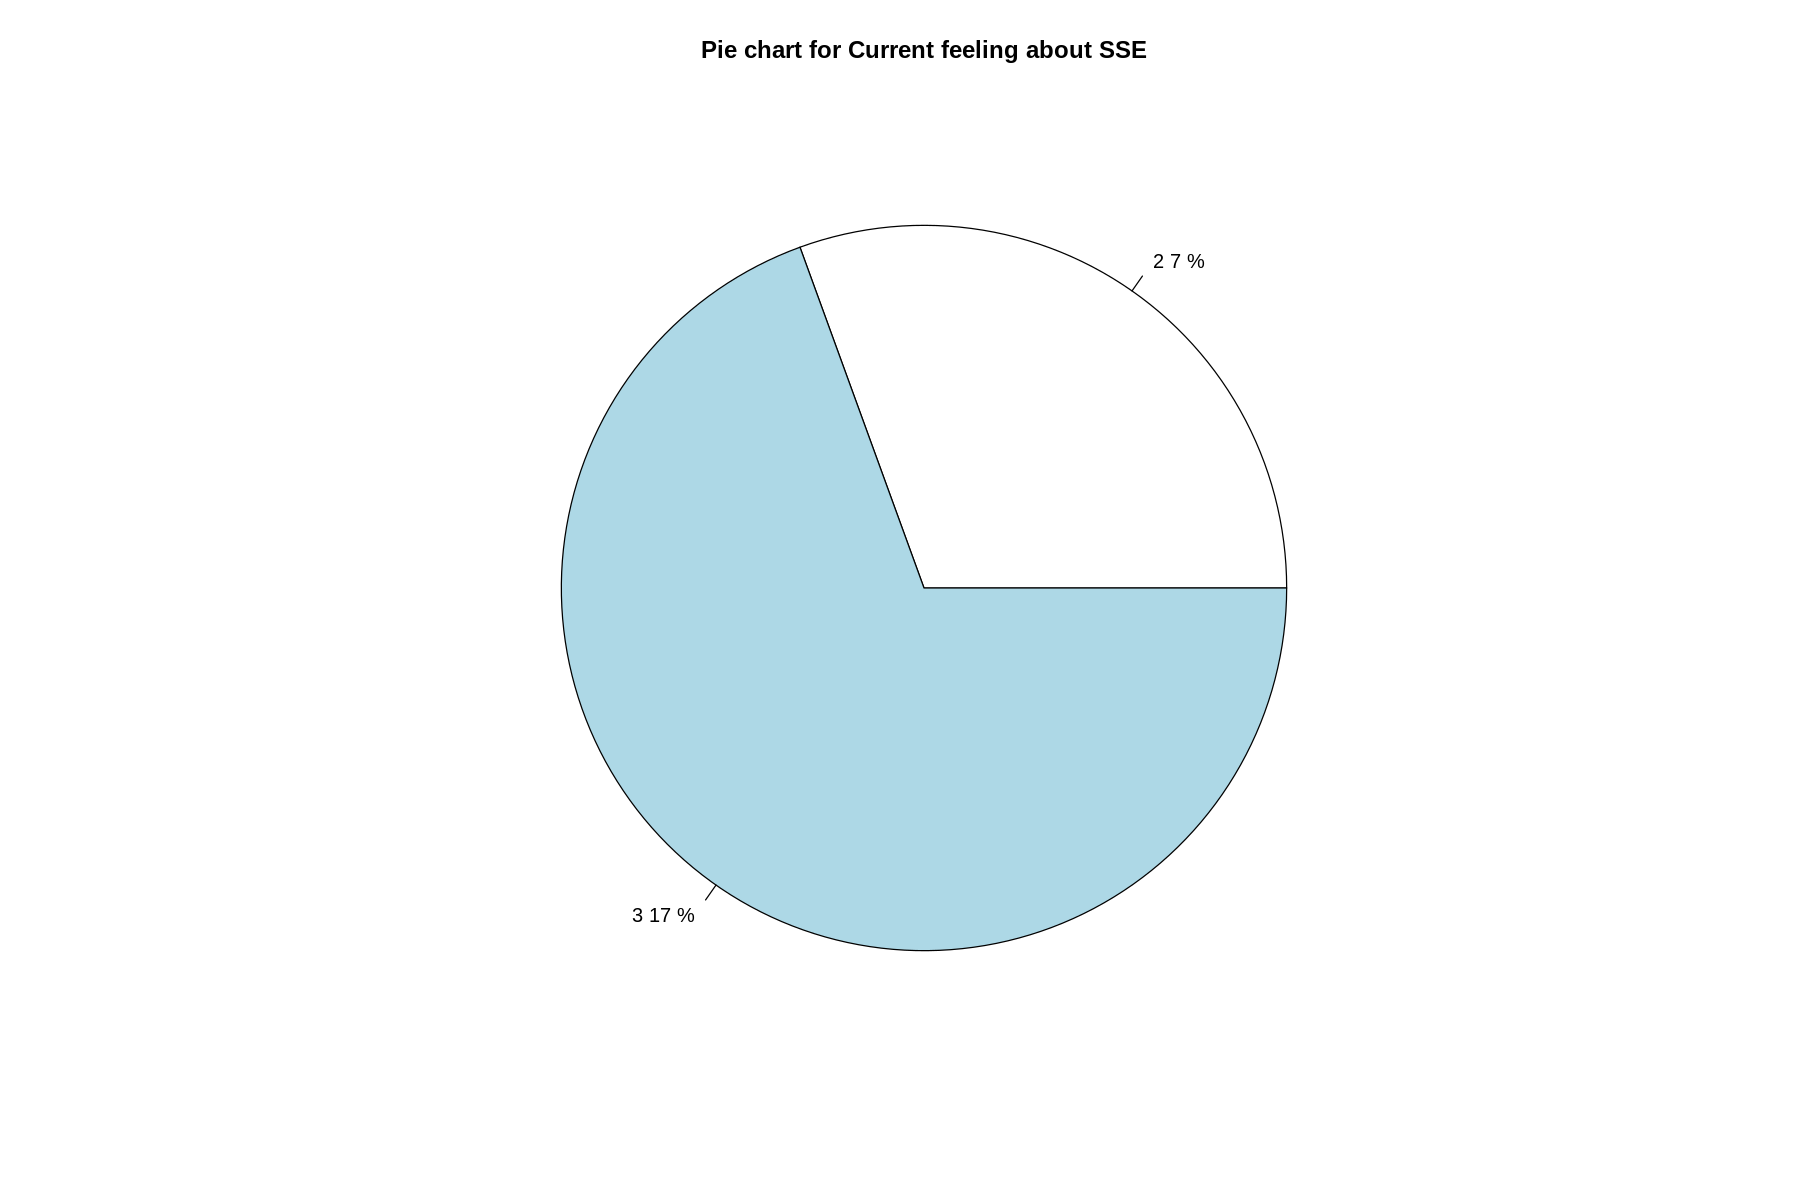

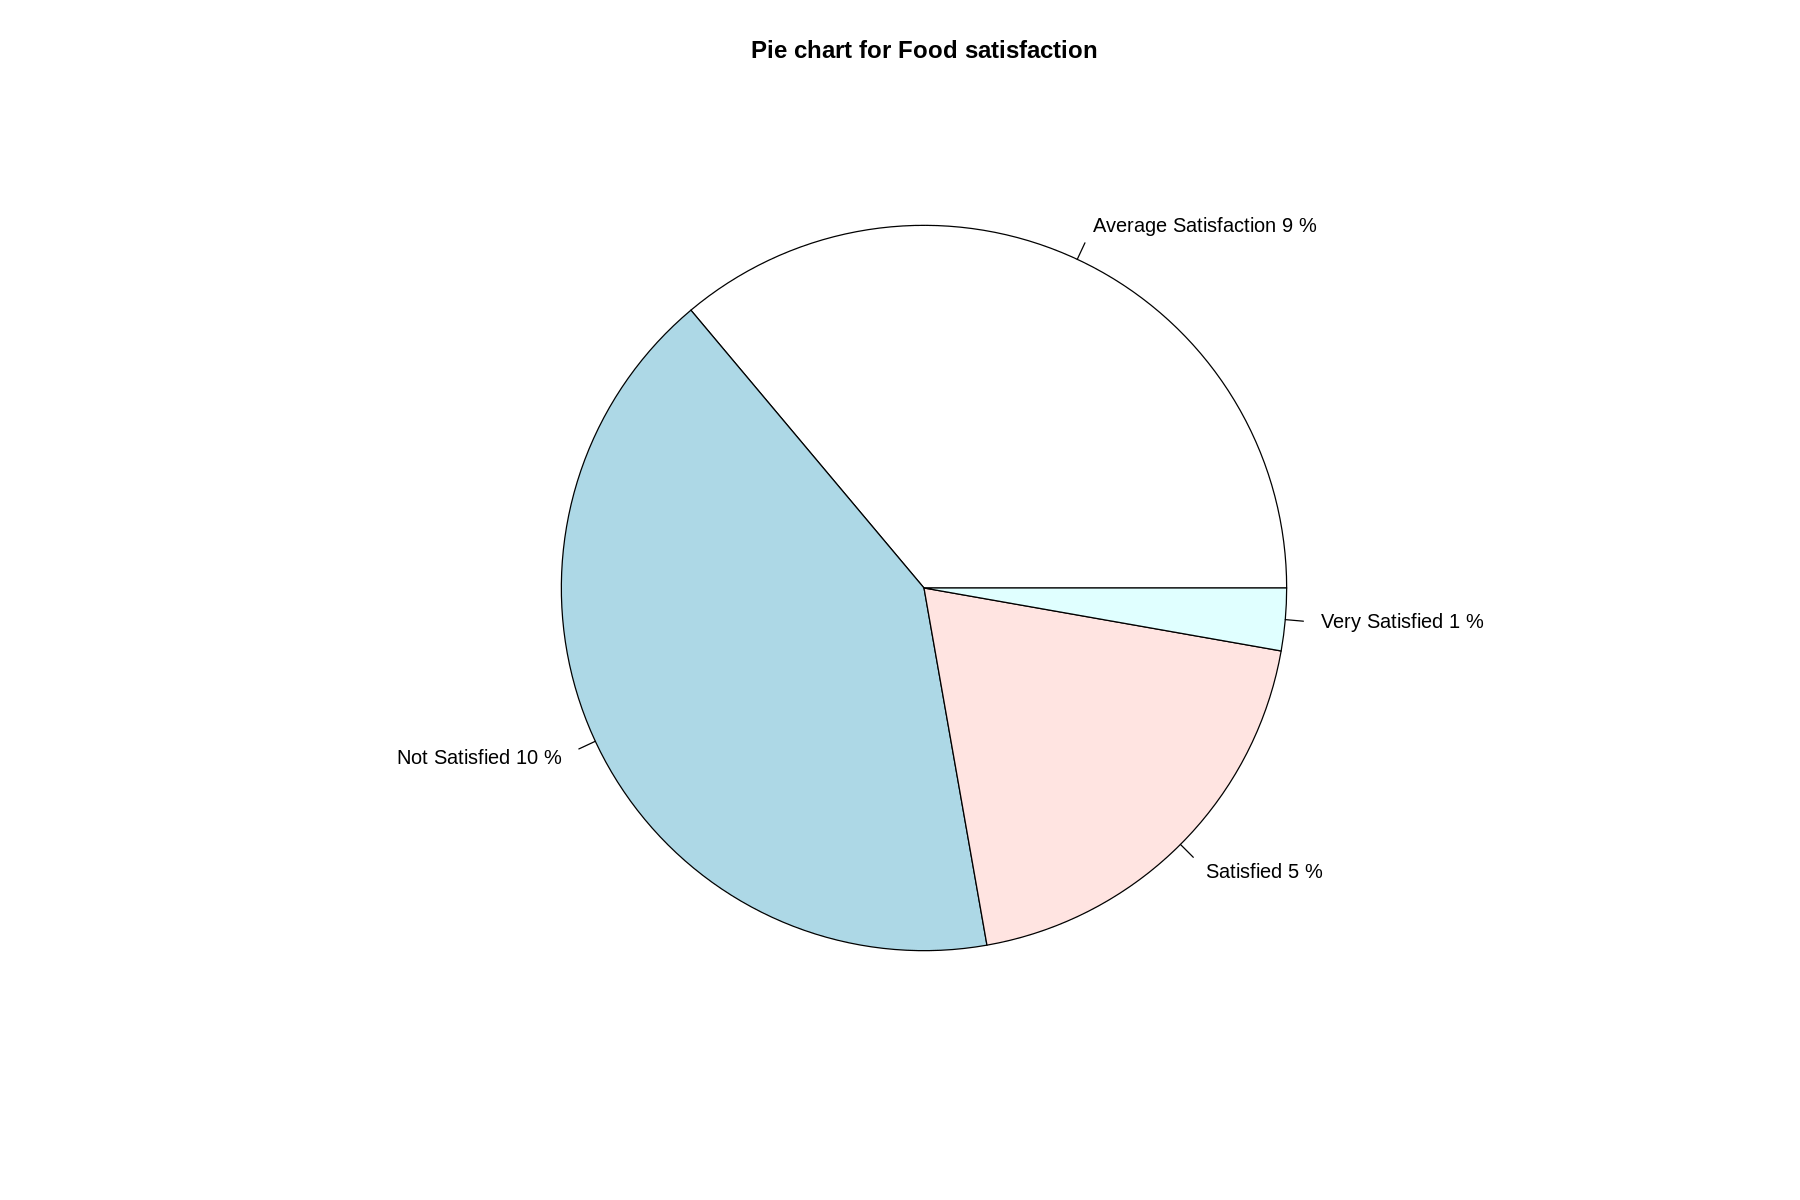

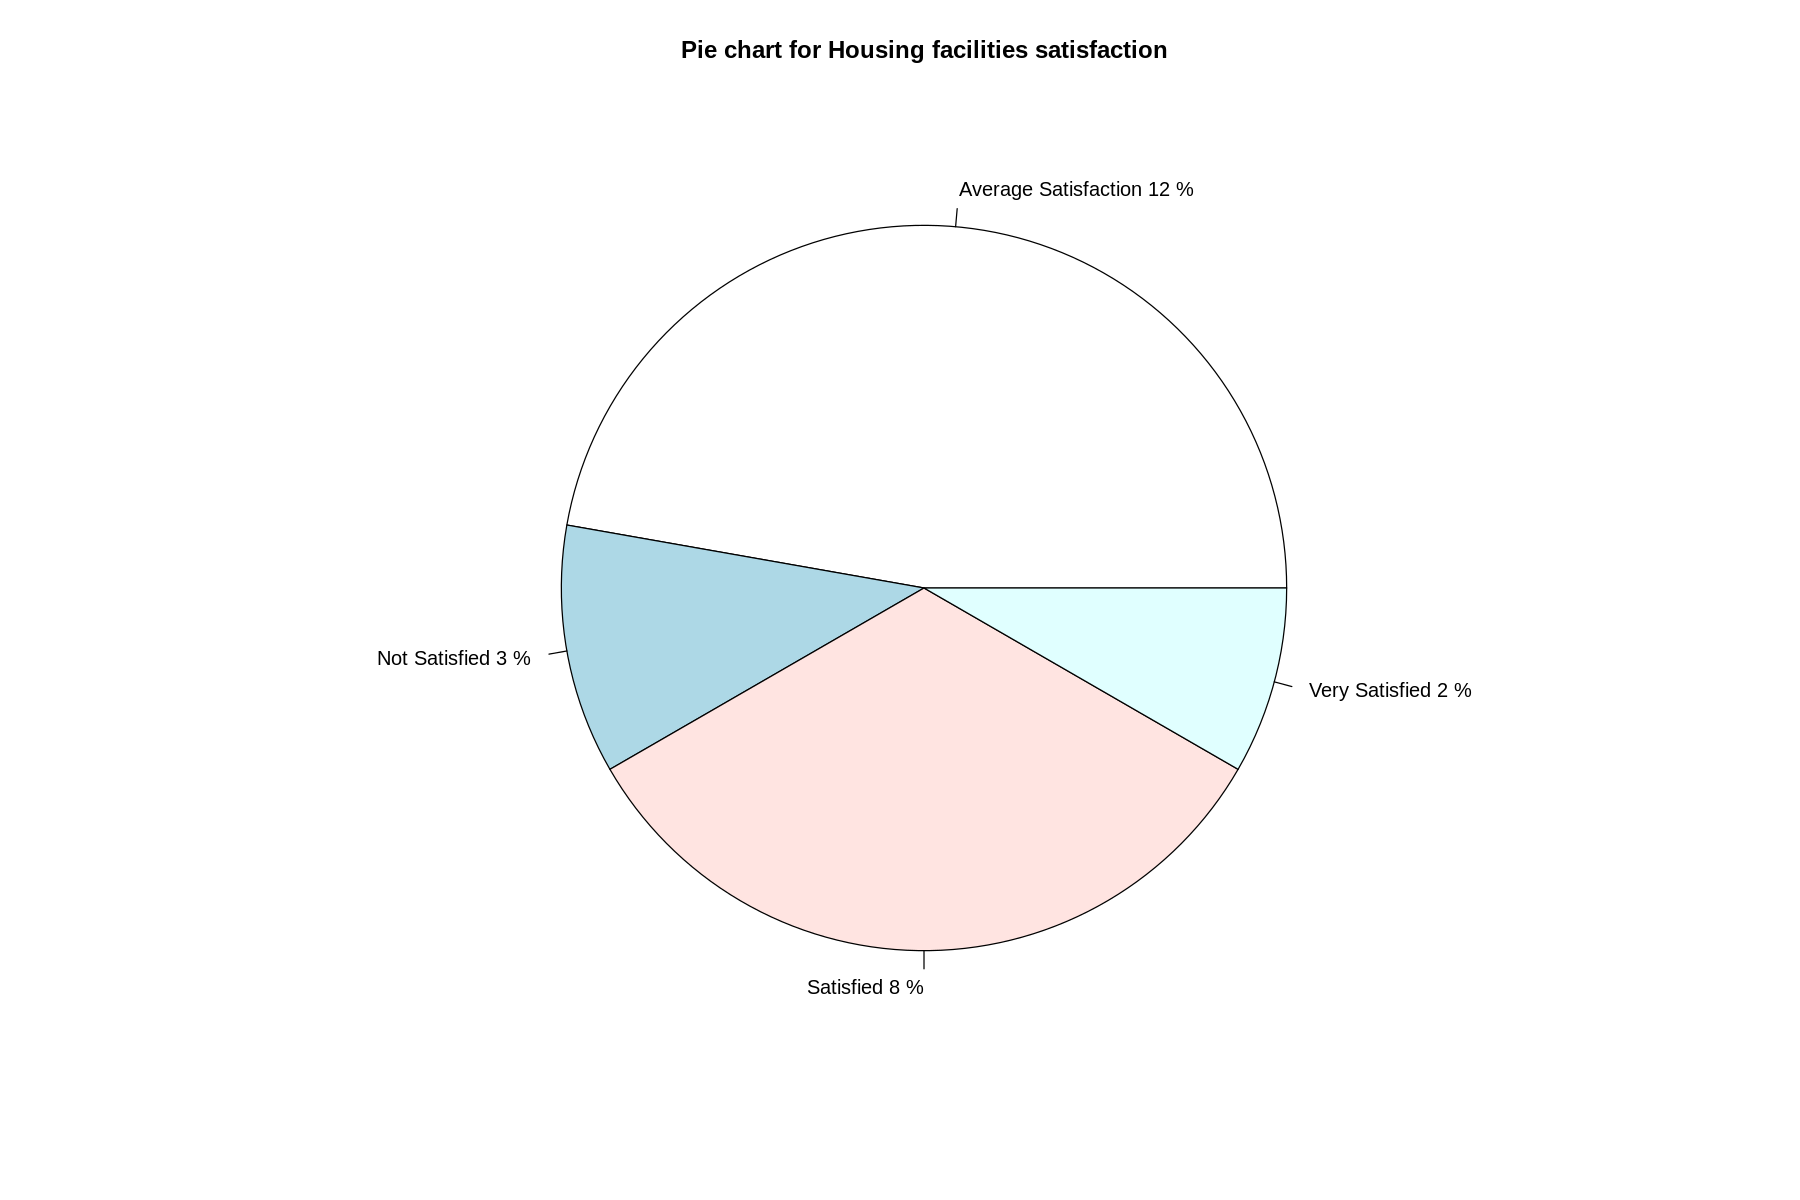

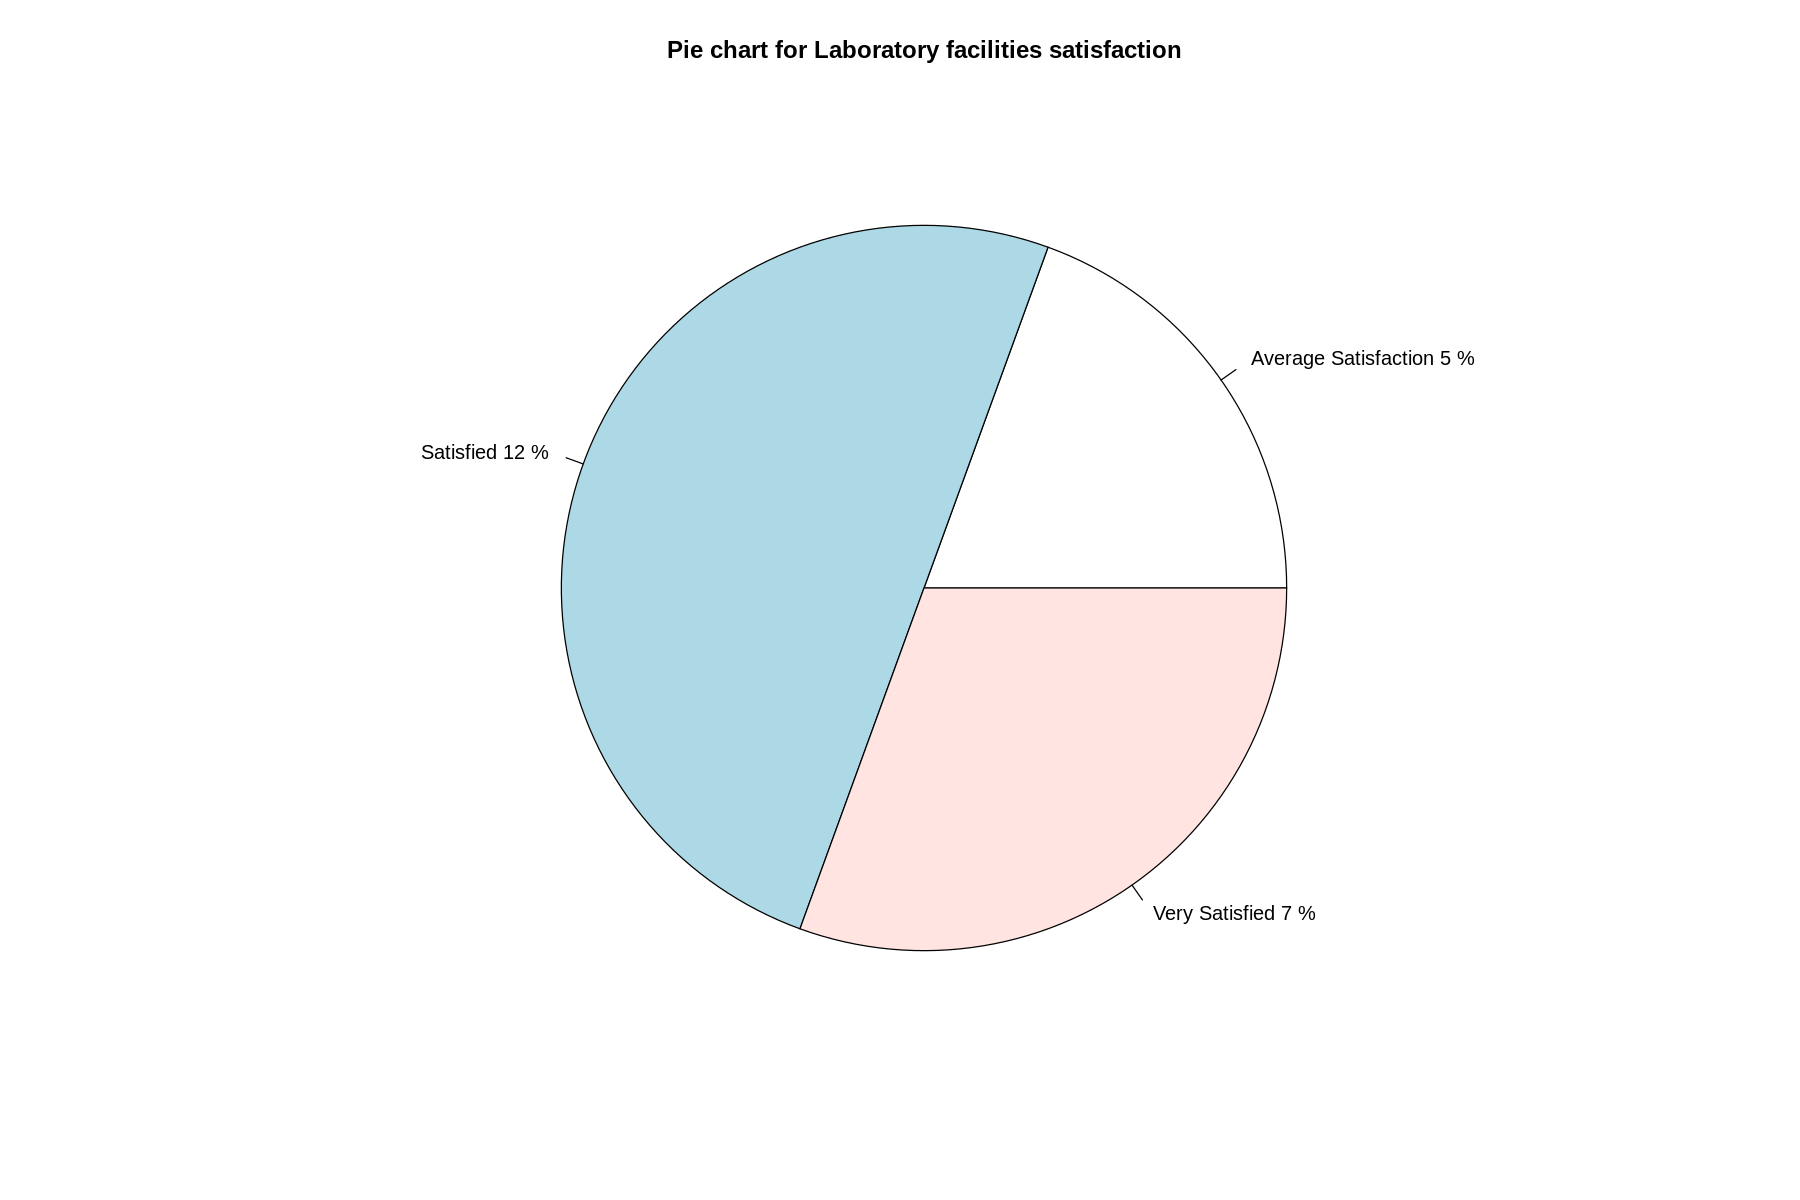

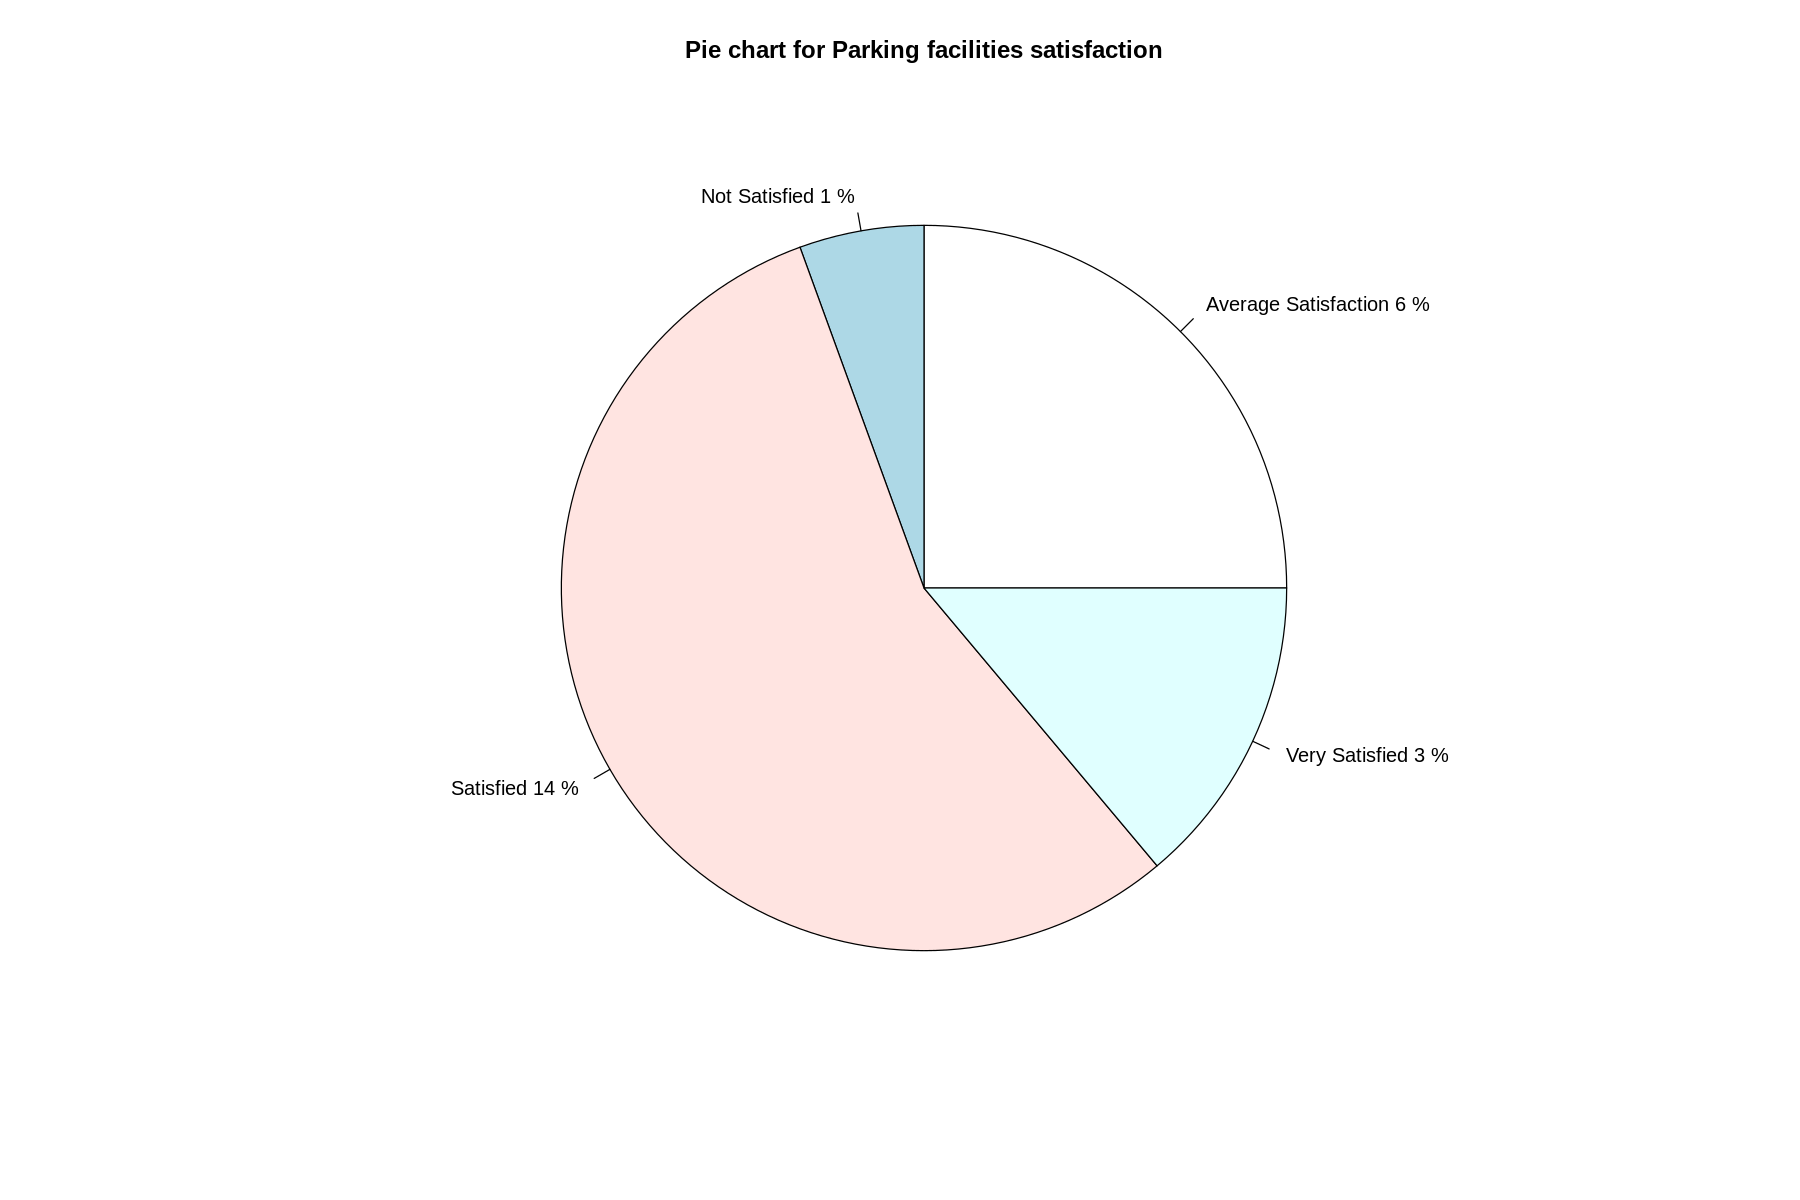

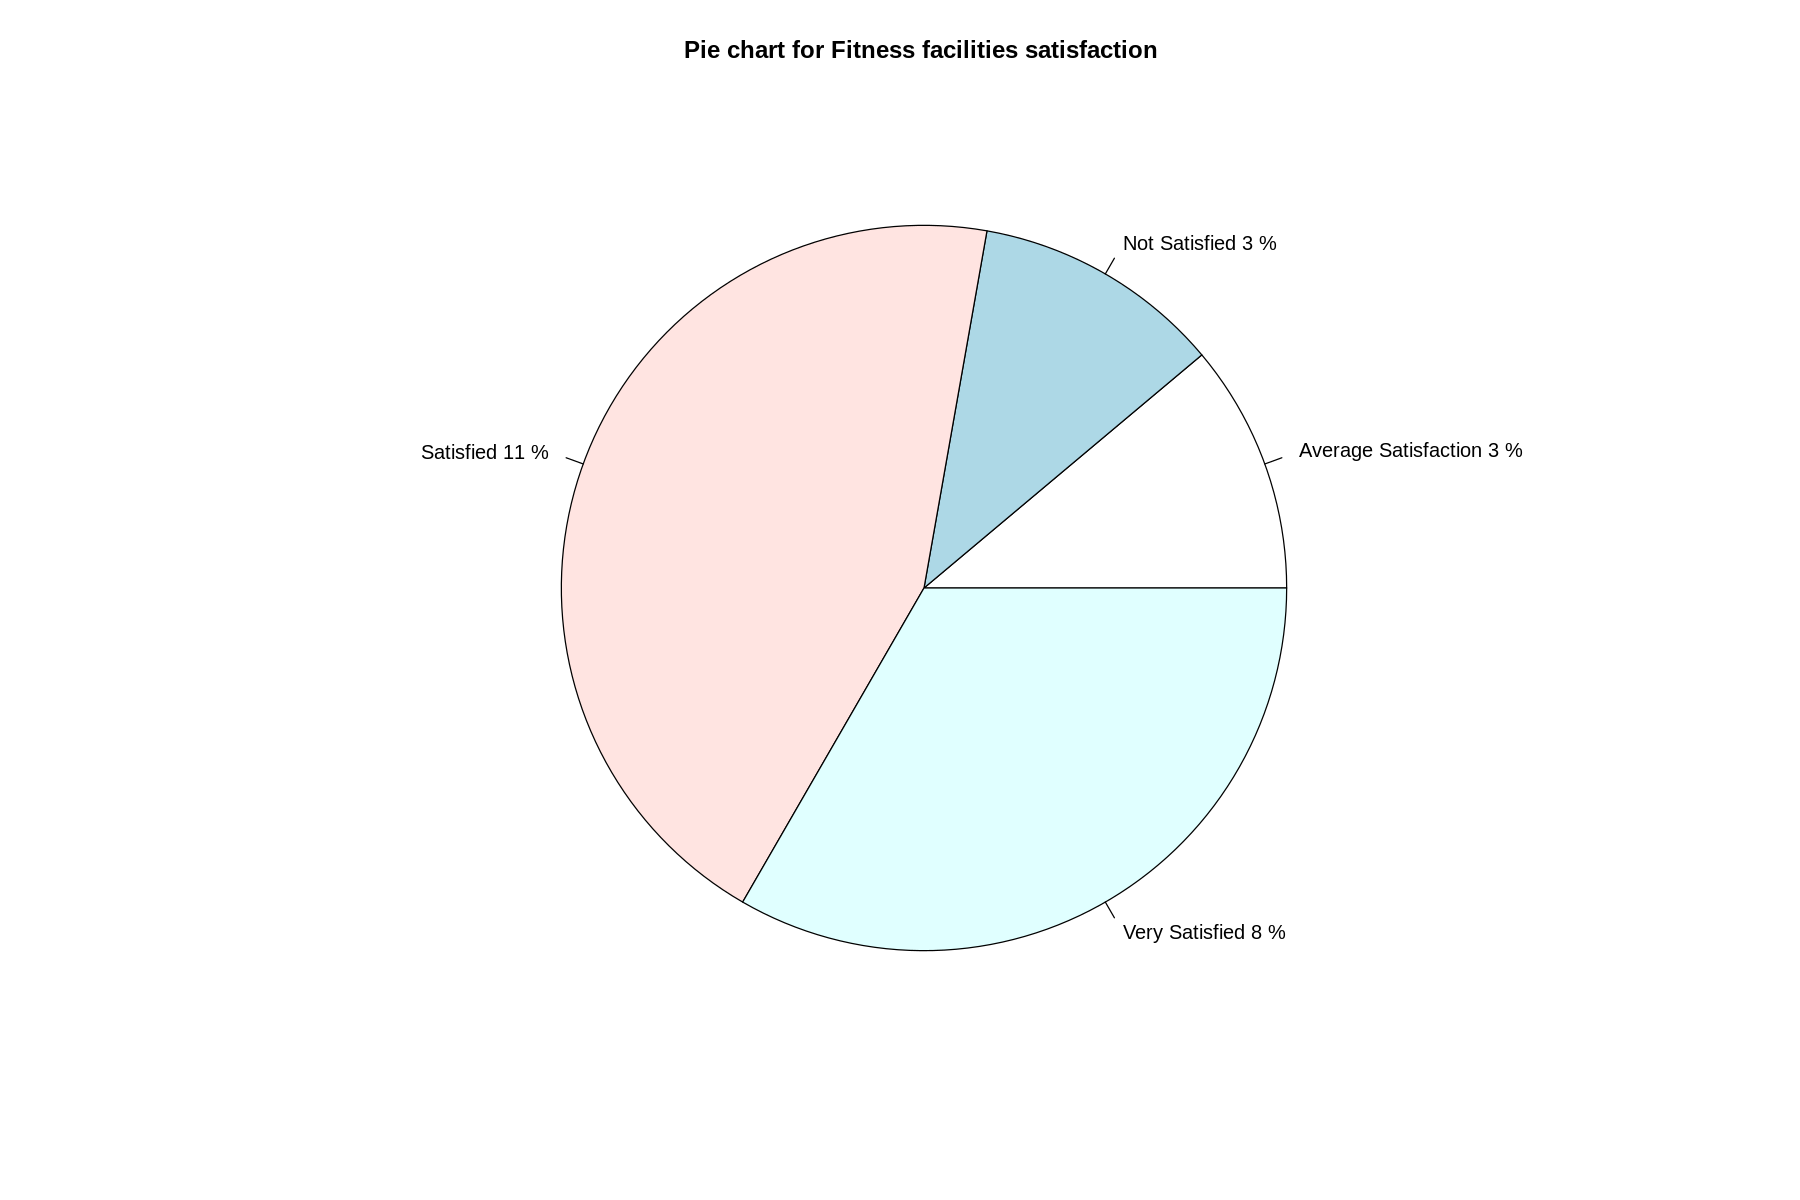

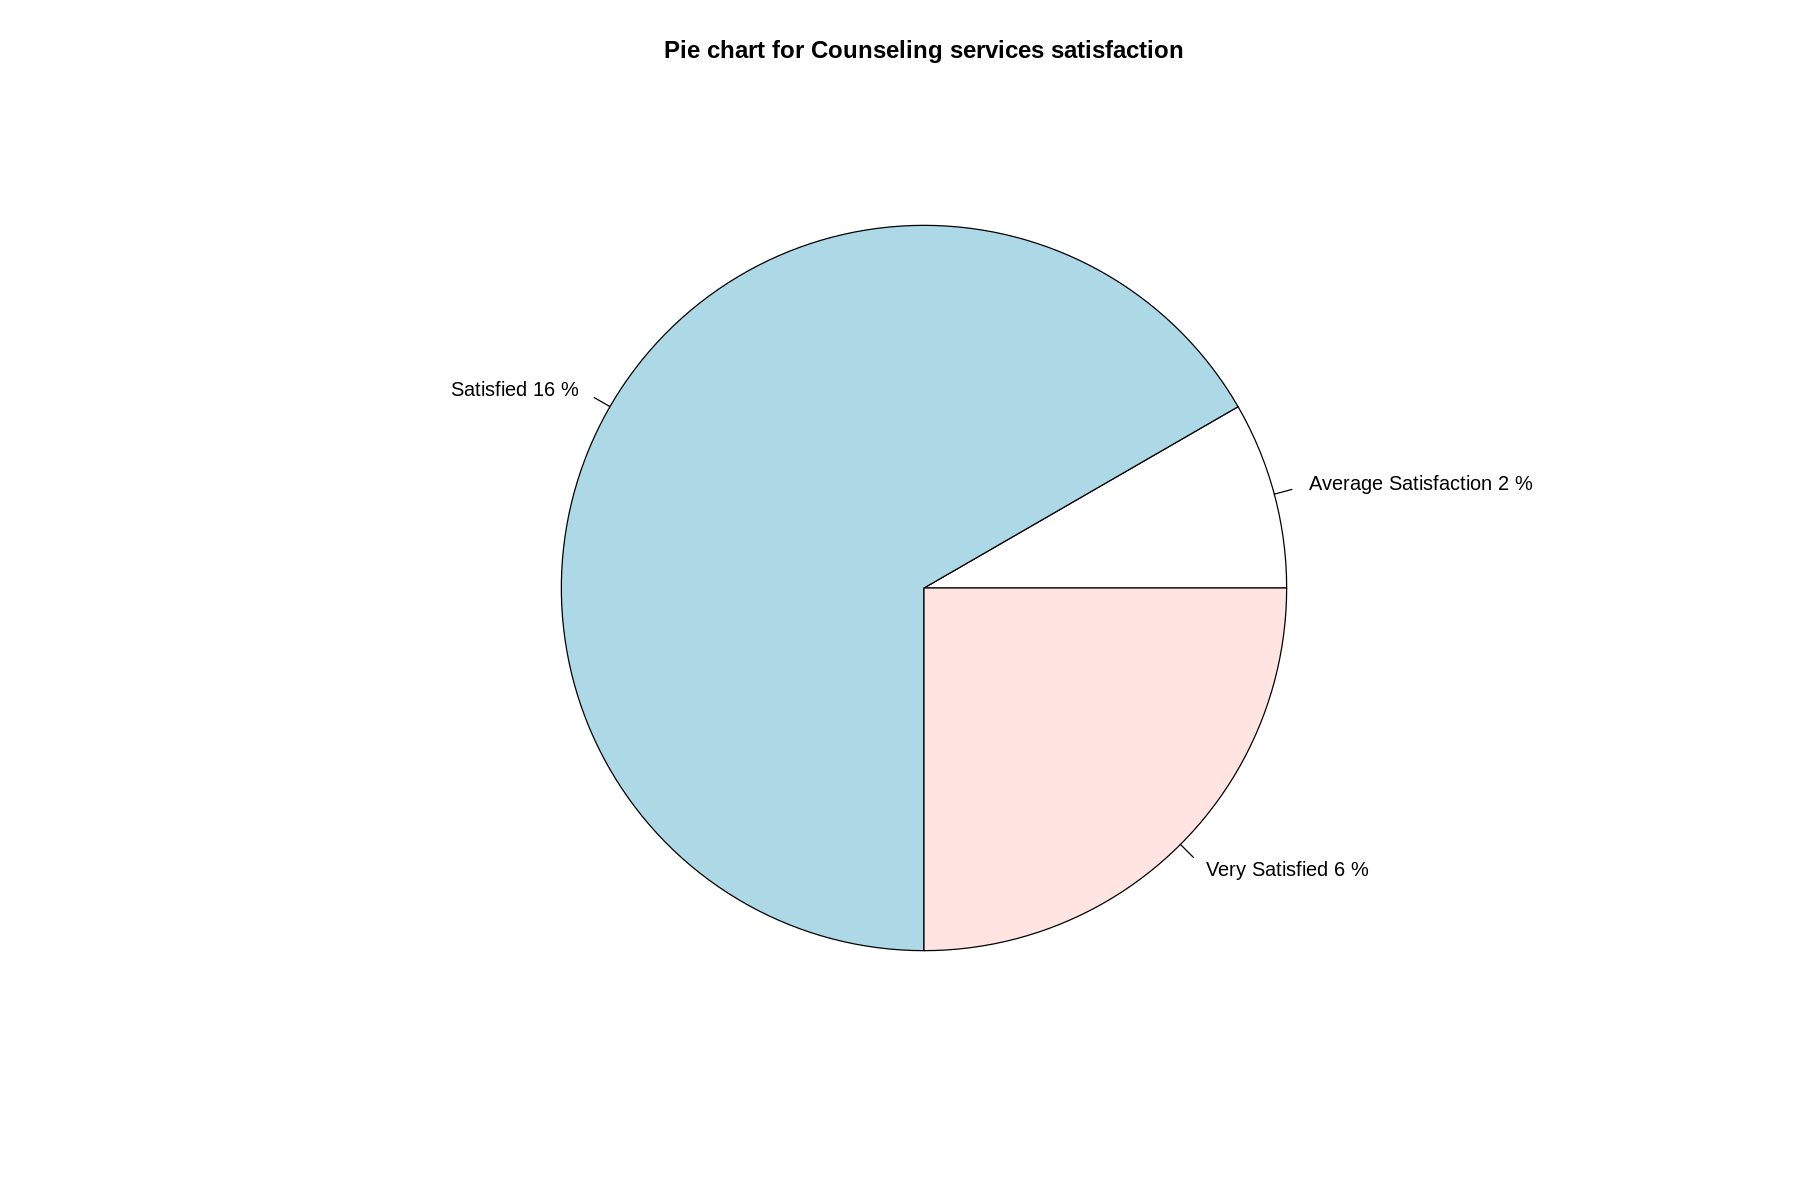

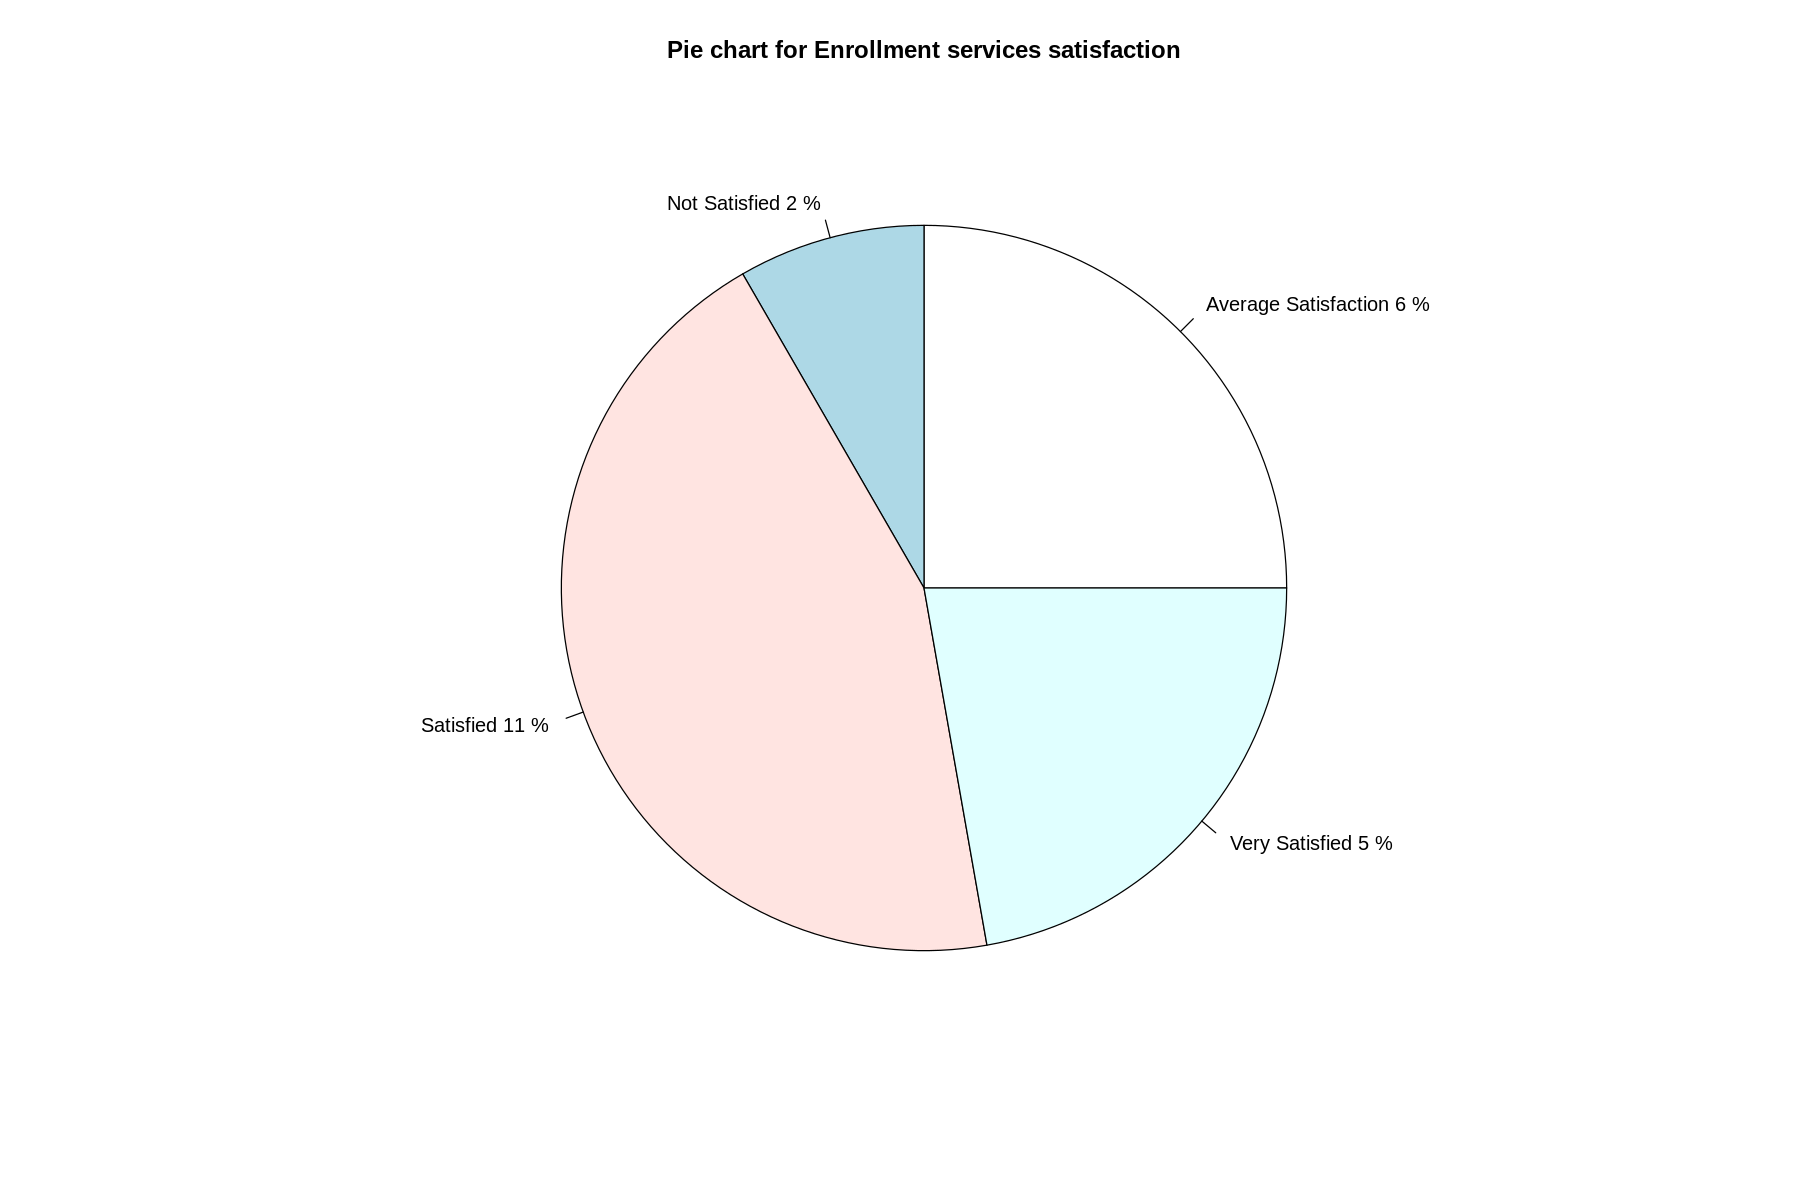

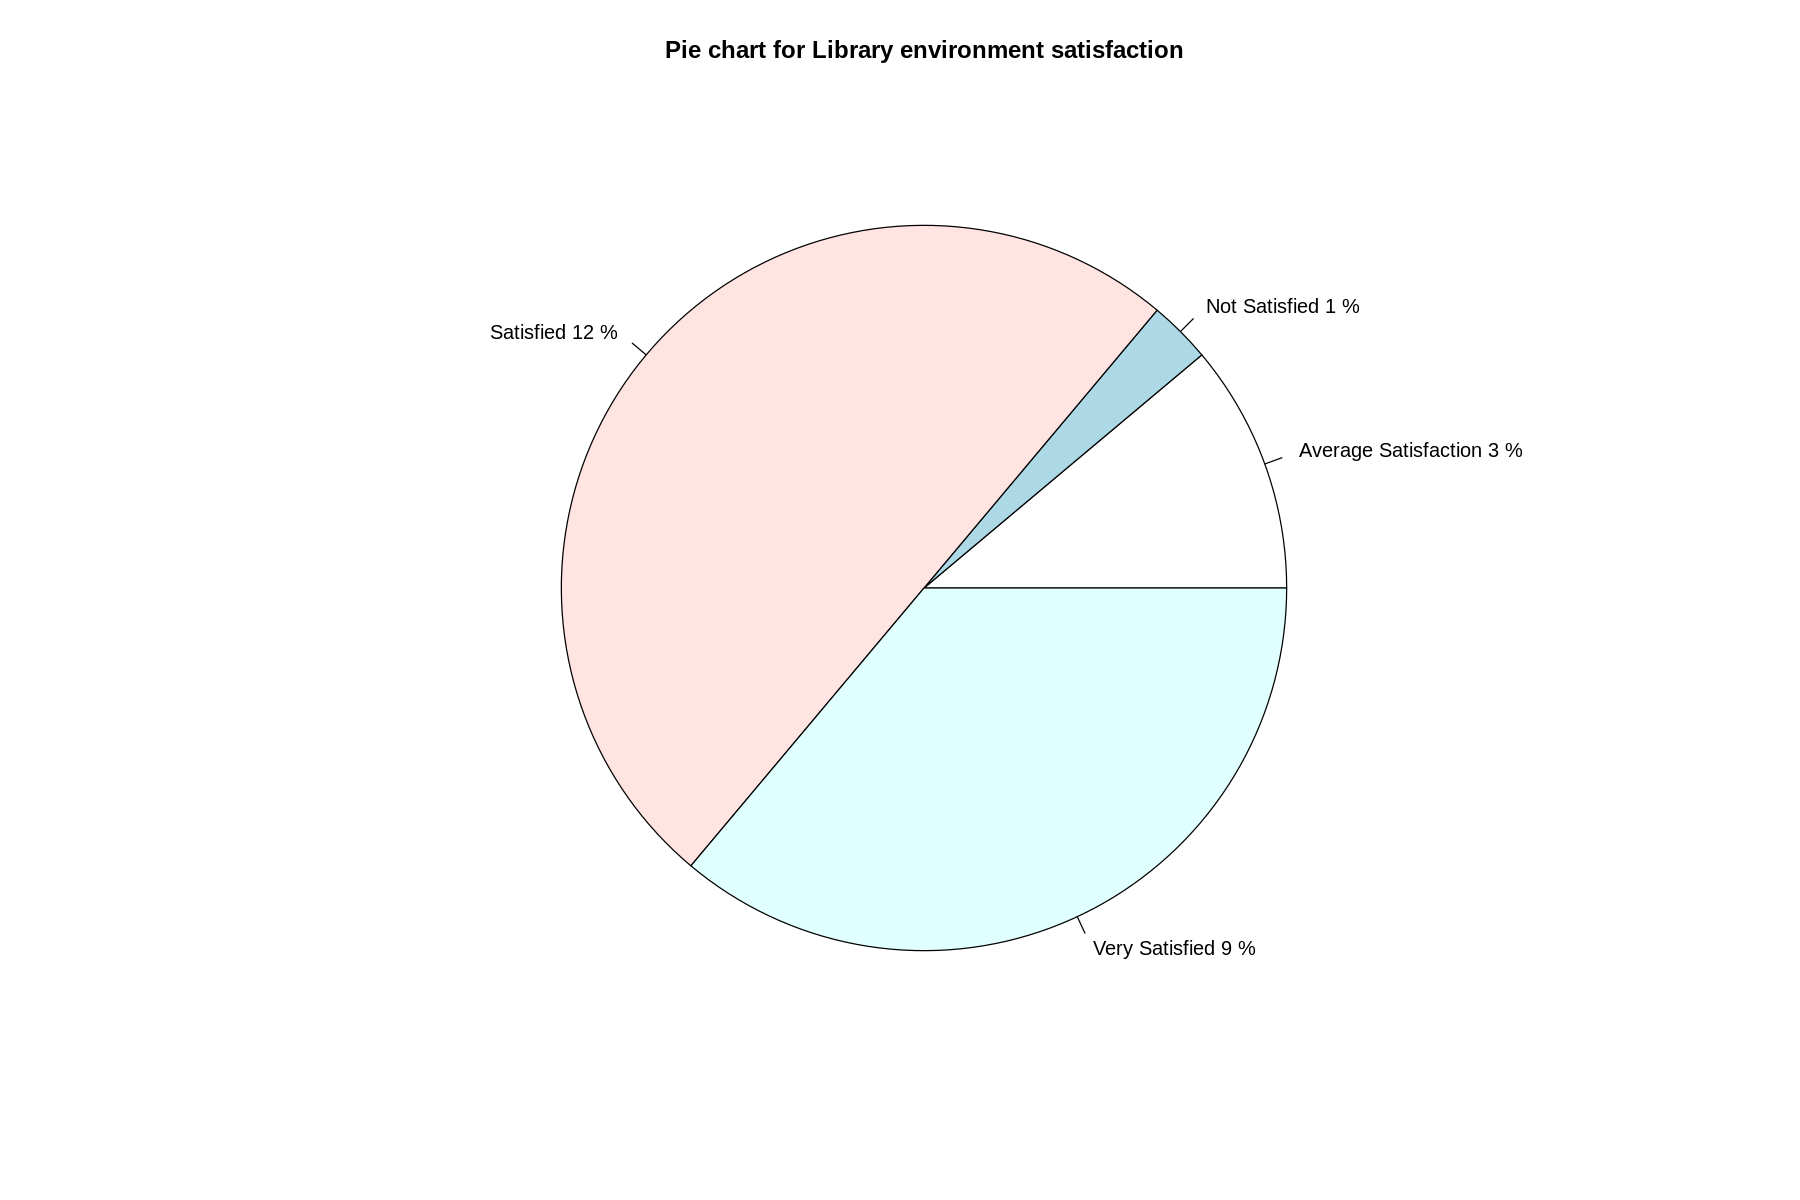

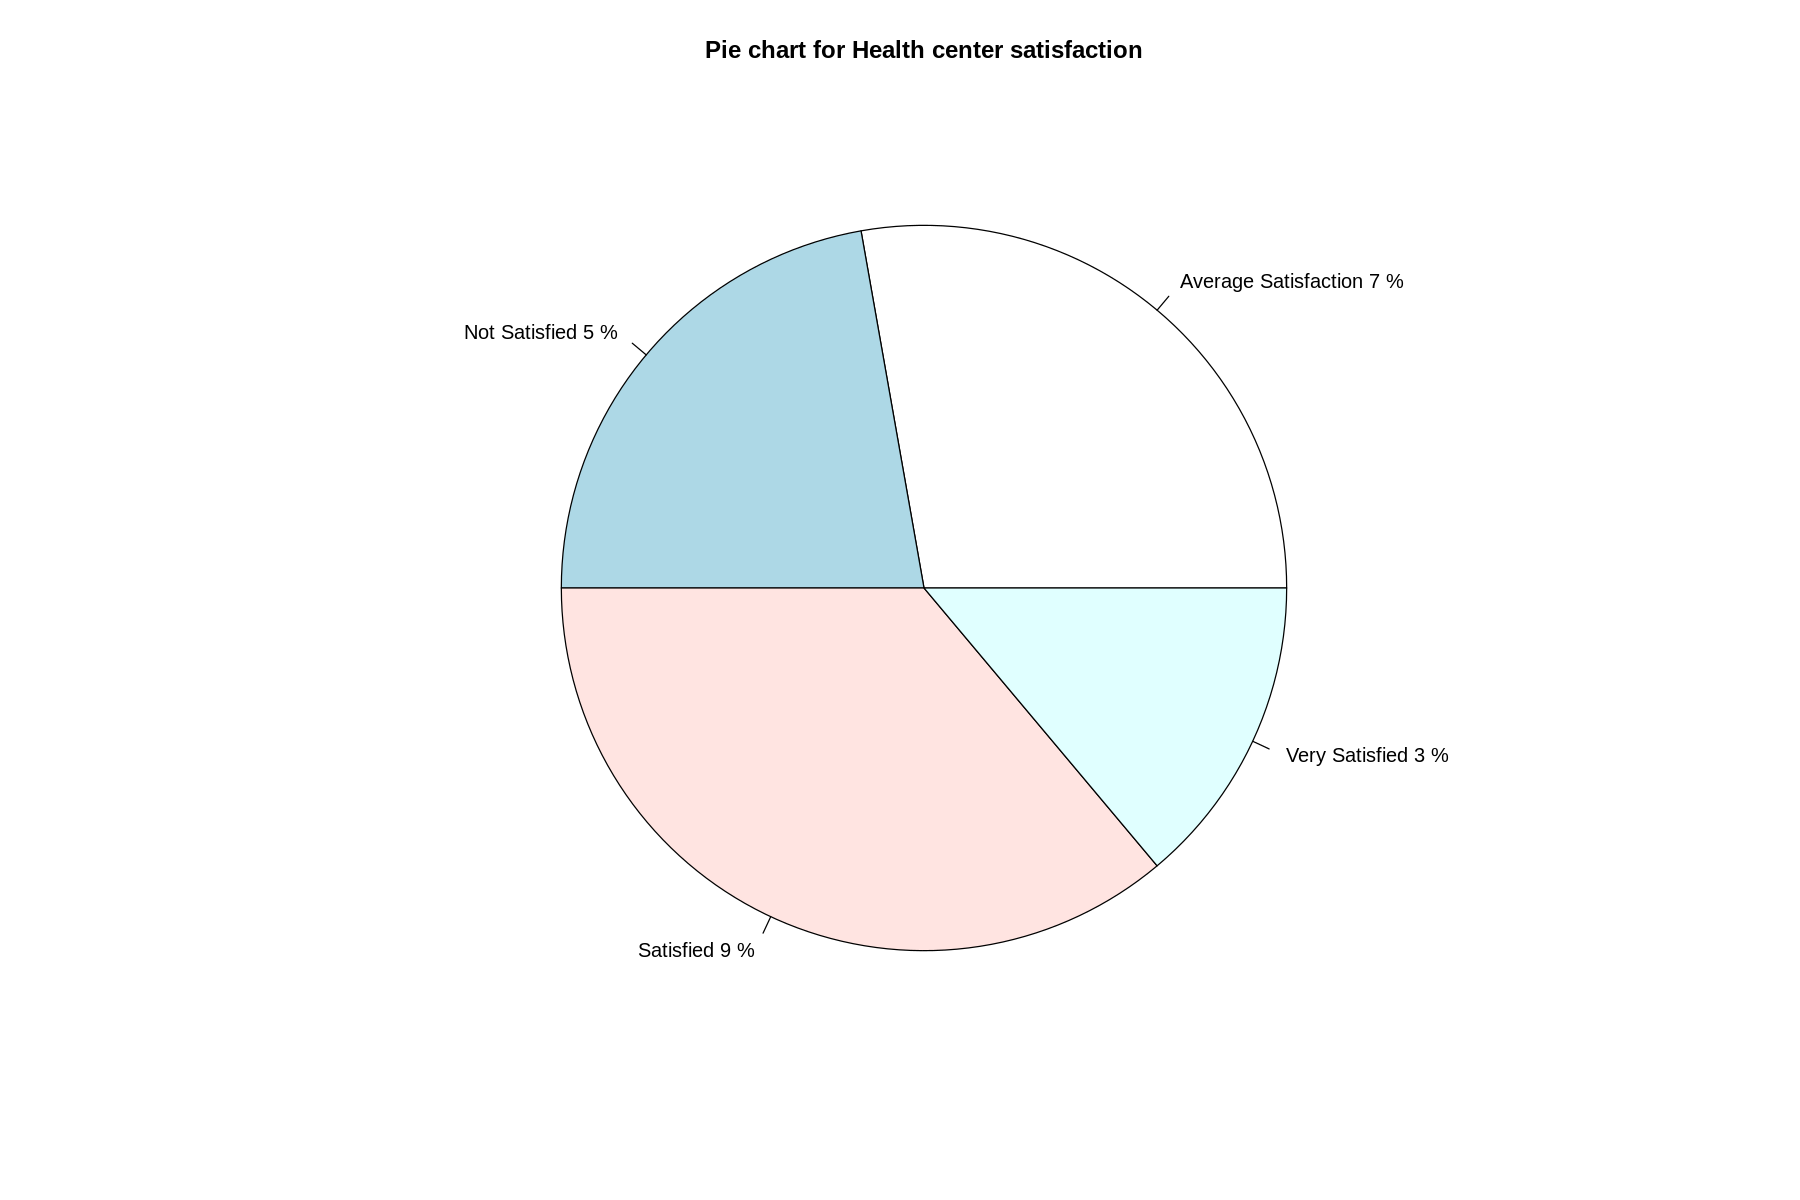

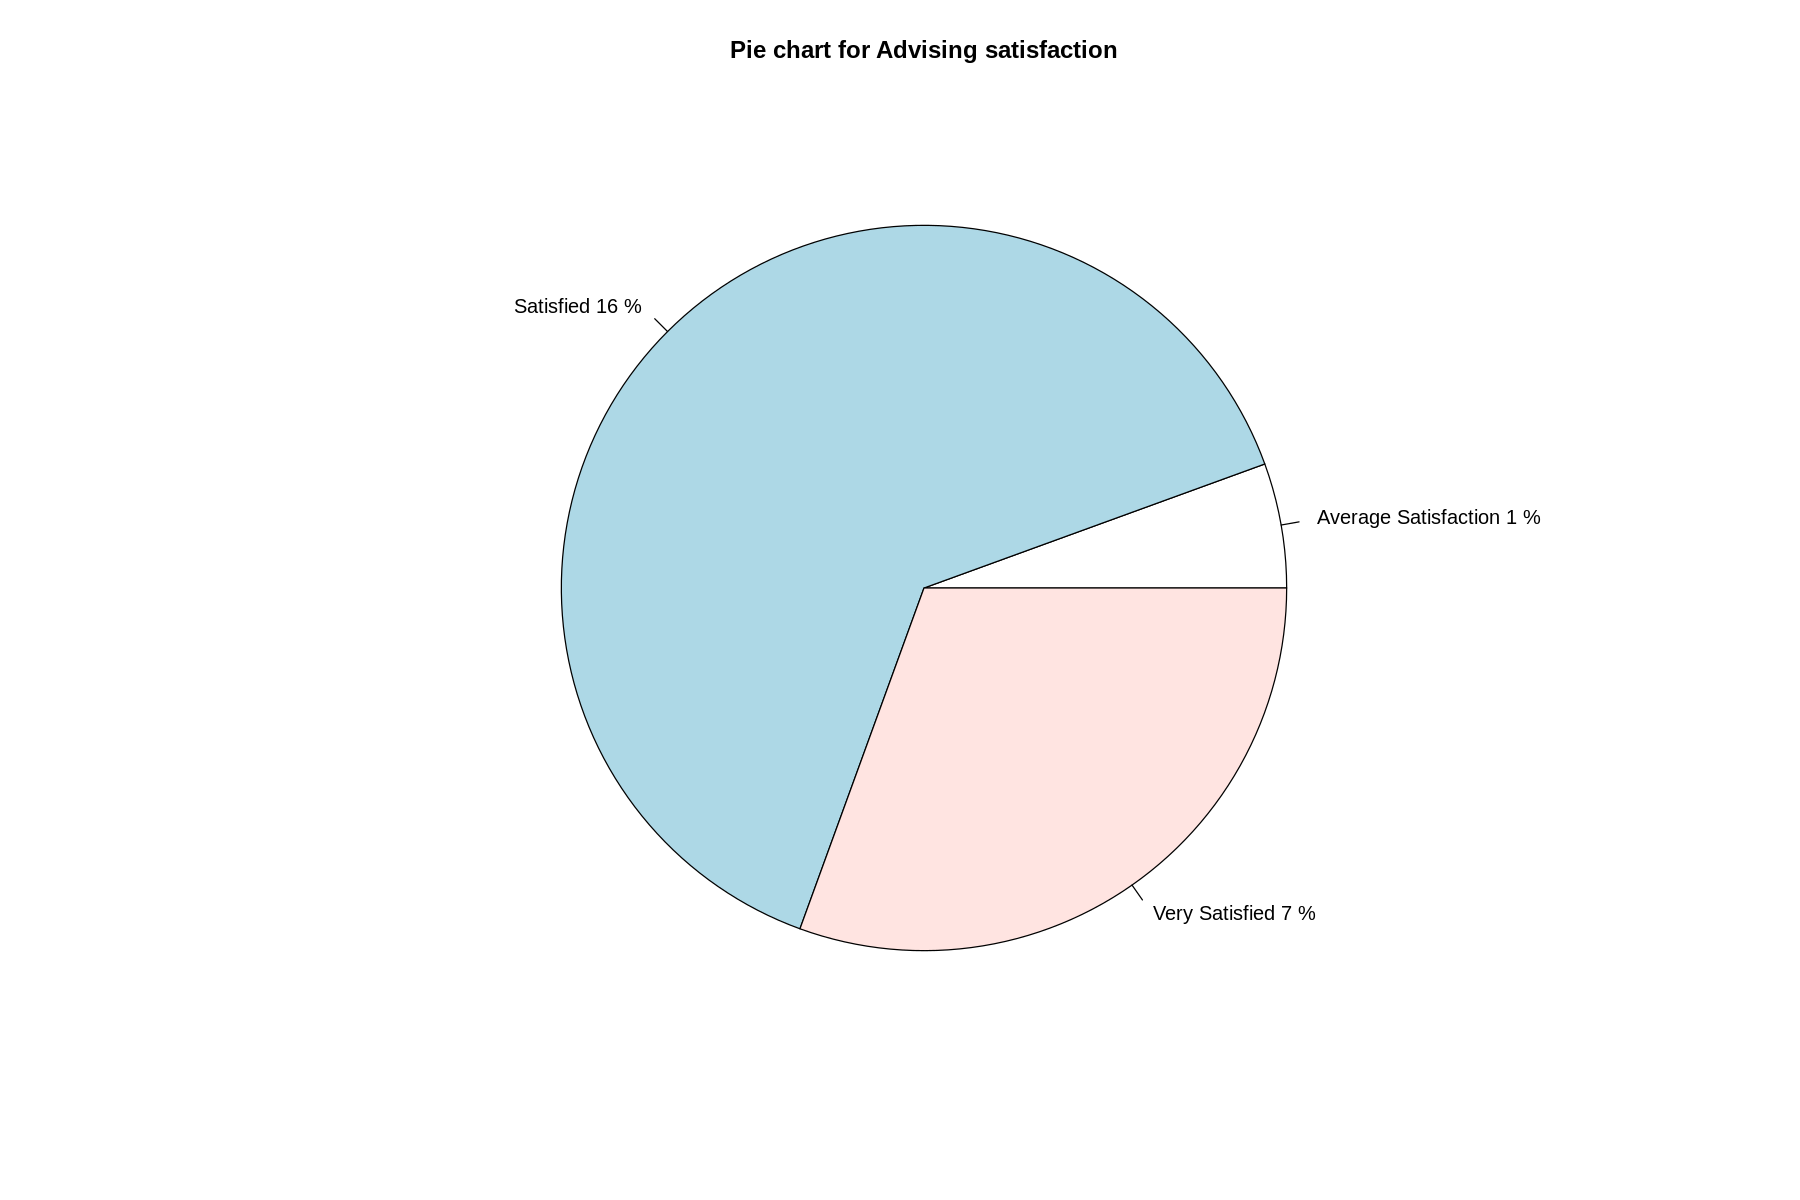

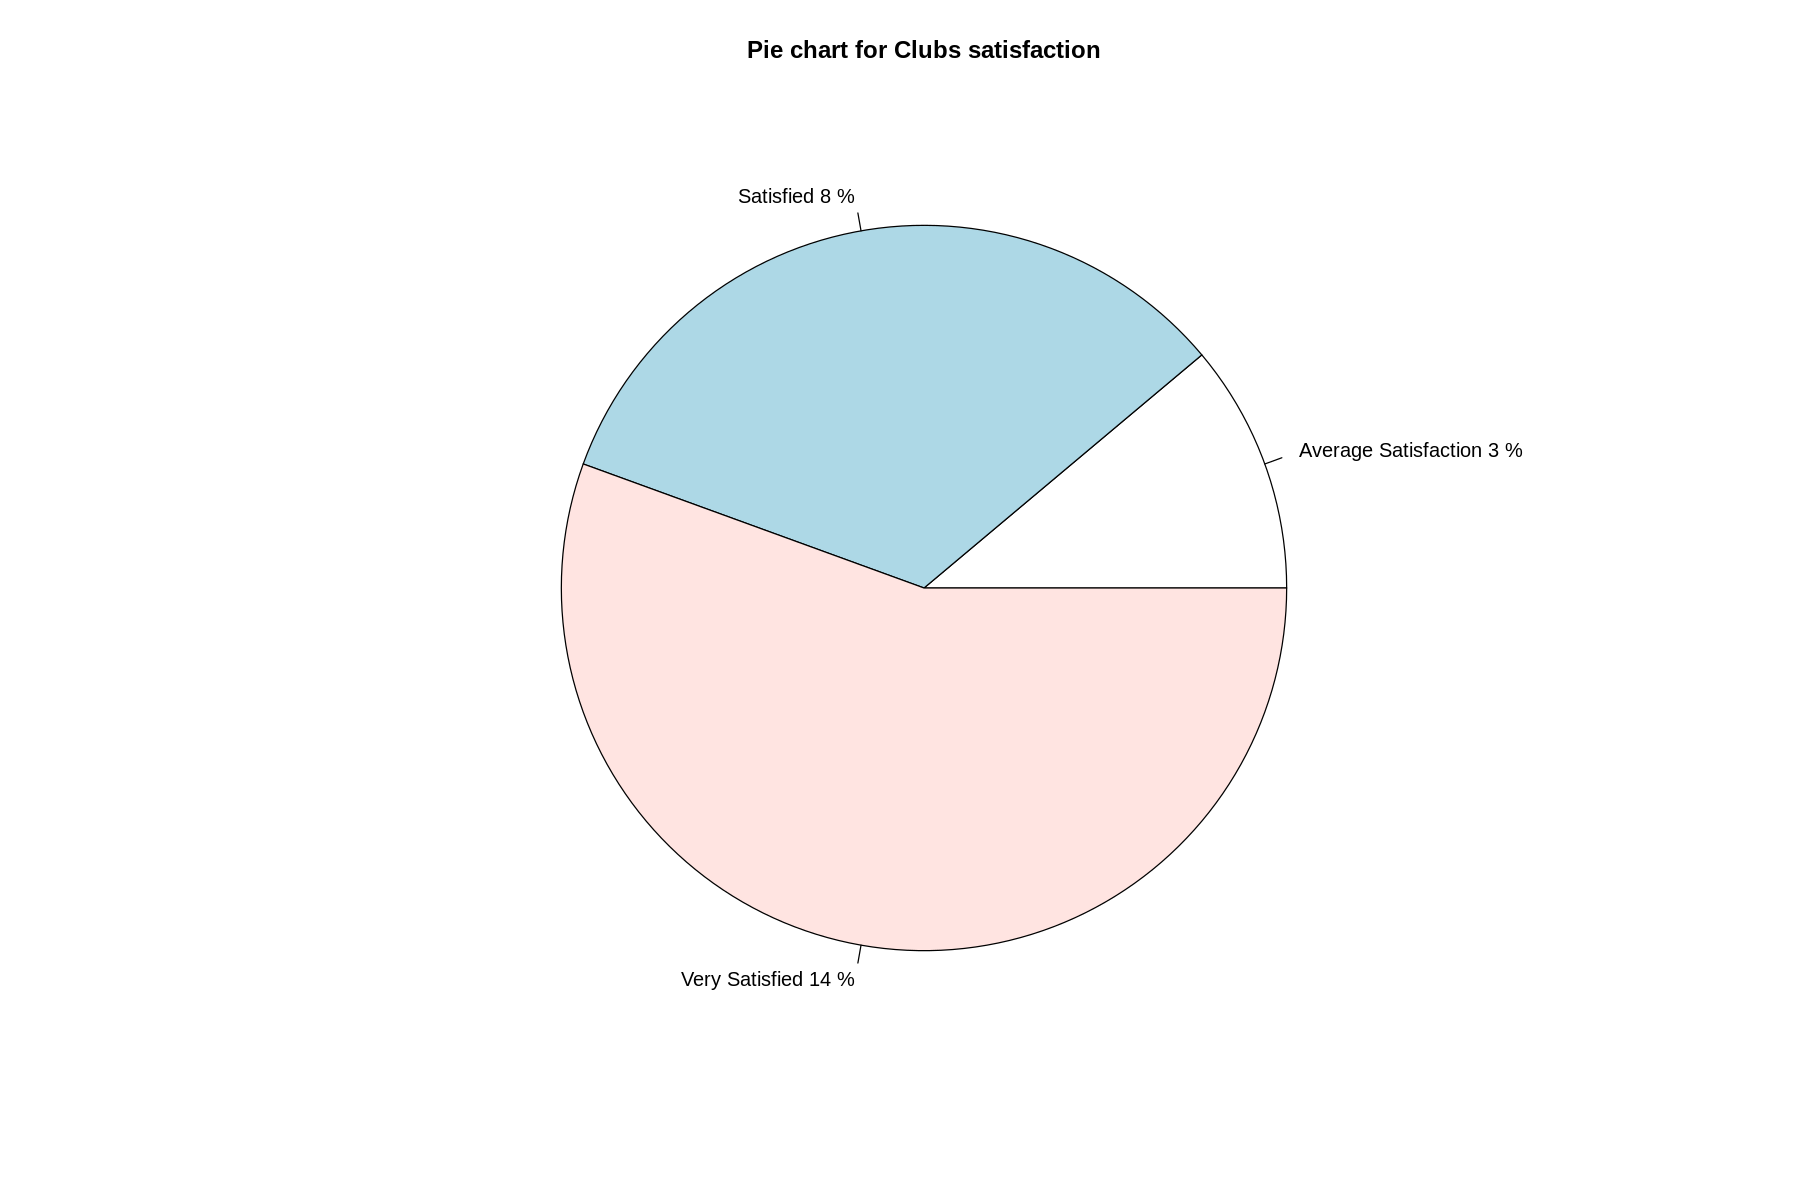

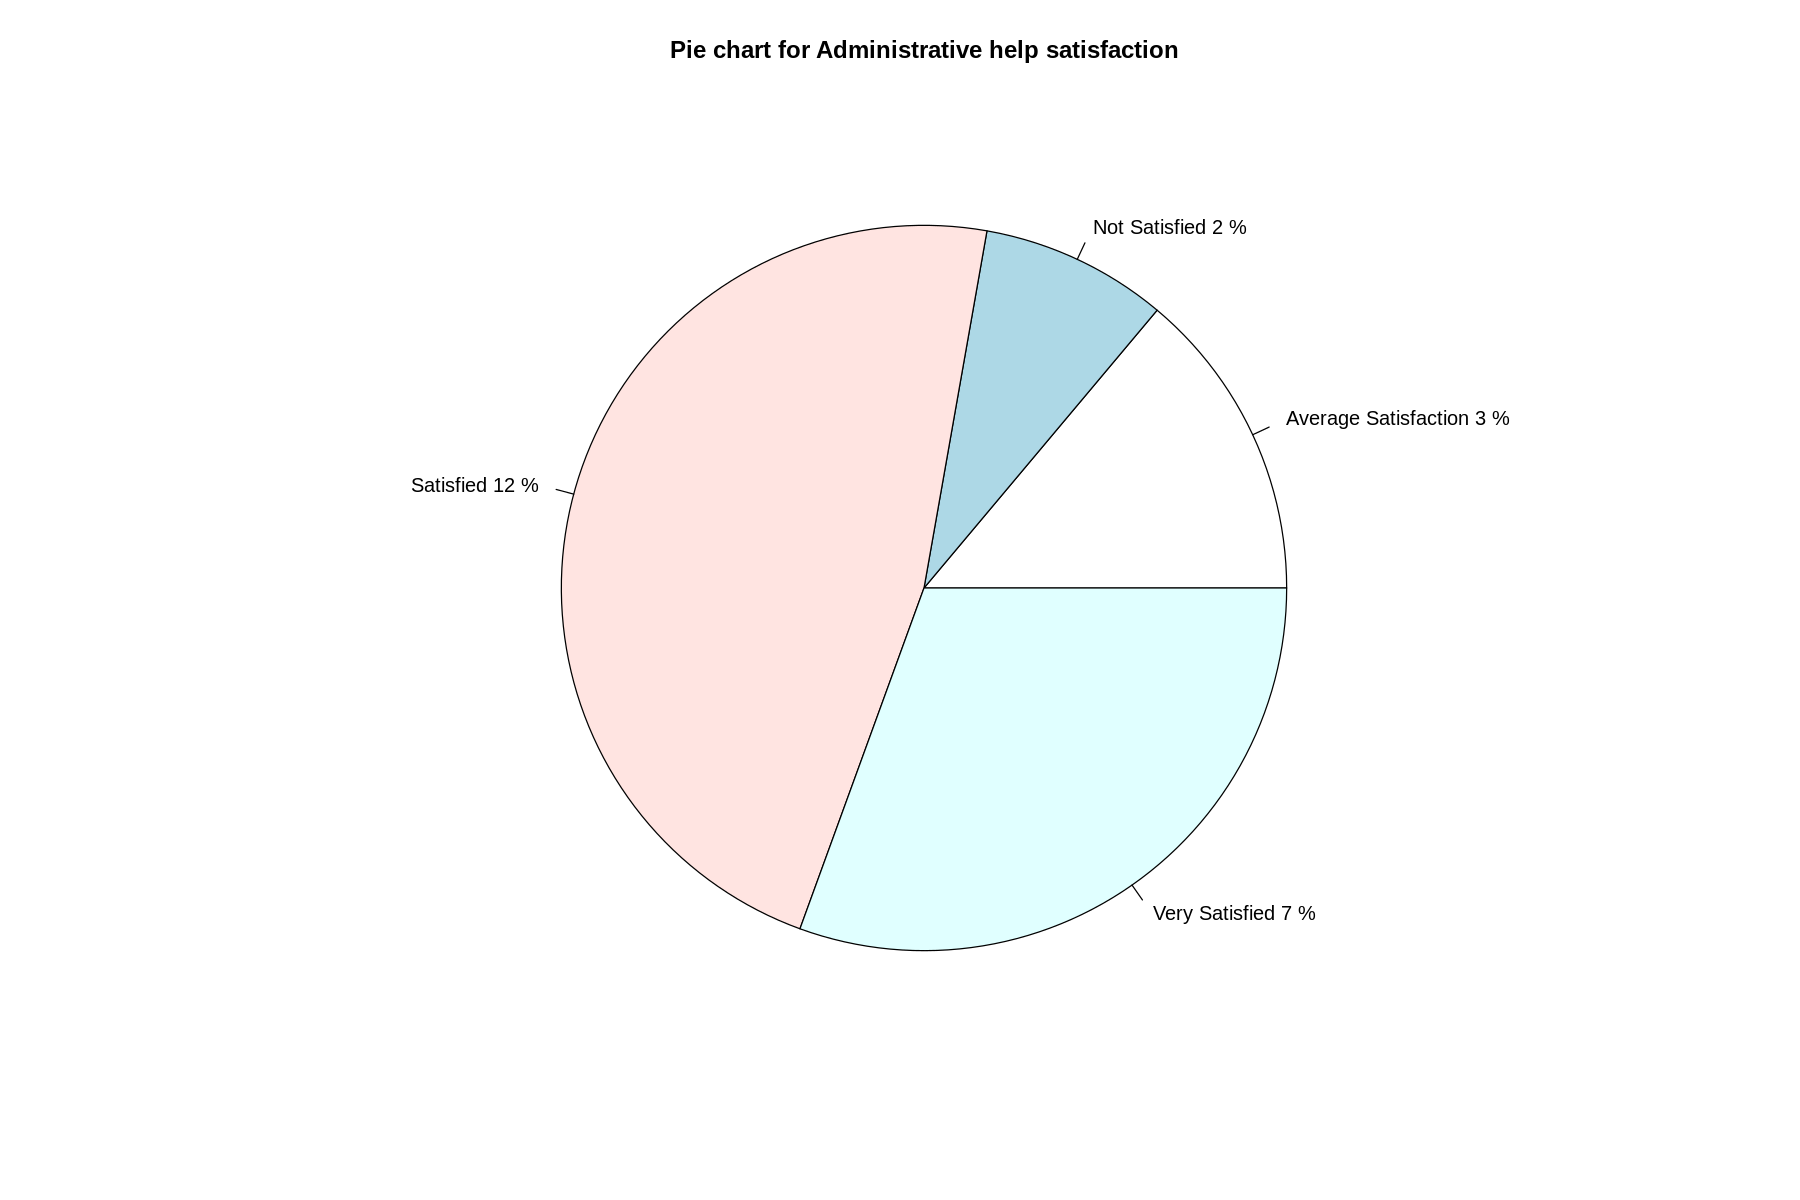

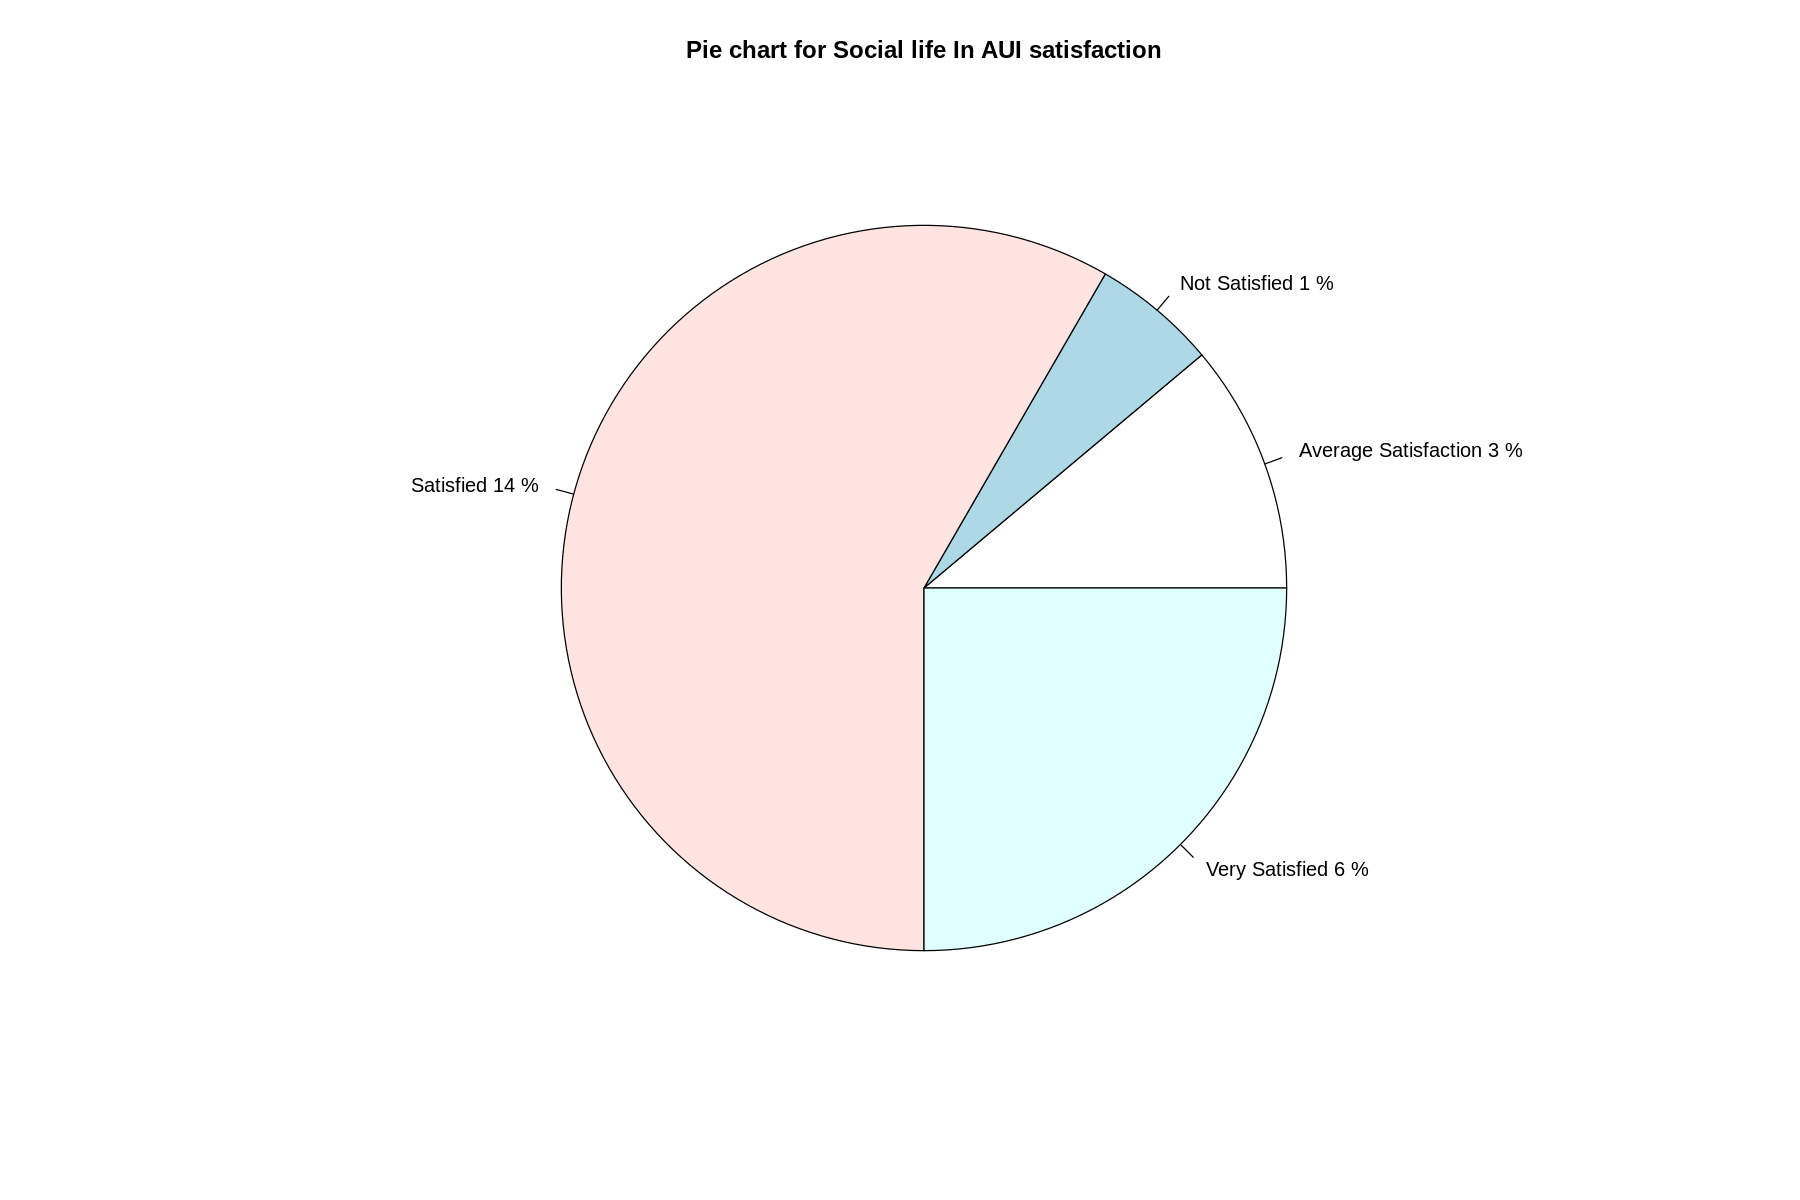

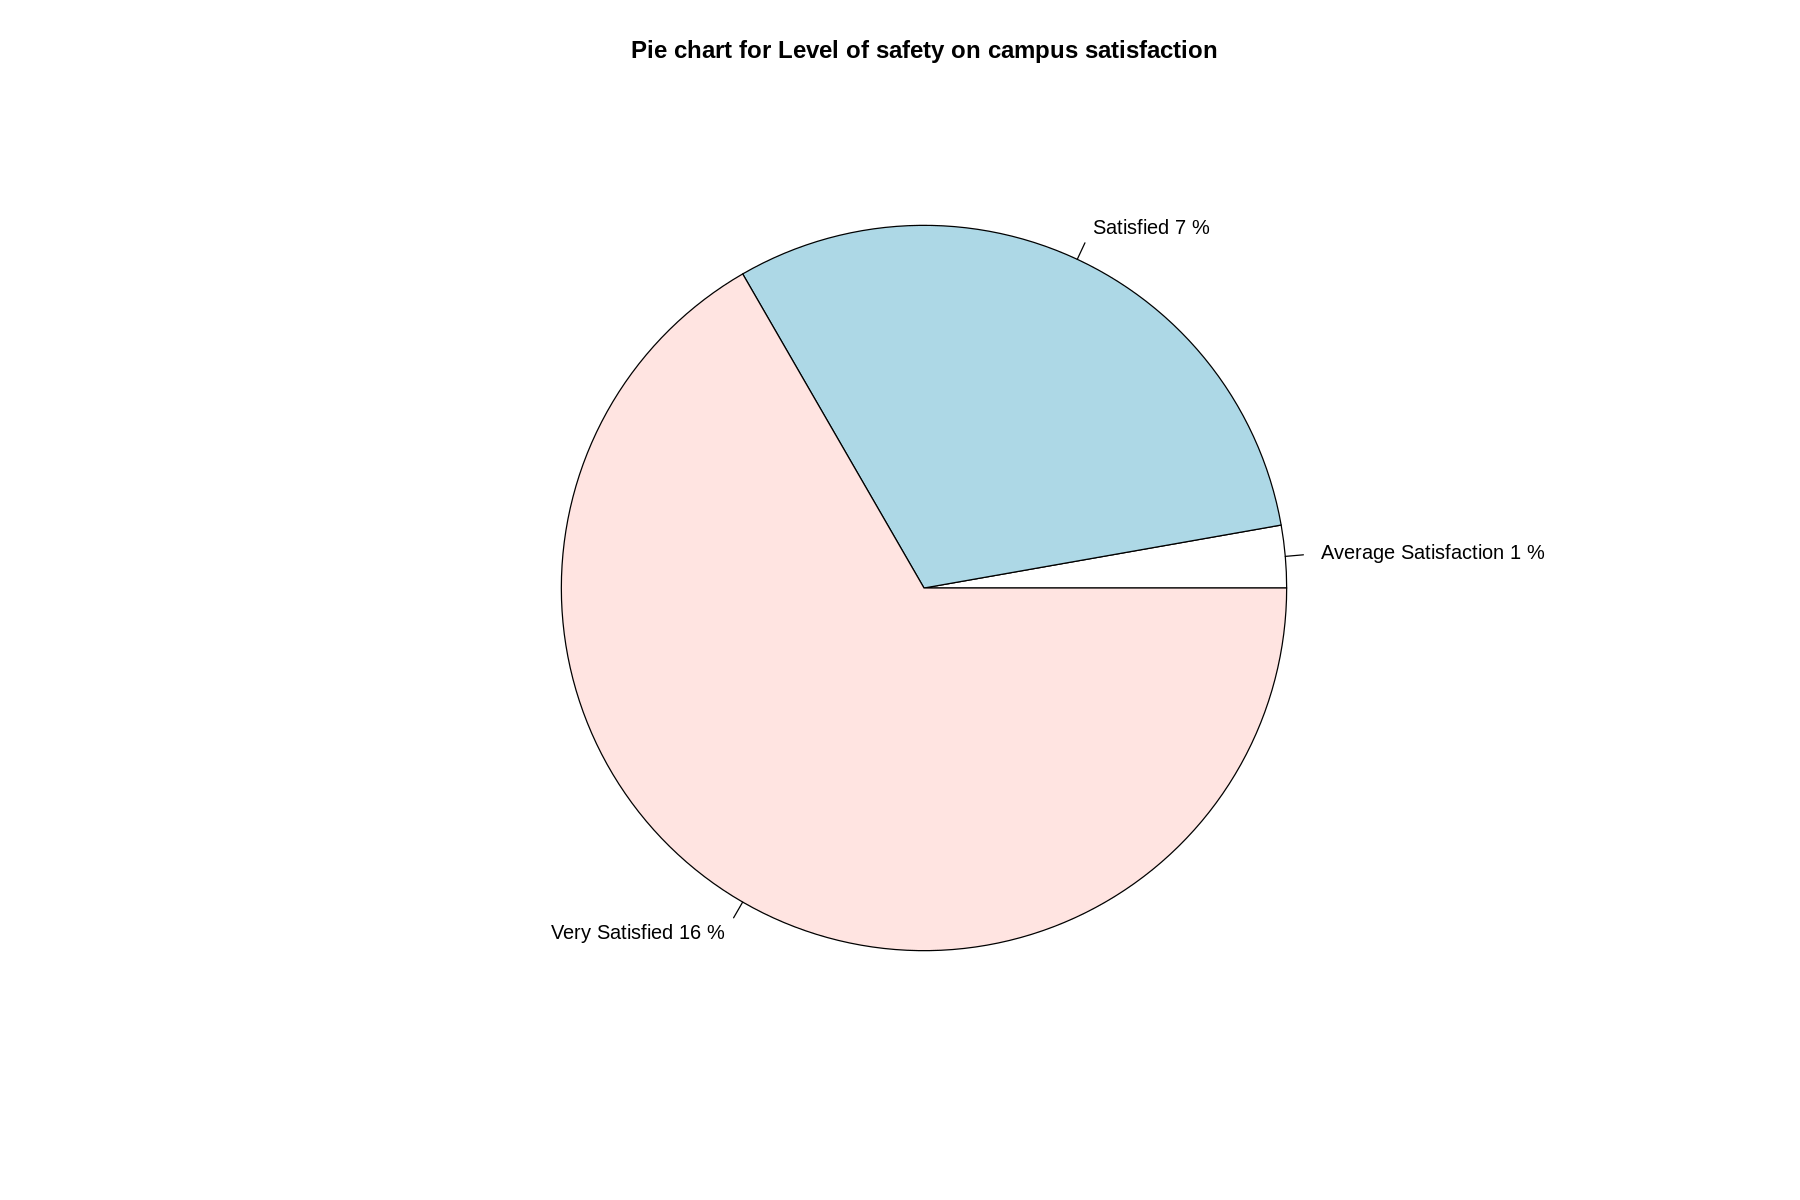

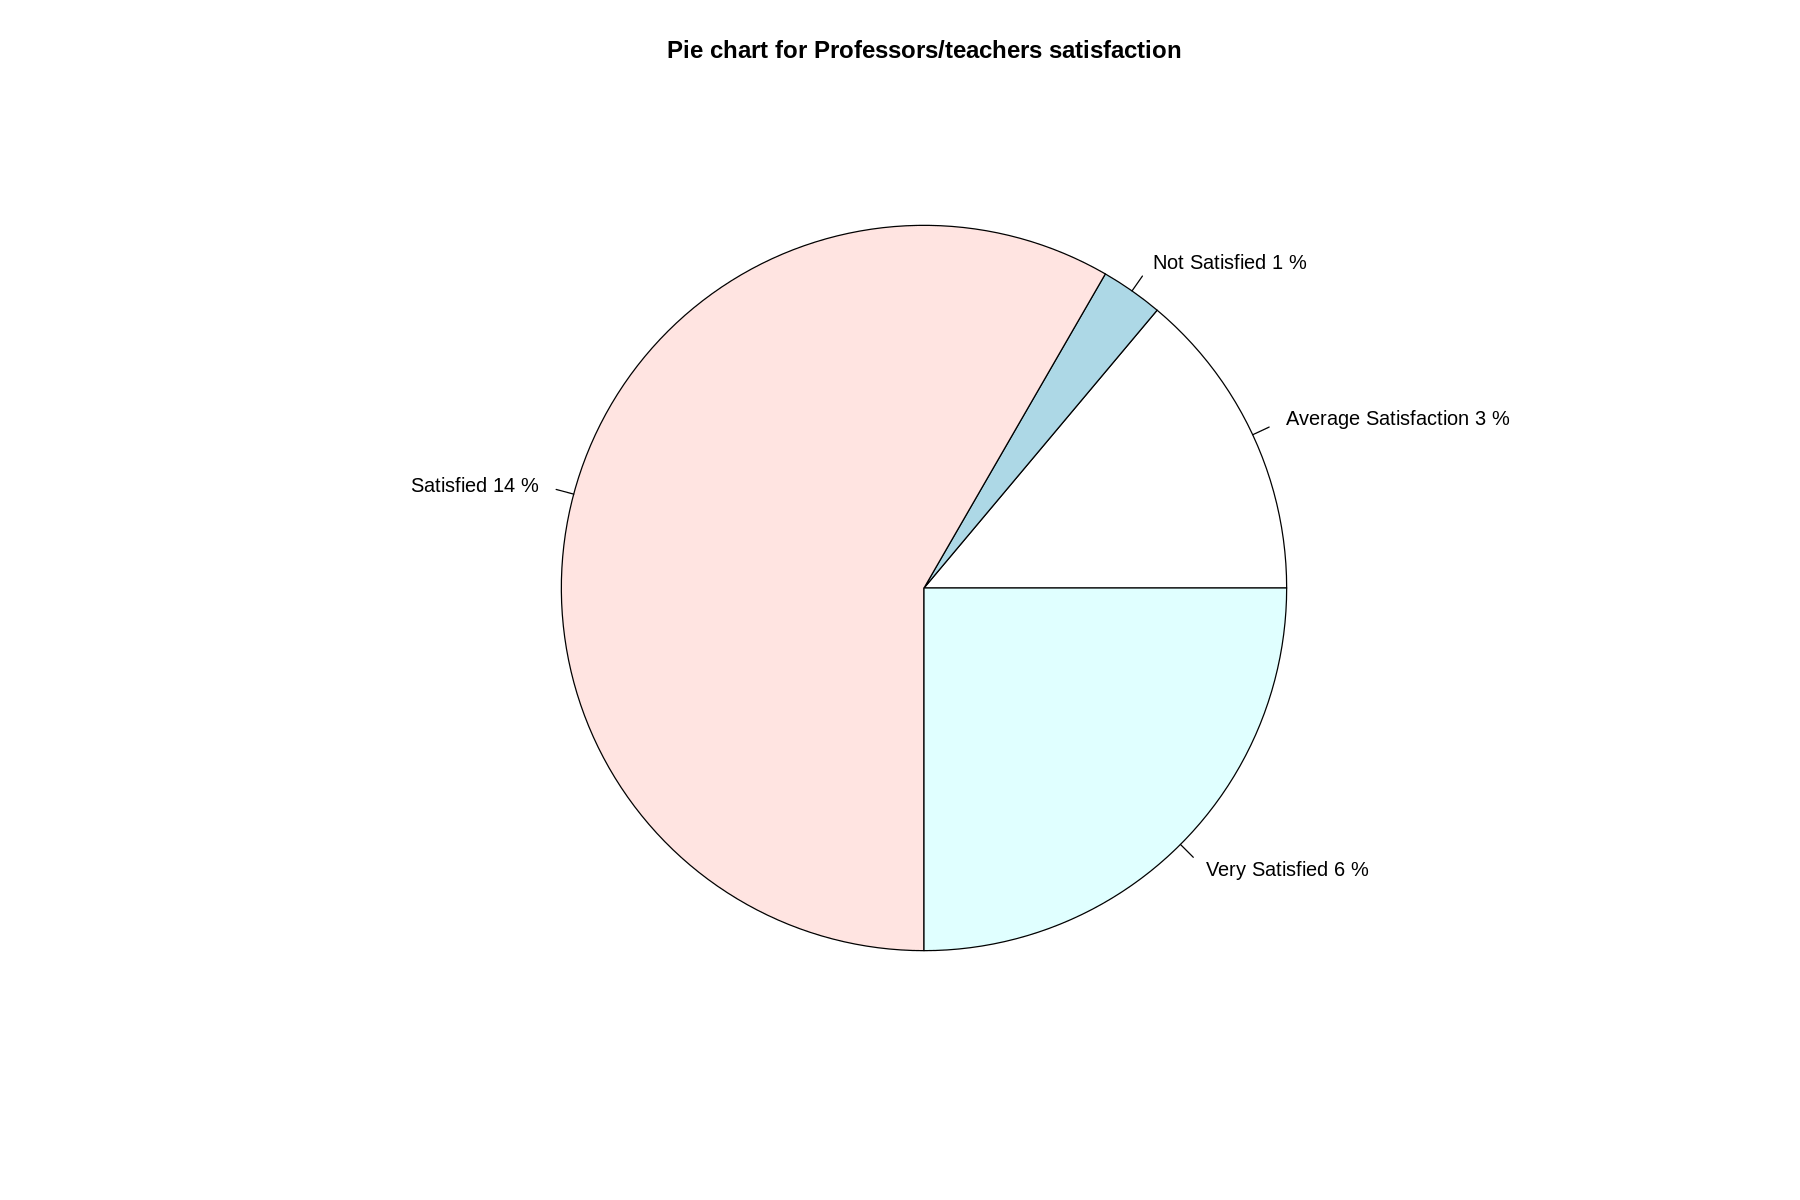

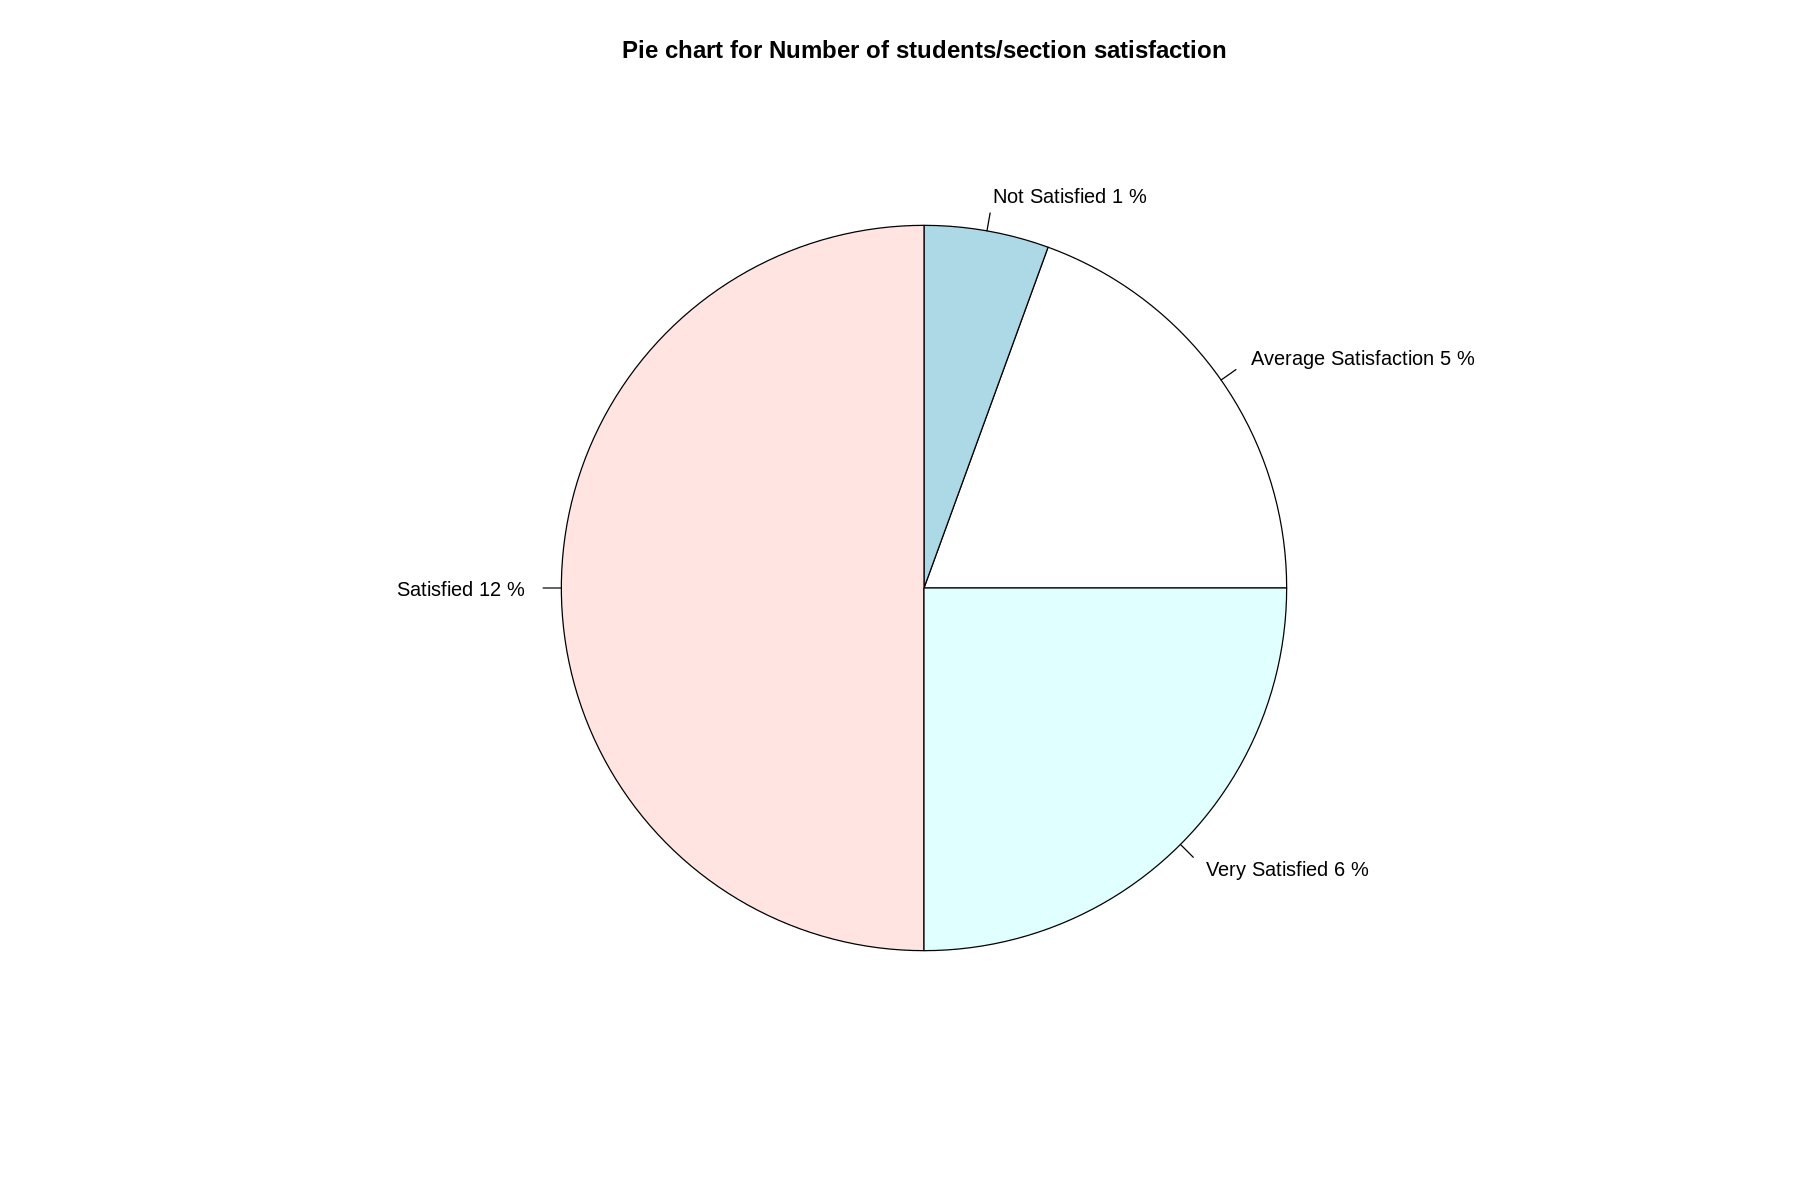

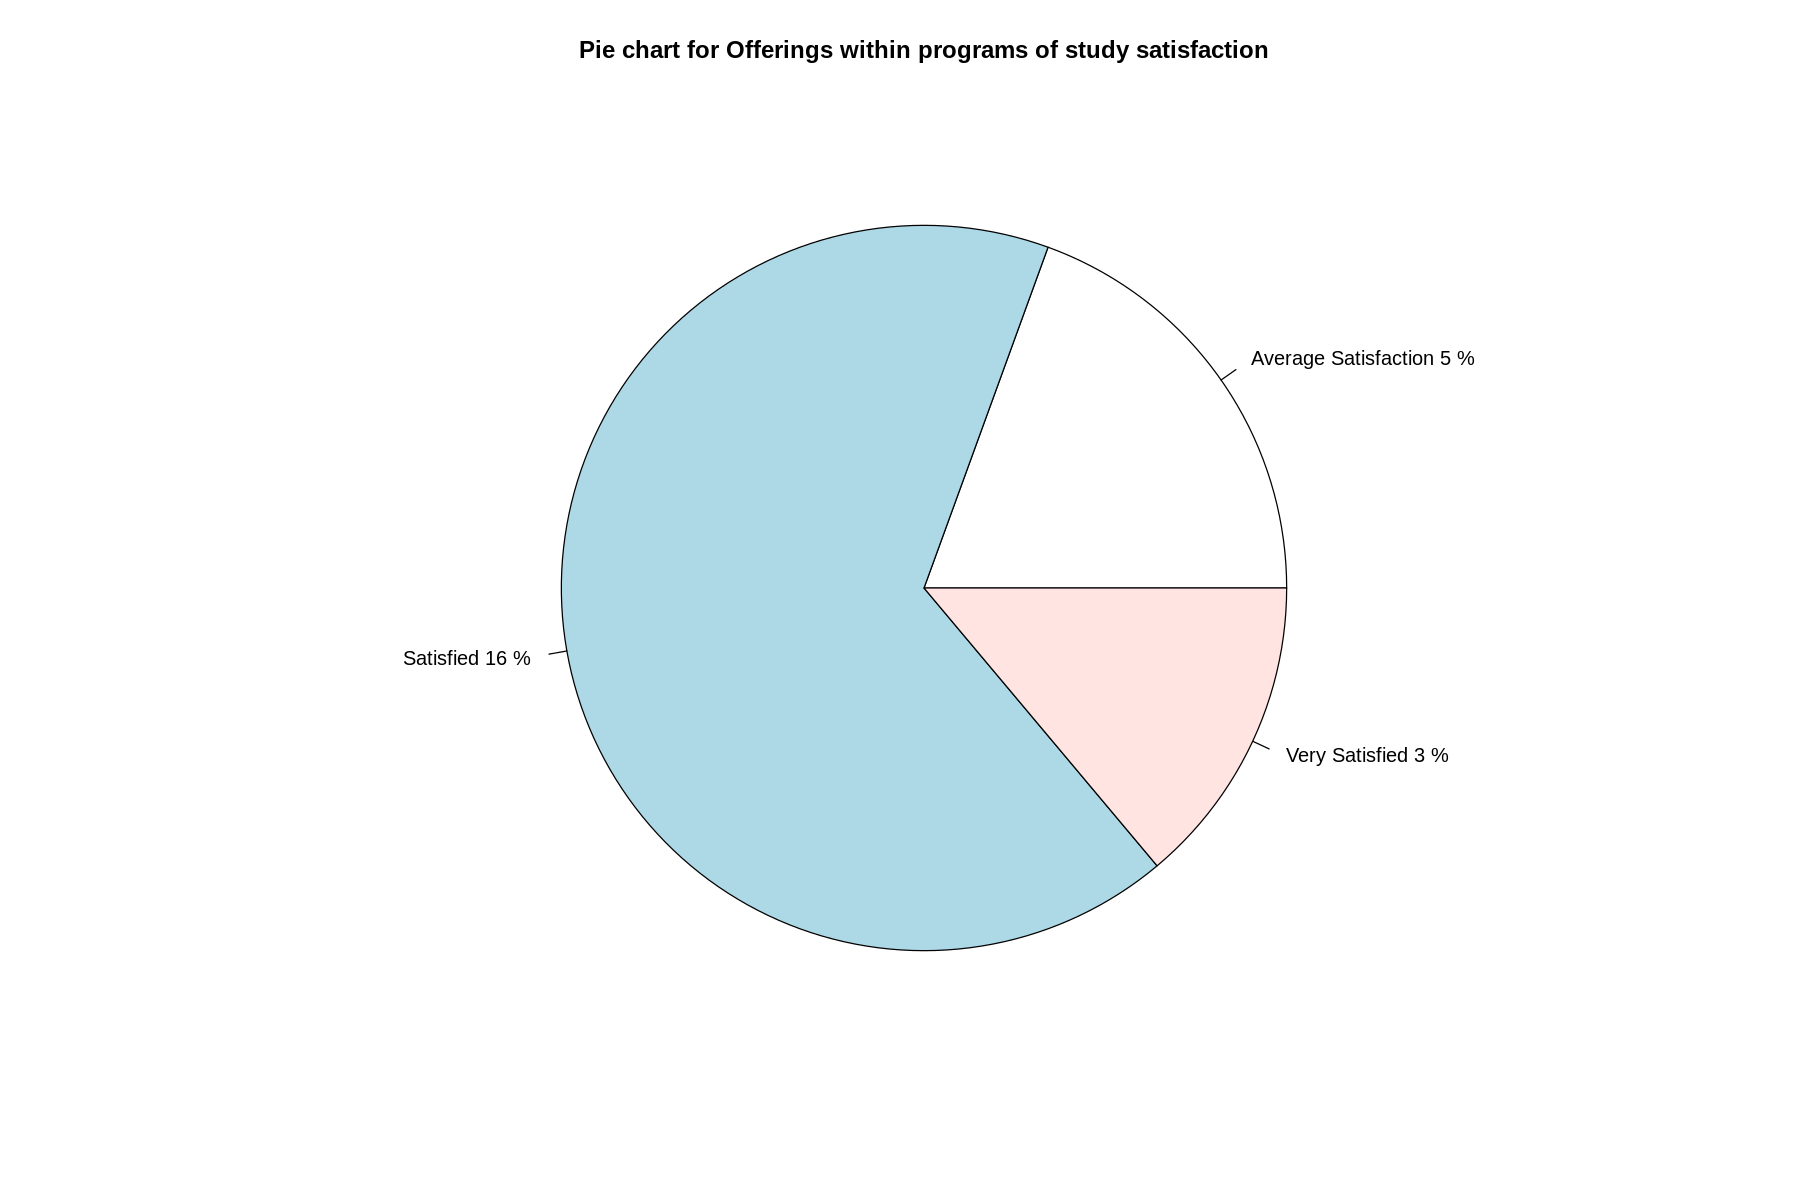

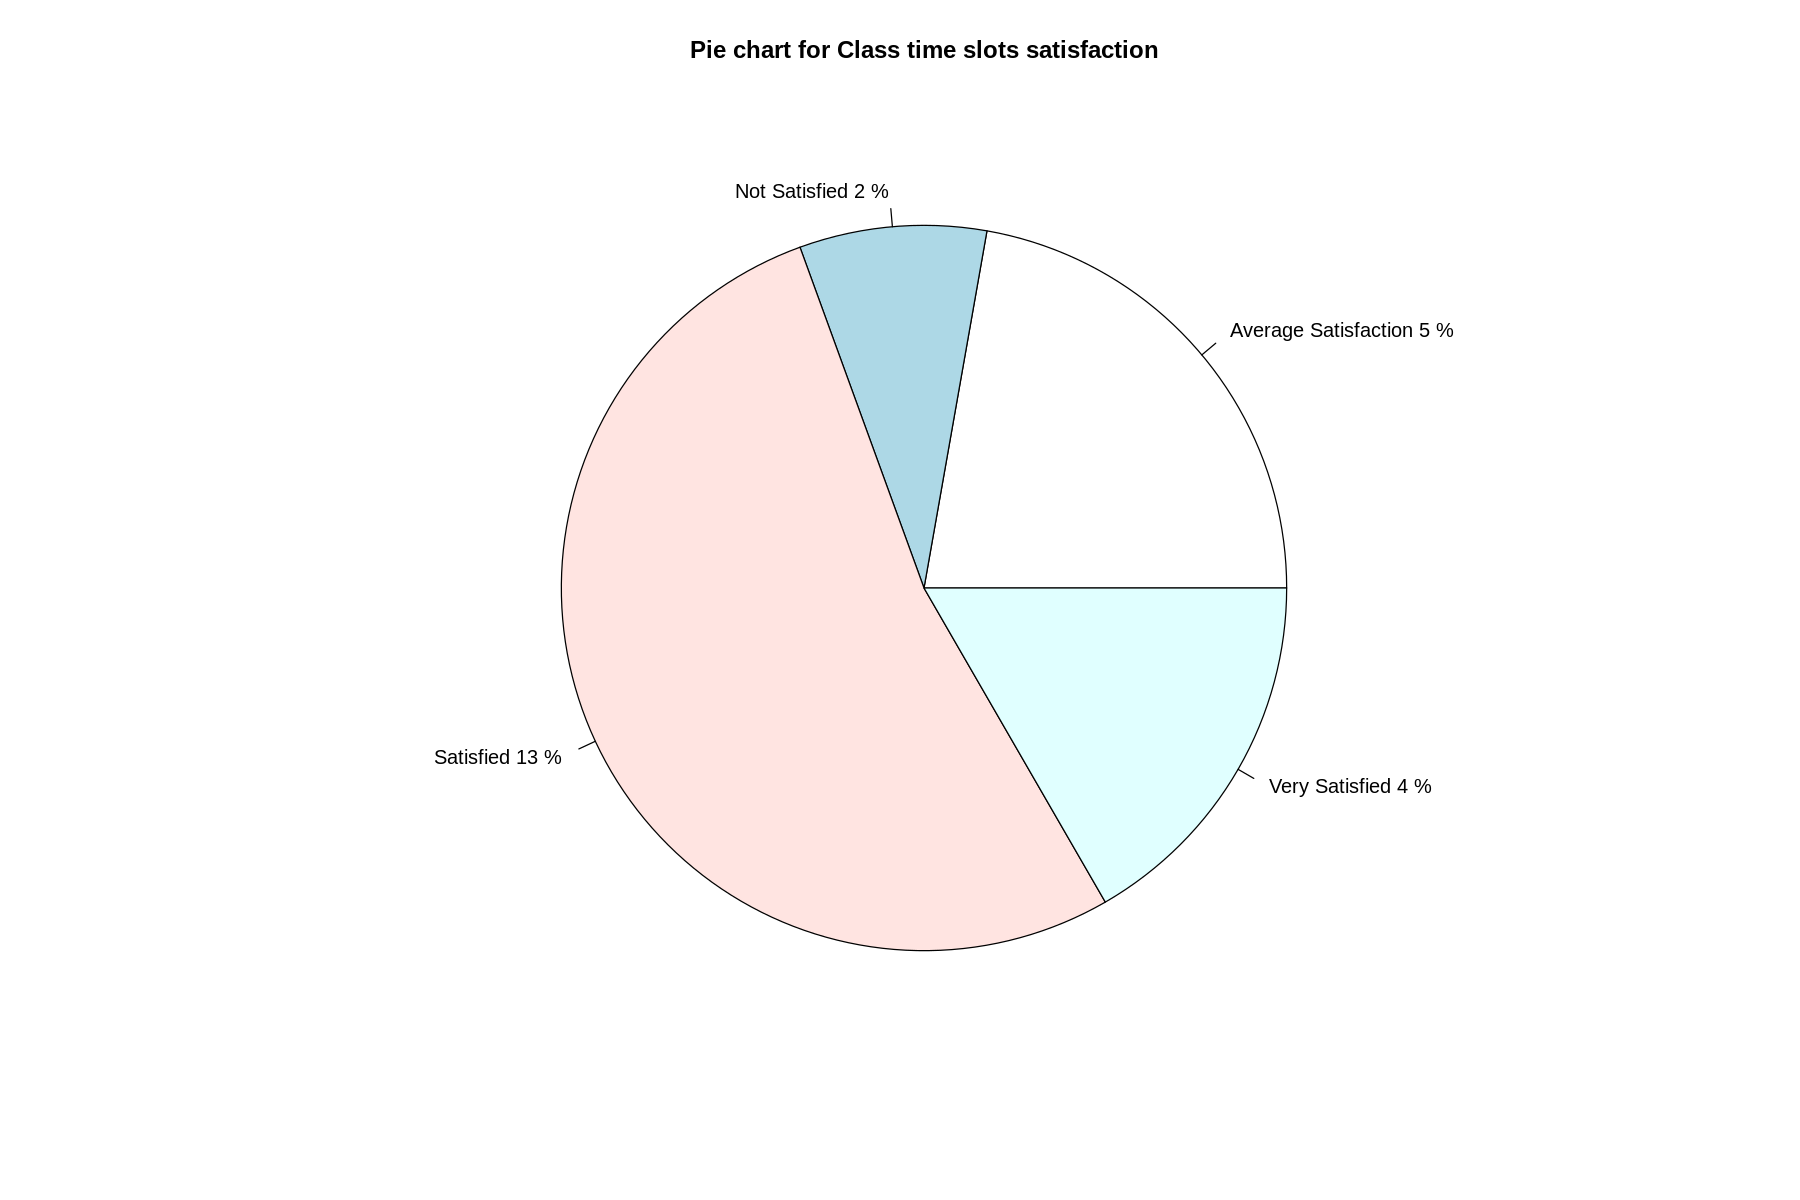

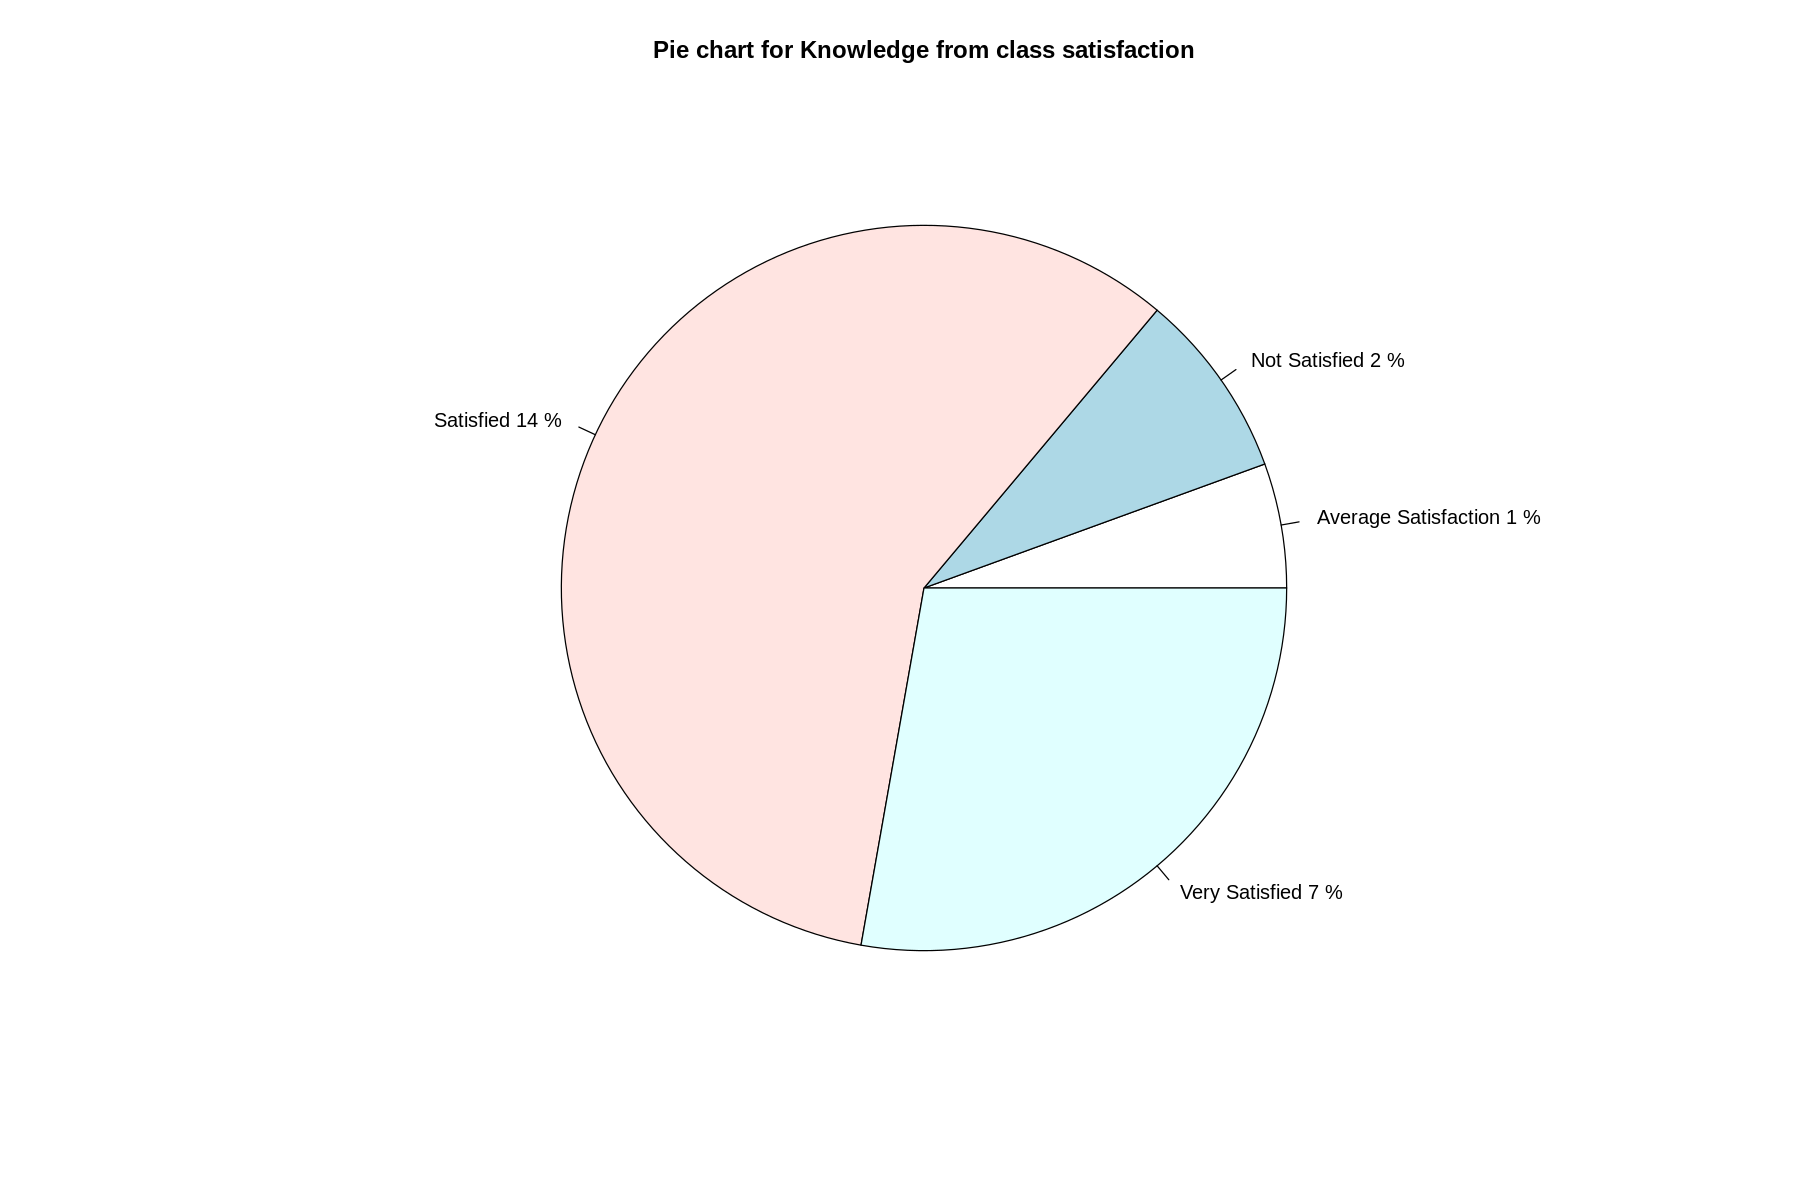

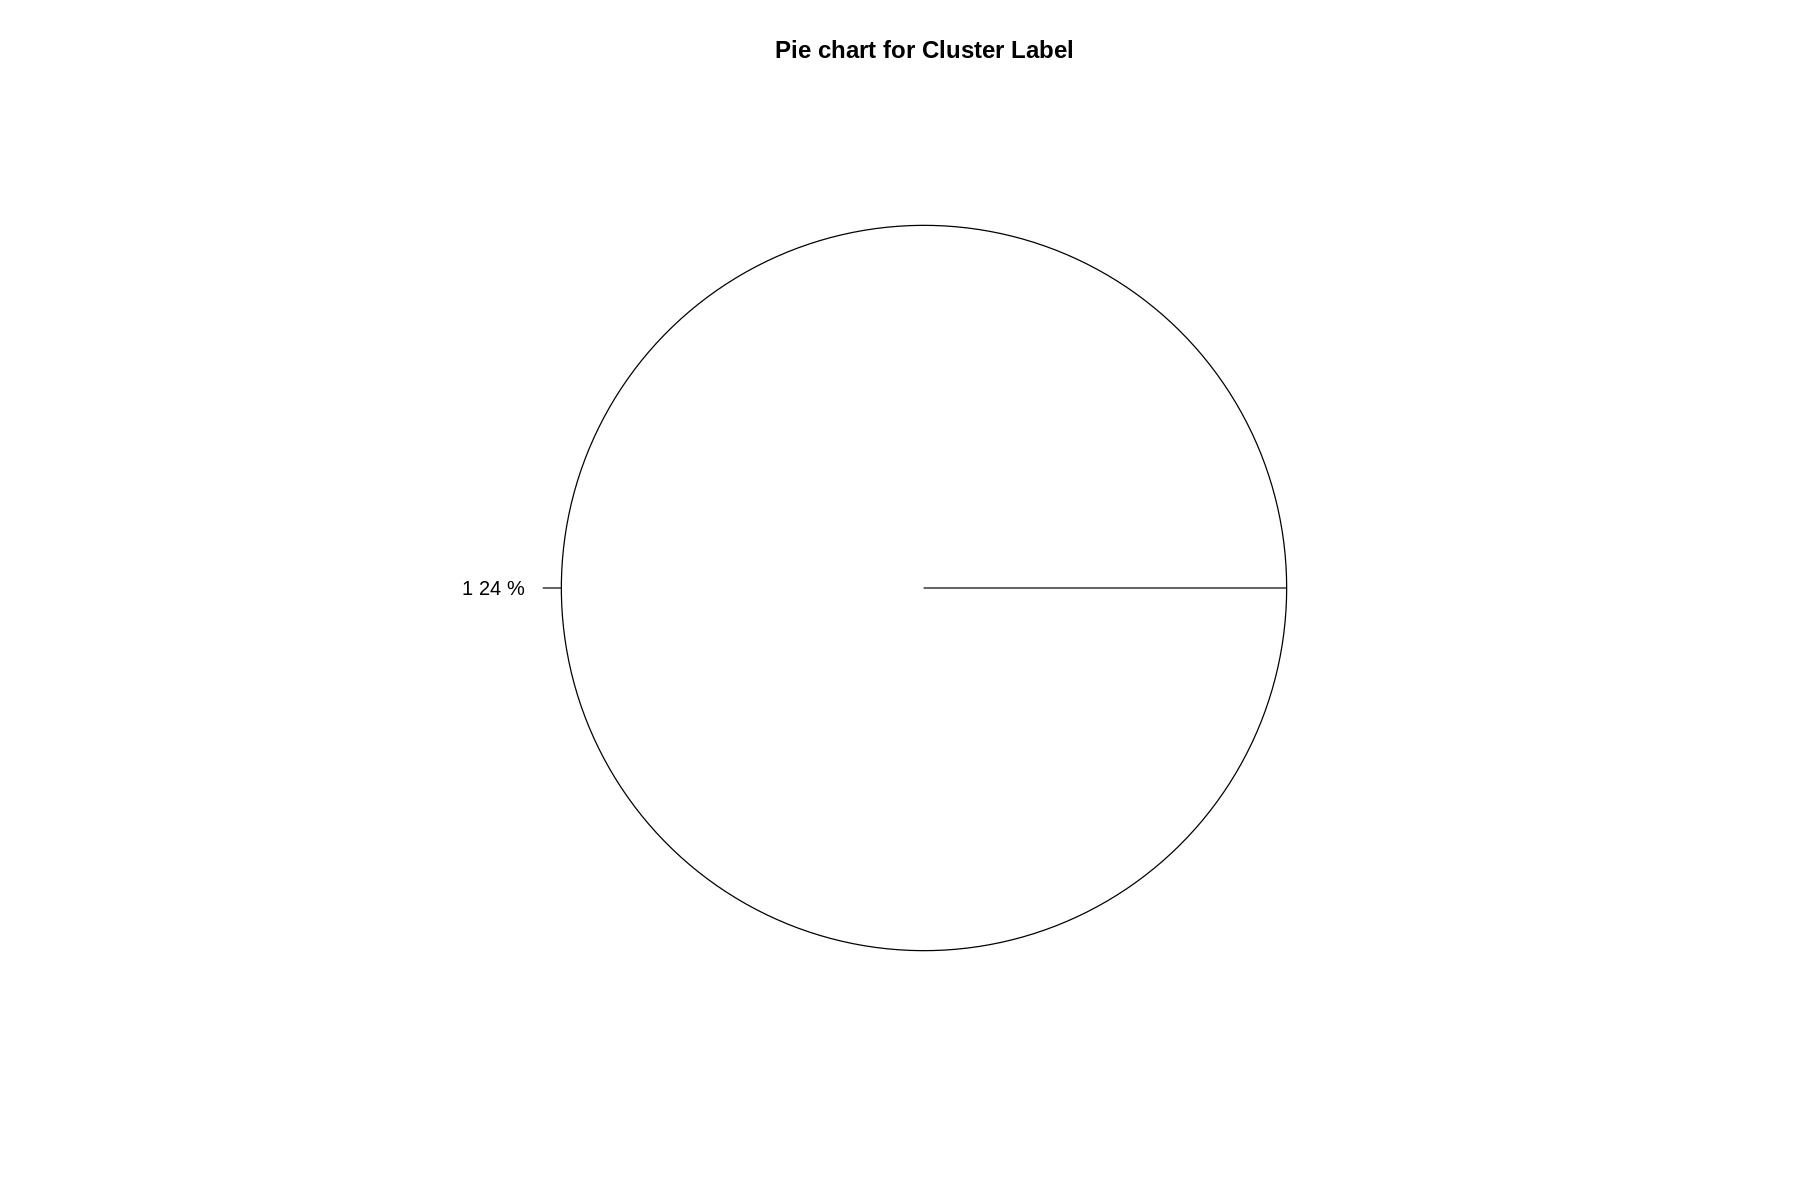

In [ ]:
#interpreting cluster 1
options(repr.plot.width=15, repr.plot.height=10)
for (col in colnames(sub1)){
    if(col != 'CGPA' && col != 'ID'){ #no pie plot for CGPA and ID column
      pct <- round(100*table(sub1[[col]])/147)
      pie(table(sub1[[col]]), main = paste("Pie chart for",col), labels = paste(names(table(sub1[[col]])), sep = " ", pct, "%"))
    }
}

In [ ]:
#counting num of occurence of unique values for each colum 
for (col in col_names[(-1)]){
      print(col)
      print(data.frame(table(sub1[[col]])))
      print('______________________________')
}

[1] "Gender"
    Var1 Freq
1 Female   15
2   Male   21
[1] "______________________________"
[1] "Academic Classification"
                                    Var1 Freq
1 Freshman (earned between 0-29 credits)   32
2                I am a graduate student    1
3  Junior (earned between 60-89 credits)    2
4     Senior (number of credits is >=90)    1
[1] "______________________________"
[1] "CGPA"
   Var1 Freq
1  1,74    1
2  3,82    1
3  3.11    1
4  3.14    1
5   3.2    1
6  3.33    1
7  3.55    1
8  3.67    2
9  3.80    1
10 3.91    1
11 3.92    1
12 3.96    1
13  N/A   23
[1] "______________________________"
[1] "Current feeling about AUI"
                                   Var1 Freq
1               I am disappointed/upset    3
2       I am happy to be an AUI student   22
3 Same feeling I had before joining AUI   11
[1] "______________________________"
[1] "Current feeling about SSE"
  Var1 Freq
1    2   11
2    3   25
[1] "______________________________"
[1] "Food satisfaction"
   

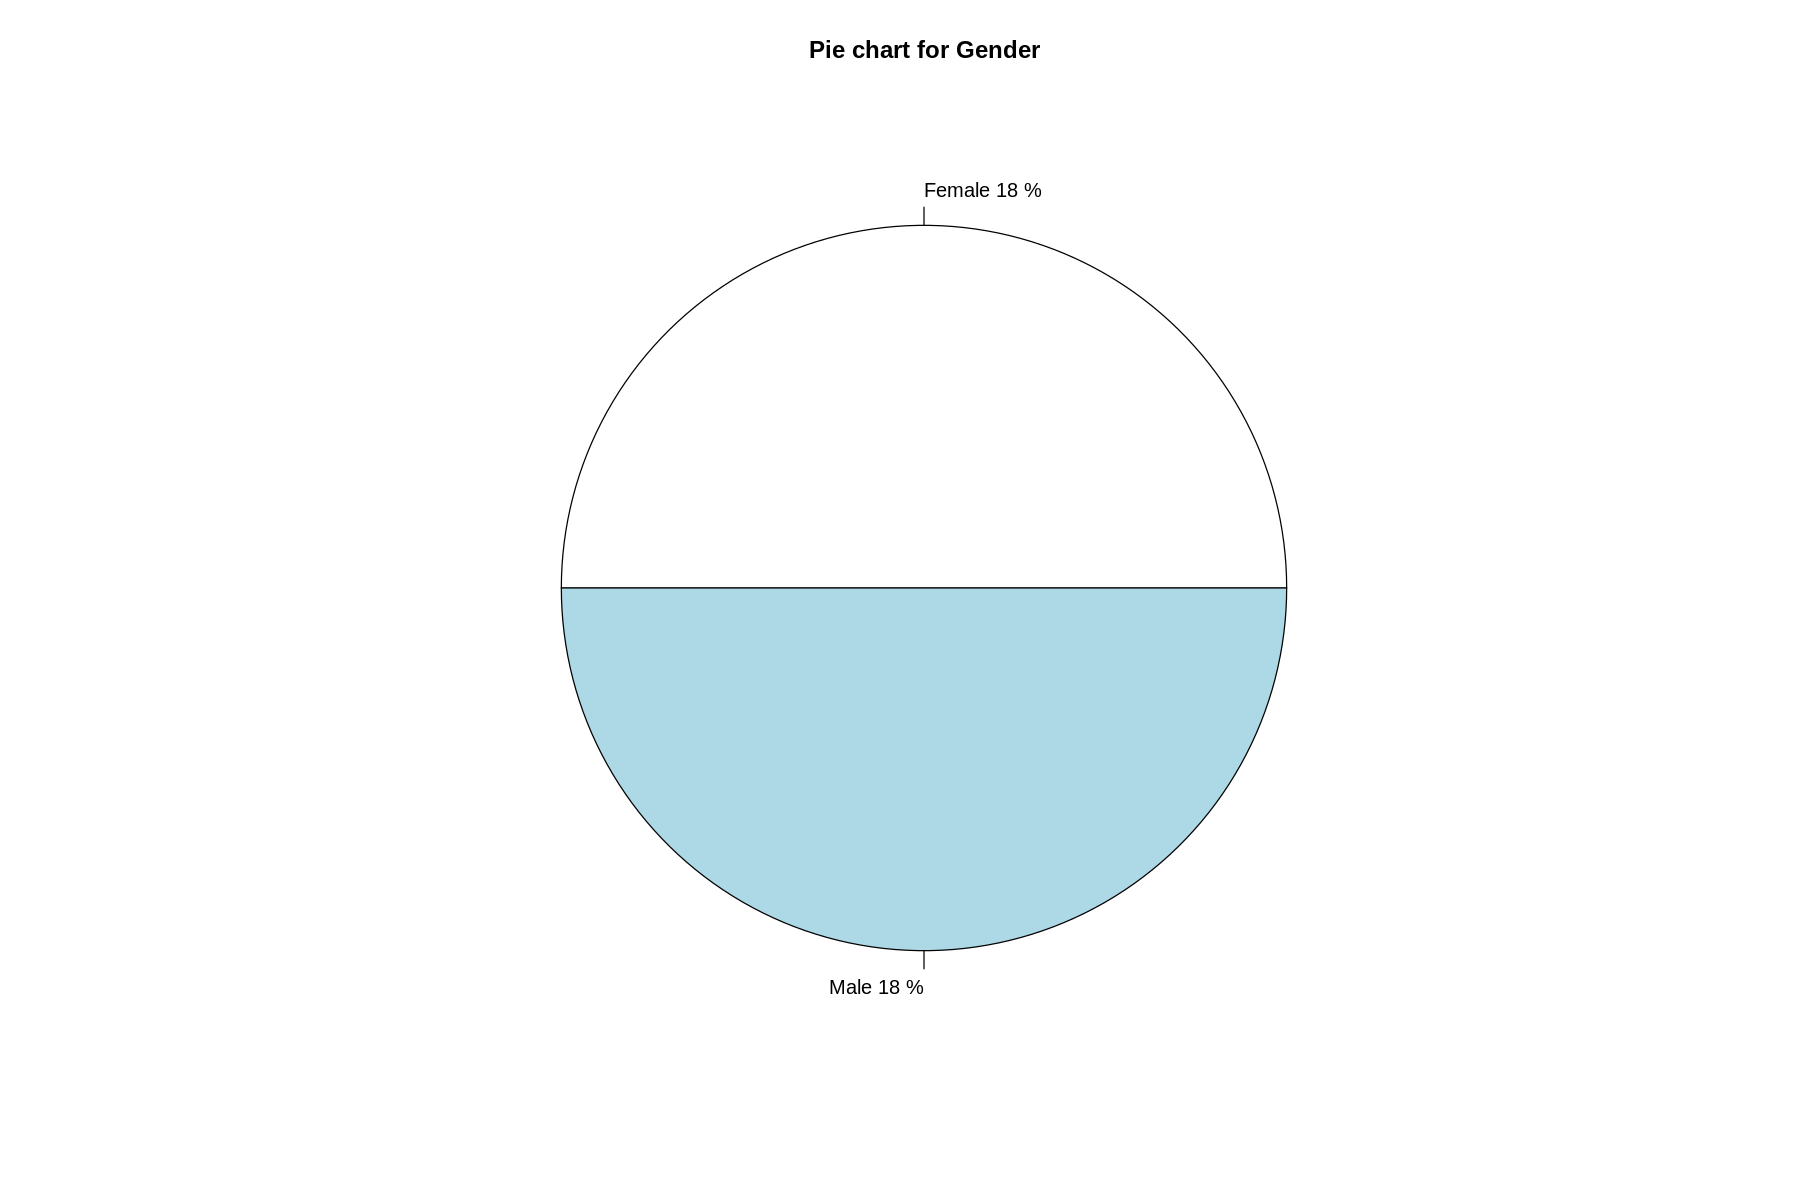

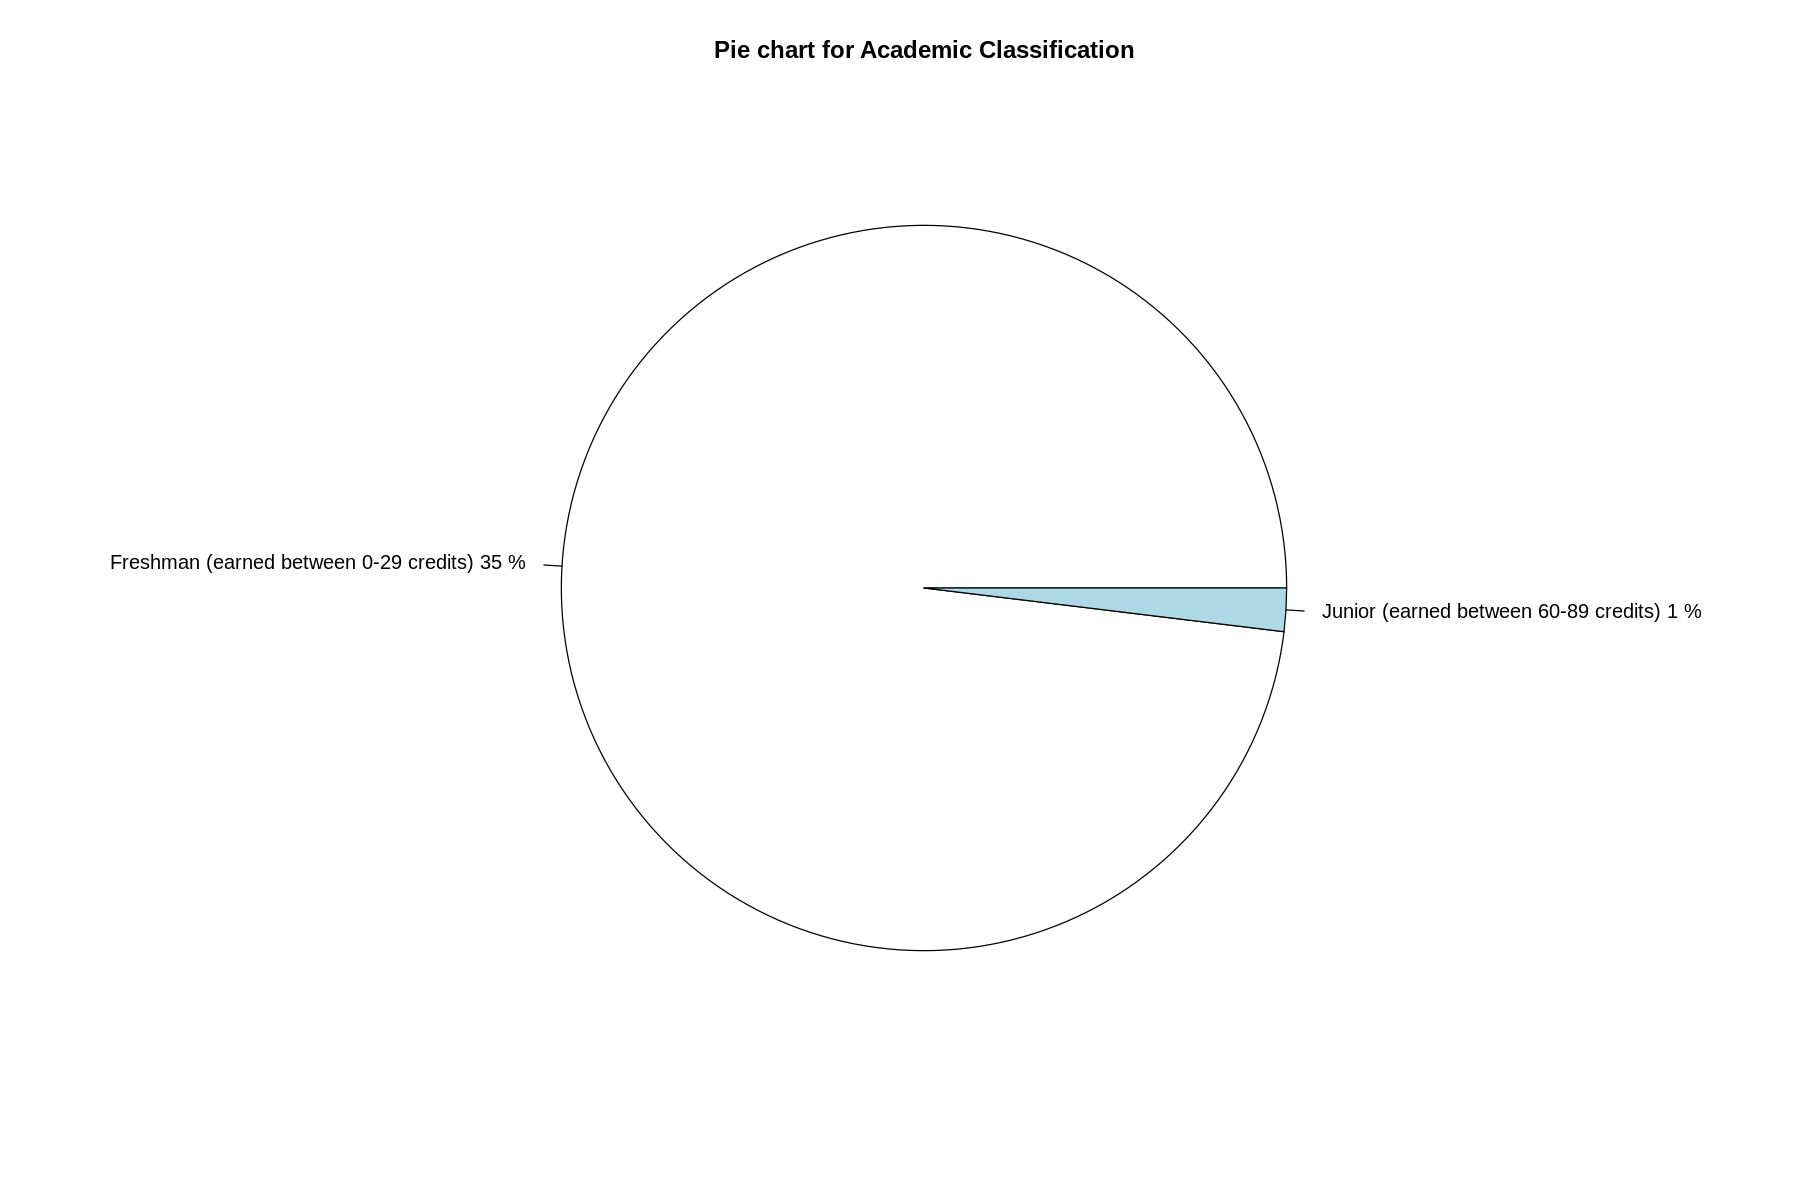

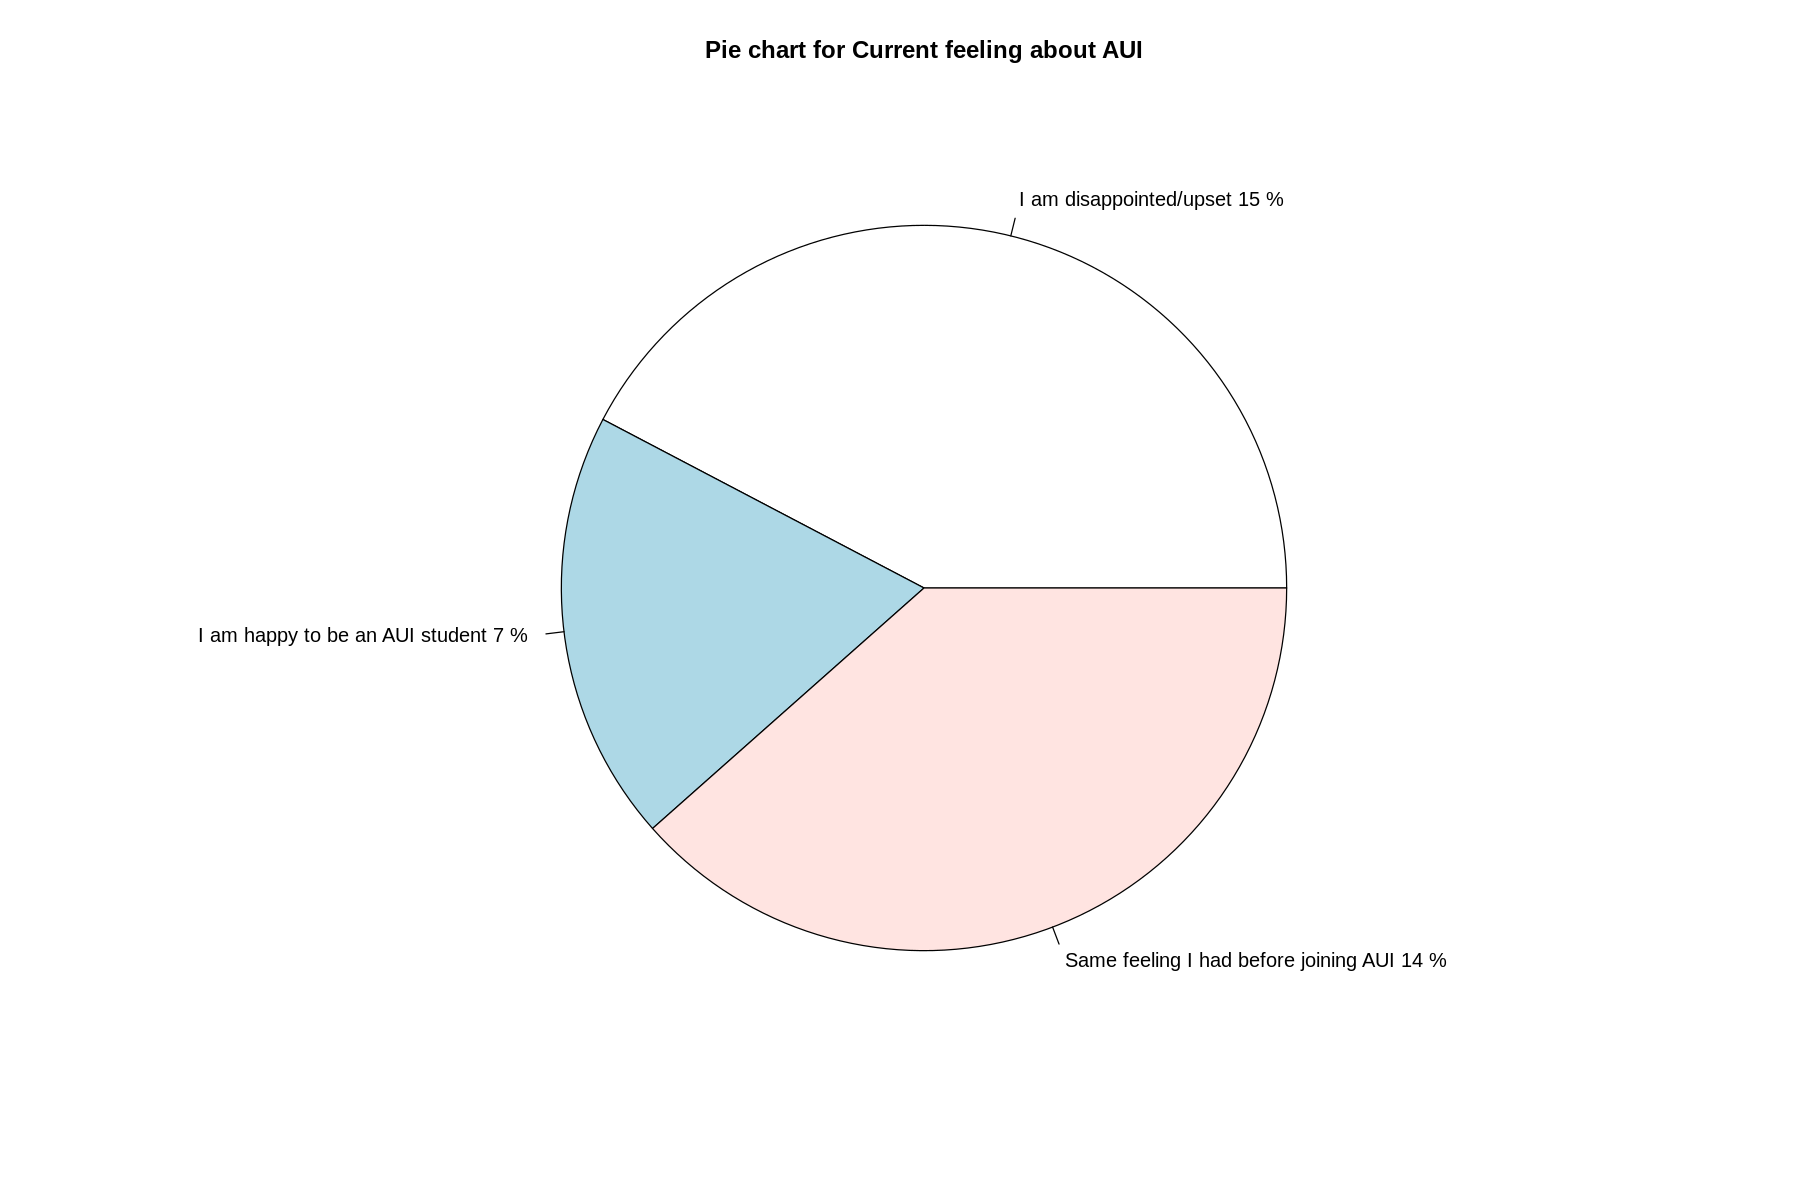

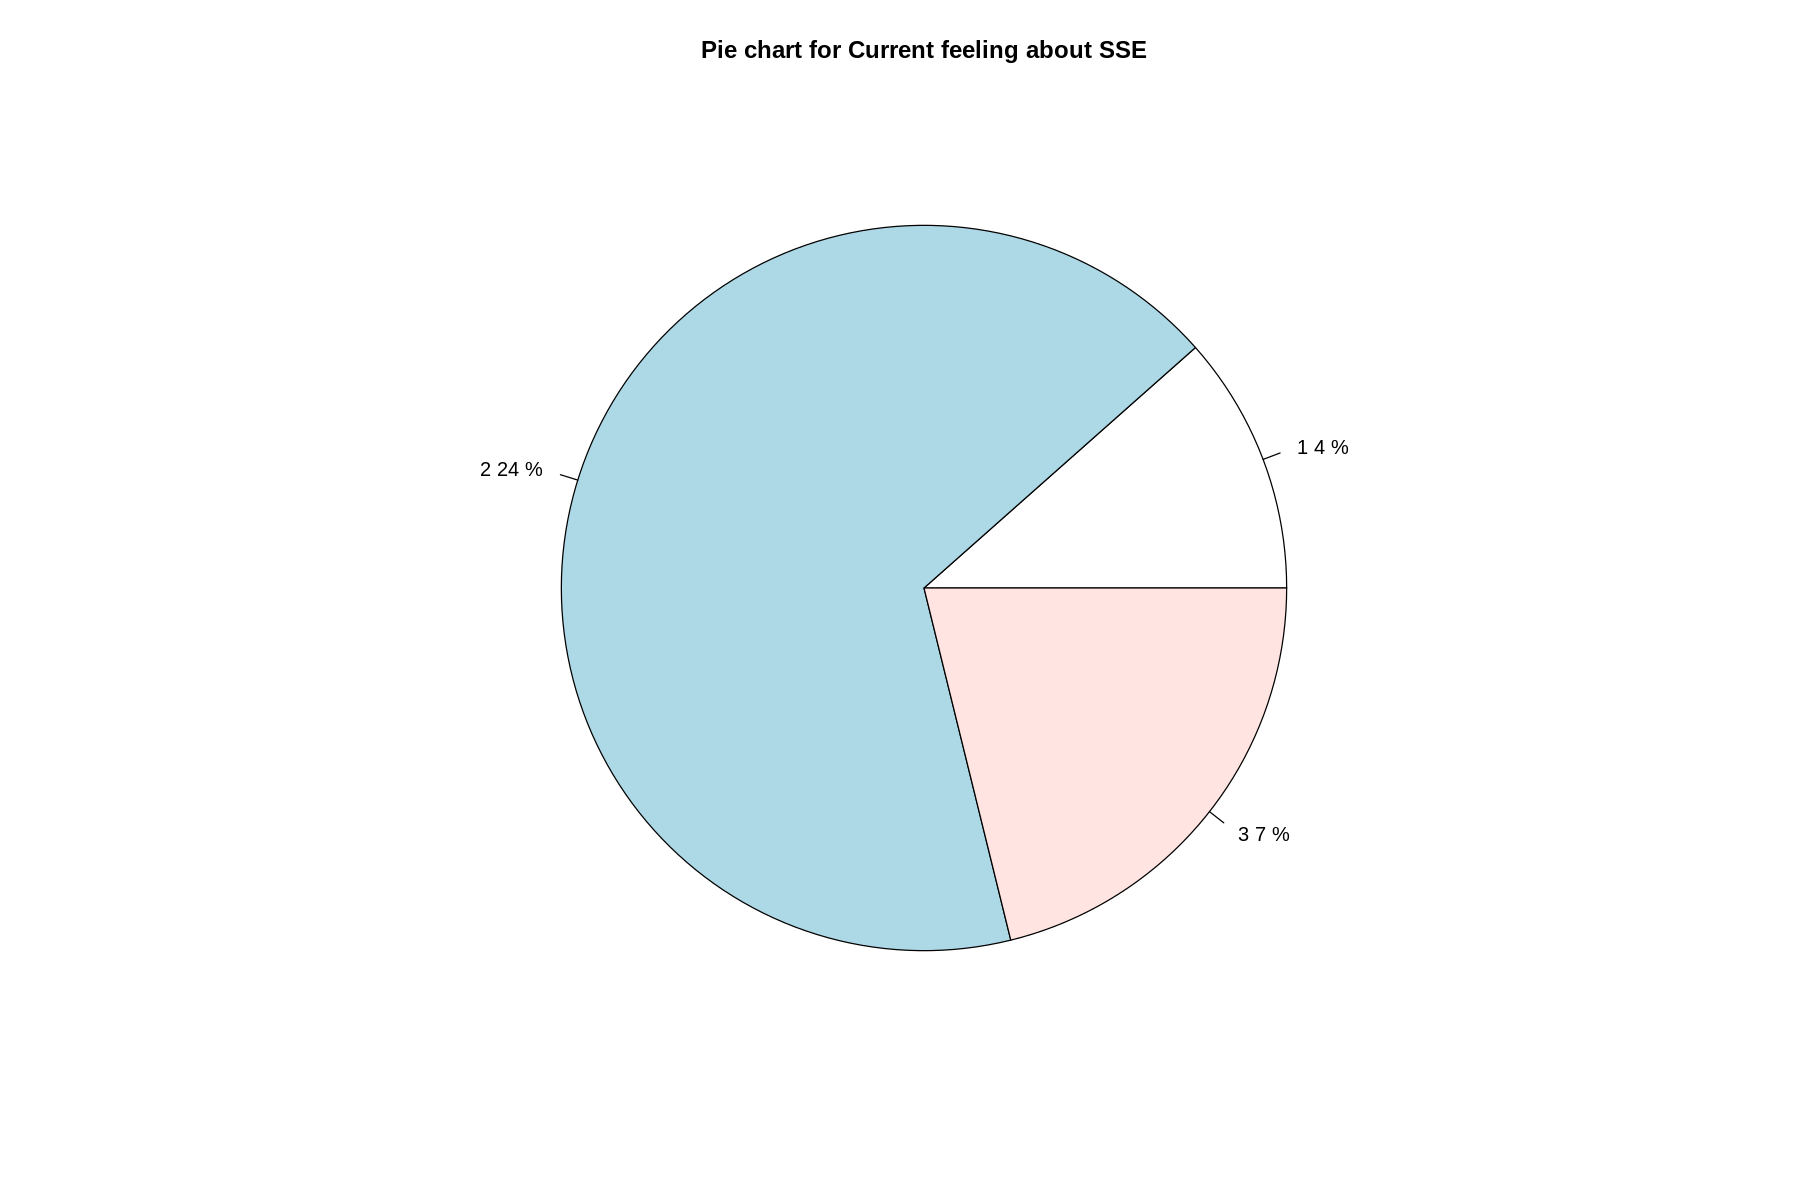

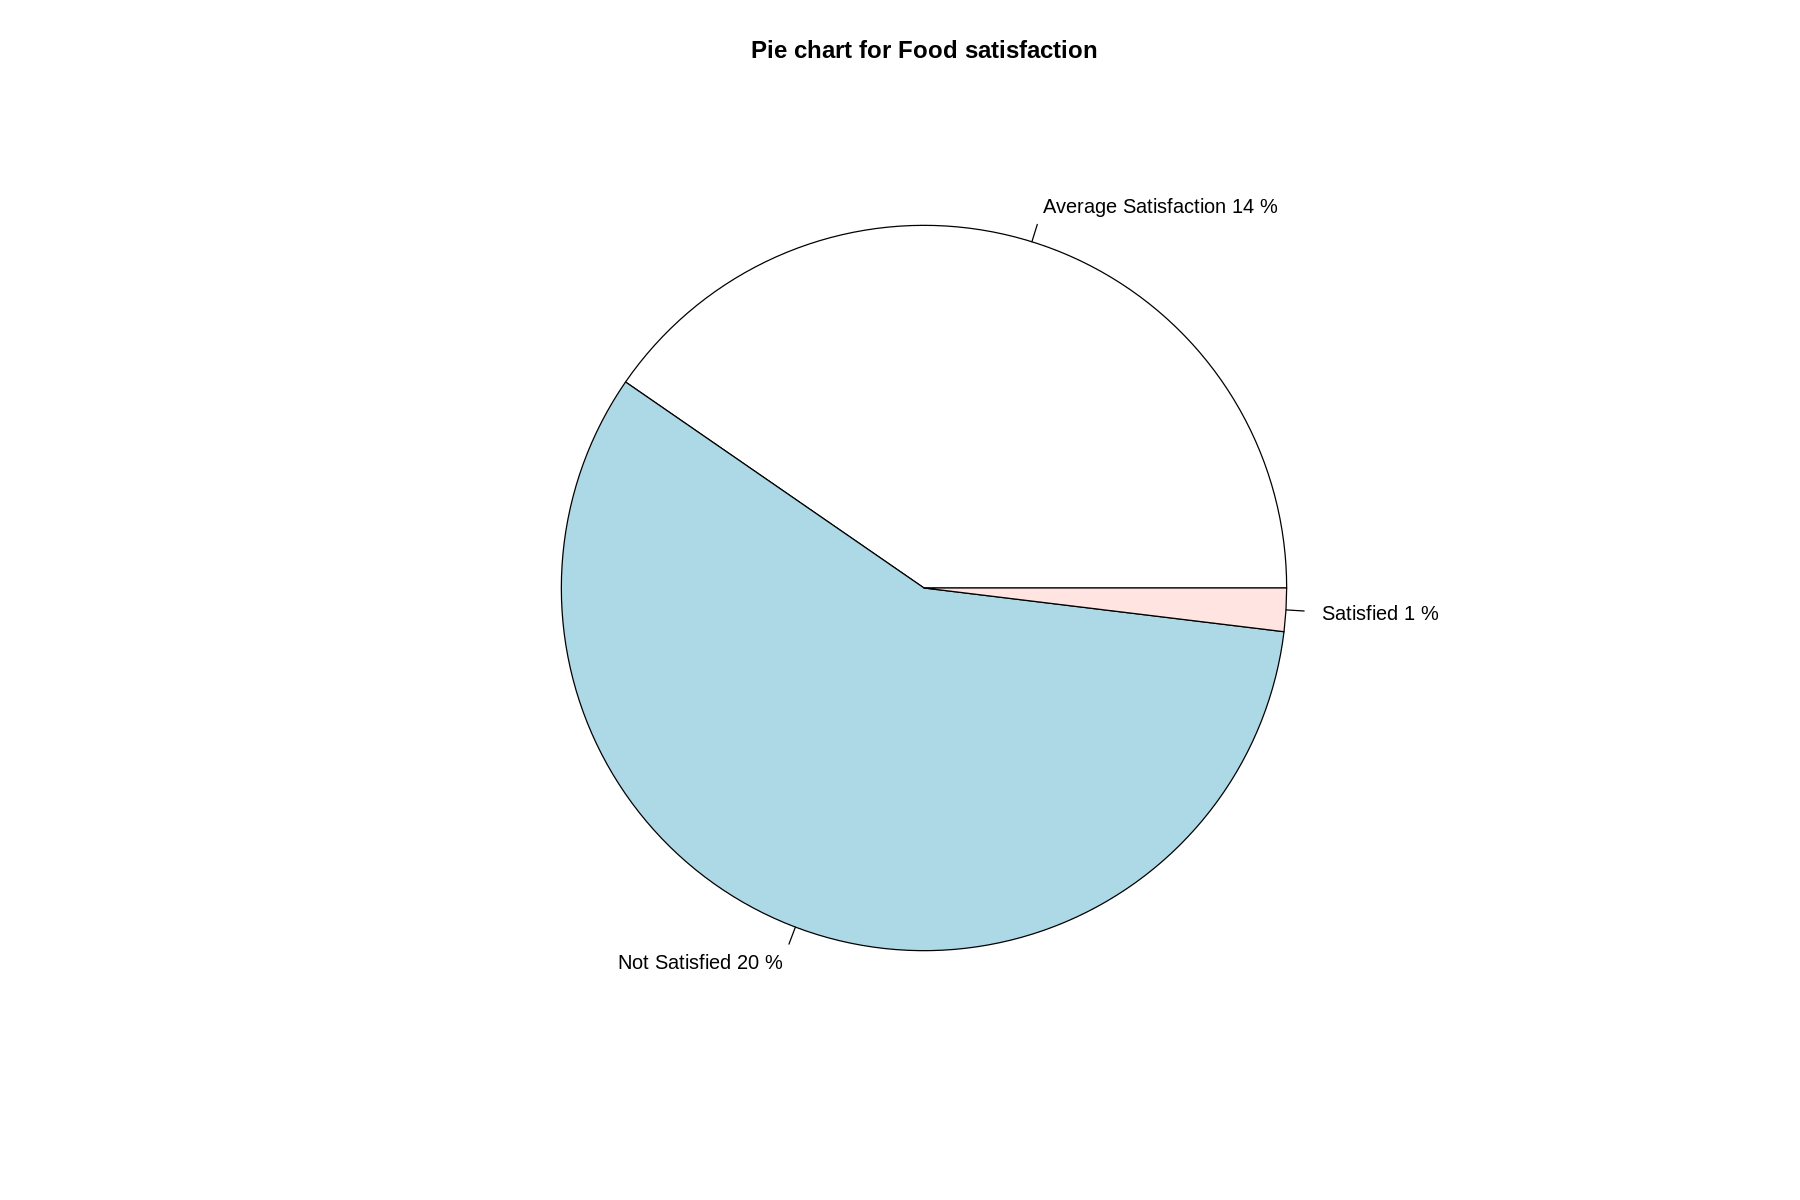

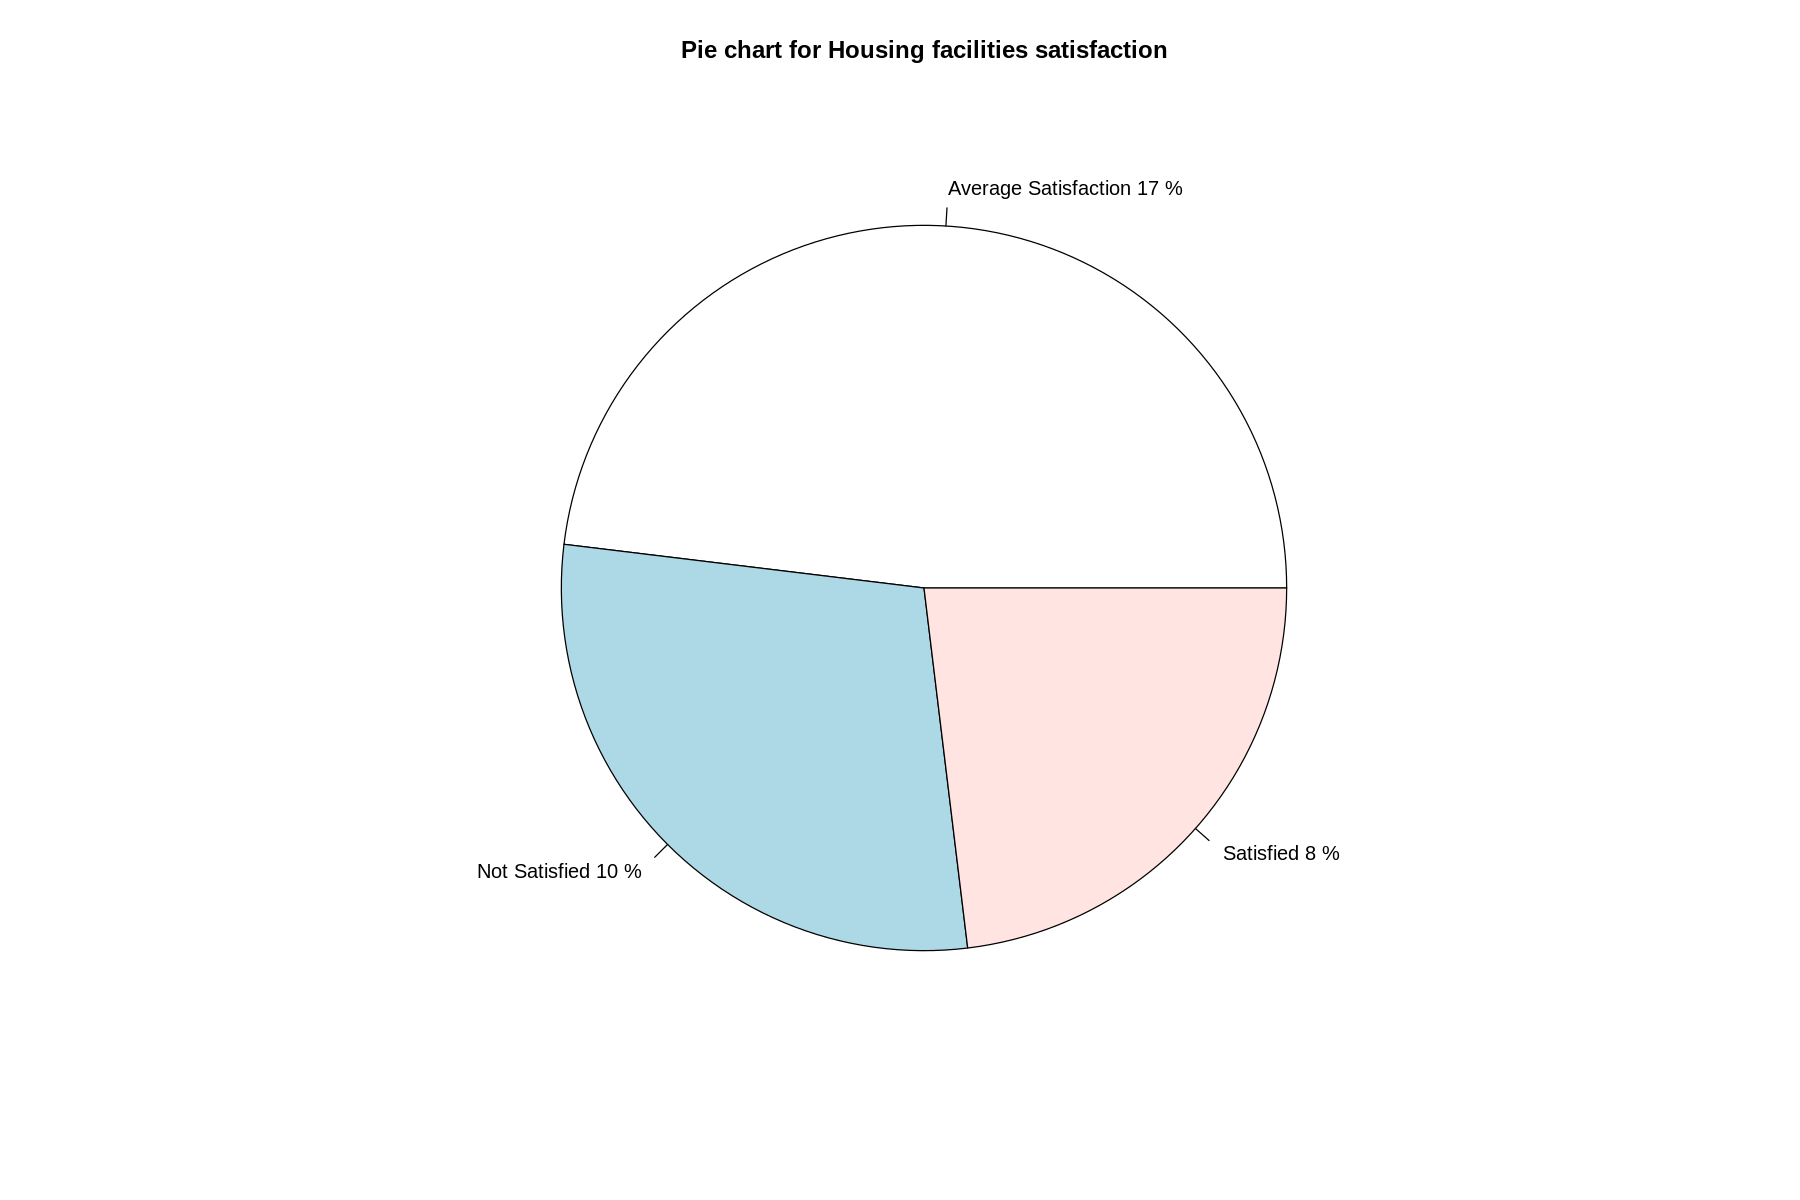

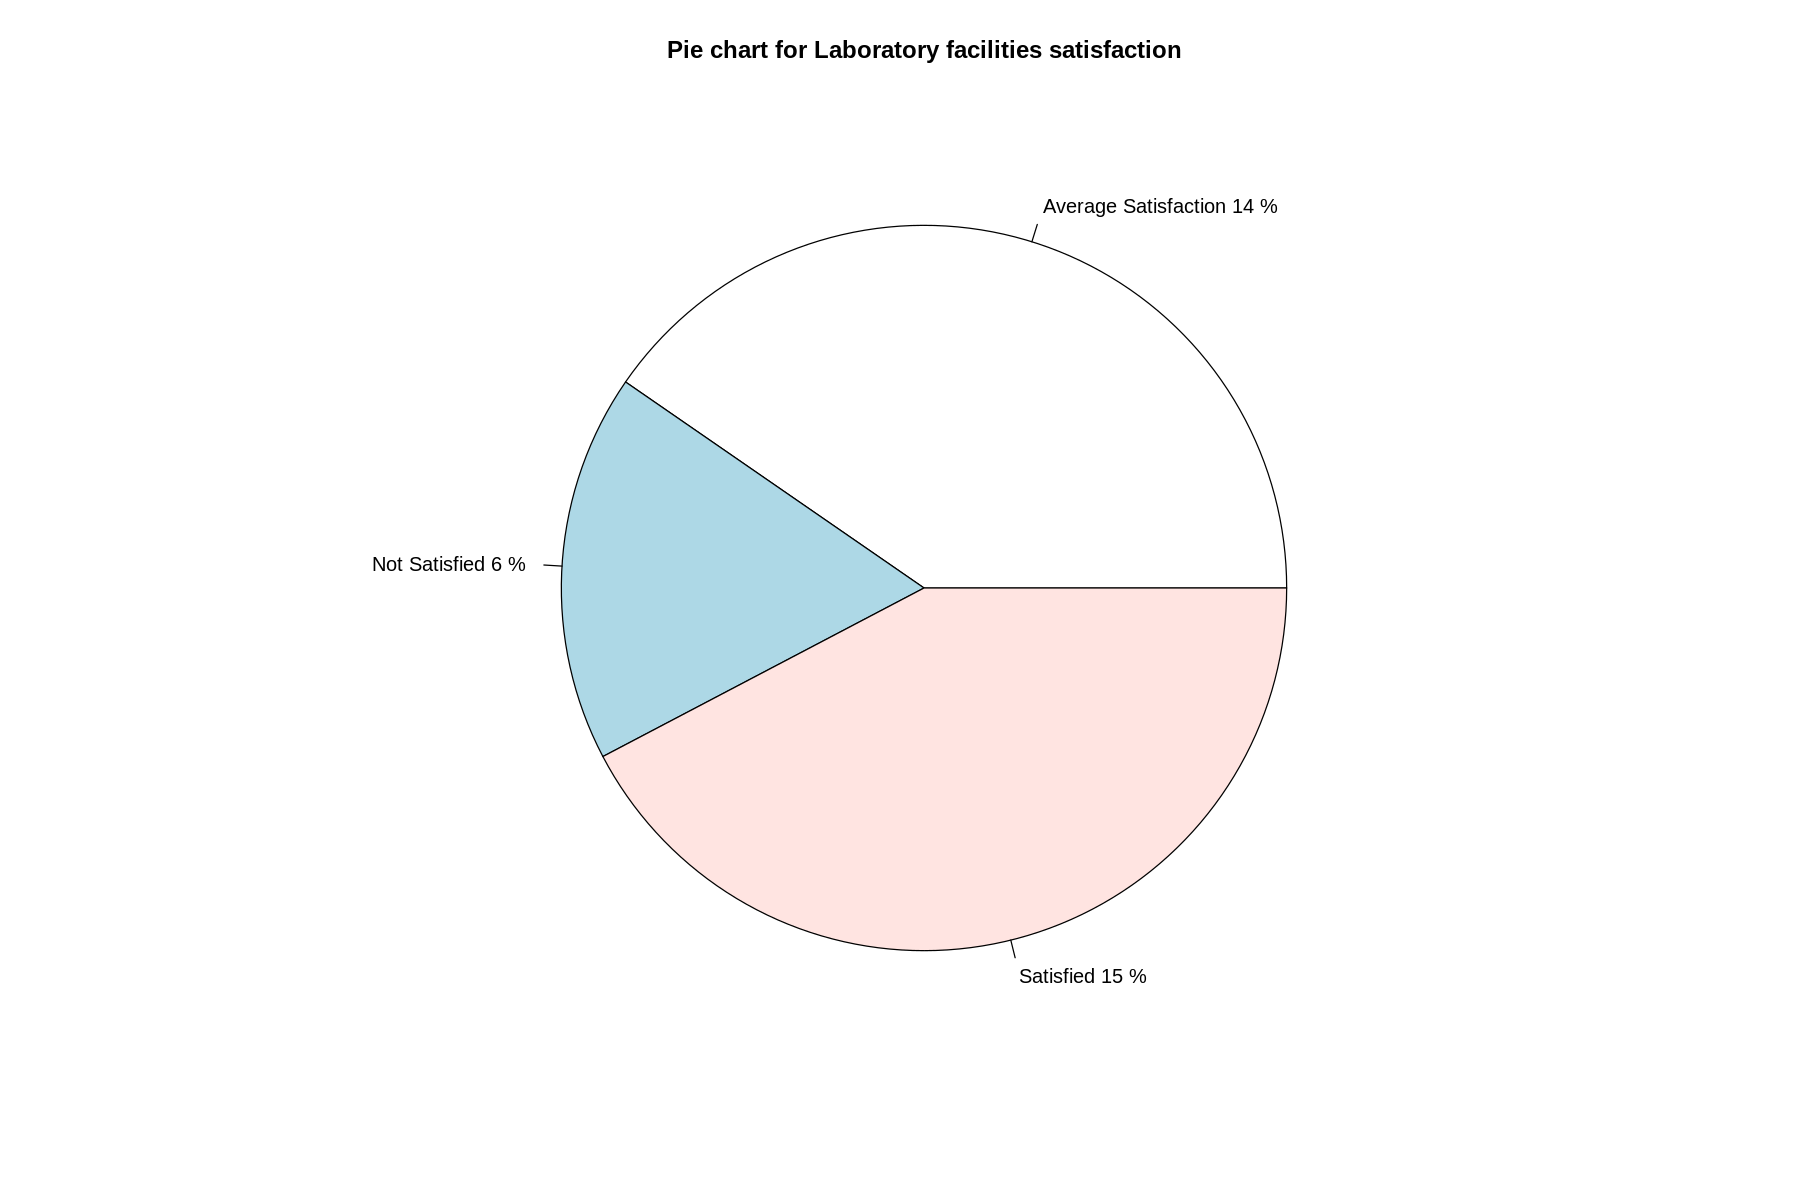

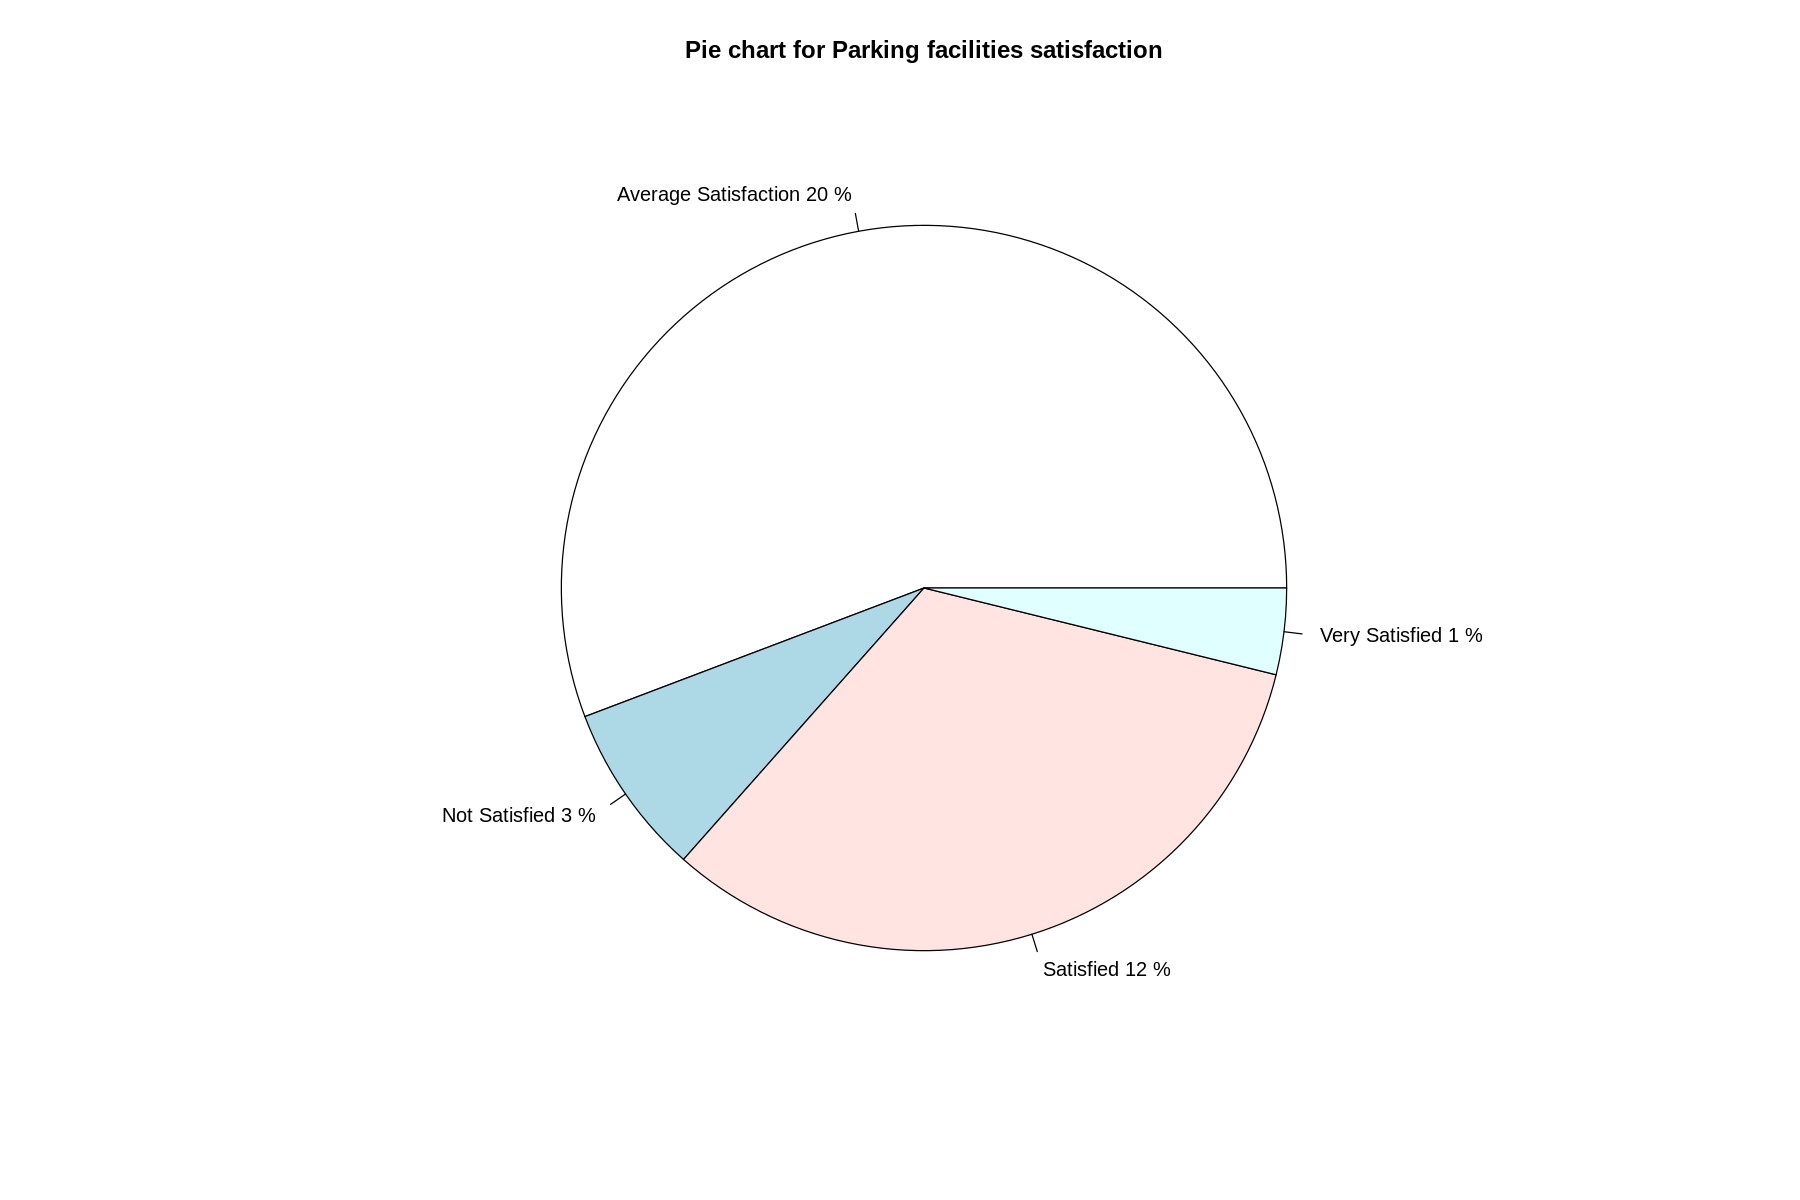

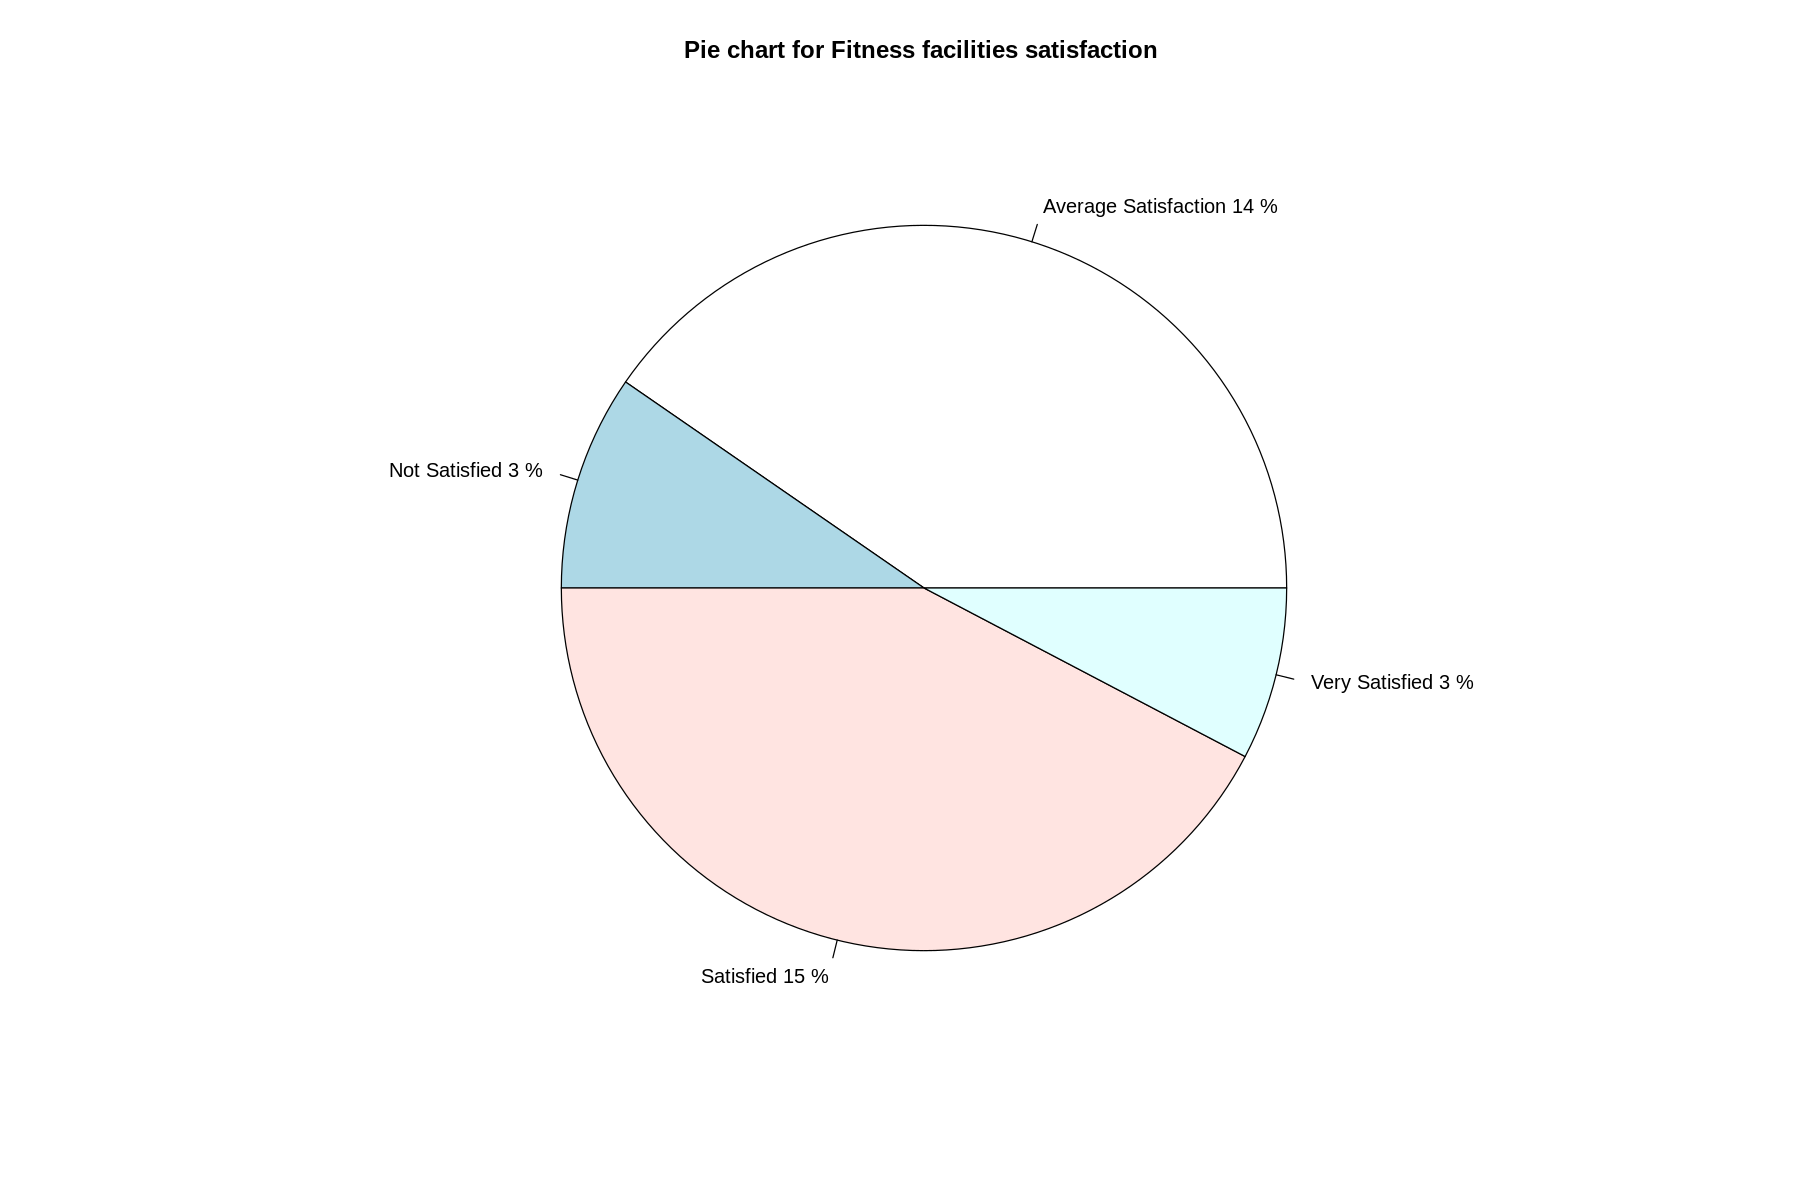

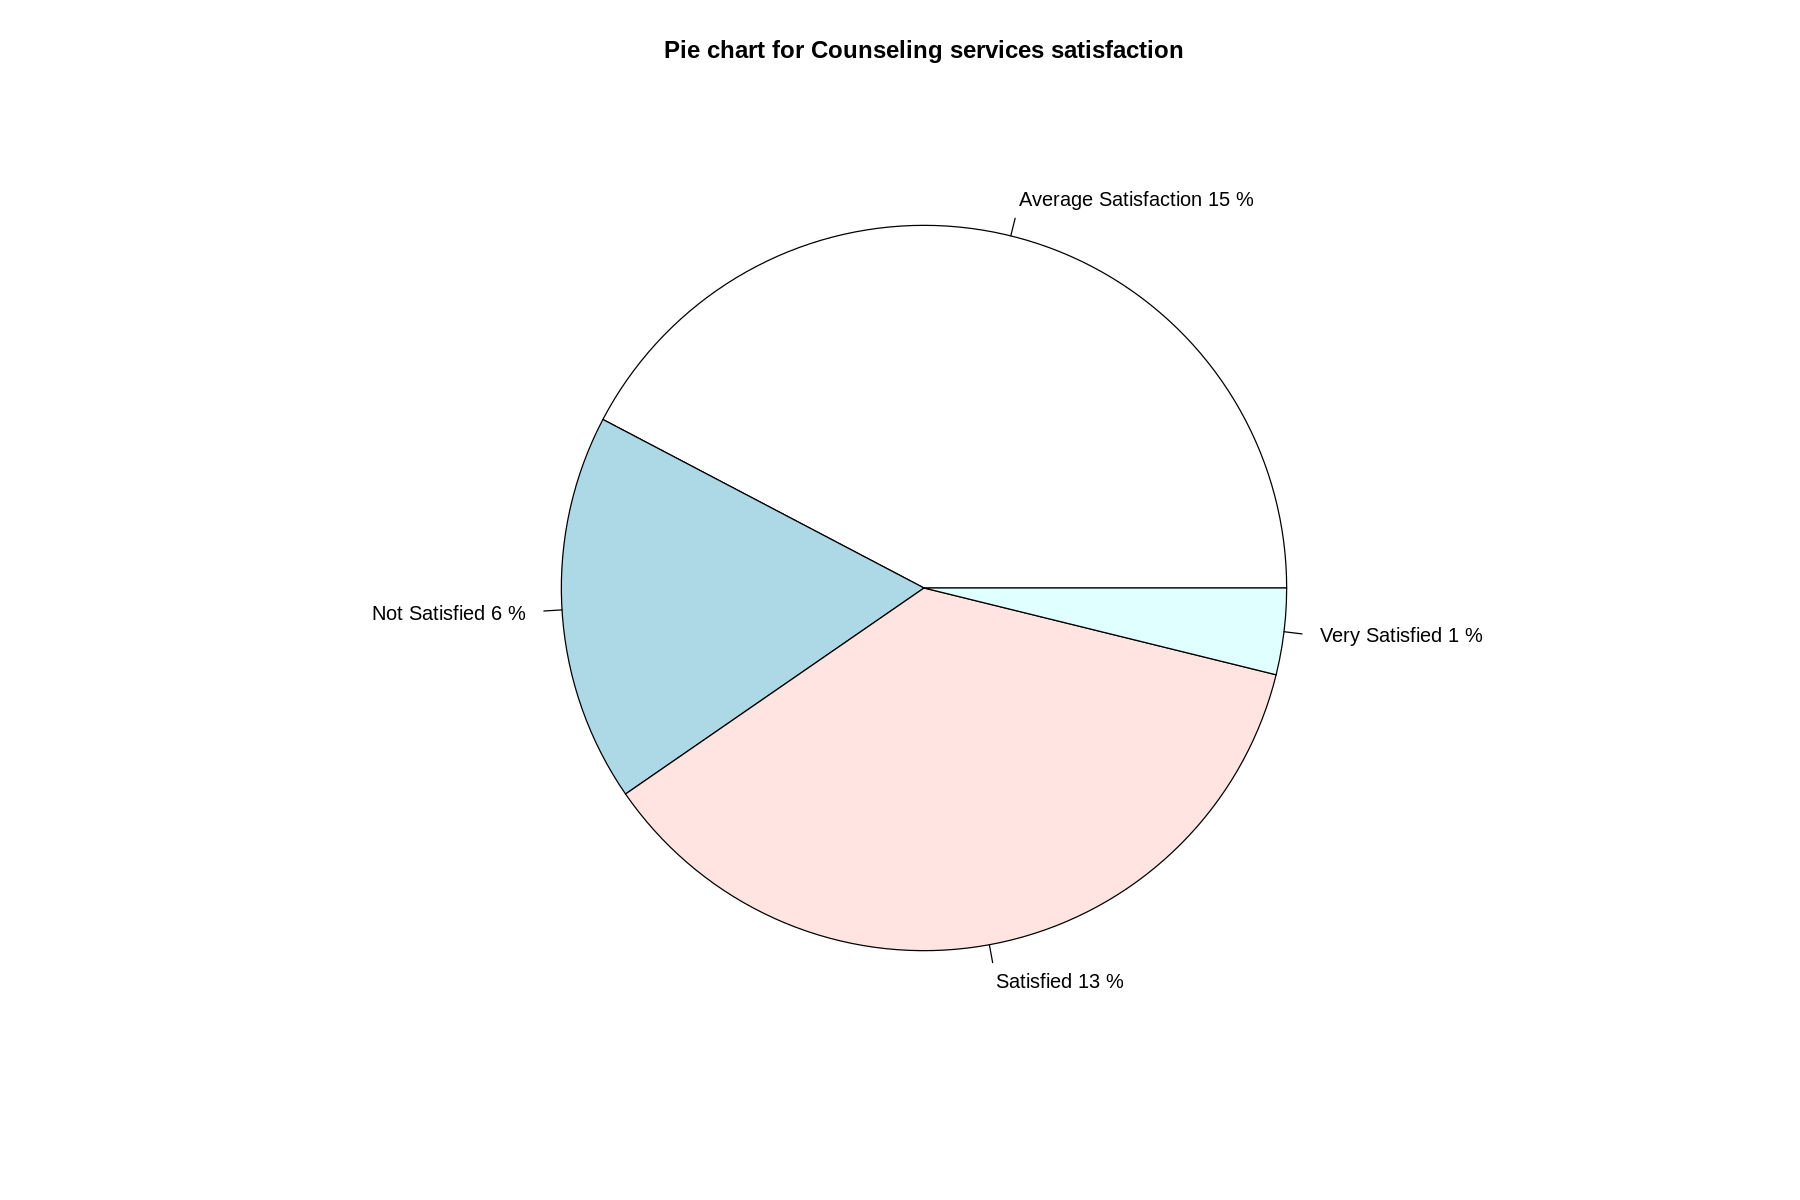

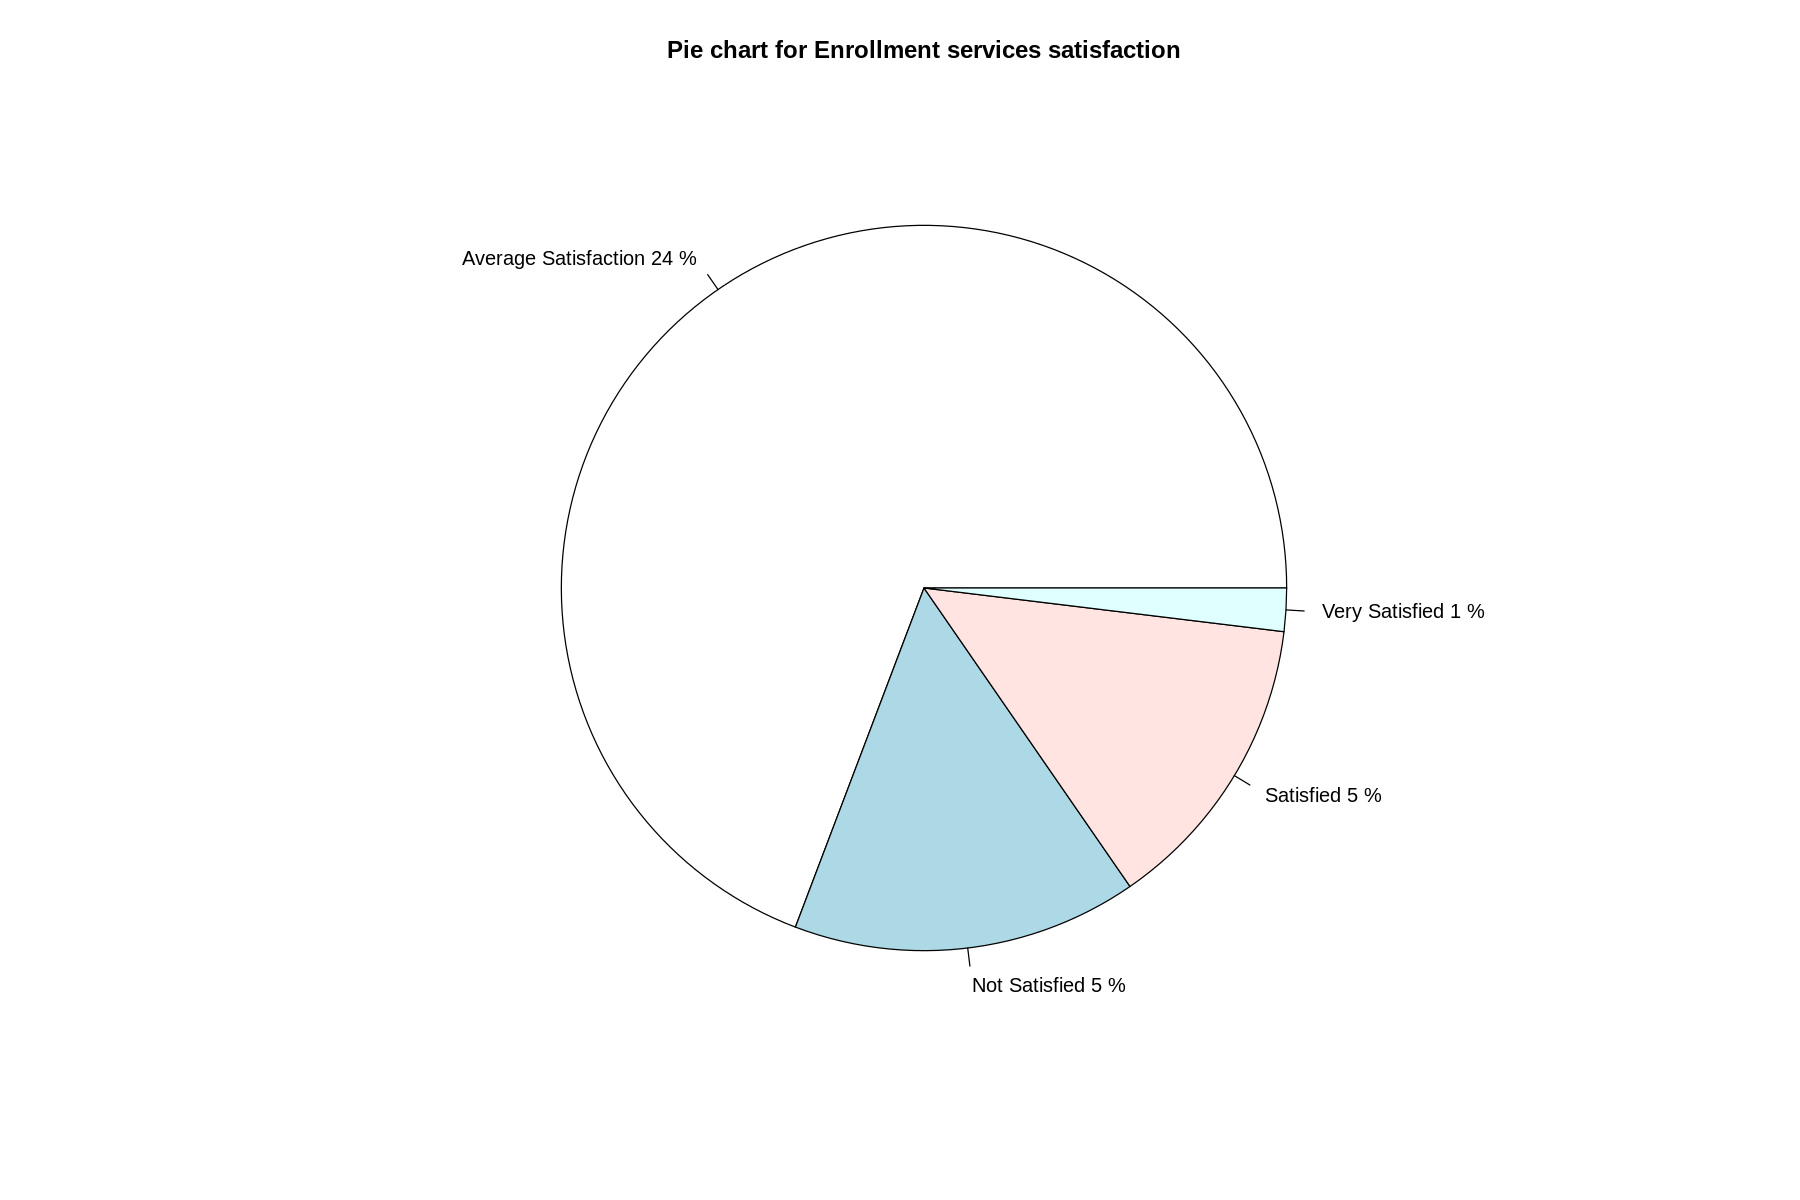

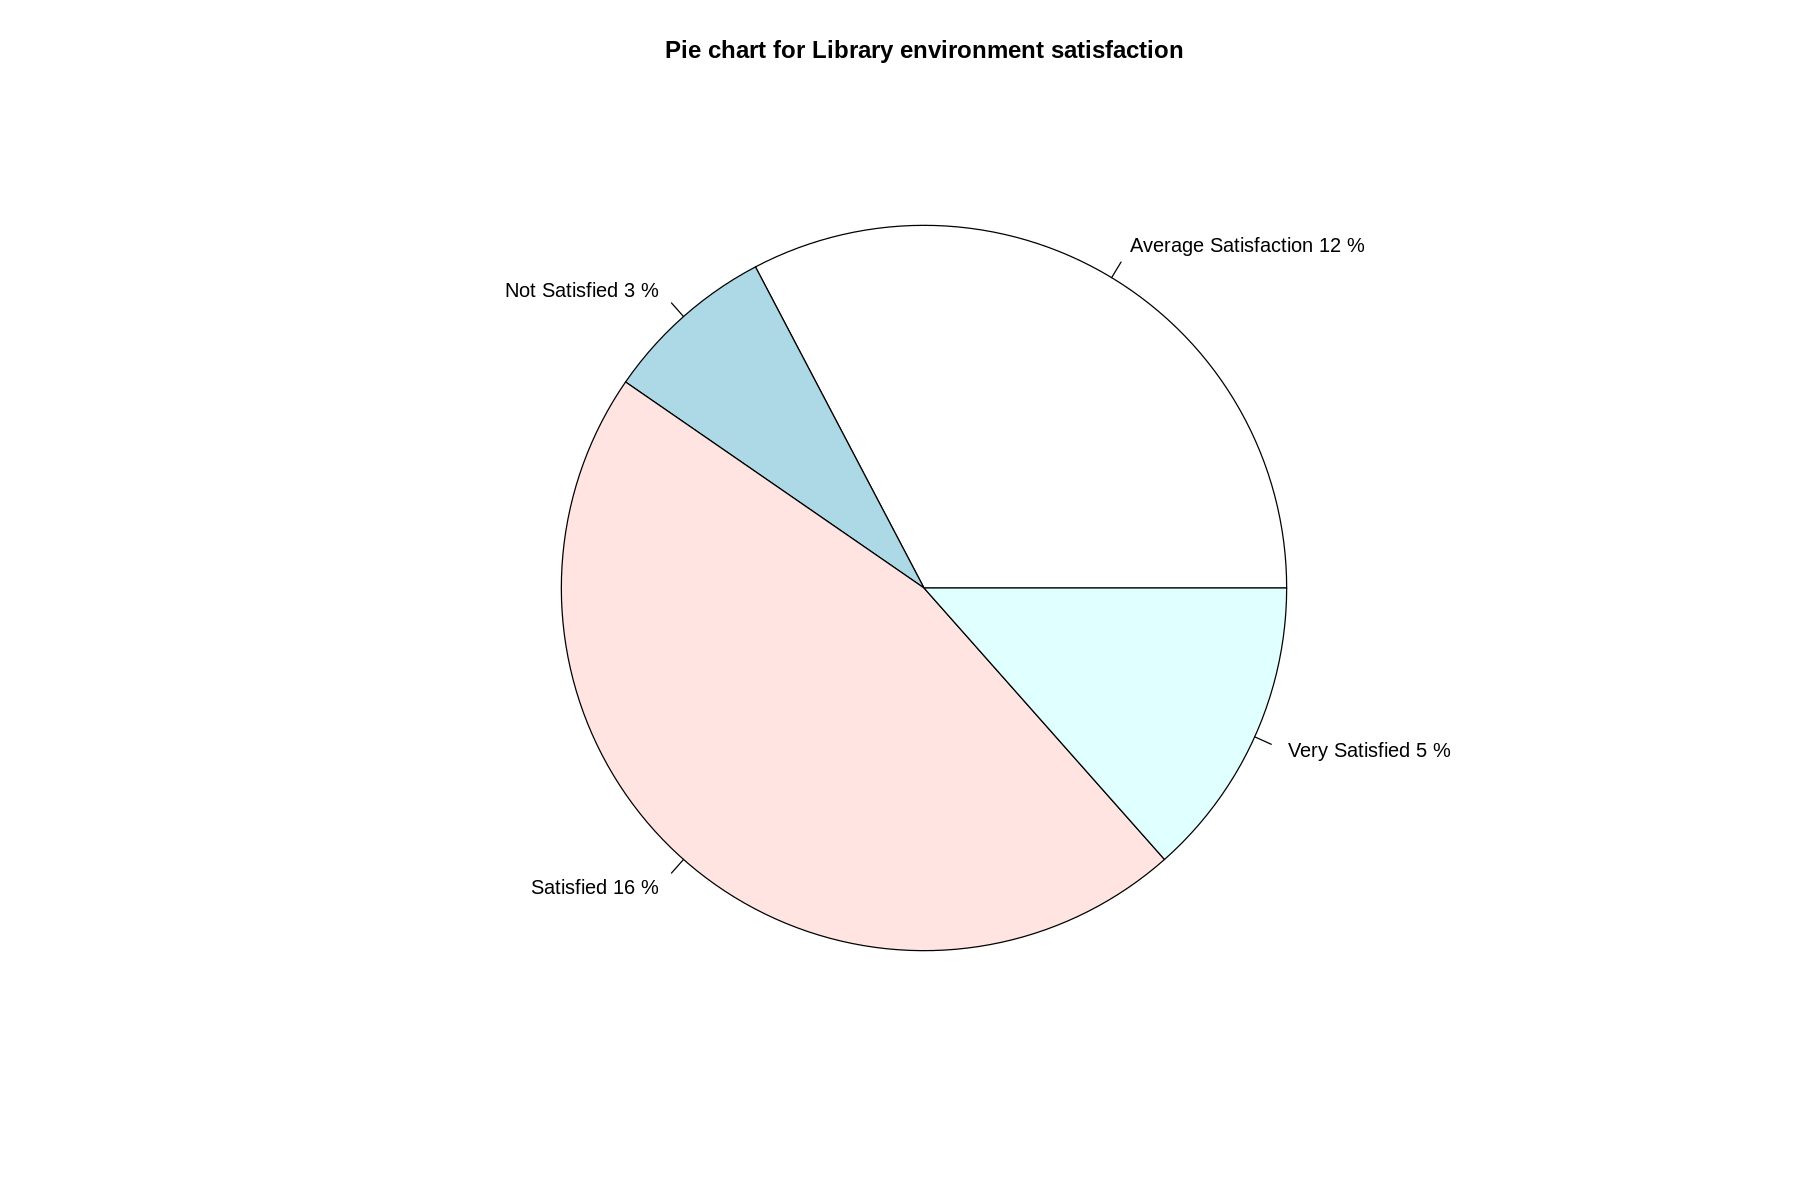

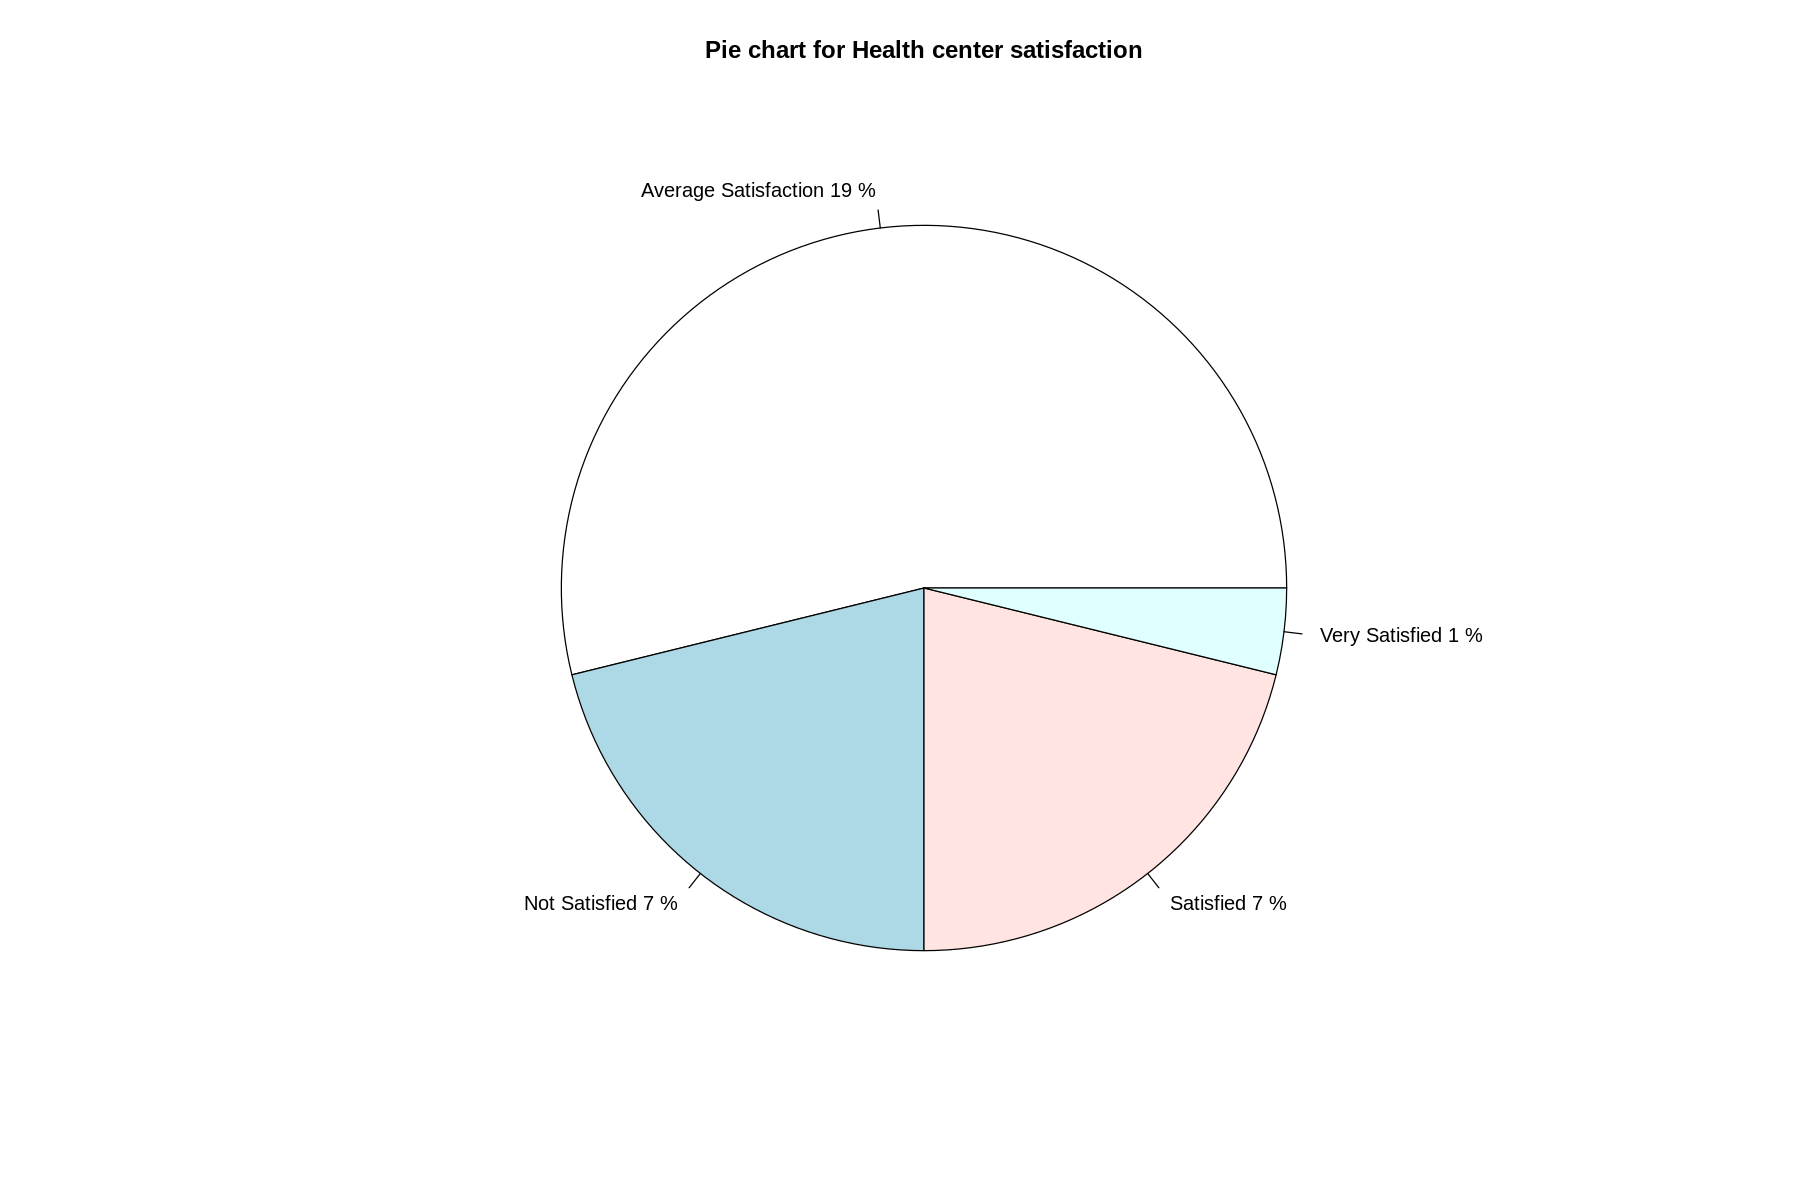

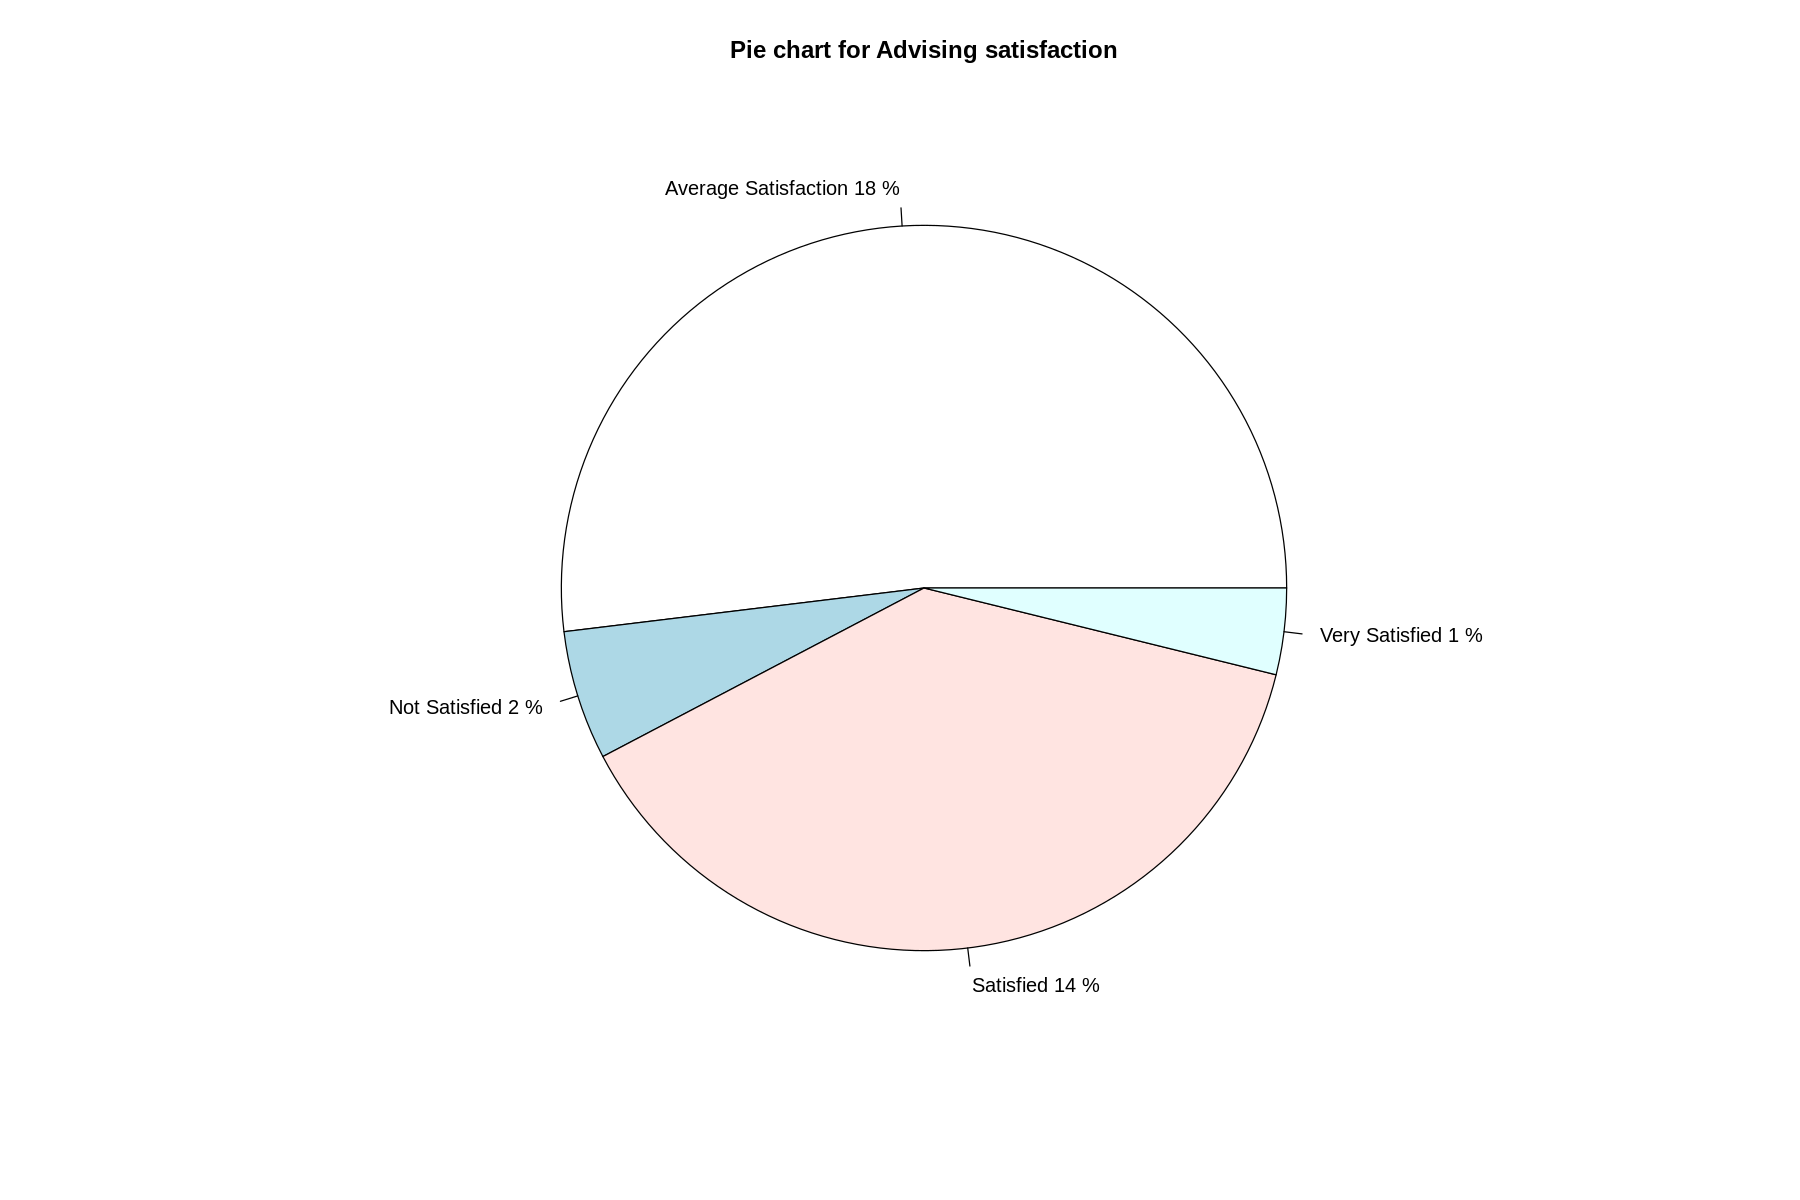

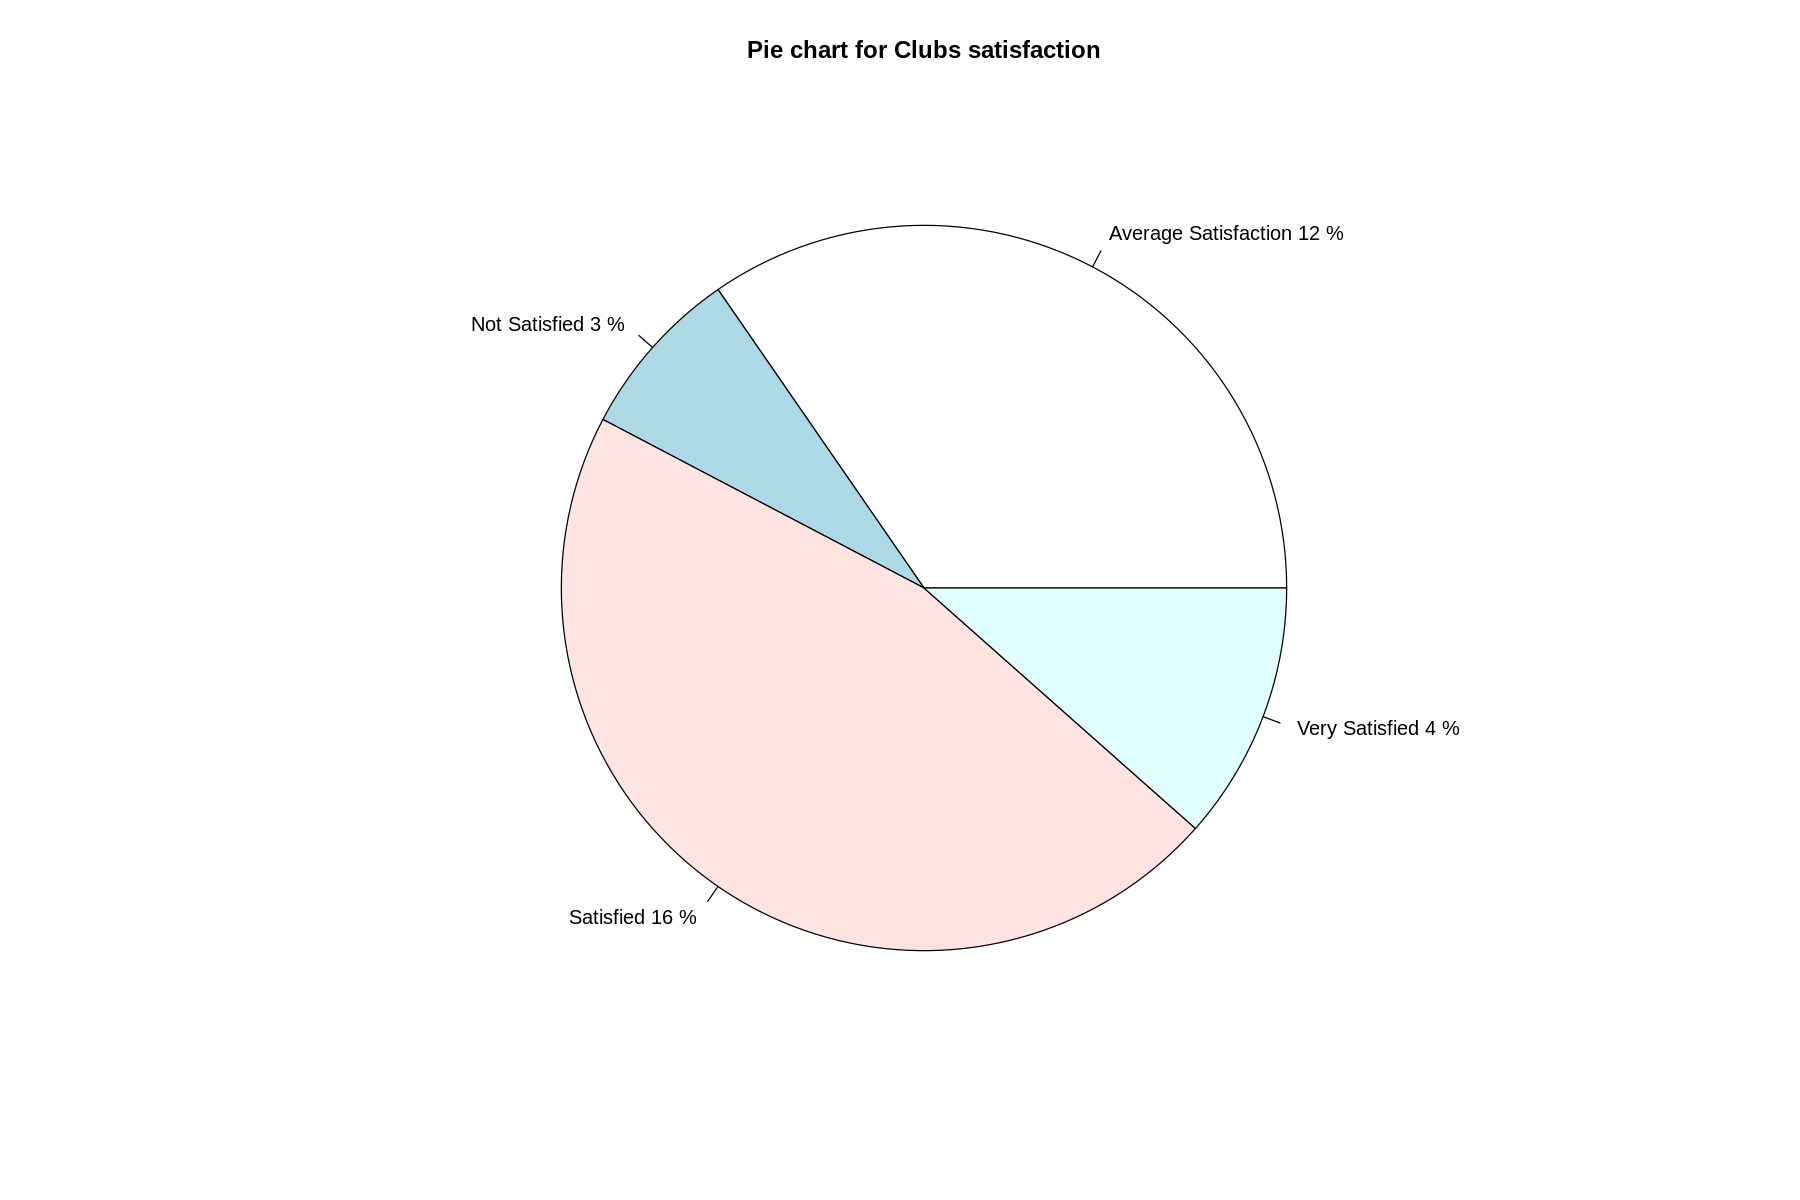

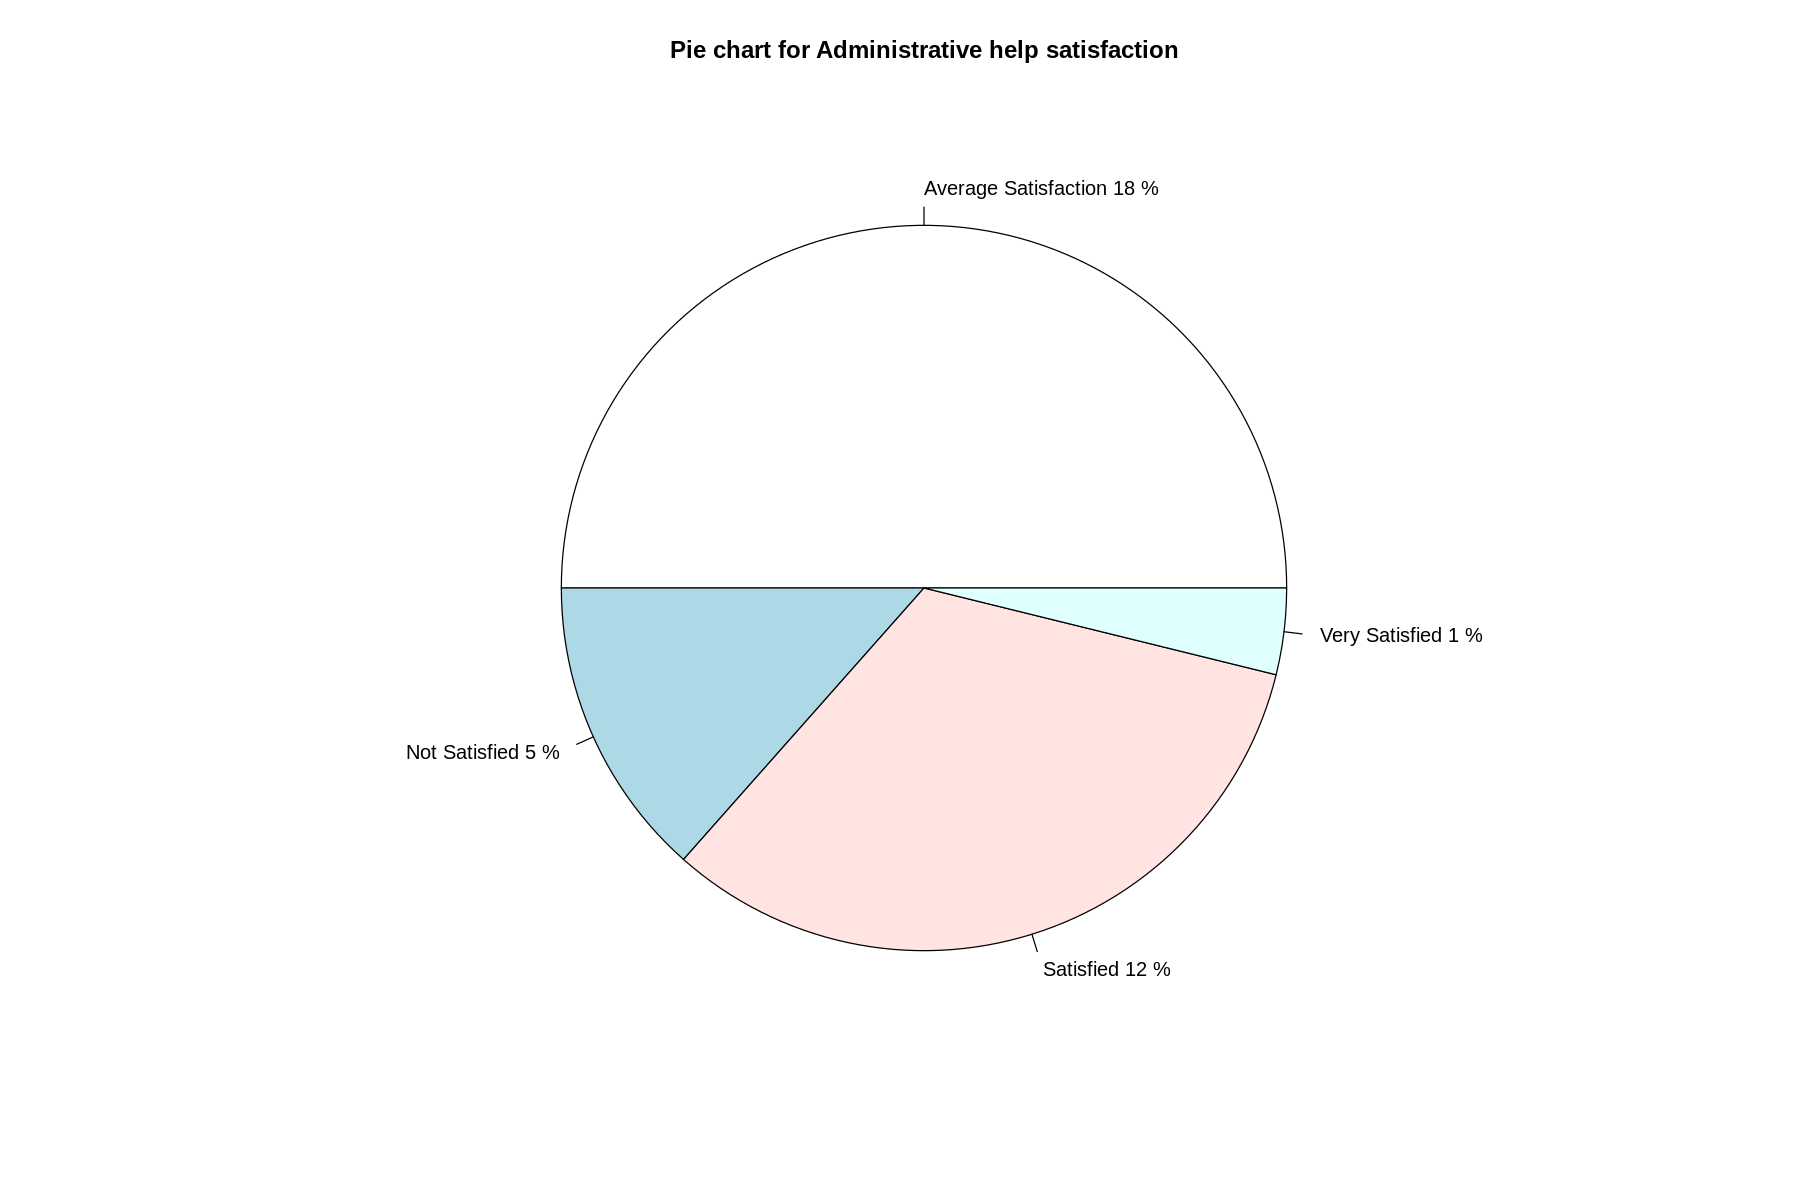

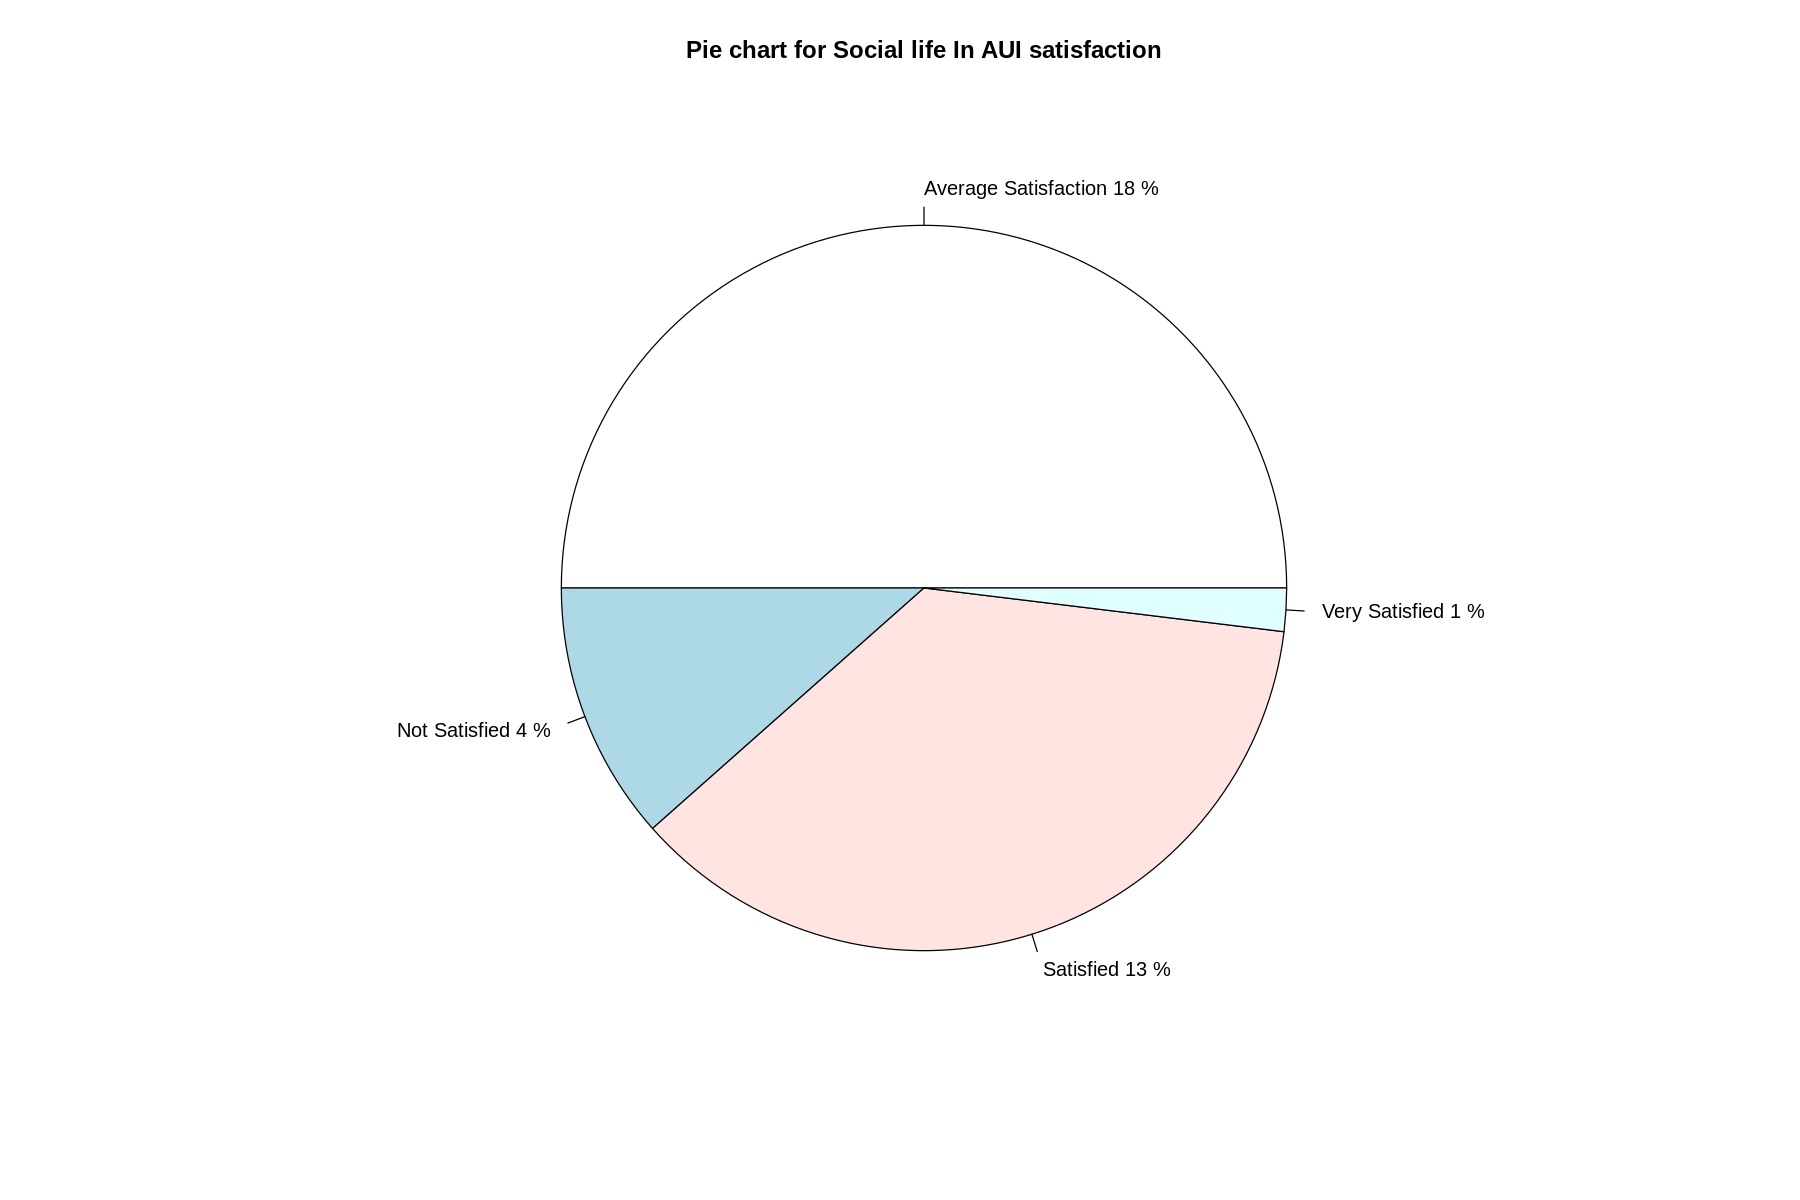

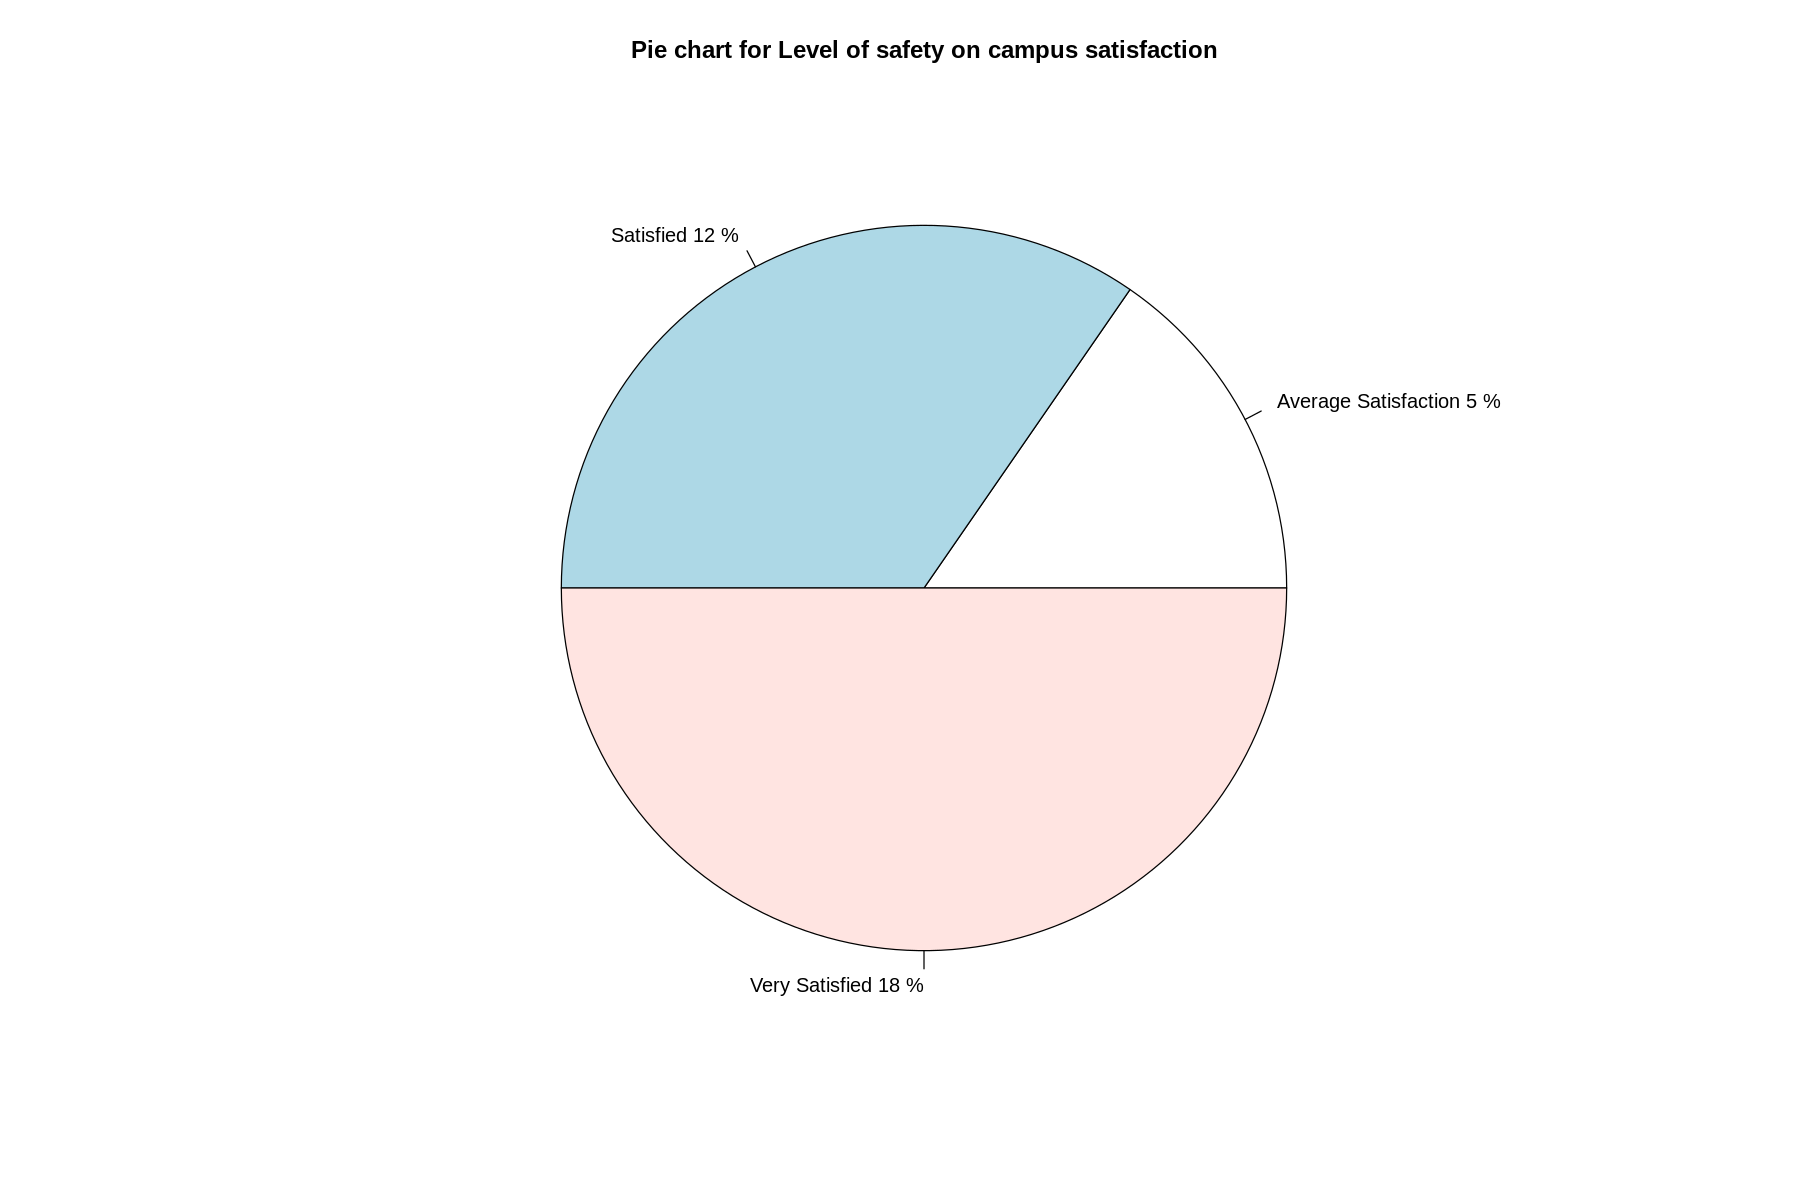

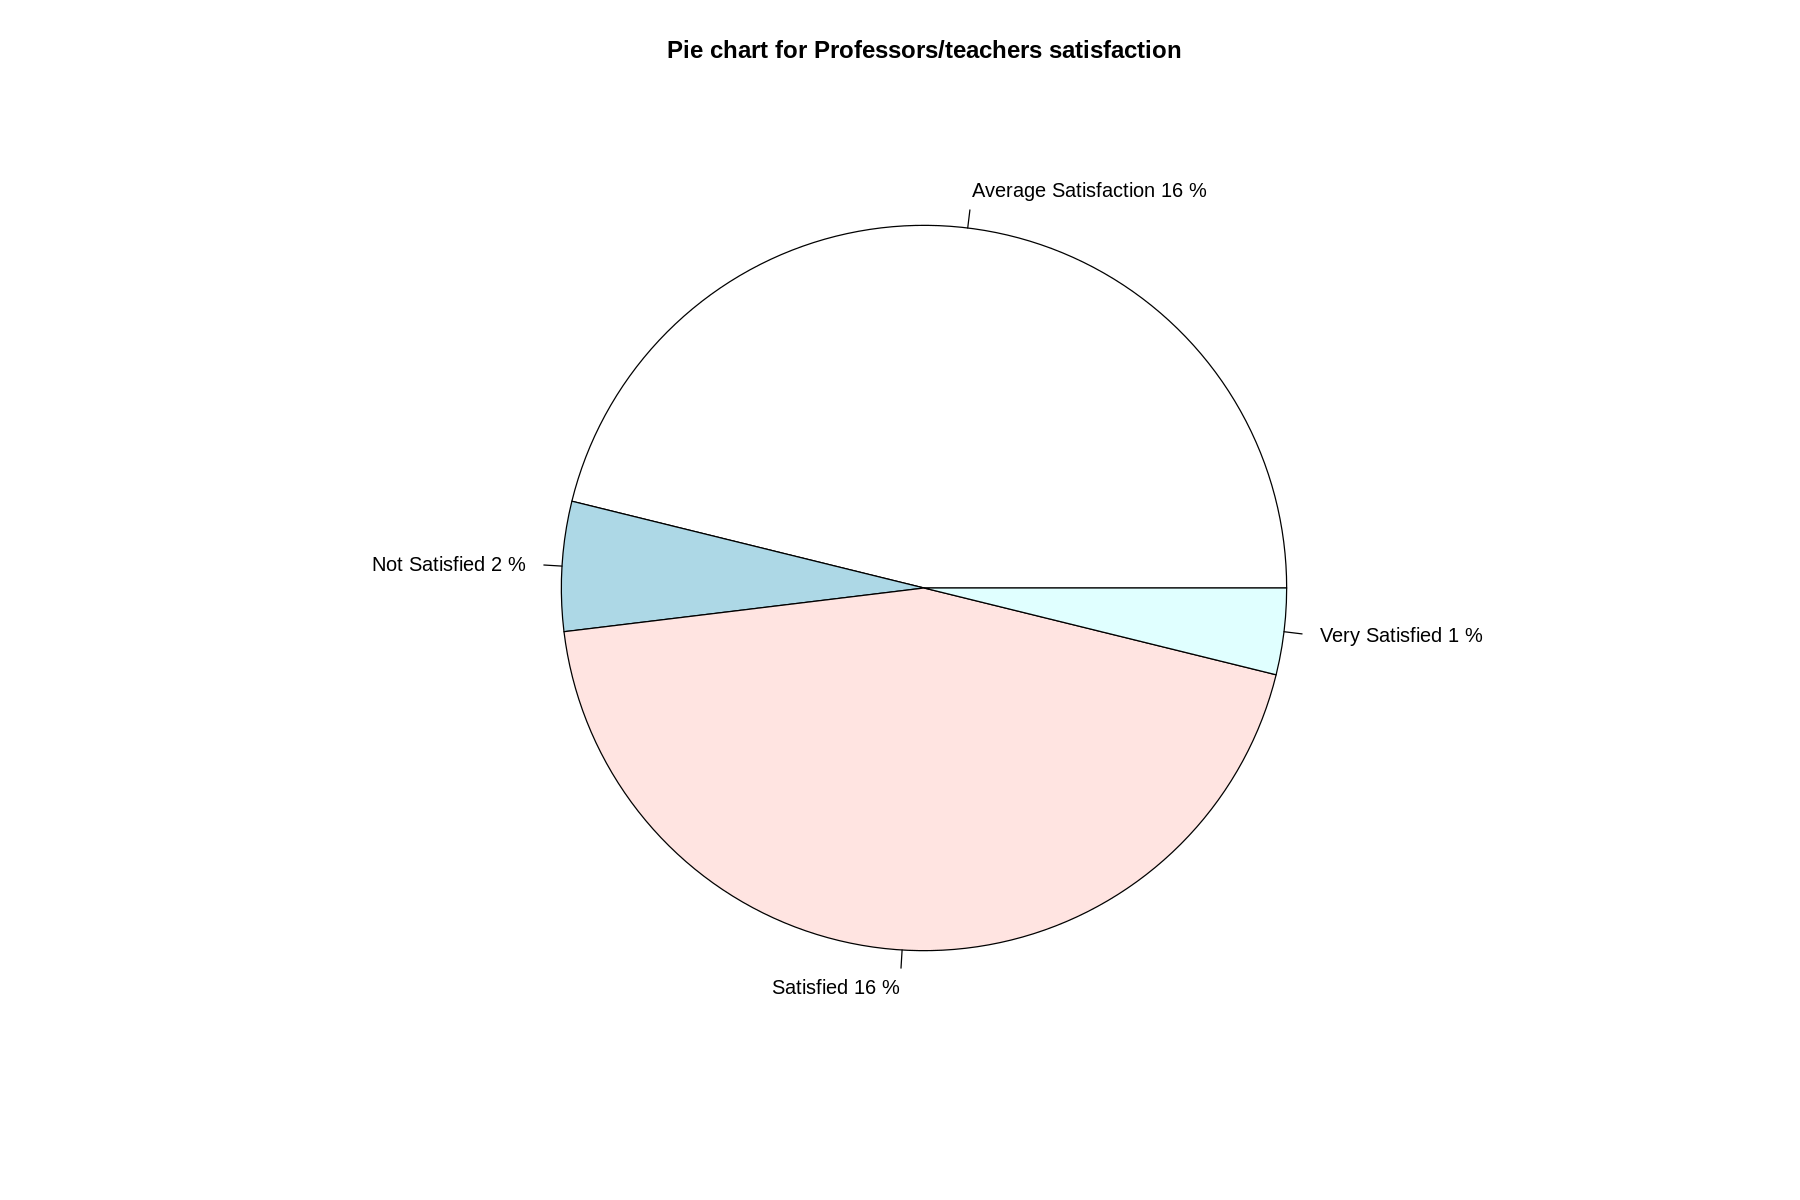

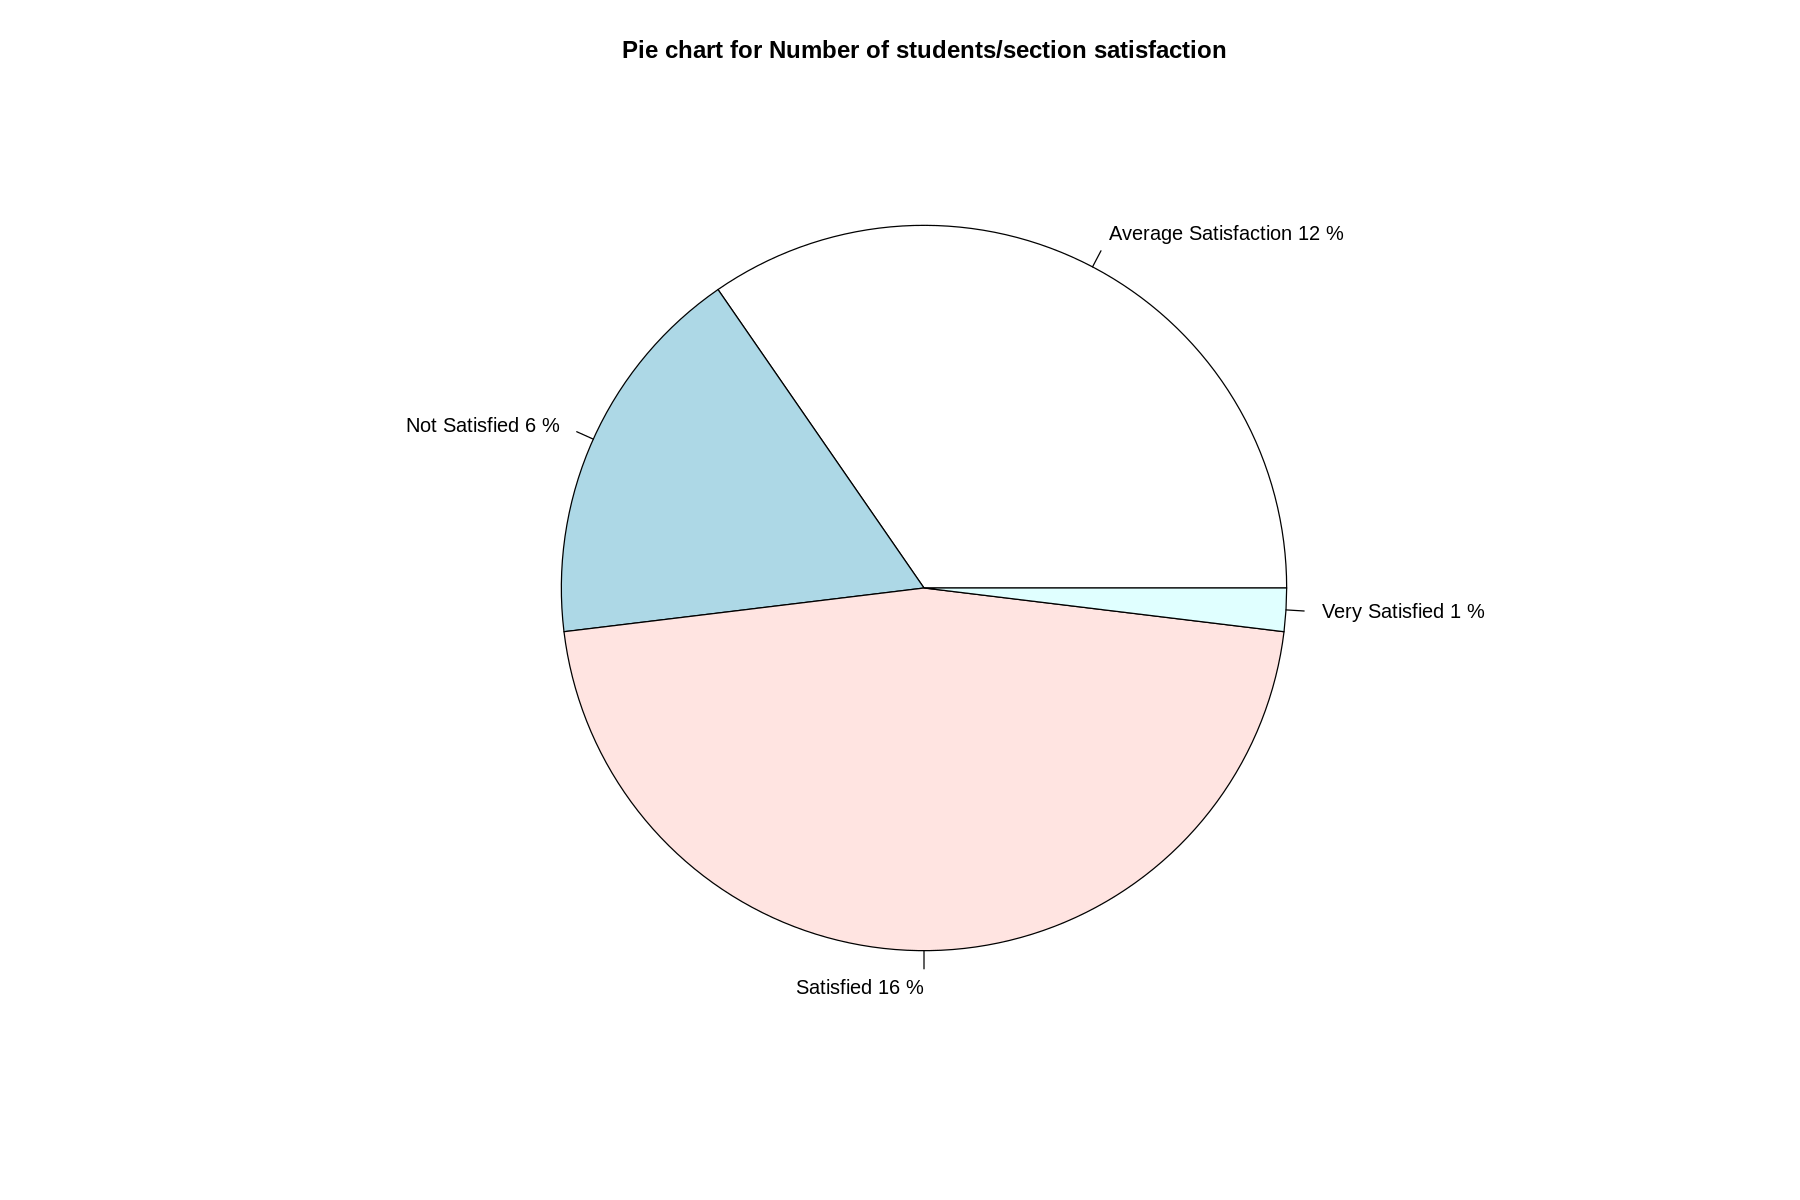

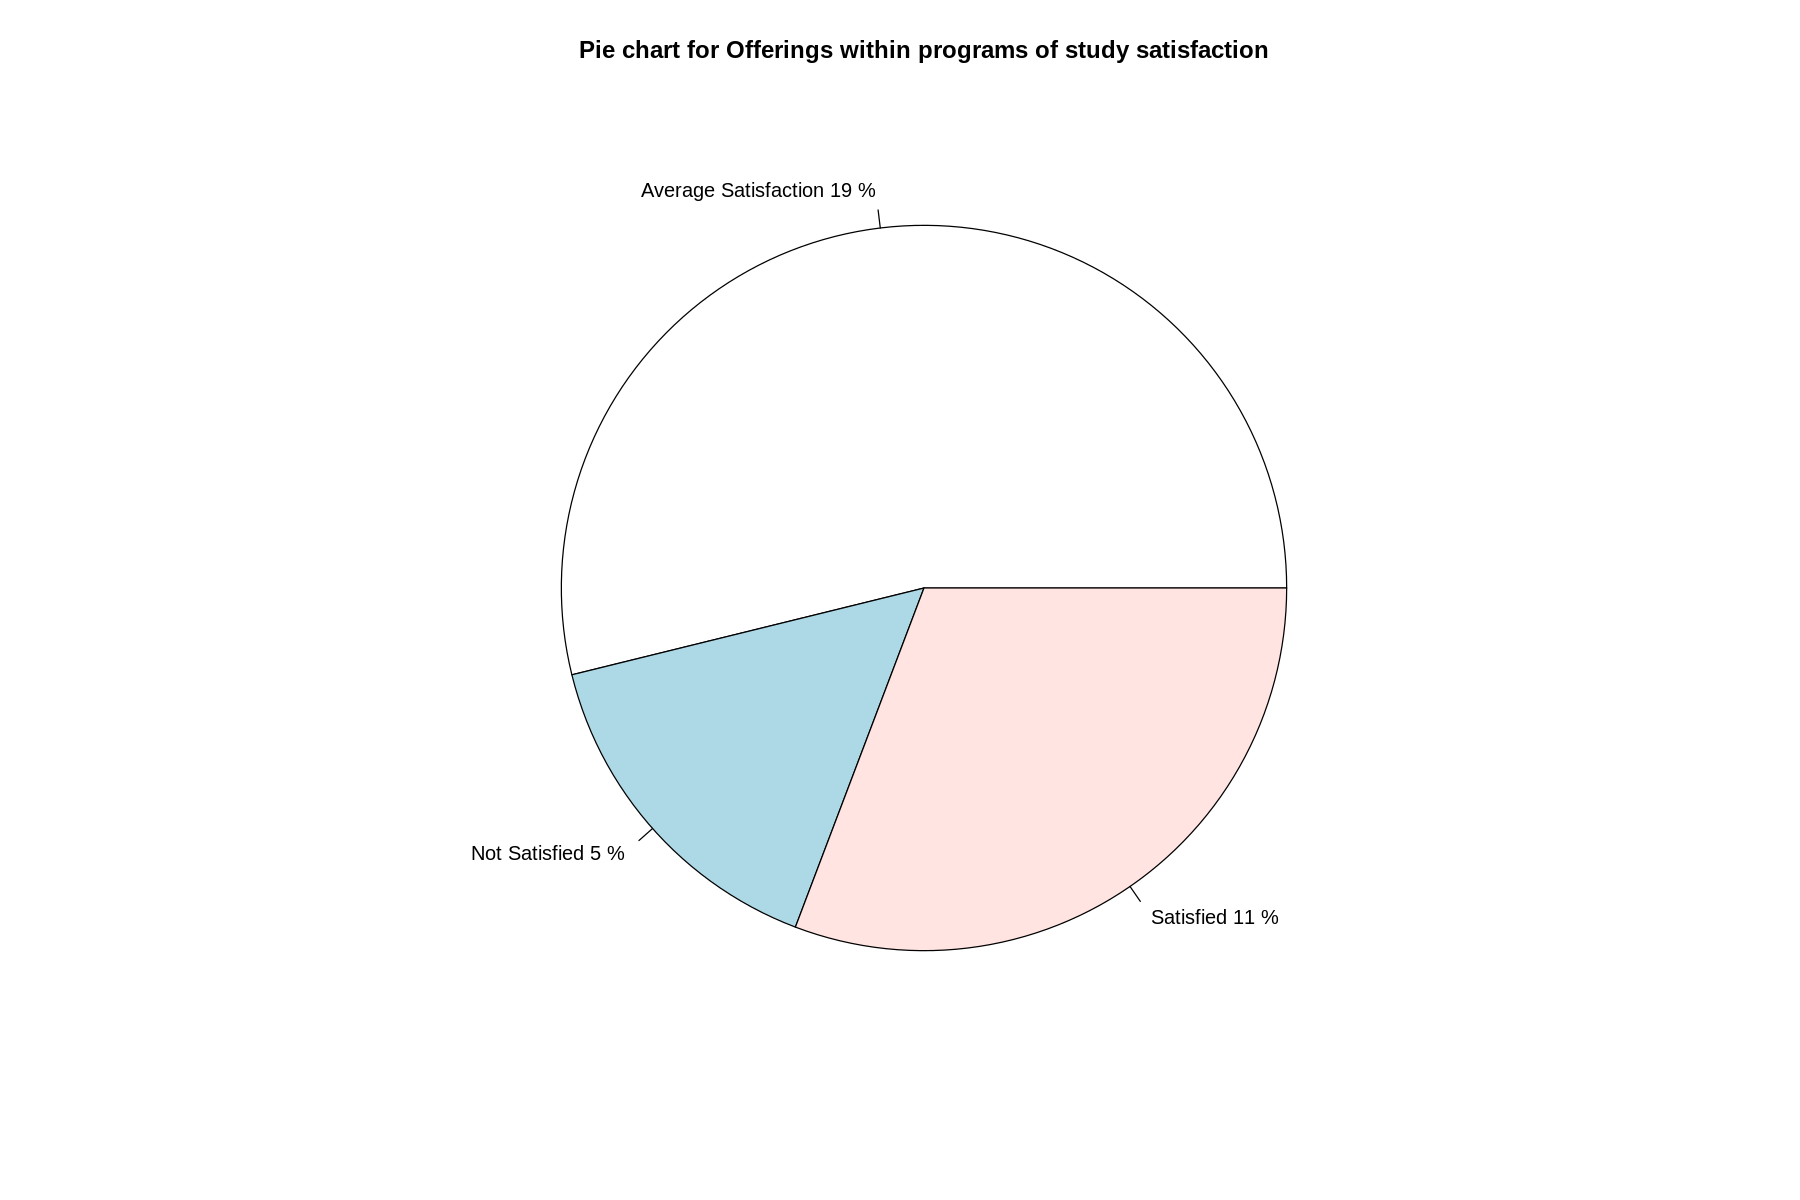

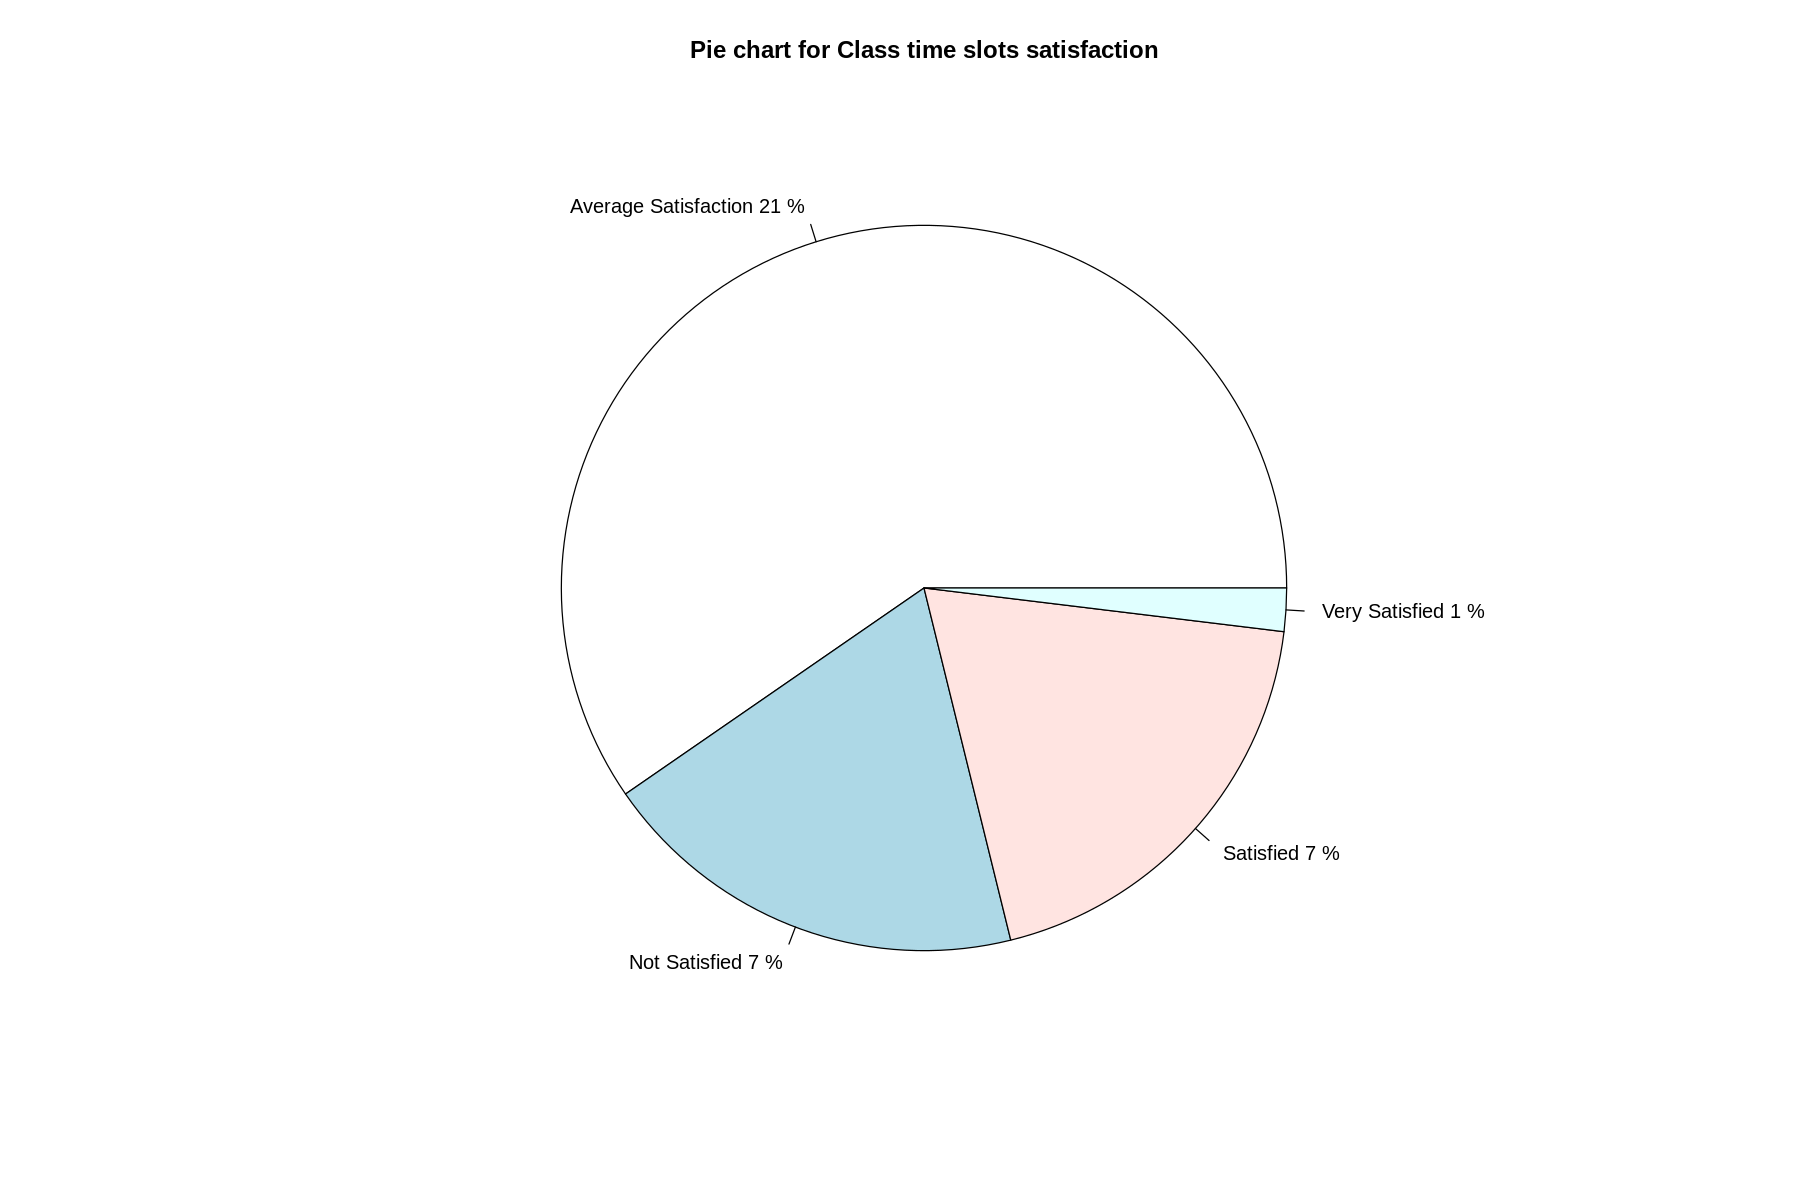

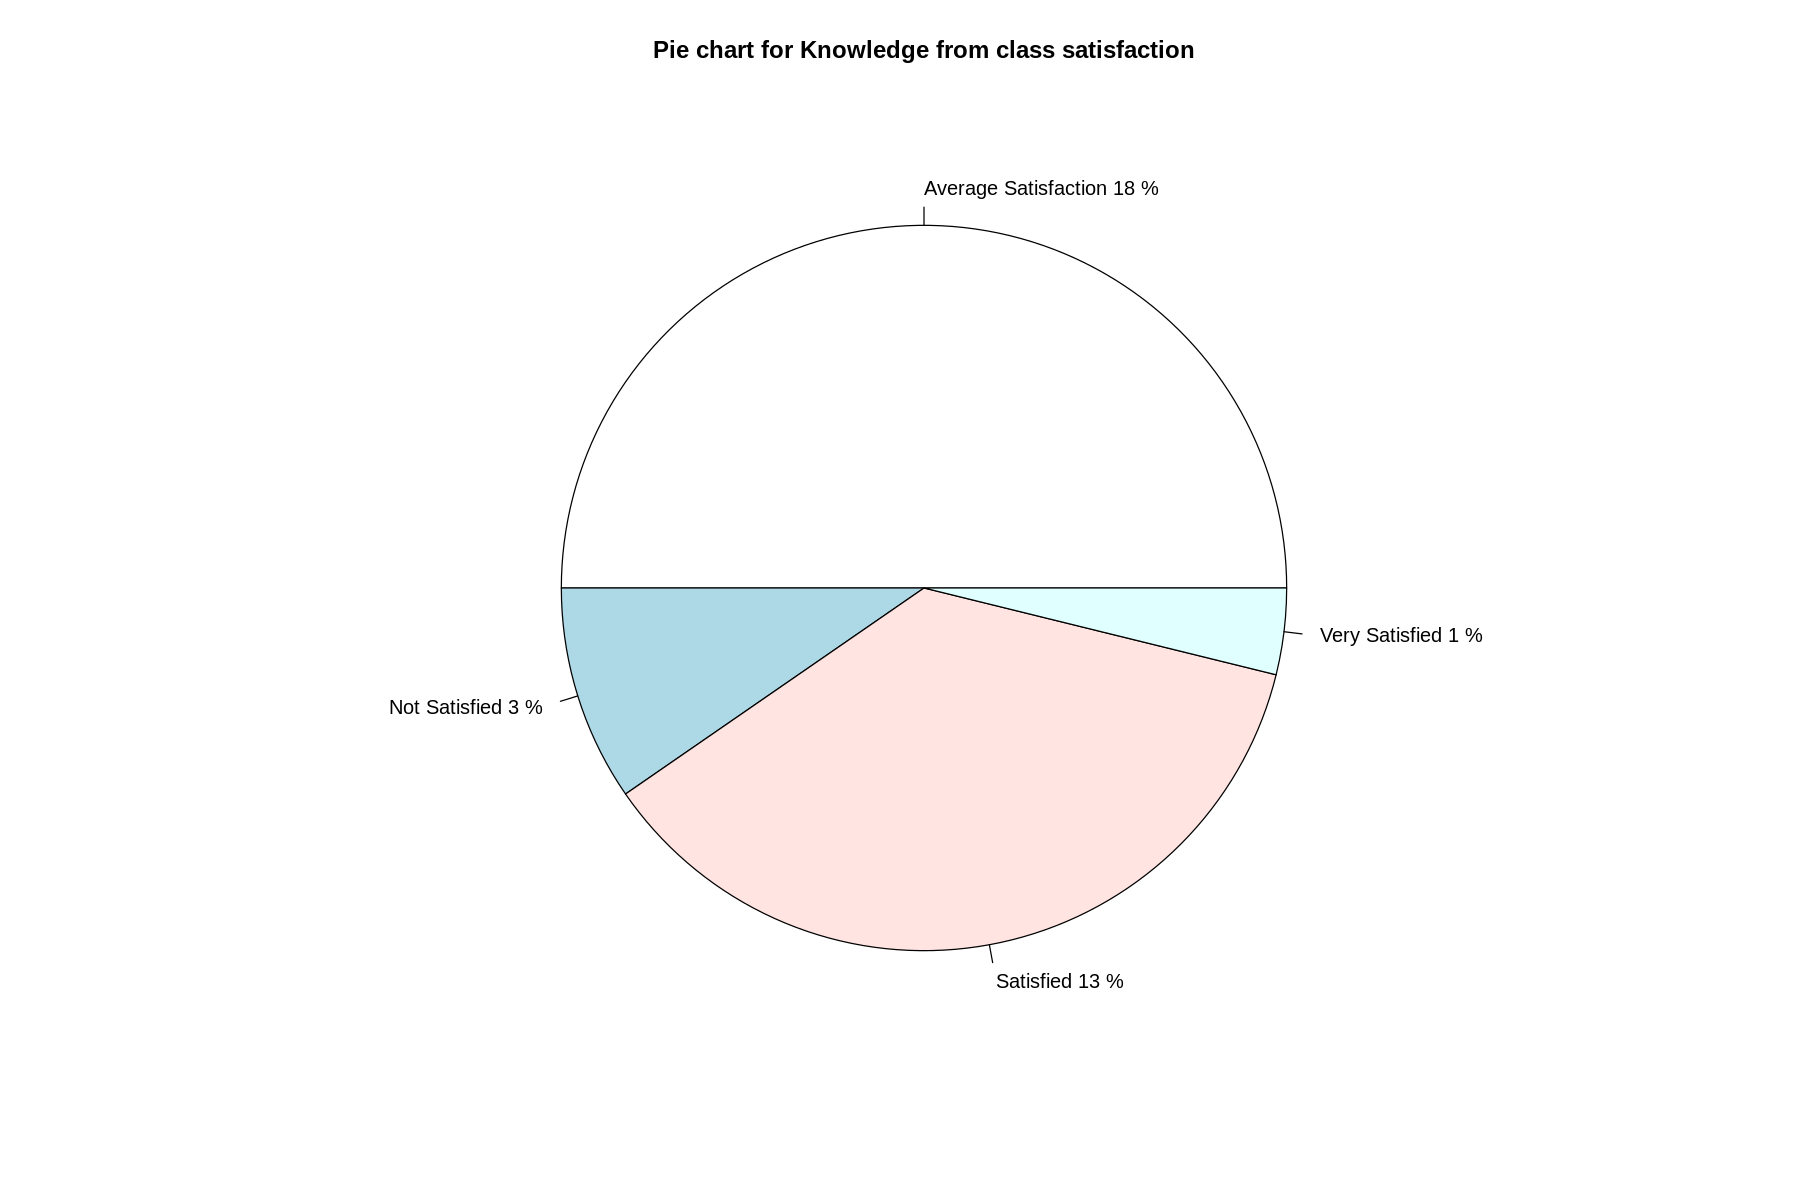

In [ ]:
#interpreting cluster 2
options(repr.plot.width=15, repr.plot.height=10)
for (col in col_names){
    if(col != 'CGPA' && col != 'ID'){ #no pie plot for CGPA and ID column
      pct <- round(100*table(sub2[[col]])/147)
      pie(table(sub2[[col]]), main = paste("Pie chart for",col), labels = paste(names(table(sub2[[col]])), sep = " ", pct, "%"))
    }
}

In [ ]:
#counting num of occurence of unique values for each colum 
for (col in col_names[(-1)]){
      print(col)
      print(data.frame(table(sub2[[col]])))
      print('______________________________')
}

[1] "Gender"
    Var1 Freq
1 Female   26
2   Male   26
[1] "______________________________"
[1] "Academic Classification"
                                    Var1 Freq
1 Freshman (earned between 0-29 credits)   51
2  Junior (earned between 60-89 credits)    1
[1] "______________________________"
[1] "CGPA"
   Var1 Freq
1   2.0    1
2  2.04    1
3   2.3    1
4  2.44    1
5   2.6    1
6  2.68    1
7   2.7    1
8  2.89    1
9   2.9    2
10 3.17    1
11 3.18    1
12 3.19    1
13  3.6    3
14  3.8    2
15 3.82    1
16 3.97    1
17    4    2
18  4.0    1
19  N A    1
20  N/A   28
[1] "______________________________"
[1] "Current feeling about AUI"
                                   Var1 Freq
1               I am disappointed/upset   22
2       I am happy to be an AUI student   10
3 Same feeling I had before joining AUI   20
[1] "______________________________"
[1] "Current feeling about SSE"
  Var1 Freq
1    1    6
2    2   35
3    3   11
[1] "______________________________"
[1] "Food satisf

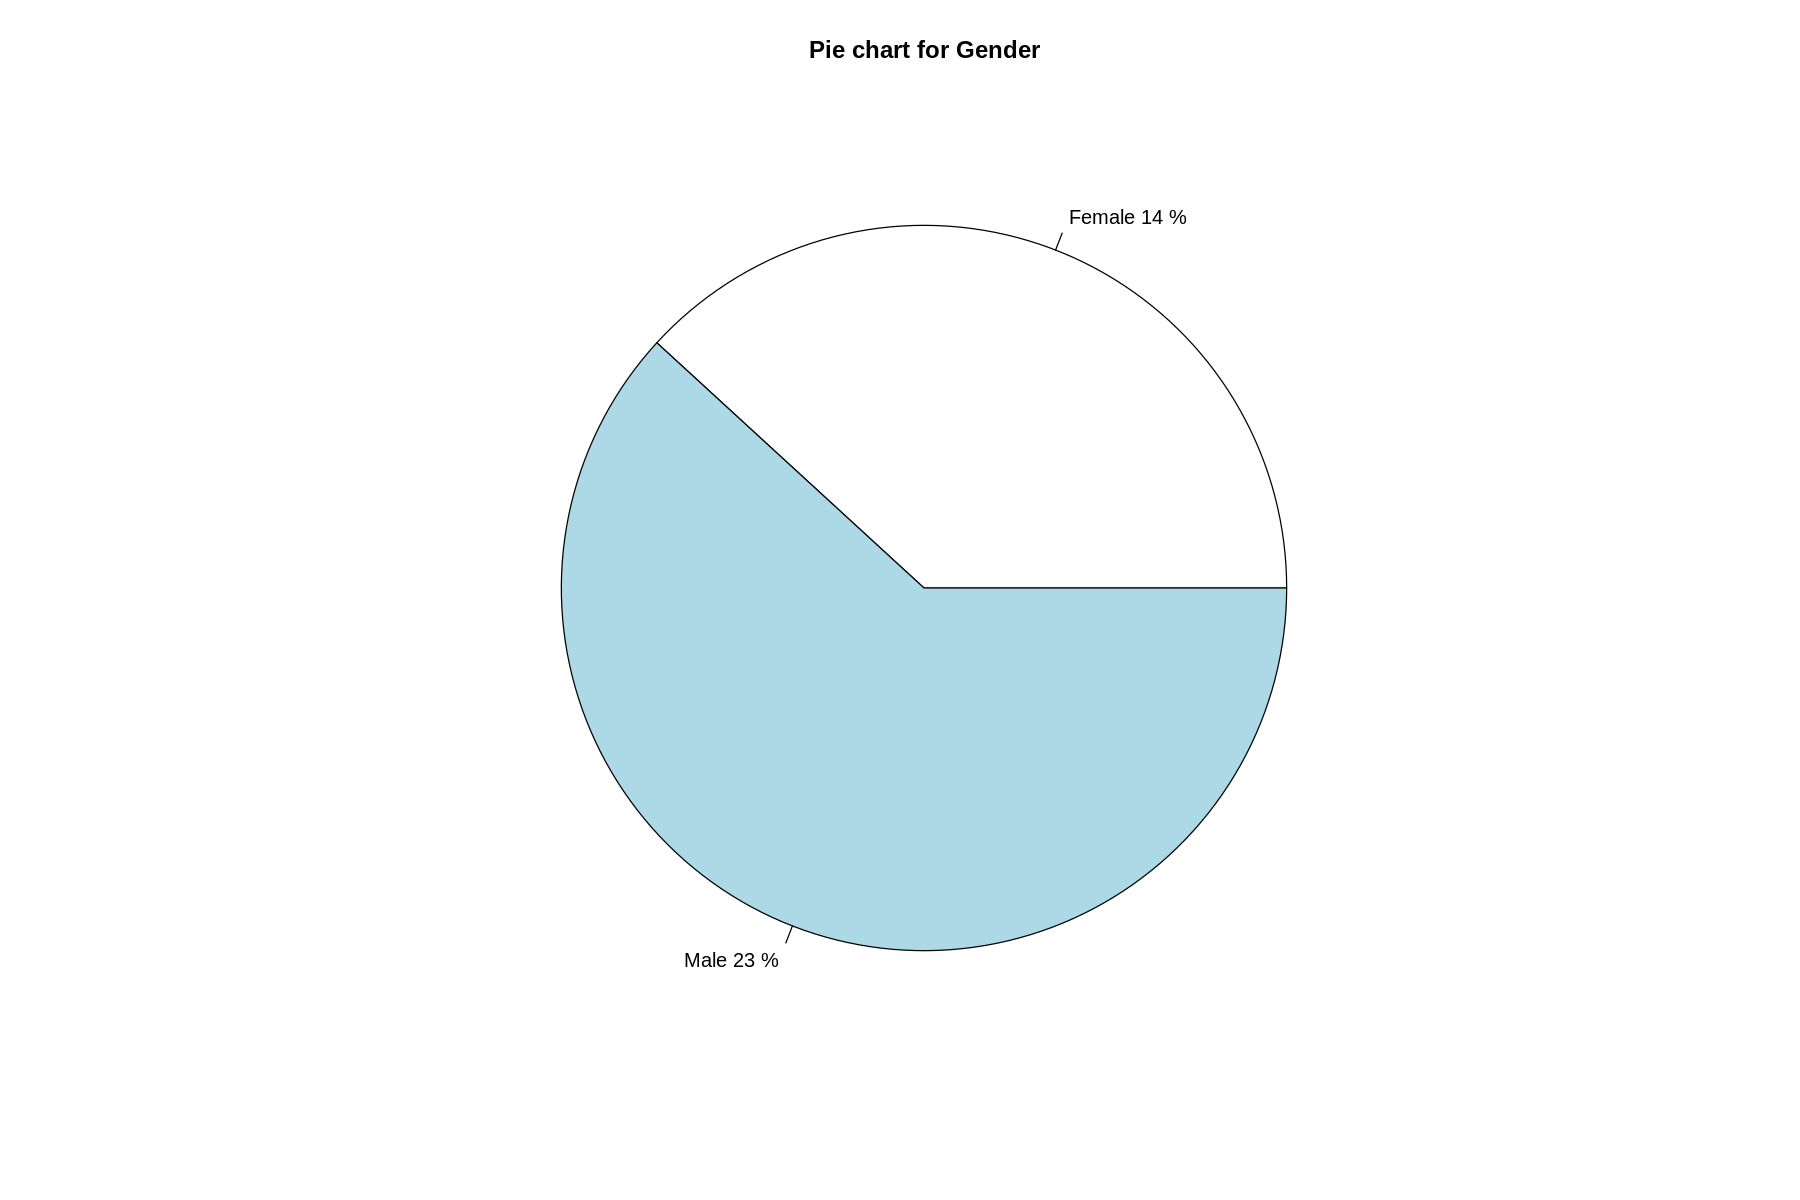

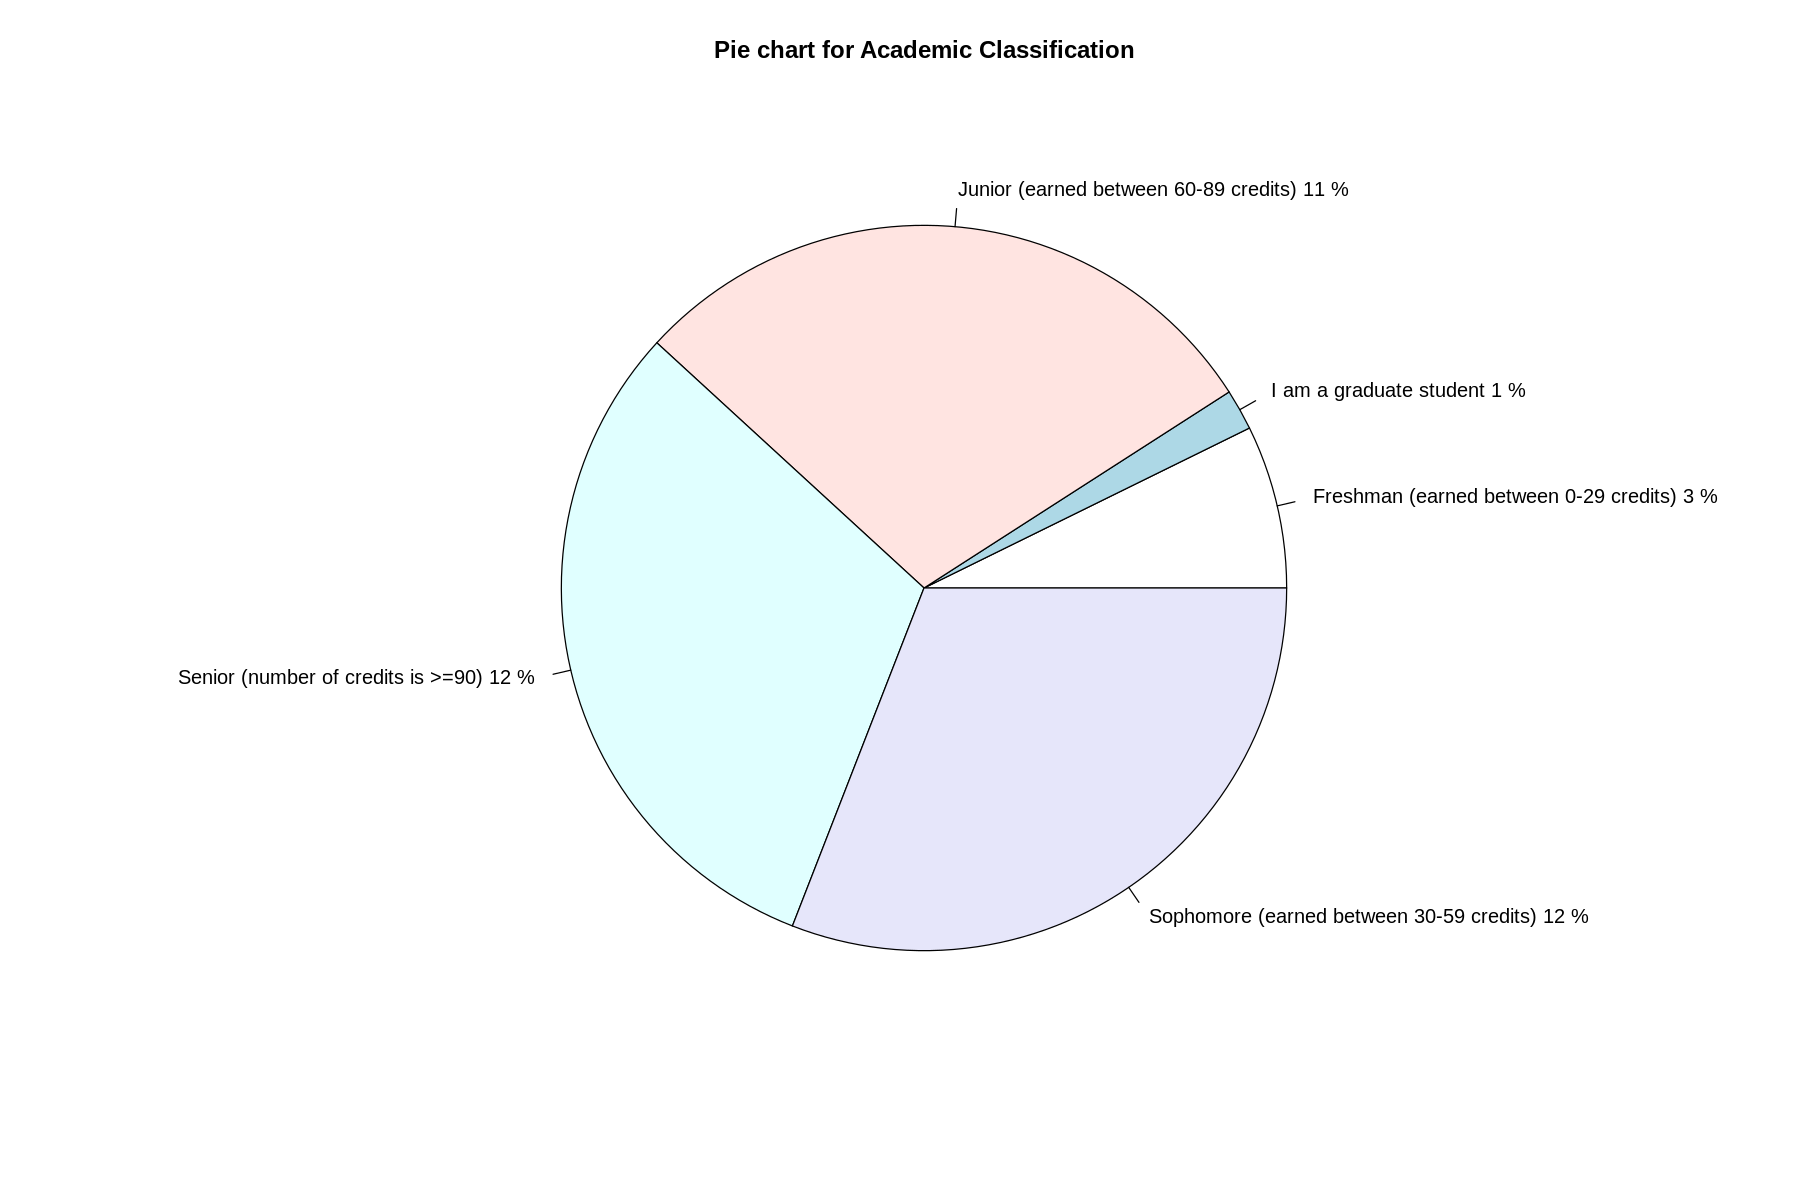

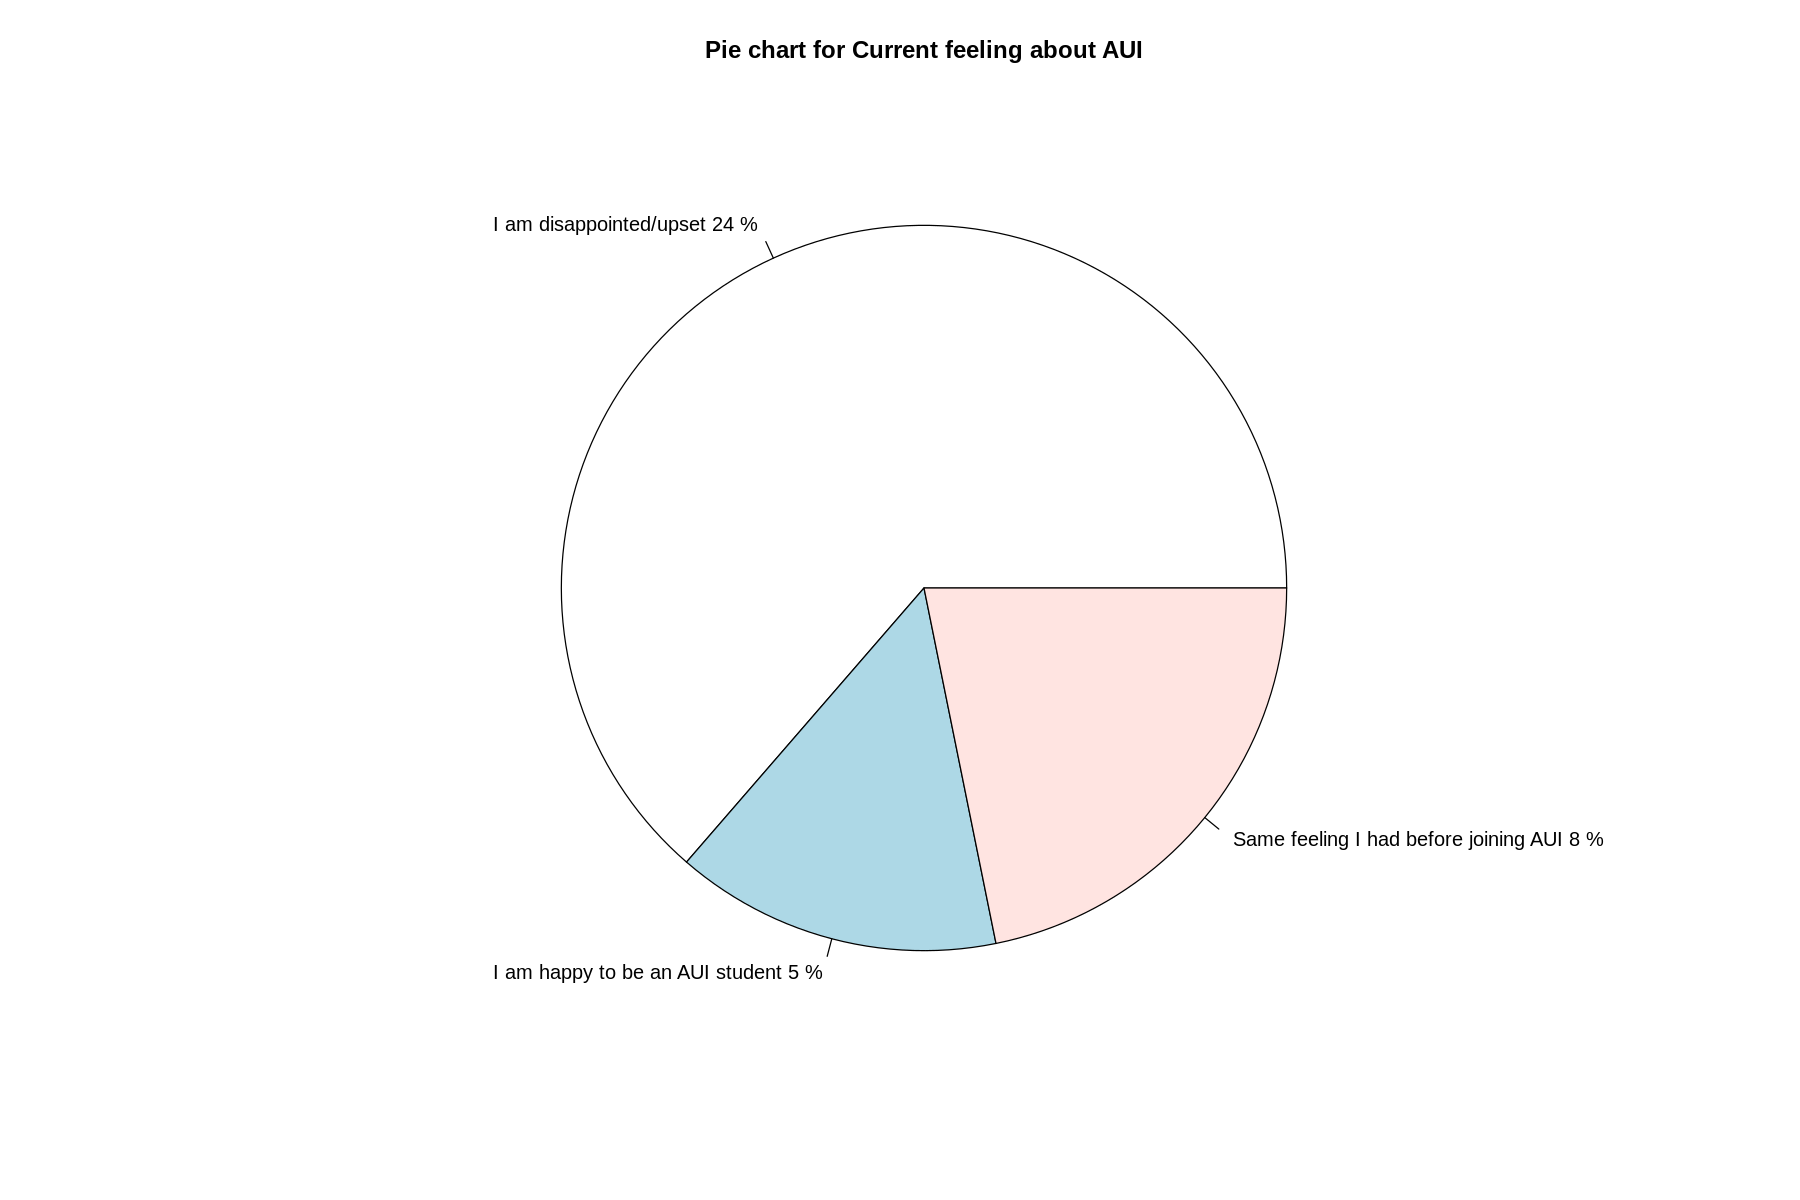

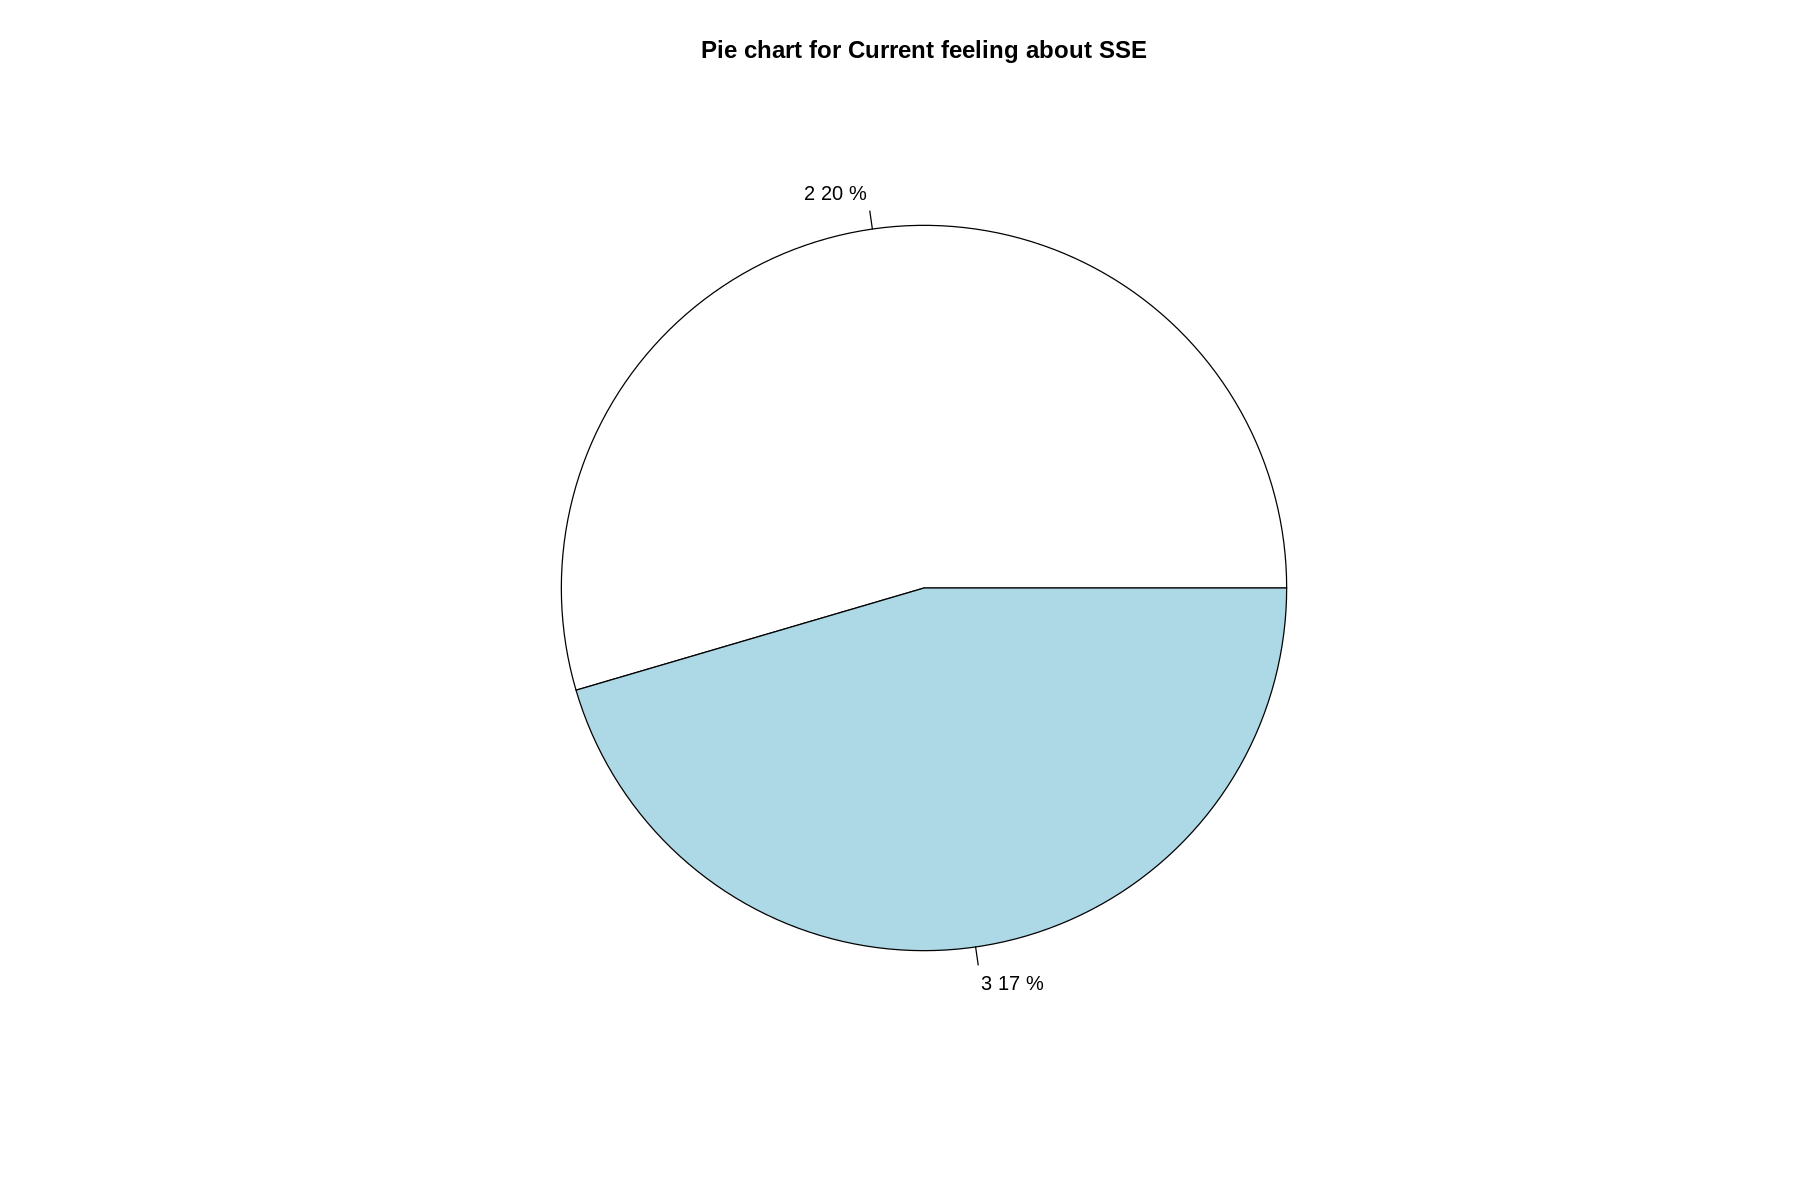

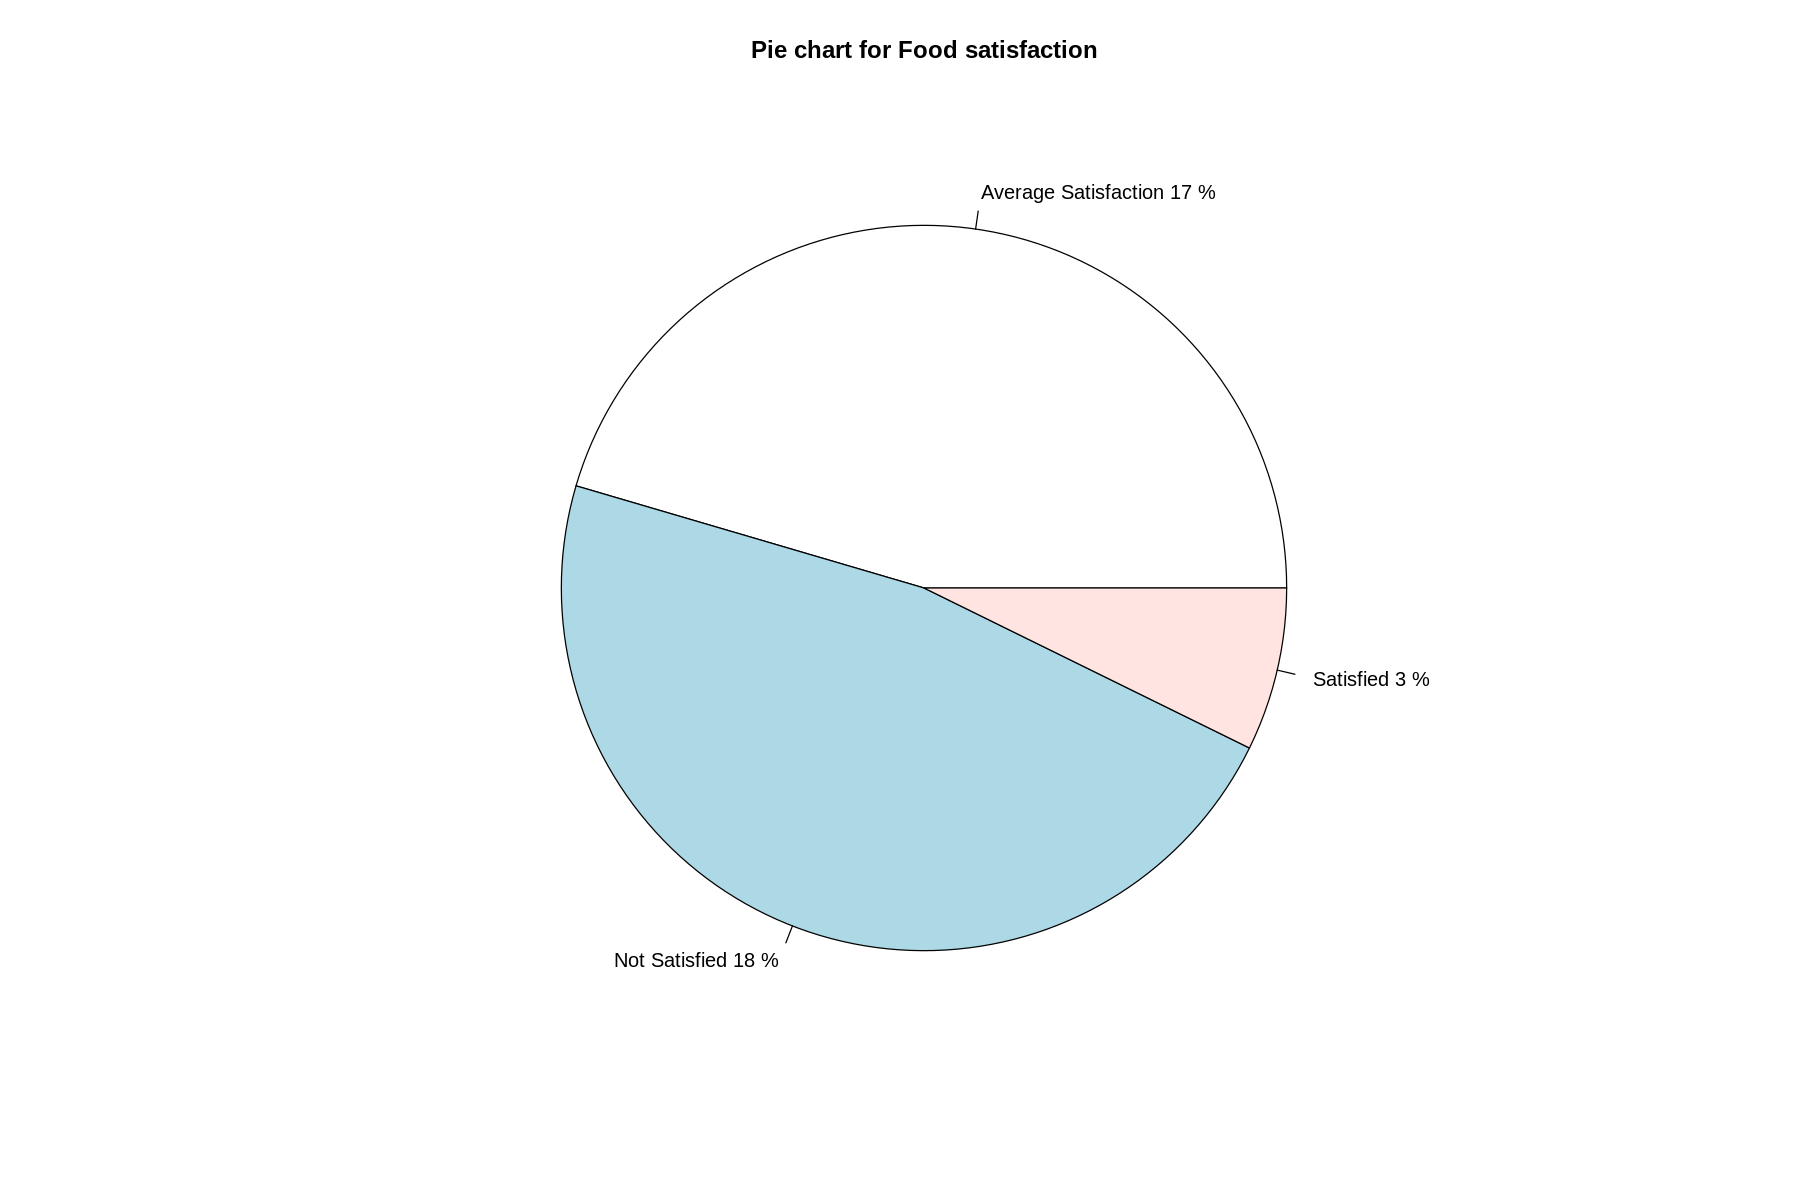

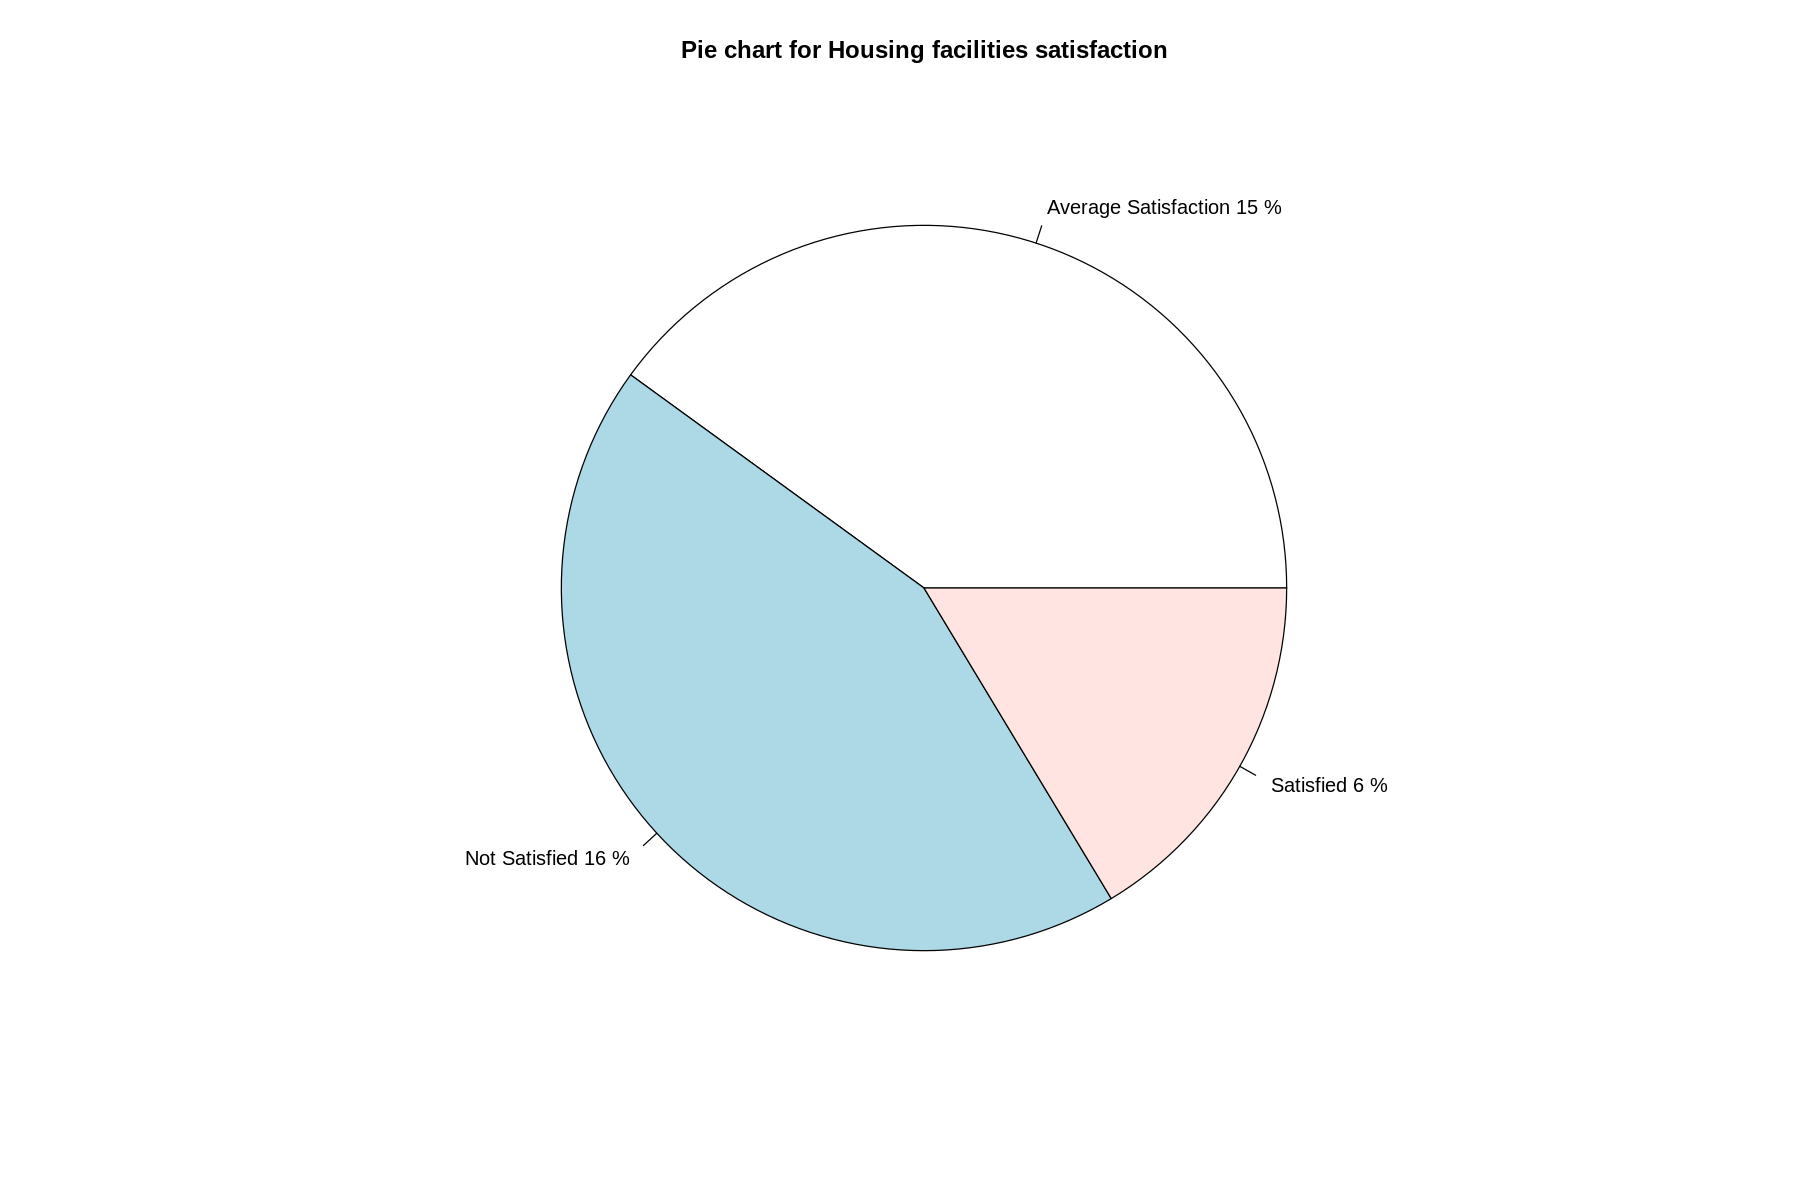

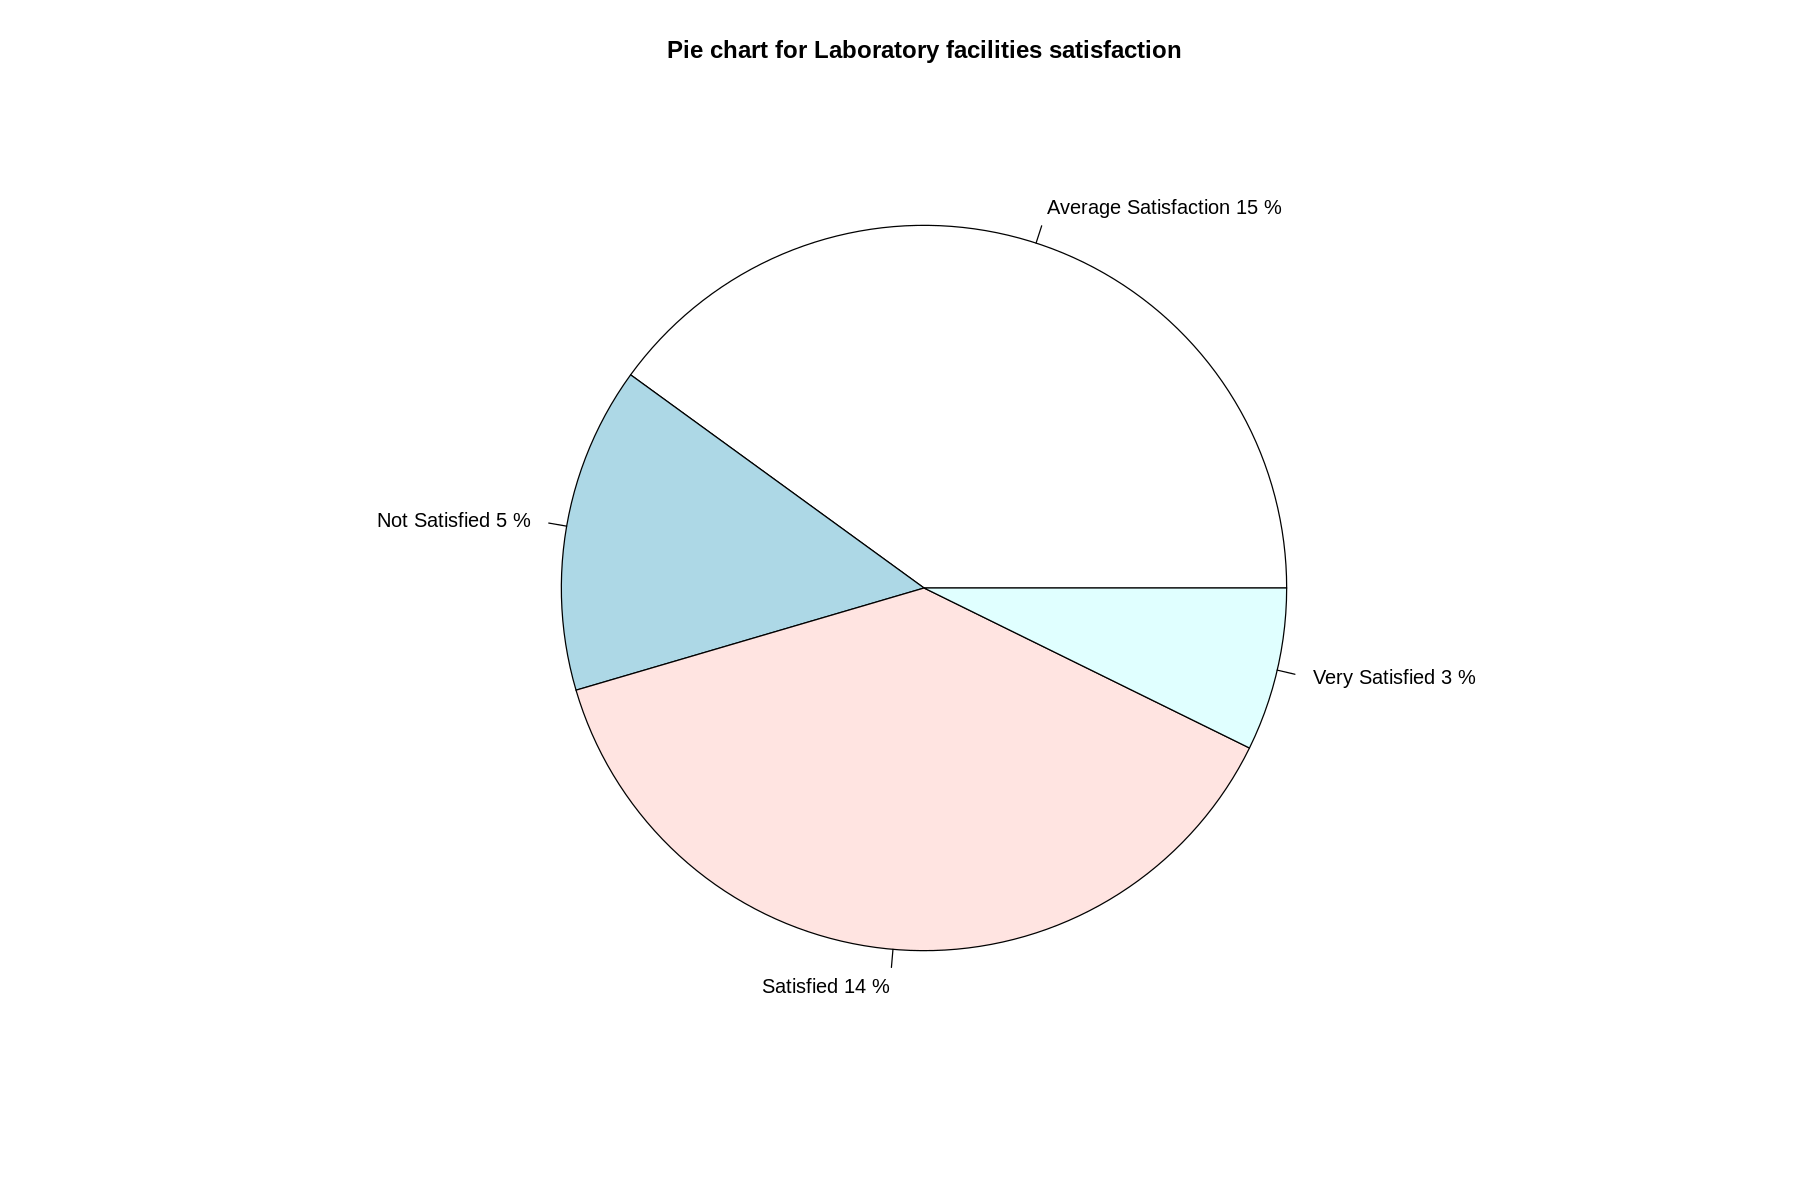

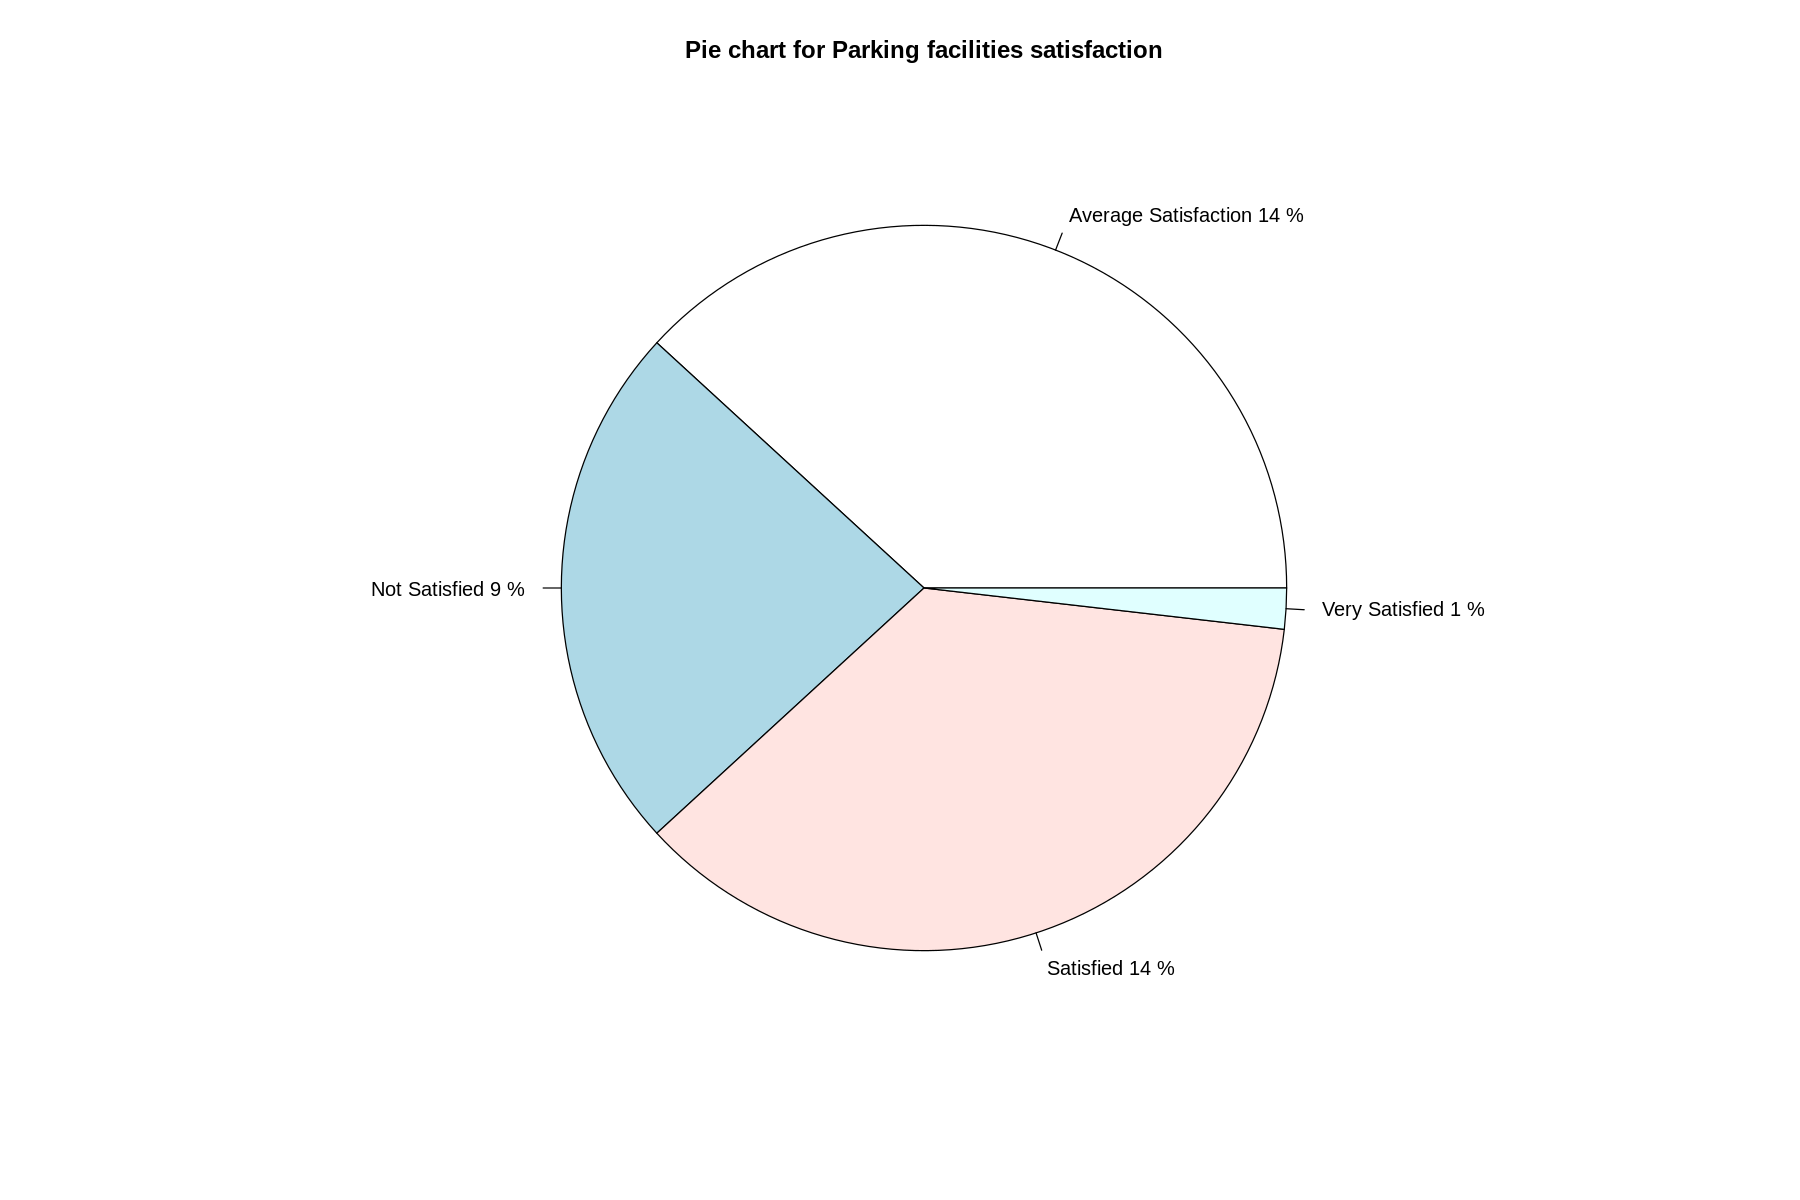

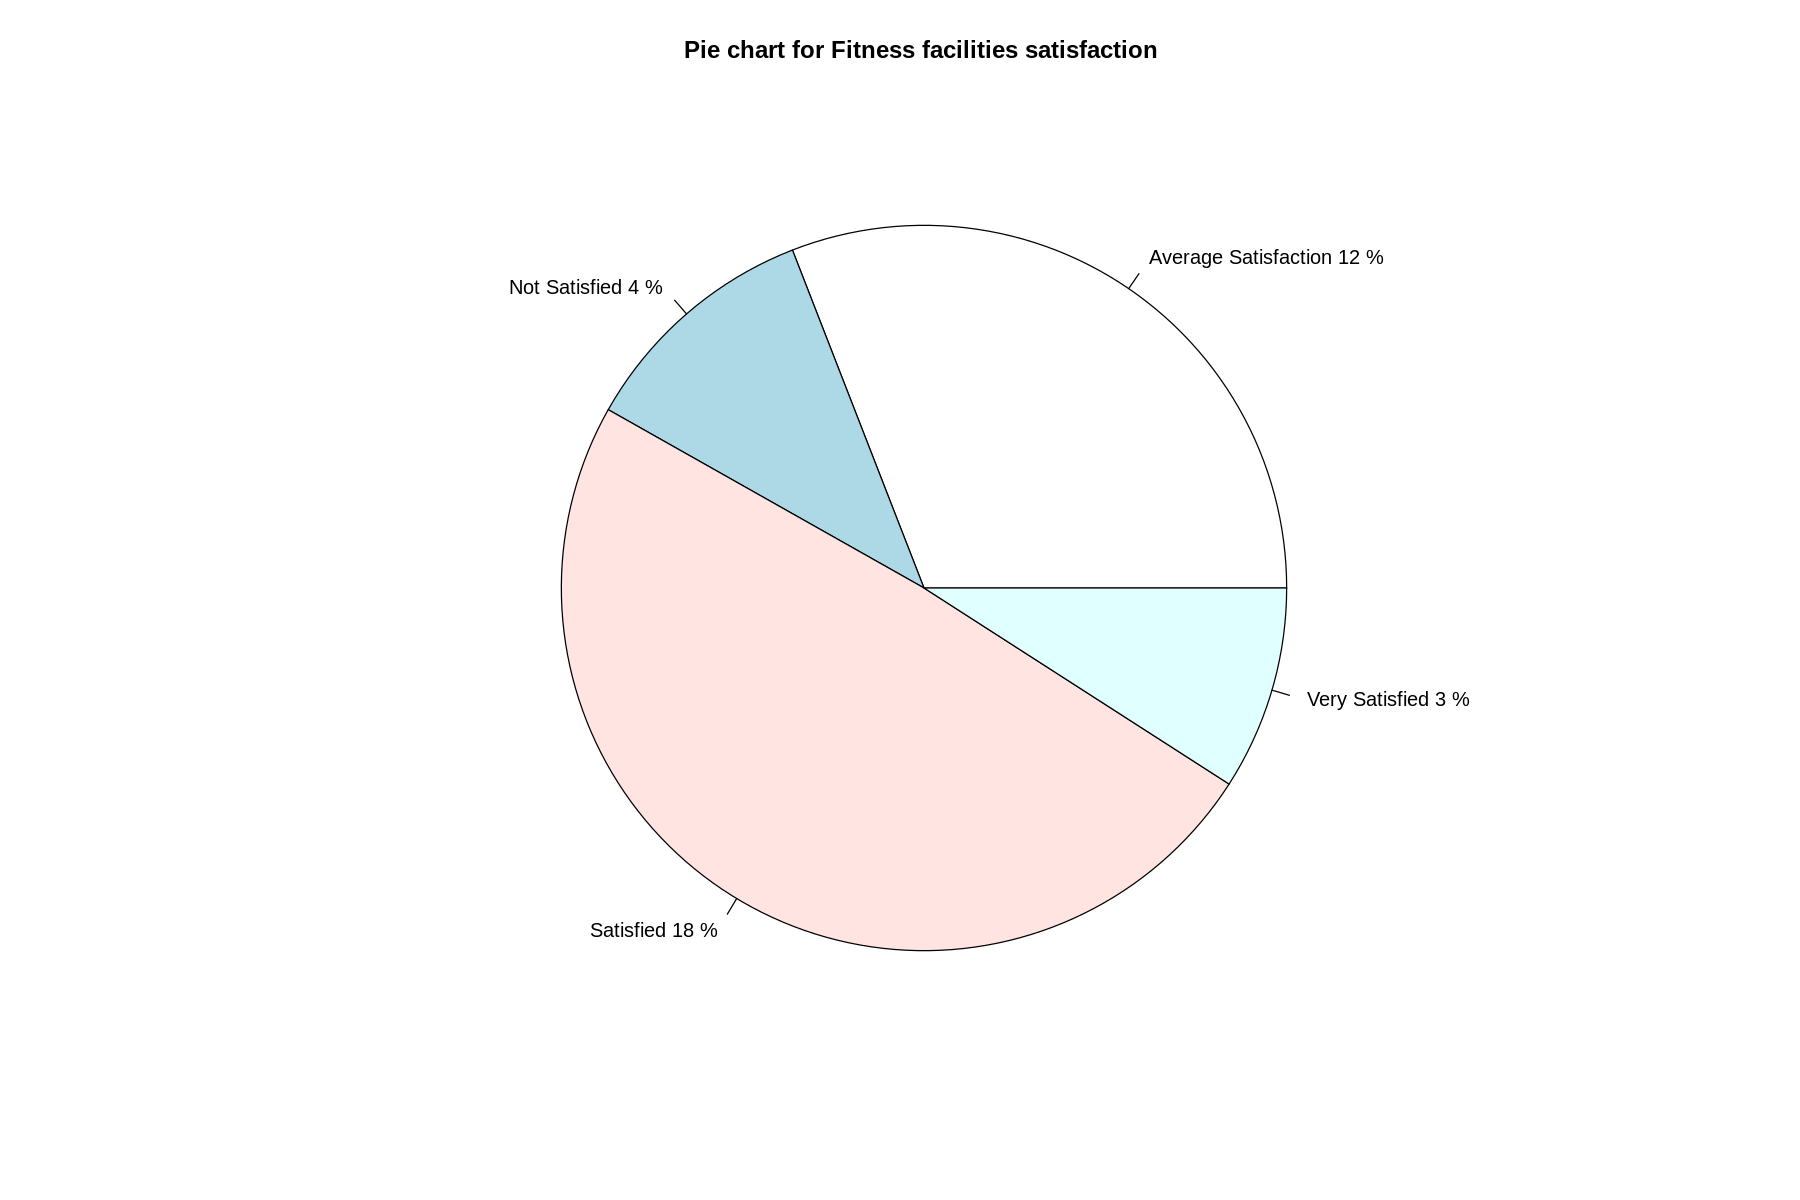

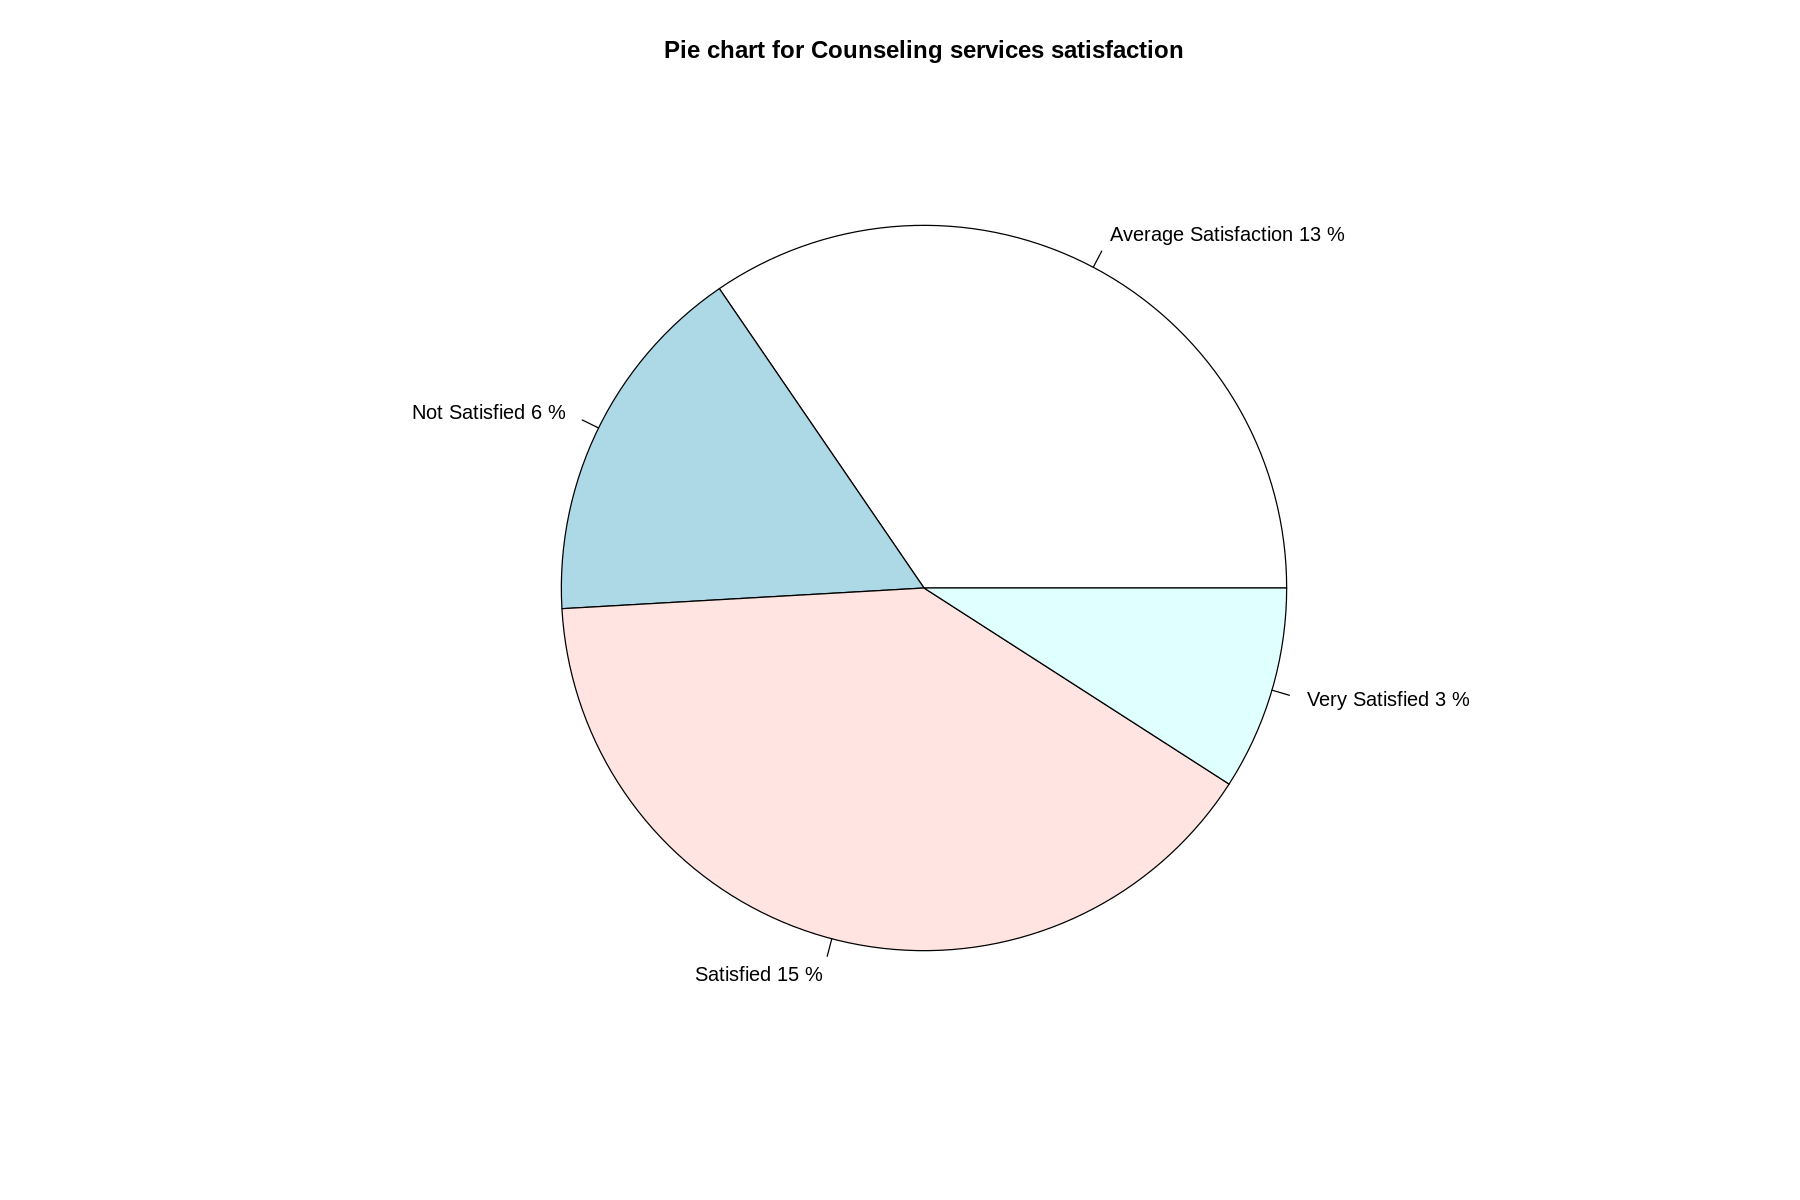

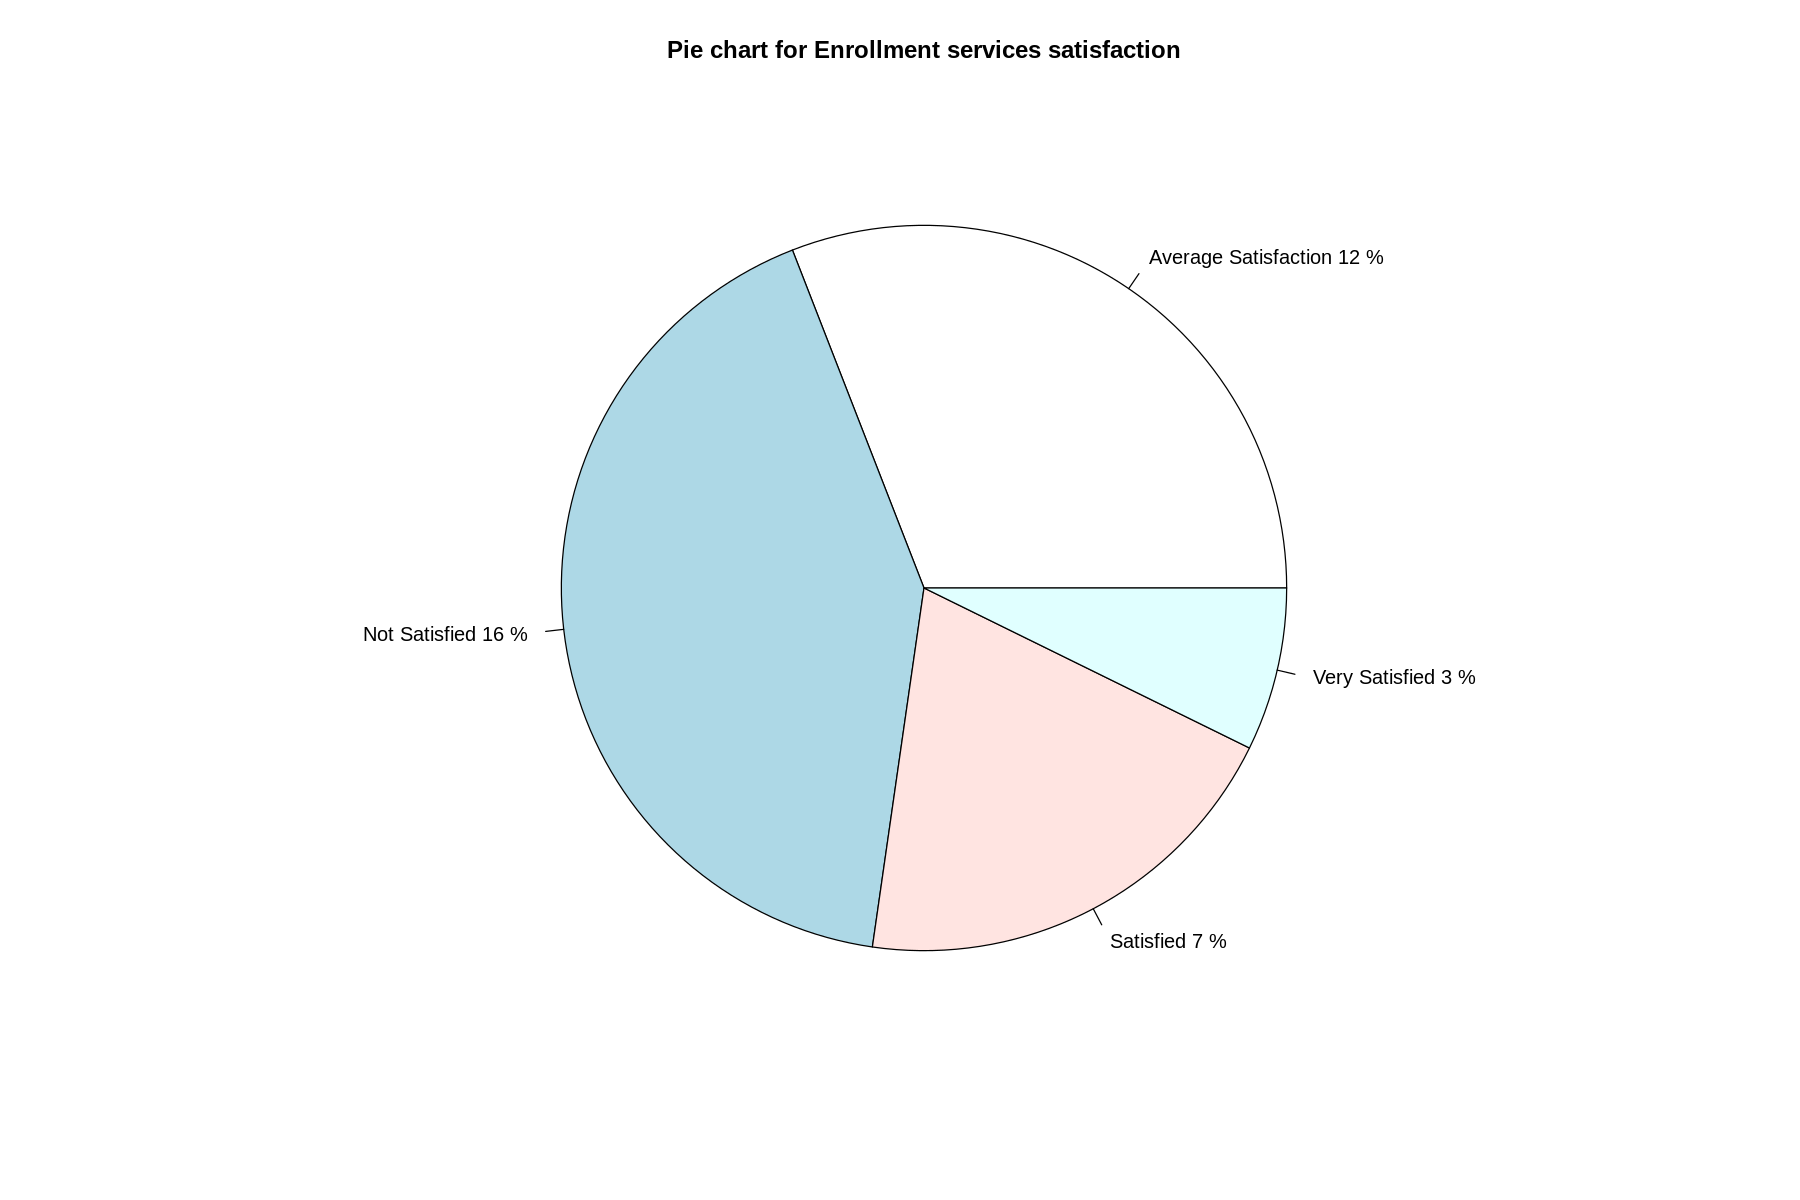

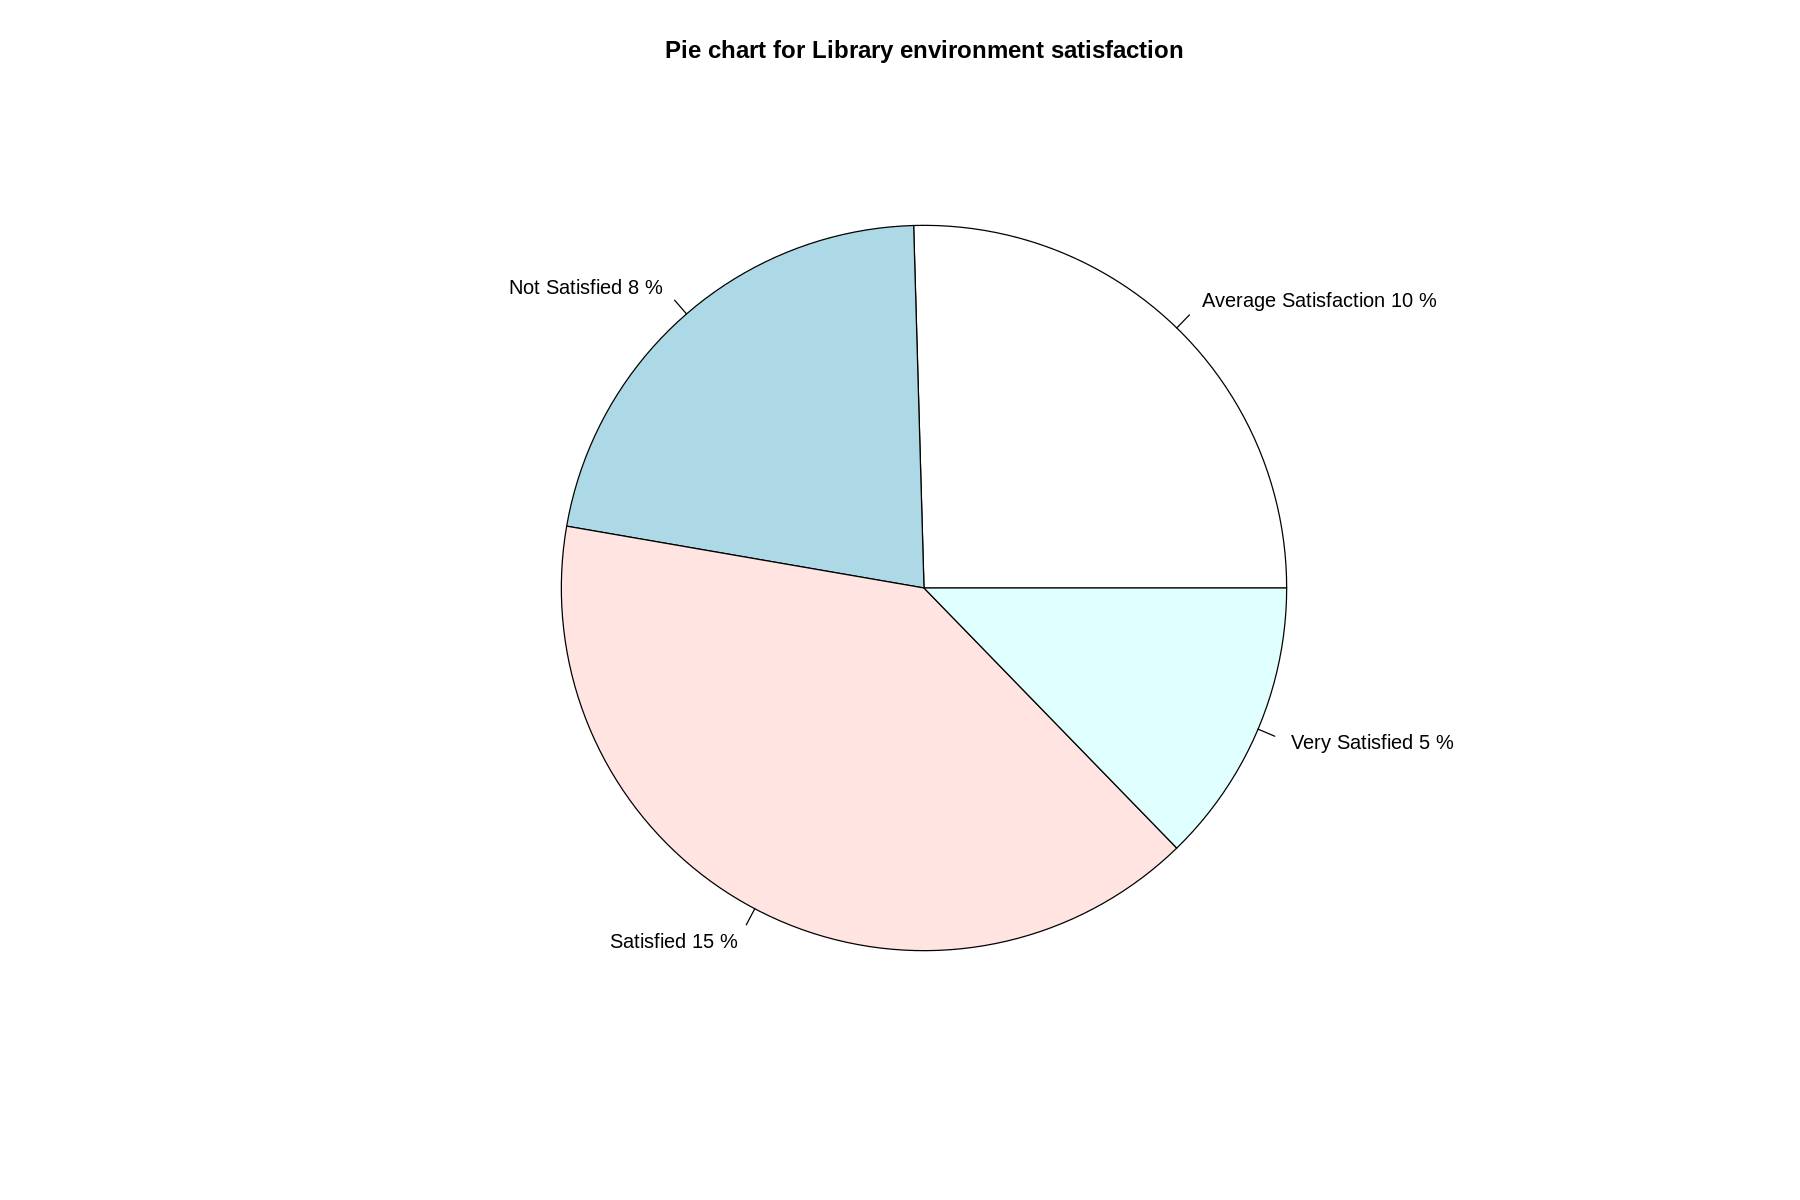

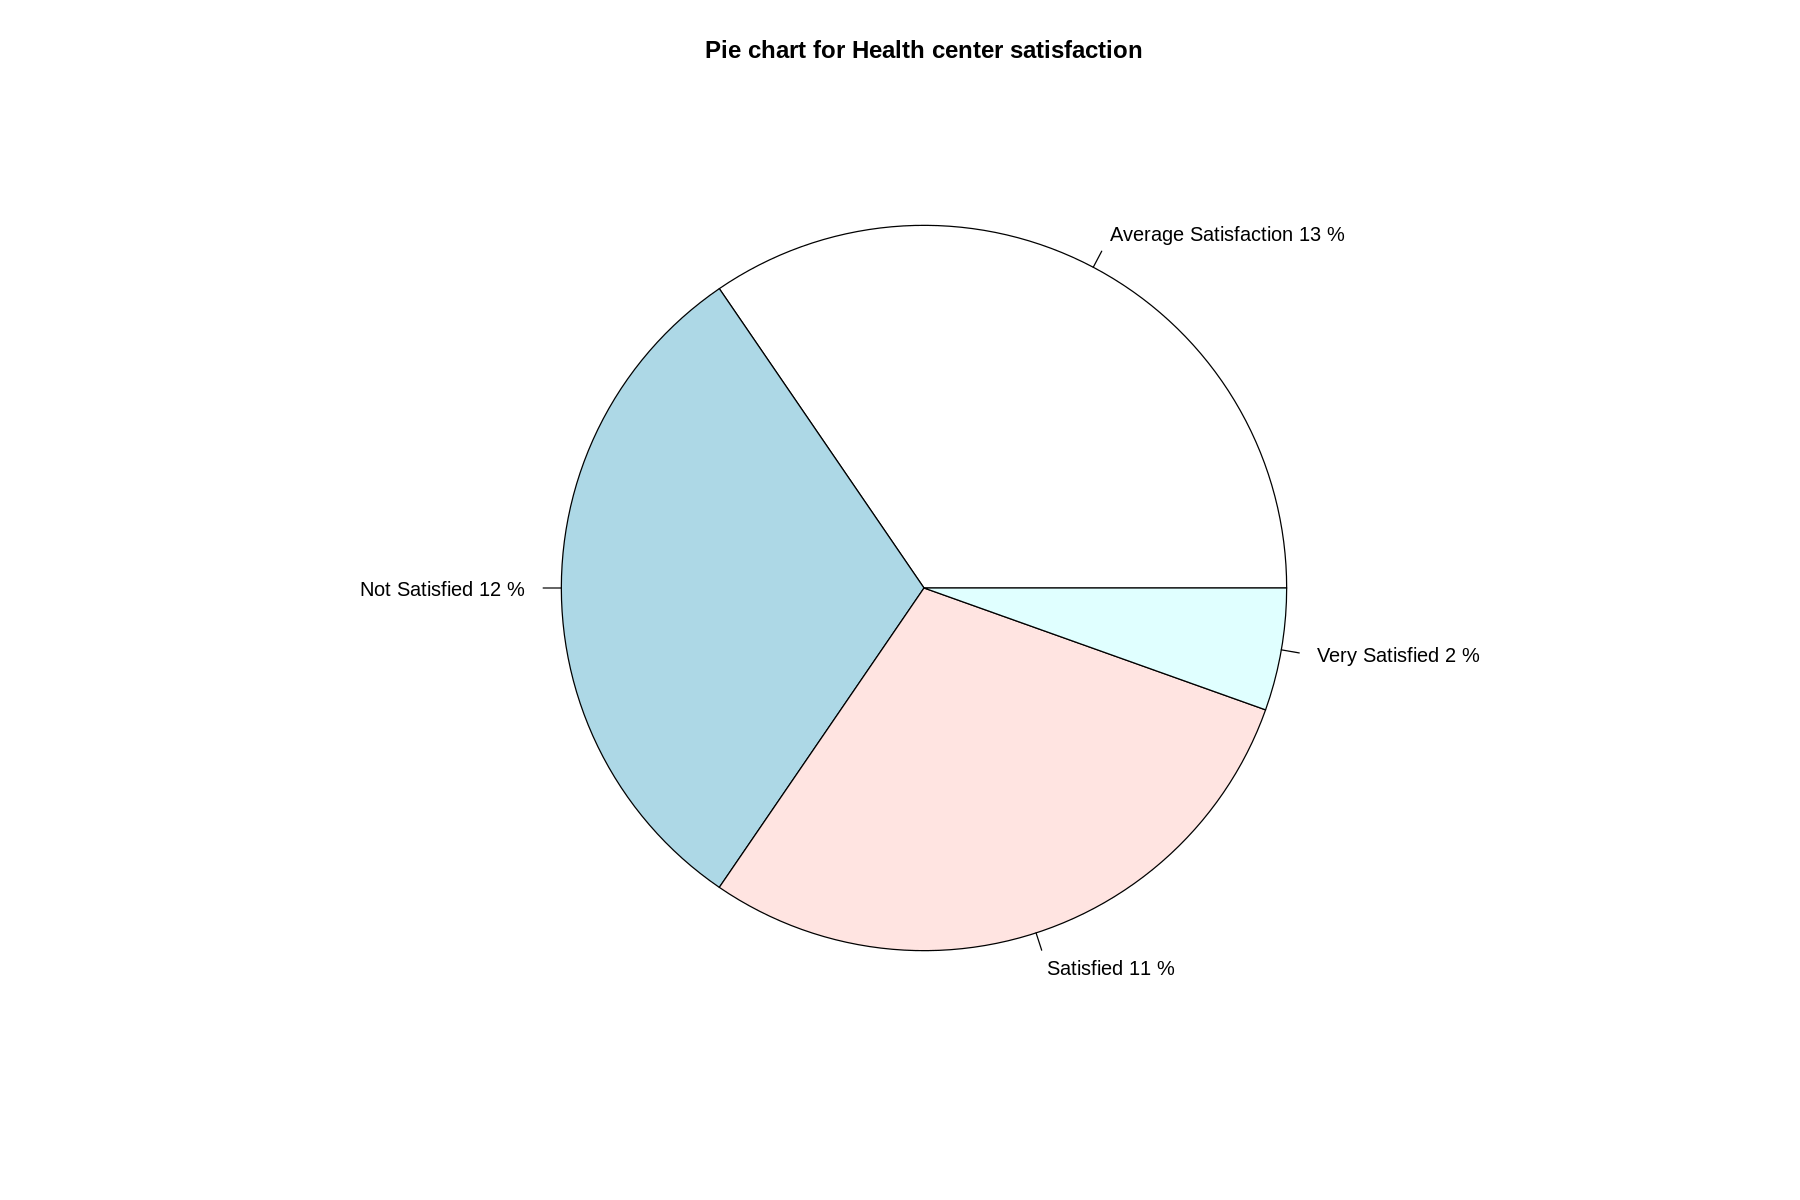

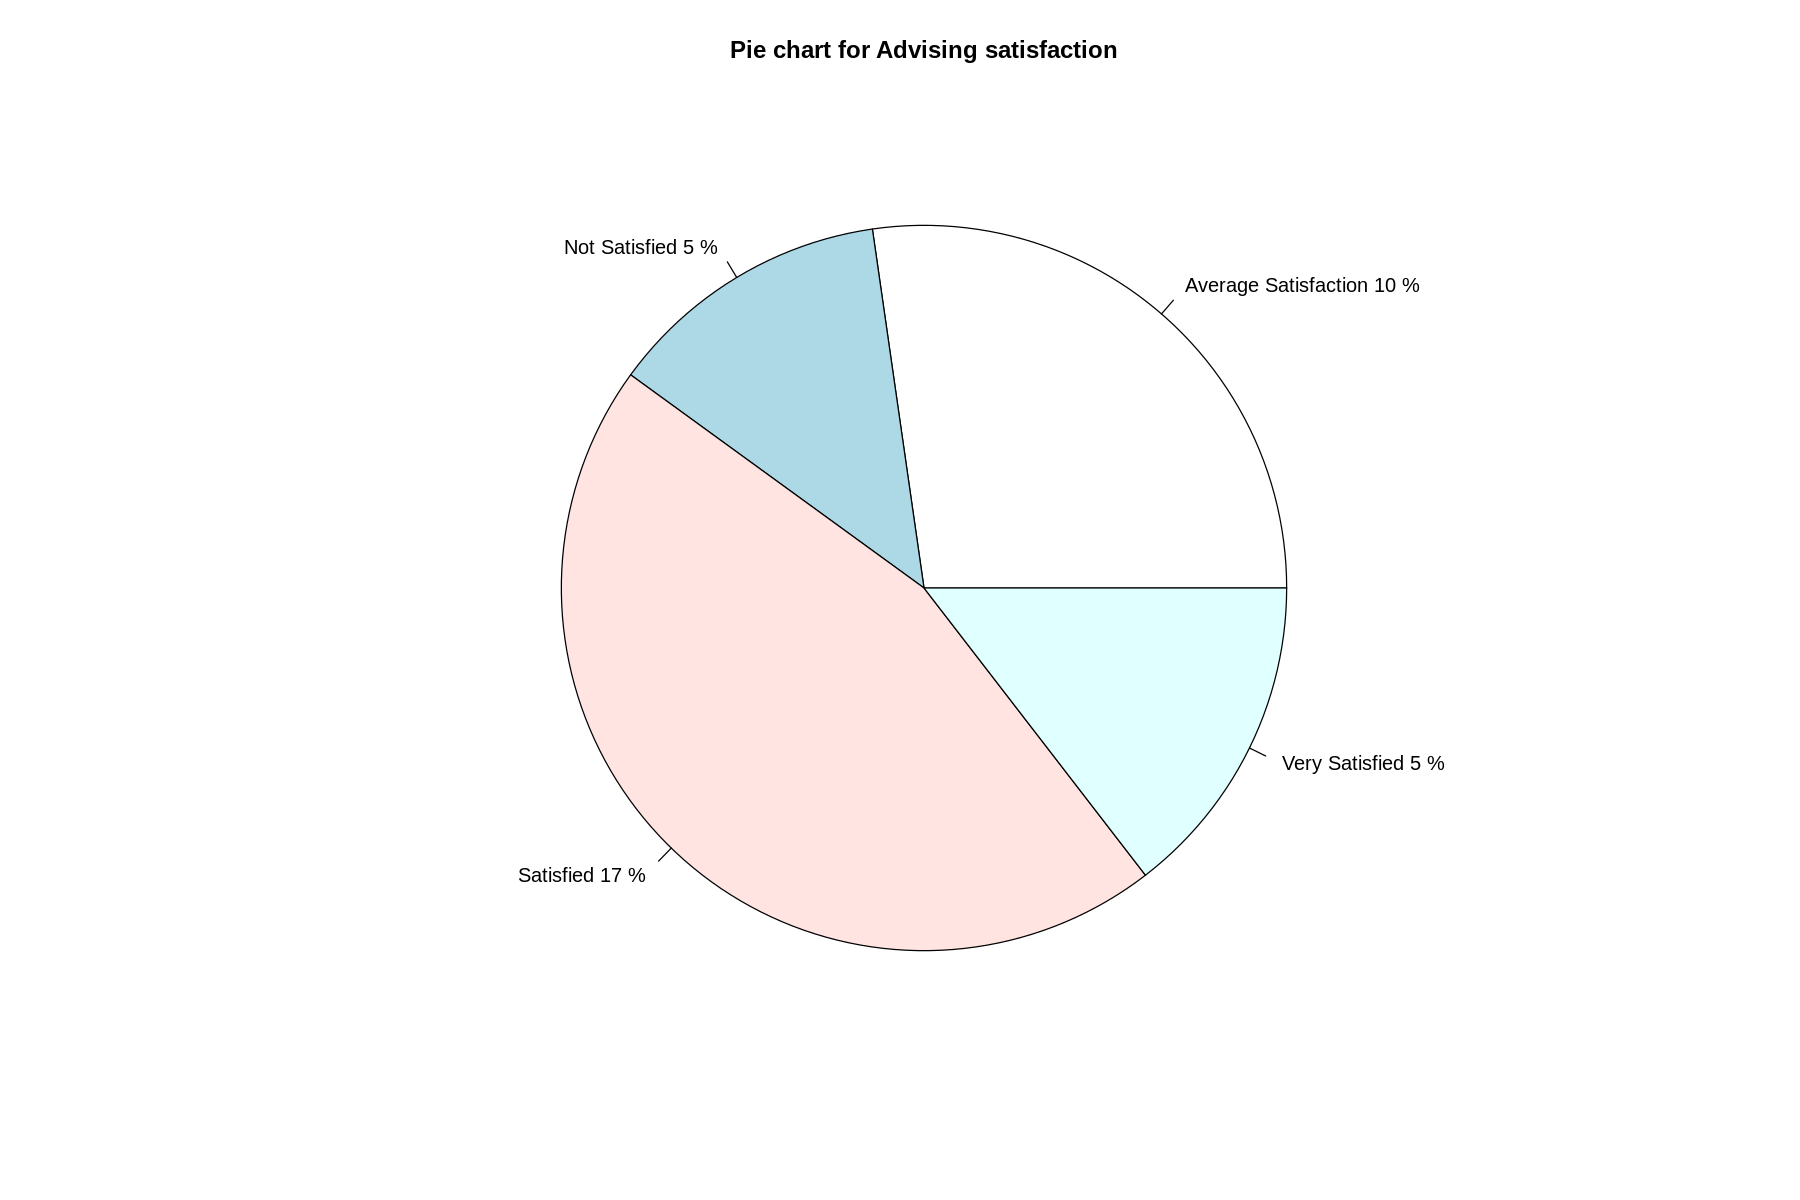

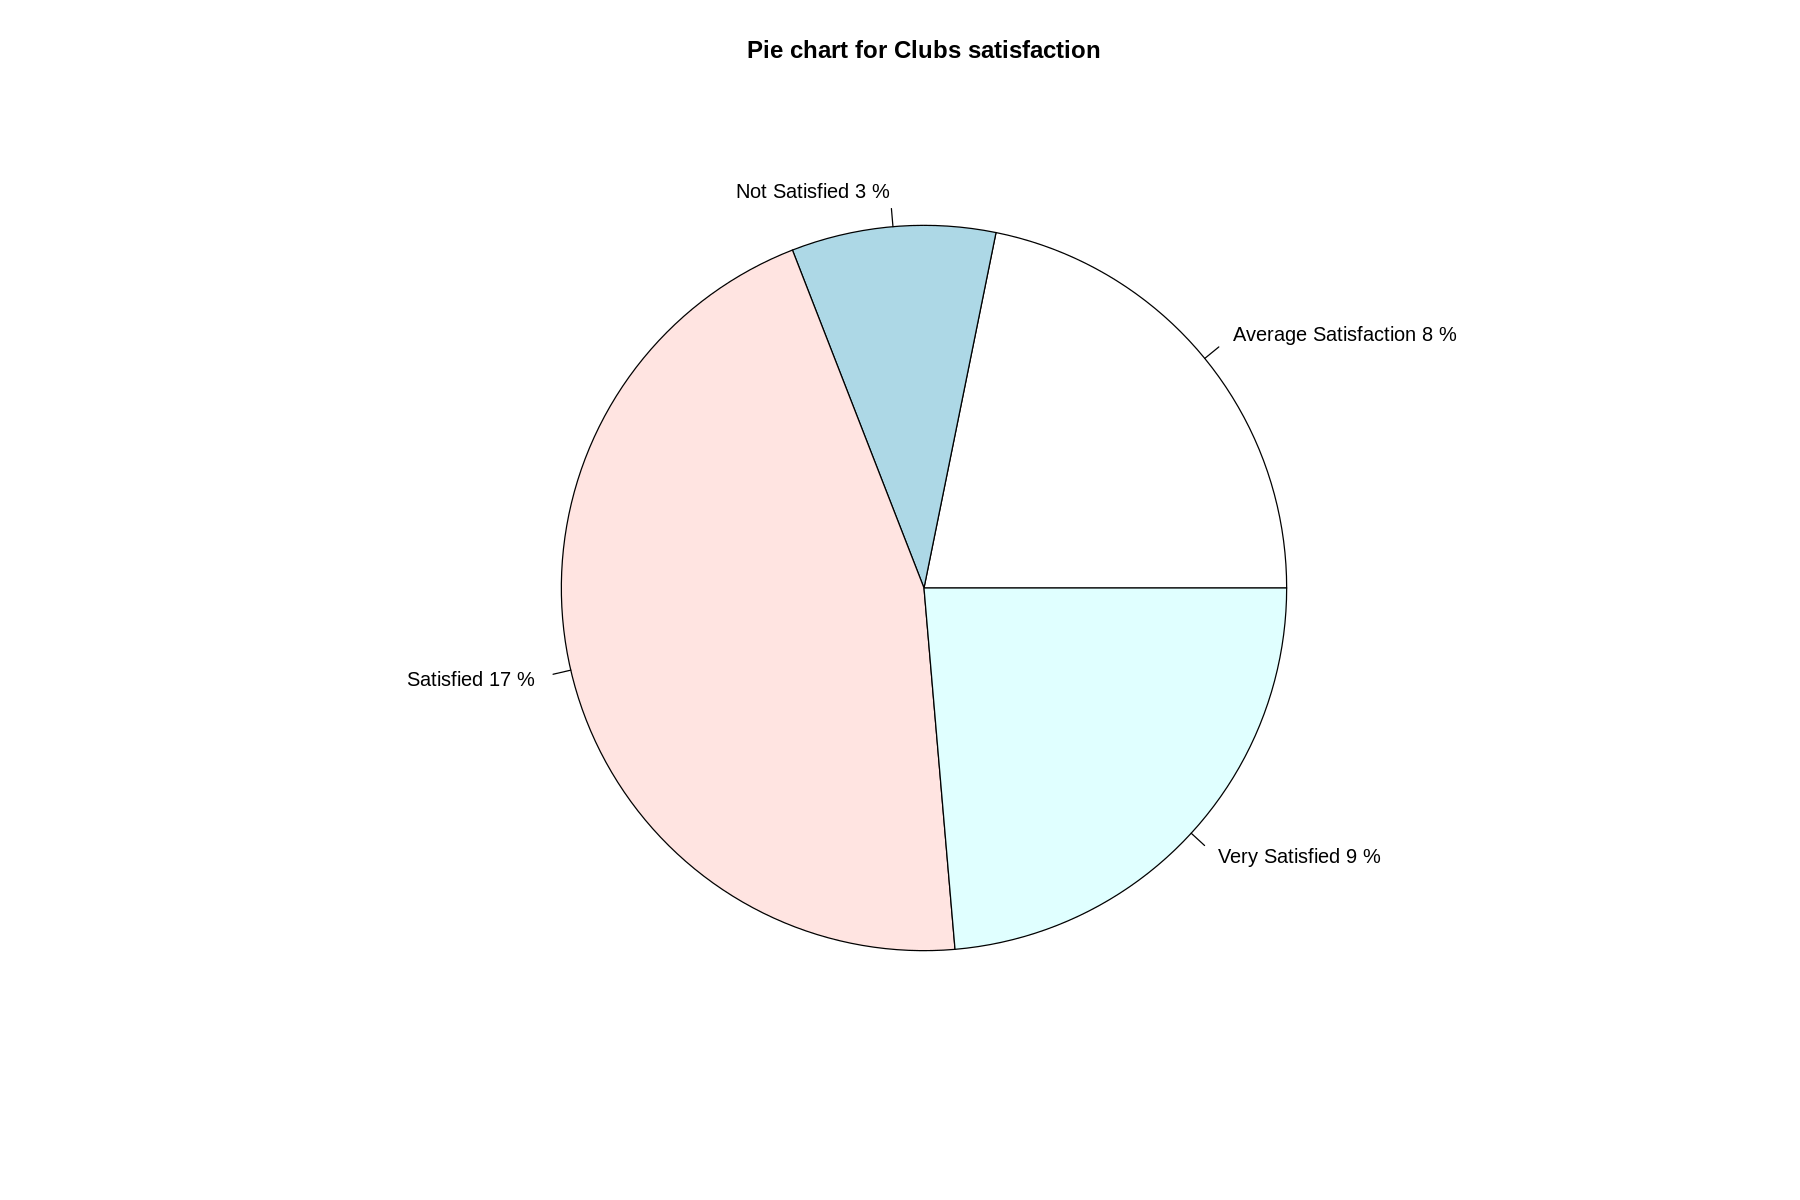

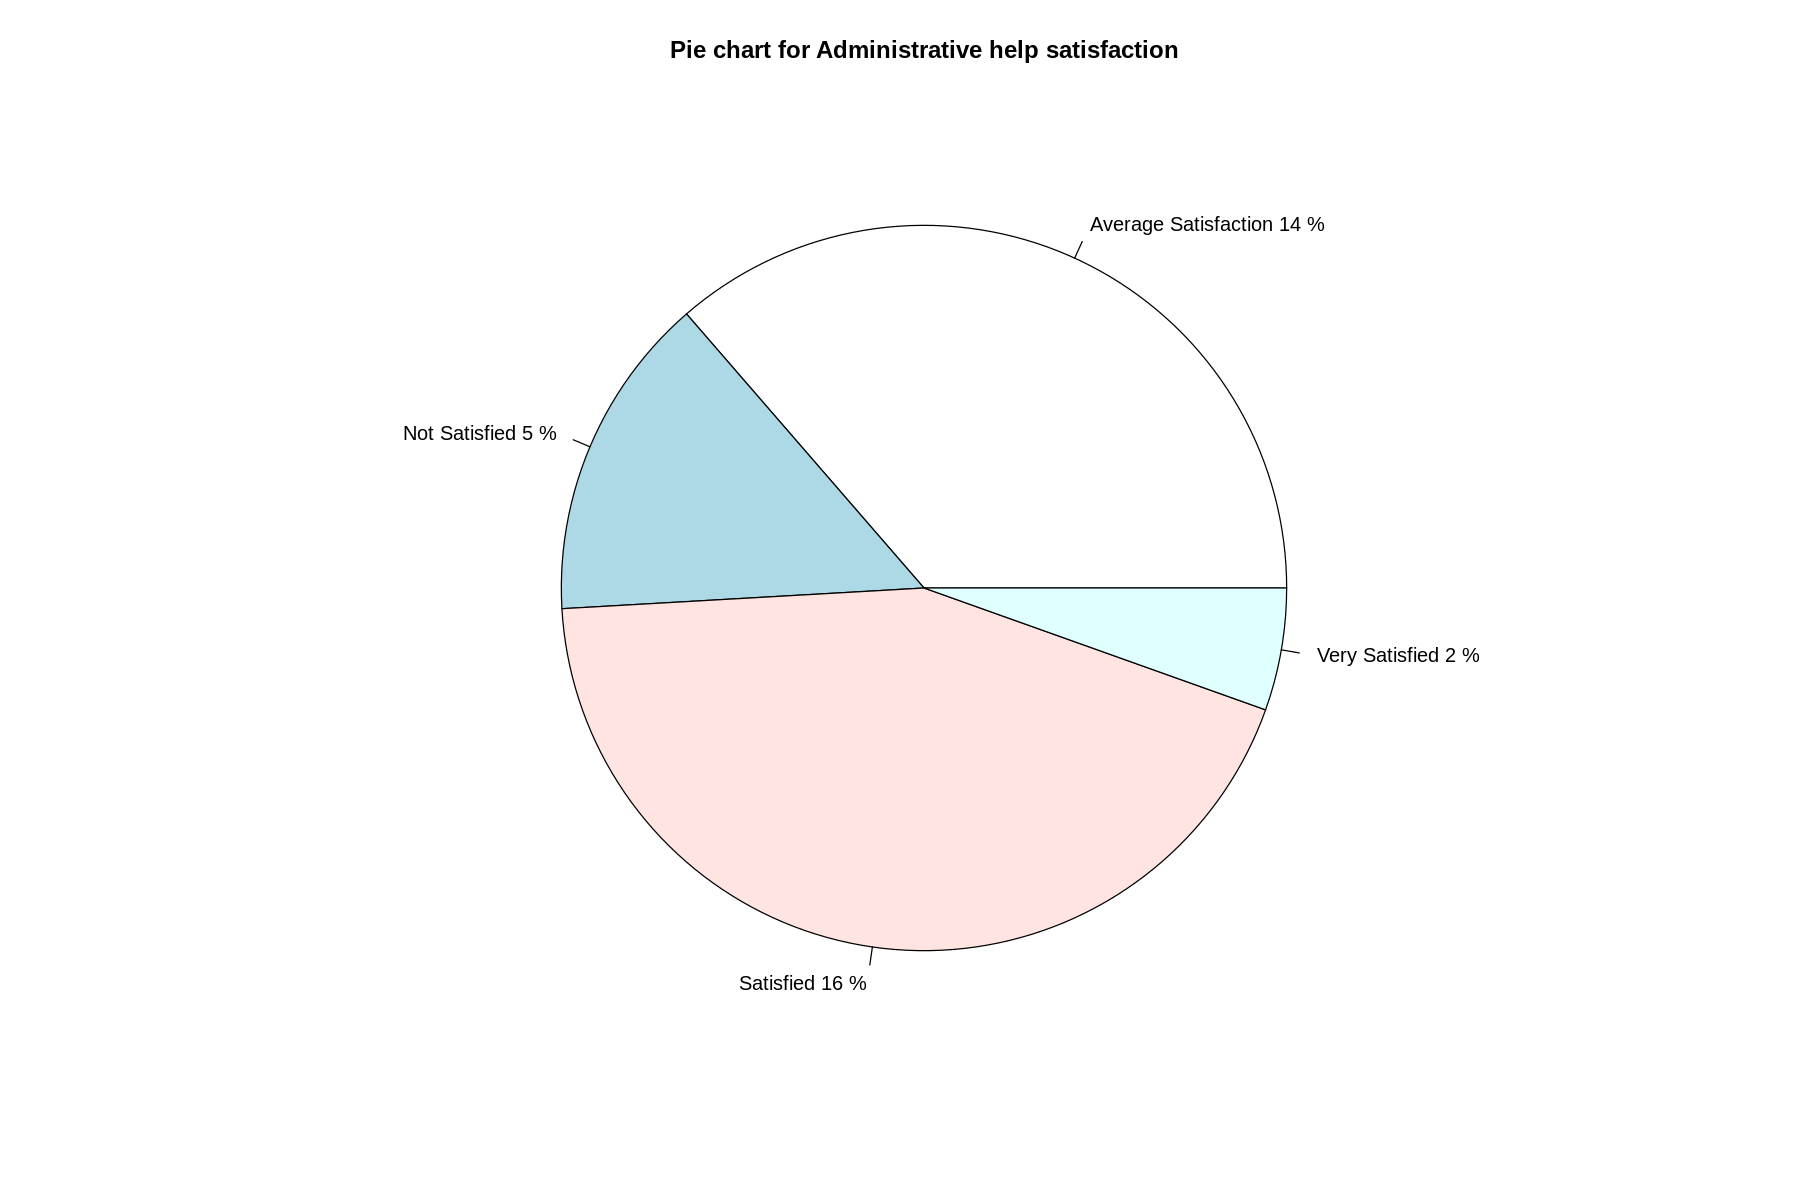

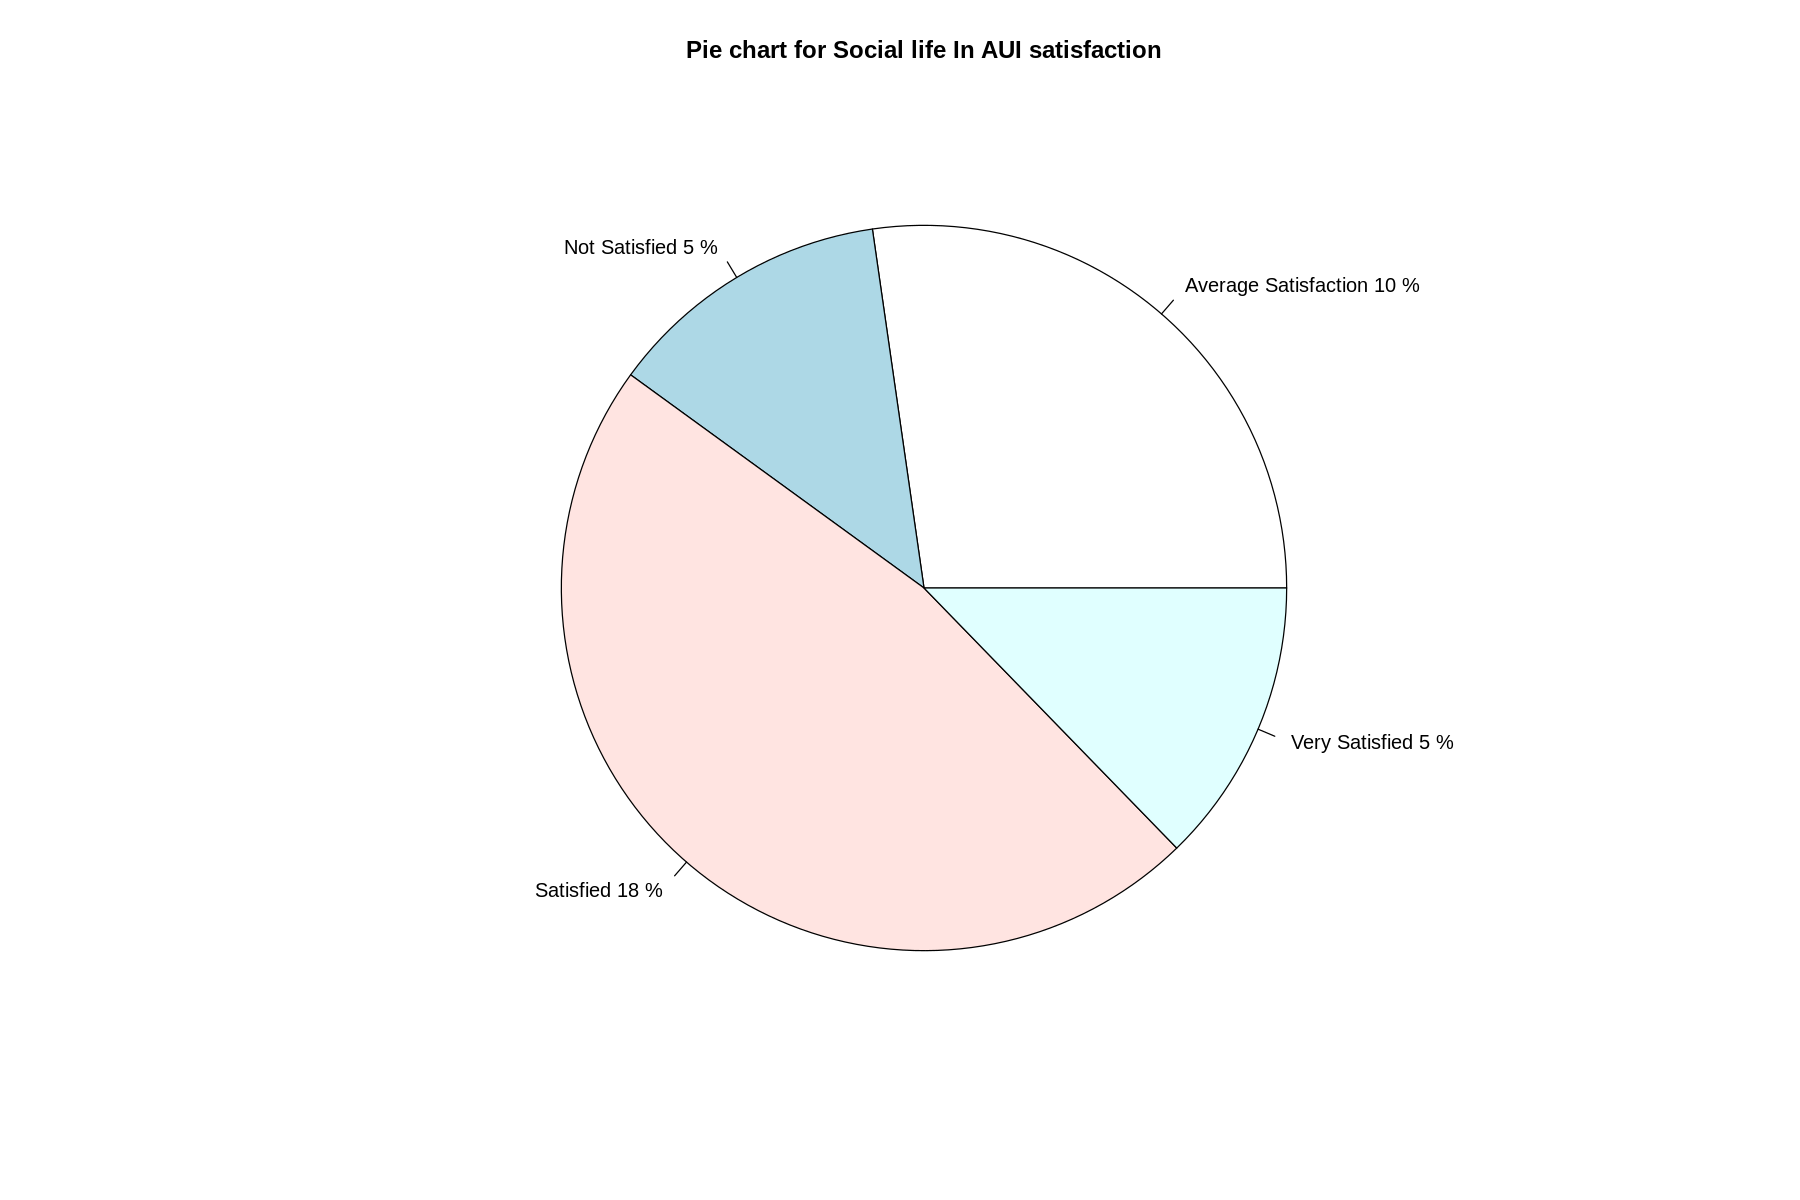

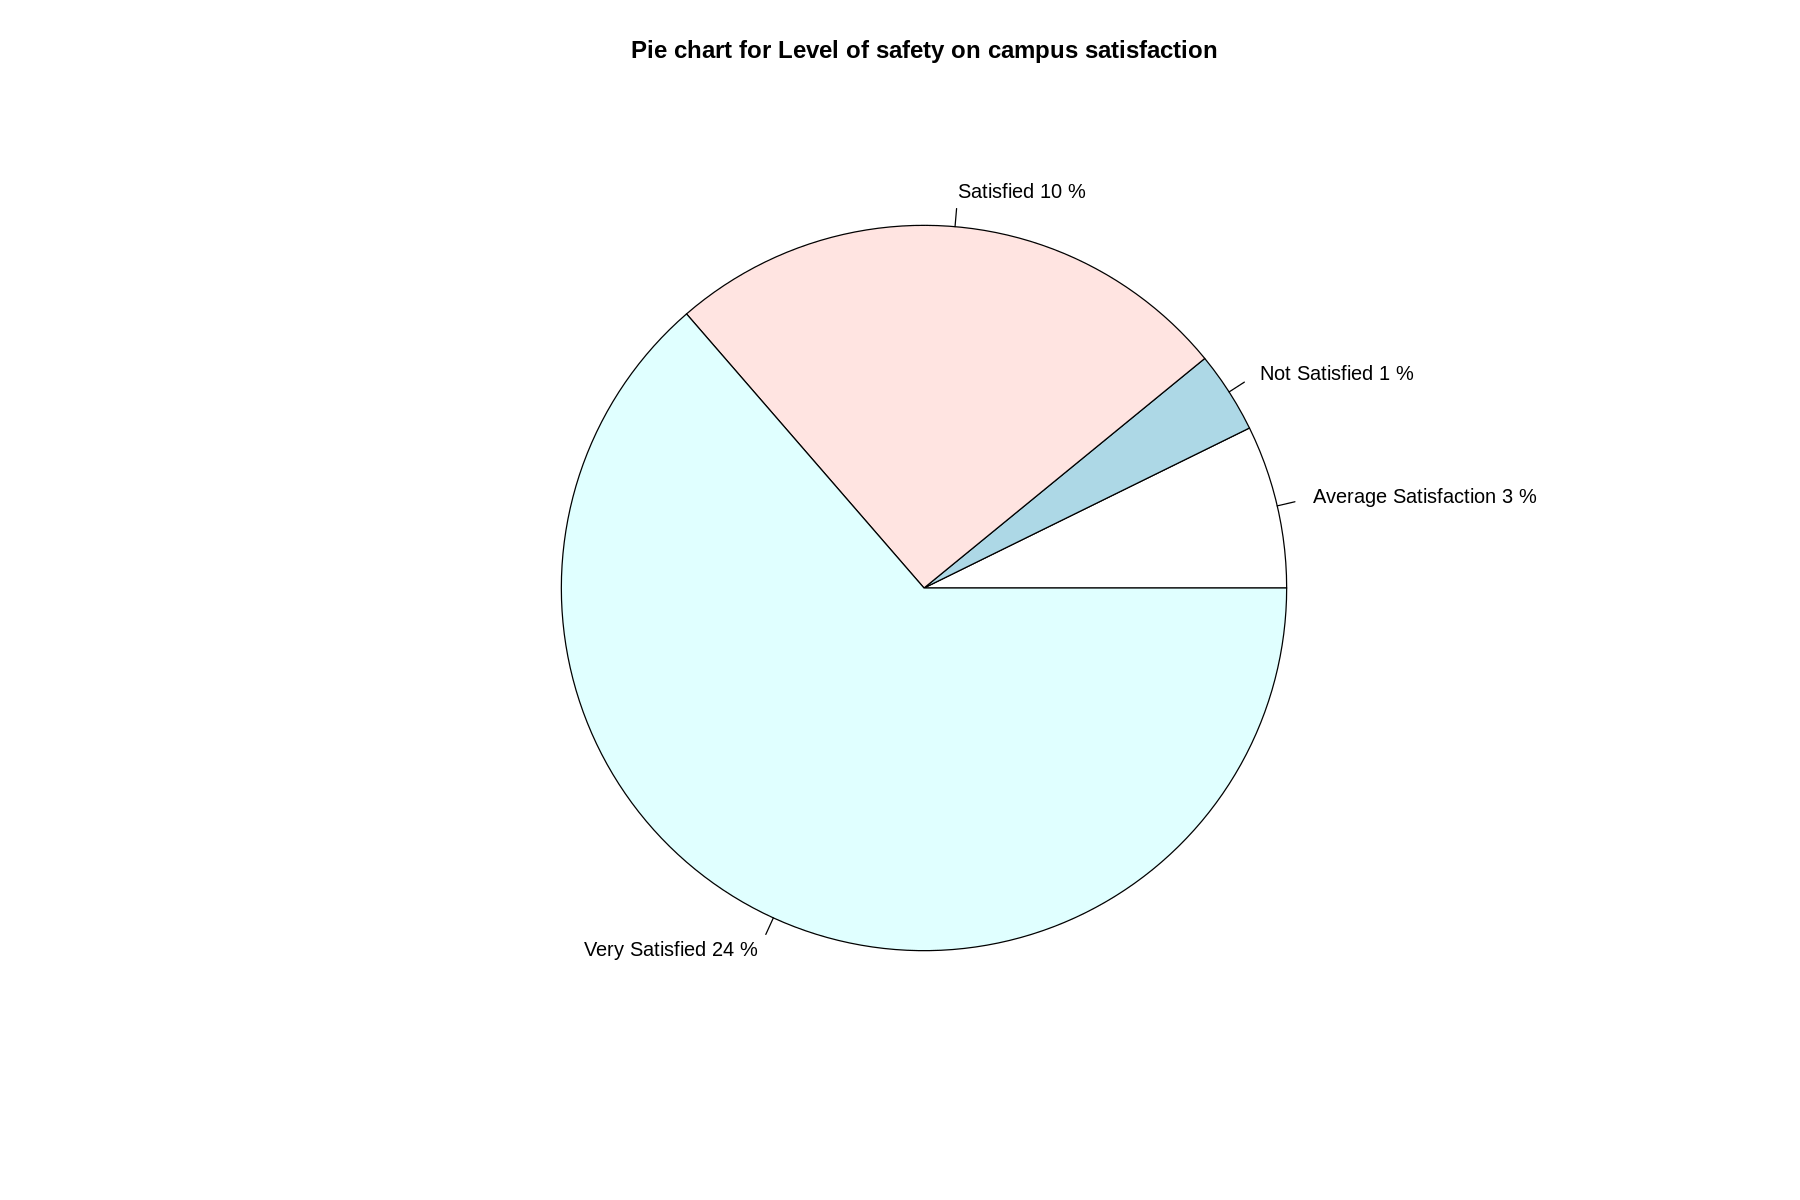

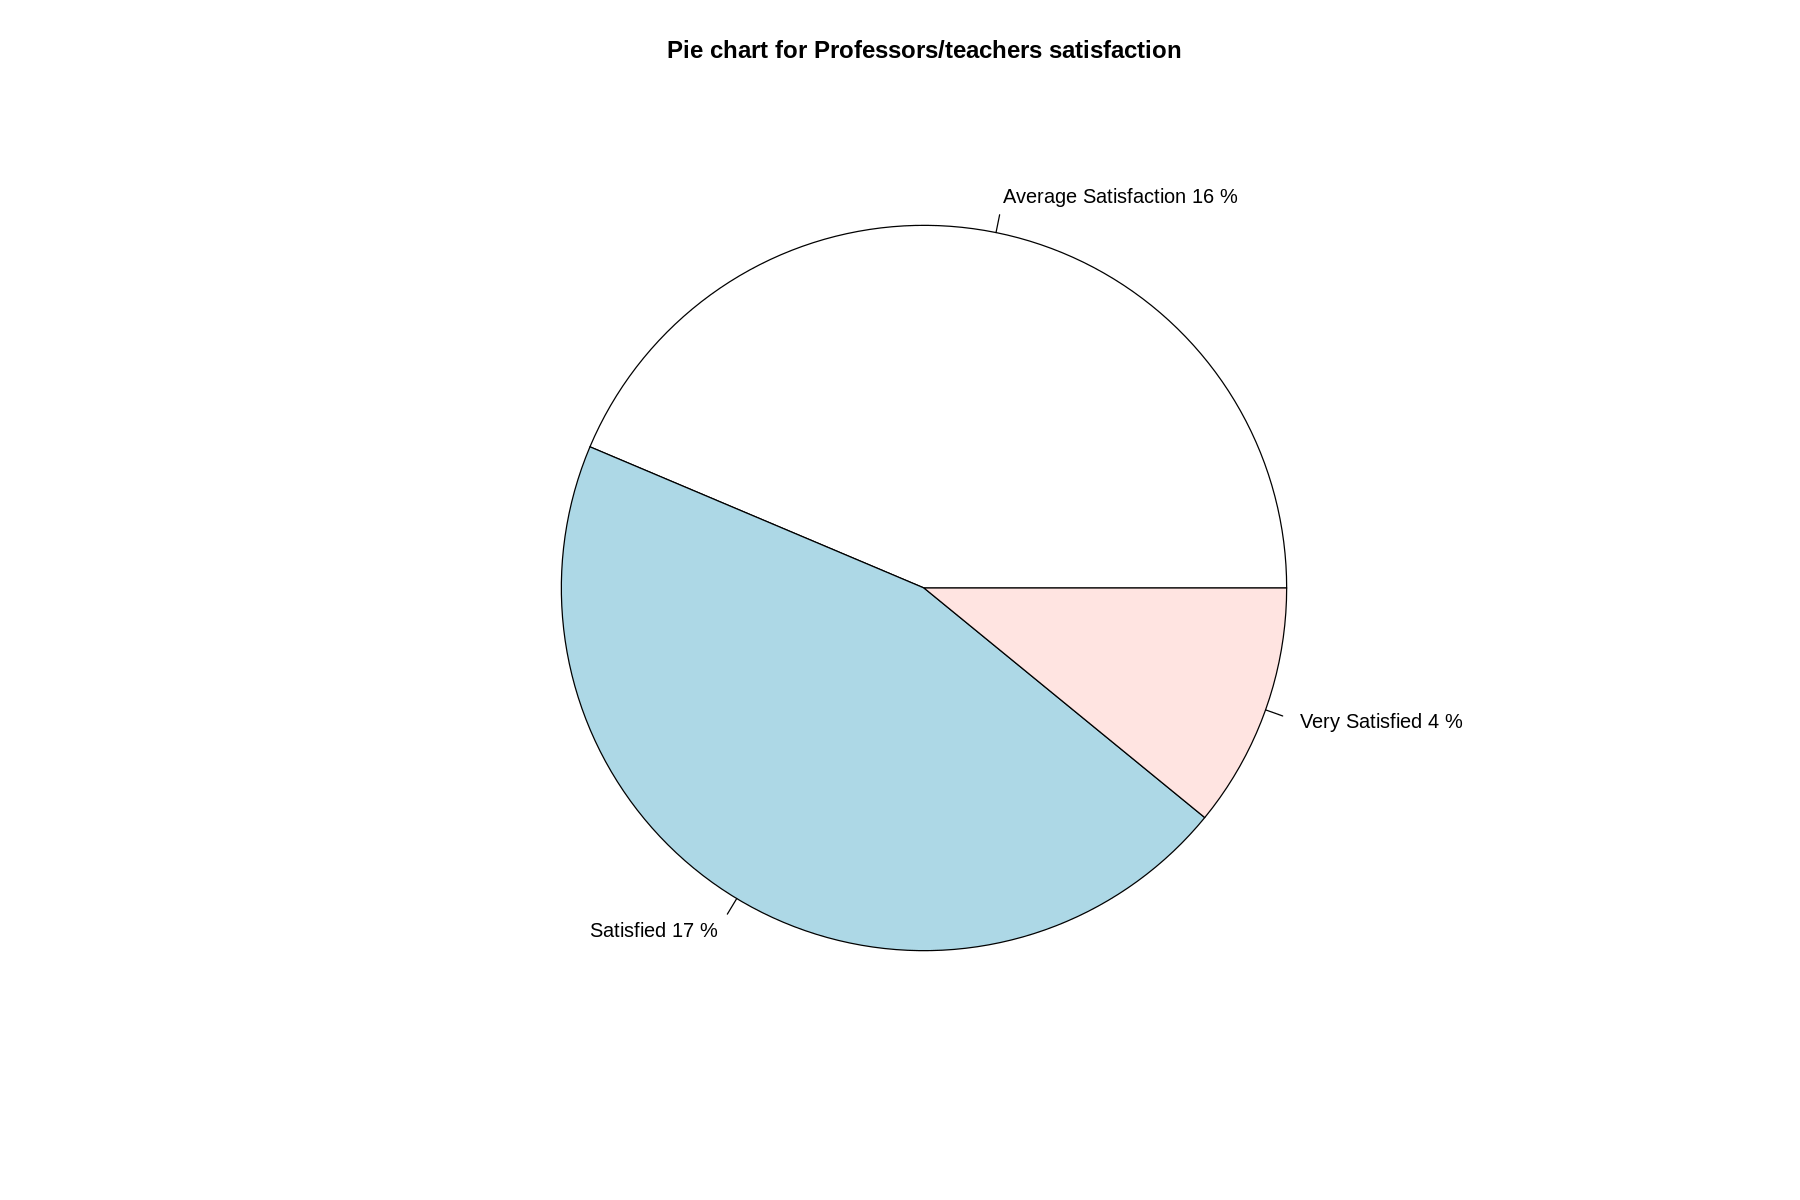

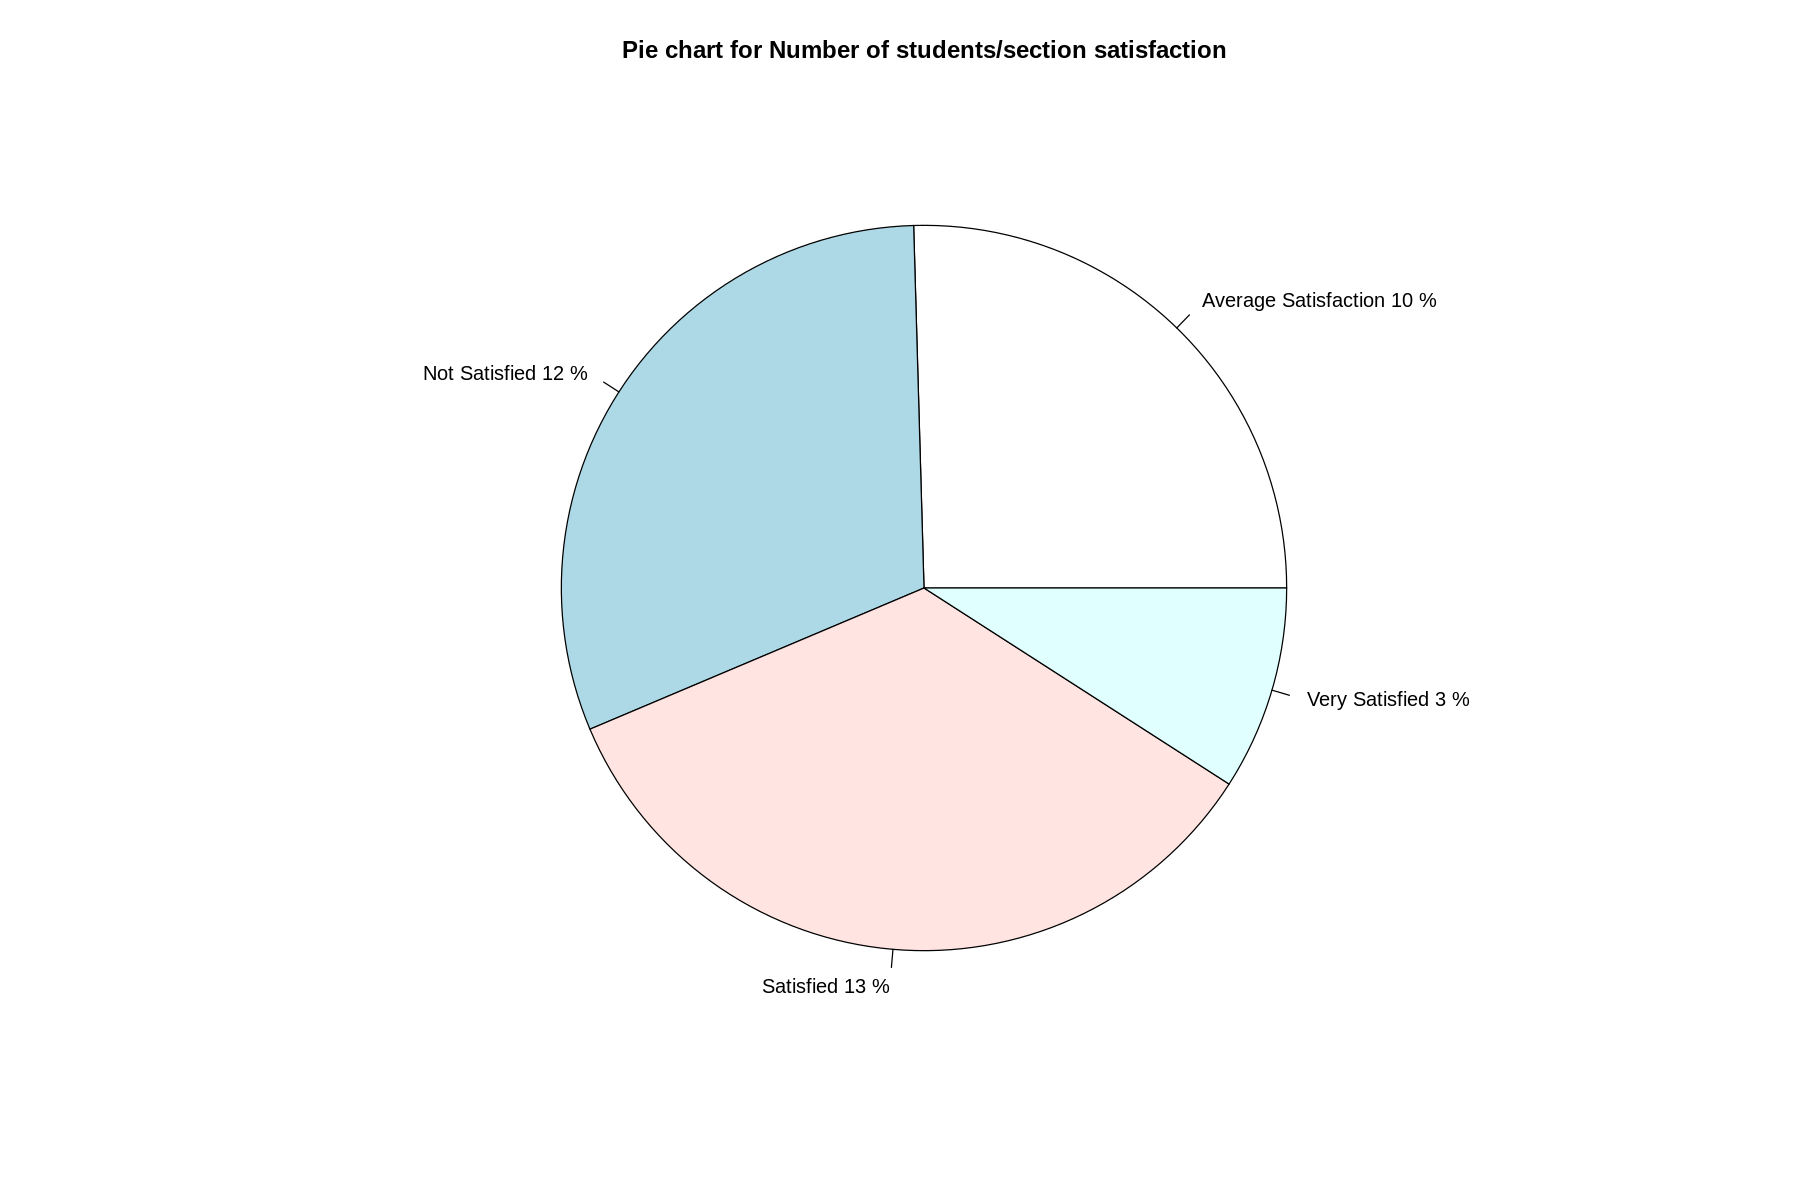

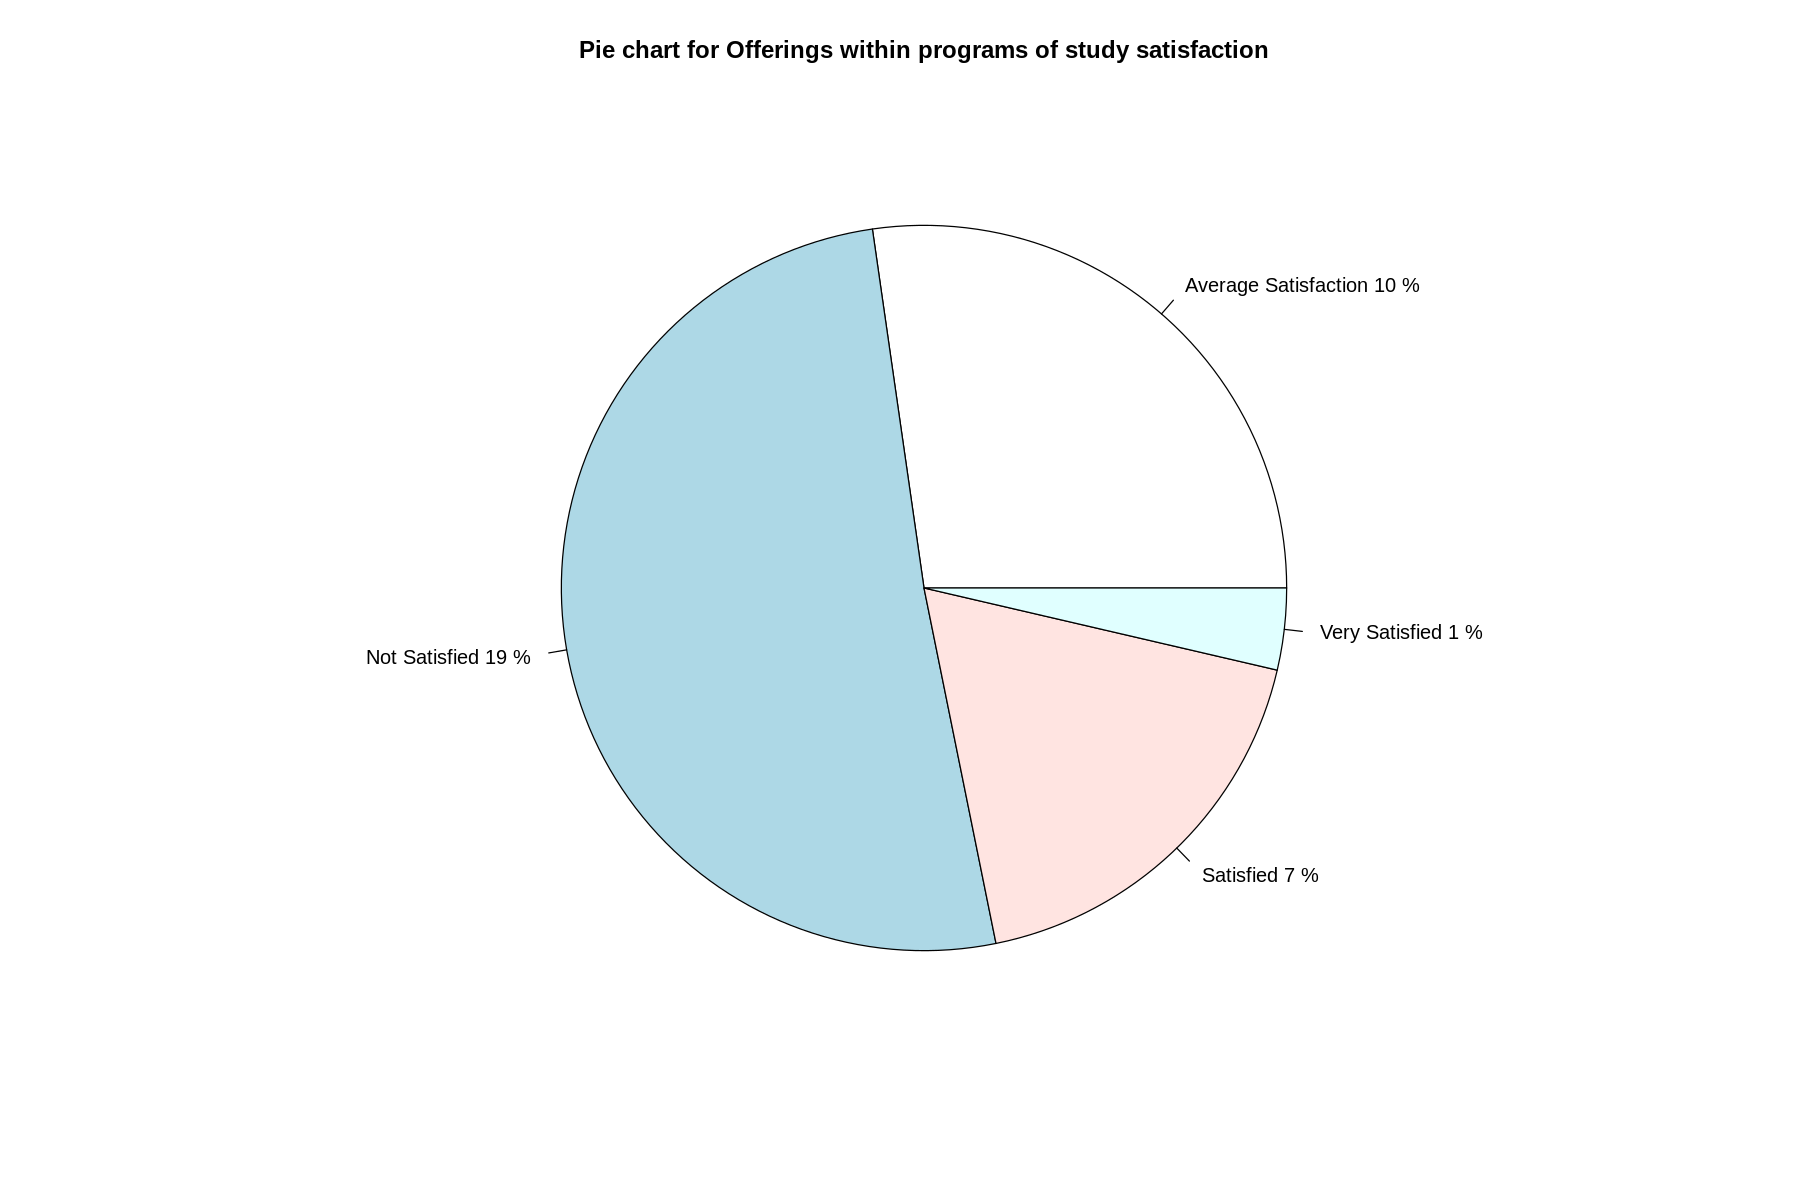

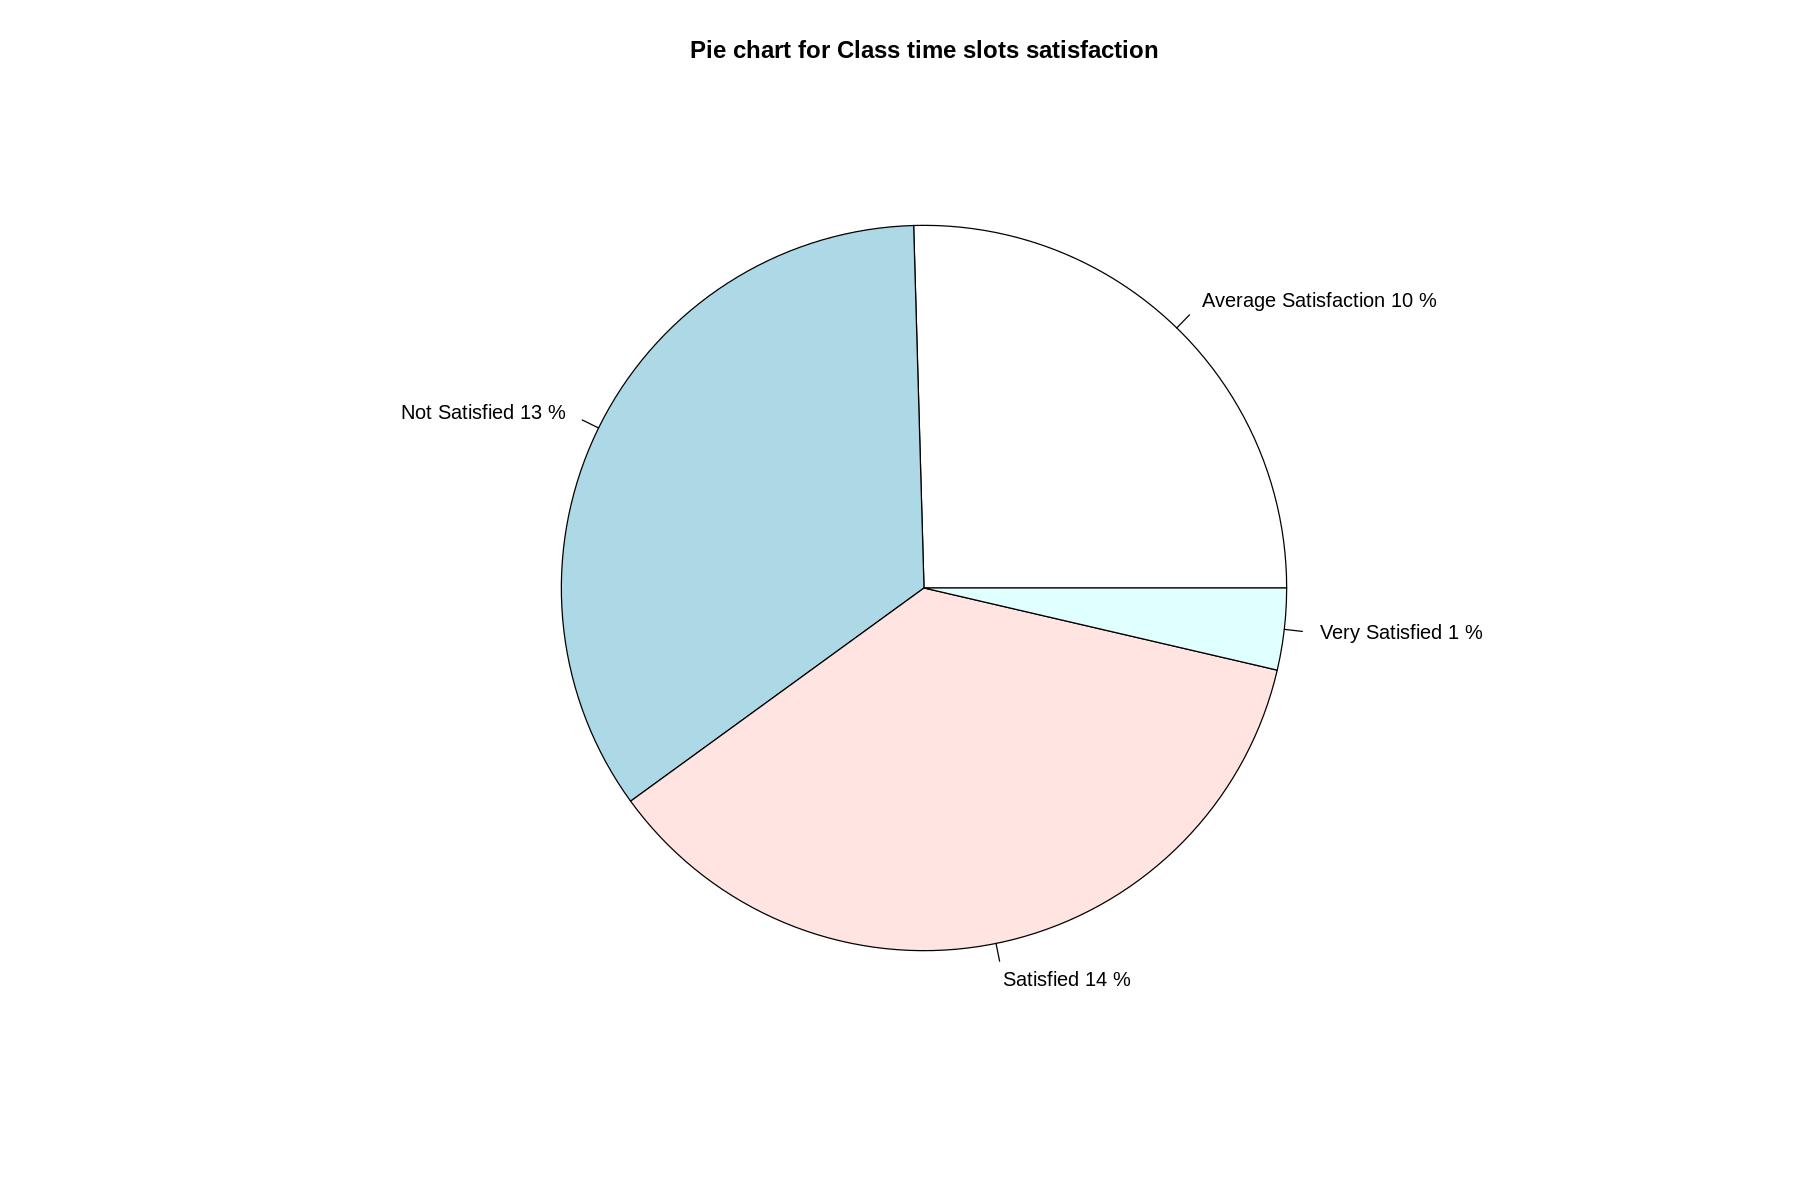

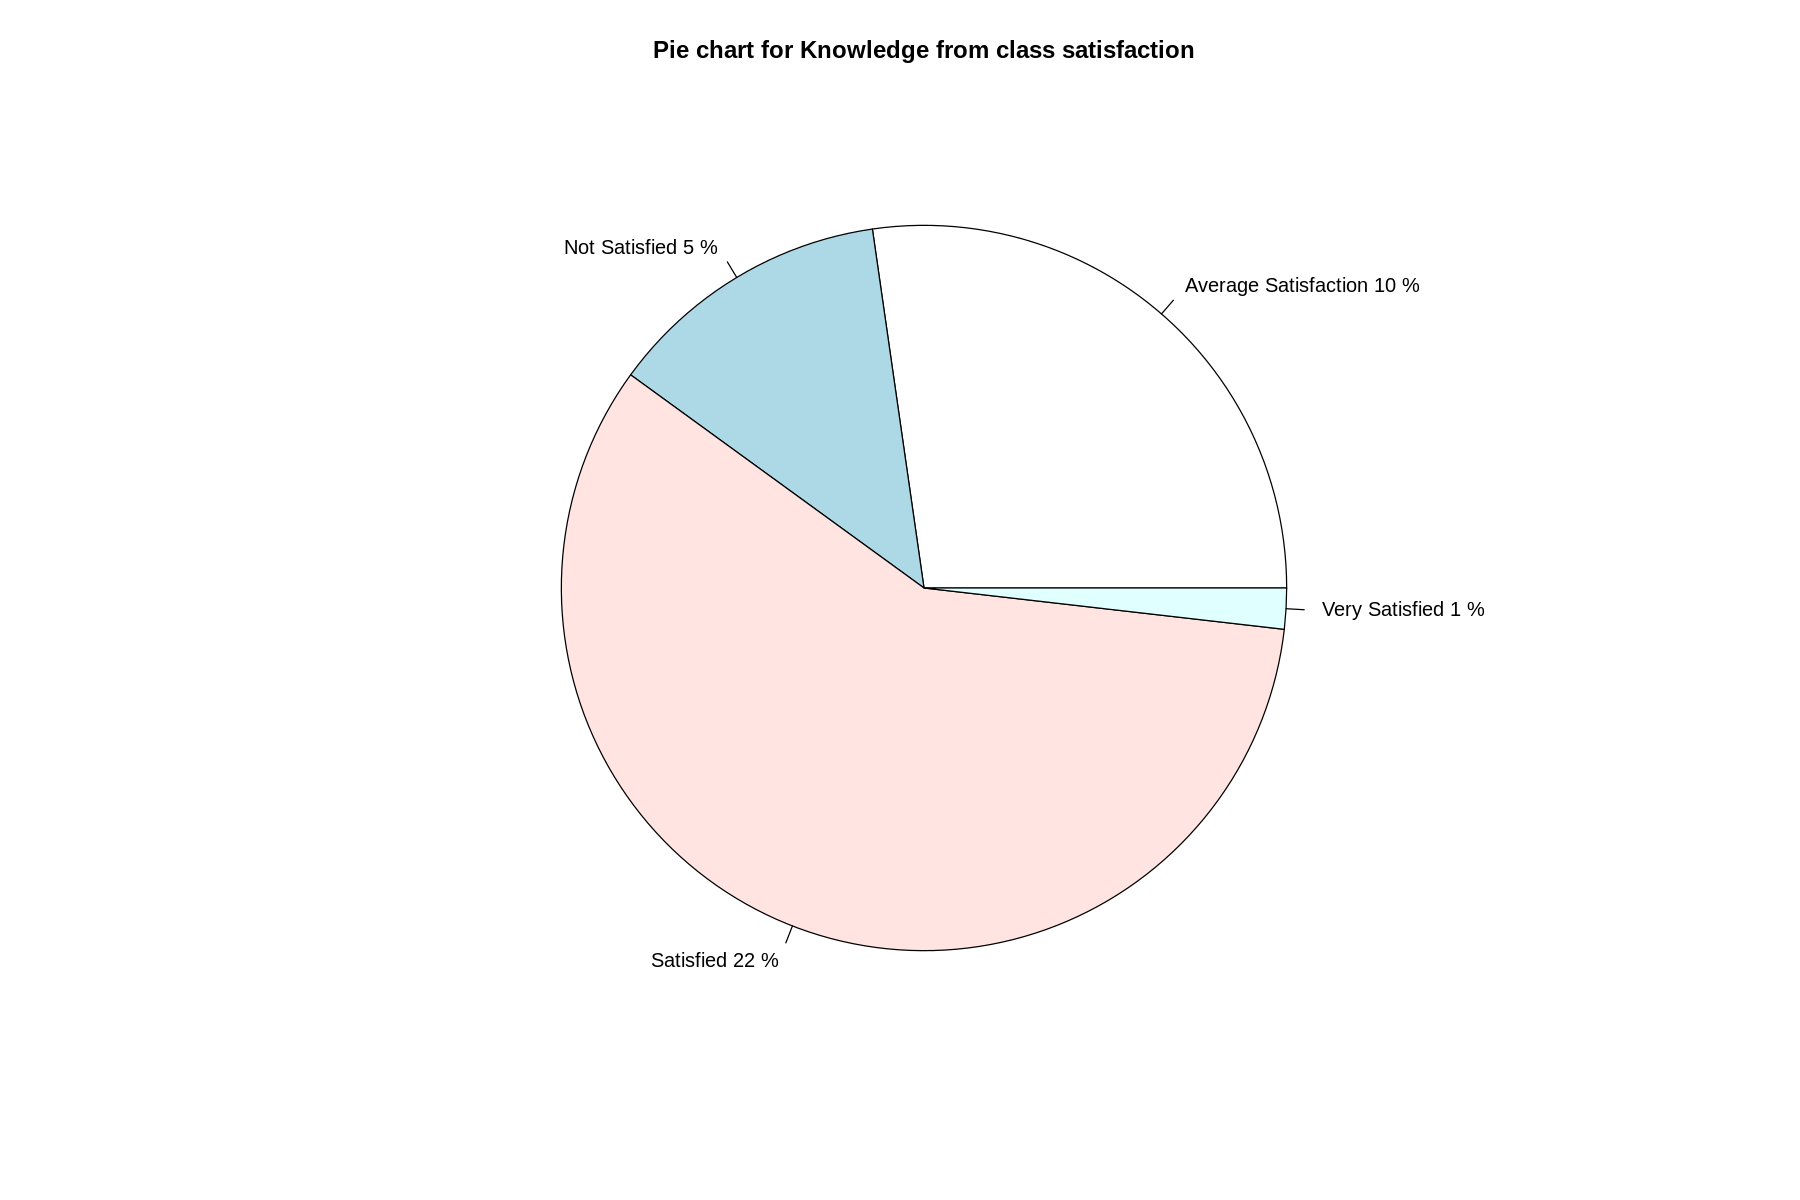

In [ ]:
#interpreting cluster 3
options(repr.plot.width=15, repr.plot.height=10)
for (col in col_names){
    if(col != 'CGPA' && col != 'ID'){ #no pie plot for CGPA and ID column
      pct <- round(100*table(sub3[[col]])/147)
      pie(table(sub3[[col]]), main = paste("Pie chart for",col), labels = paste(names(table(sub3[[col]])), sep = " ", pct, "%"))
    }
}

In [ ]:
#counting num of occurence of unique values for each colum 
for (col in col_names[(-1)]){
      print(col)
      print(data.frame(table(sub3[[col]])))
      print('______________________________')
}

[1] "Gender"
    Var1 Freq
1 Female   21
2   Male   34
[1] "______________________________"
[1] "Academic Classification"
                                      Var1 Freq
1   Freshman (earned between 0-29 credits)    4
2                  I am a graduate student    1
3    Junior (earned between 60-89 credits)   16
4       Senior (number of credits is >=90)   17
5 Sophomore (earned between 30-59 credits)   17
[1] "______________________________"
[1] "CGPA"
   Var1 Freq
1    12    1
2   2.2    1
3  2.41    1
4   2.7    2
5  2.79    2
6   2.9    1
7  2.99    1
8    3.    1
9   3.1    1
10 3.10    1
11 3.12    1
12  3.3    2
13 3.36    1
14  3.4    1
15 3.43    1
16 3.44    1
17 3.45    1
18  3.5    2
19 3.53    1
20 3.57    1
21 3.62    2
22 3.63    1
23 3.67    2
24  3.7    1
25 3.72    1
26 3.78    1
27 3.79    1
28  3.8    1
29 3.83    1
30 3.84    1
31 3.86    1
32 3.89    2
33 3.90    1
34 3.91    1
35 3.92    1
36 3.94    2
37 3.95    3
38 3.96    3
39 3.99    1
40    4    1
41  4.0  